# 1. 🛠️ Environment & Setup

## 1.1 Kaggle & Hugging Face (Optional Google Colab) Authentication
Please run this cell to authenticate with Kaggle. Input your

*   Kaggle username
*   Kaggle API credentials that you have just created

Note that you must verify your Kaggle account first, before being able to load the Kaggle datasets.

You can also set the kaggle API keys as your environmental variables, just find your way to login to your own kaggle account

In [ ]:
import kagglehub
kagglehub.login()


Kaggle credentials set.
Kaggle credentials successfully validated.


Run this cell to log in to the Hugging Face Hub. You must enter your own access token to retrieve the specific pre-trained models used in this pipeline.

In [ ]:
from huggingface_hub import notebook_login

notebook_login()

Mounting Google Drive is optional and is only required if you wish to save the final prediction.csv directly to your Drive for easy downloading.

In [ ]:
%%capture
from google.colab import drive
drive.mount('/content/drive')

## 1.2 Clone Repo + Import Libraries

In [ ]:
import os

repo_dir = "/content/brain-to-text-mamba-decoder"
if not os.path.isdir(repo_dir):
    !git clone https://github.com/greentree327/brain-to-text-mamba-decoder.git

%cd /content/brain-to-text-mamba-decoder

In [ ]:
exec(open('imports.py').read())

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.9/113.9 kB 7.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for mamba-ssm: filename=mamba_ssm-2.2.6.post3-cp312-cp312-linux_x86_64.whl size=370558455 sha256=b4b88967e88197166dd42b917948ccade6048809b7eb4e3e5a6e8d7aab2f13de
  Stored in directory: /root/.cache/pip/wheels/a9/66/b0/91003b49a34b45995d1b34c7fd2c70cd998a23560e66f6817a
Successfully built mamba-ssm


# 2. 📂 Data & Resources

## 2.1 Load Model Checkpoints

In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

###########################################################################
################################ Data #####################################
###########################################################################

brain_to_text_25_path = kagglehub.competition_download('brain-to-text-25')

heyyousum_brain_to_text_25_copytaskdata_description_path = kagglehub.dataset_download('heyyousum/brain-to-text-25-copytaskdata-description')

###########################################################################
################################ Mamba ####################################
###########################################################################

# Logit average model 1: test WER 0.02818
heyyousum_v7_57_a14b_mamba_path = kagglehub.dataset_download('heyyousum/v7-57-a14b-mamba')
heyyousum_v7_57_a14c_mamba_path = kagglehub.dataset_download('heyyousum/v7-57-a14c-mamba')
heyyousum_v7_57_a14d_mamba_path = kagglehub.dataset_download('heyyousum/v7-57-a14d-mamba')

# Logit average model 2: test WER 0.02727
heyyousum_v7_57_a14m_mamba_path = kagglehub.dataset_download('heyyousum/v7-57-a14m-mamba')
heyyousum_v7_57_a15n_mamba_path = kagglehub.dataset_download('heyyousum/v7-57-a15n-mamba')
heyyousum_v7_57_a15h_mamba_path = kagglehub.dataset_download('heyyousum/v7-57-a15h-mamba')

# model 3: test WER 0.02787
heyyousum_v7_57_a16f_mamba_path = kagglehub.dataset_download('heyyousum/v7-57-a16f-mamba')

# model 4: test WER 0.02606
heyyousum_v7_57_a14j_mamba_path = kagglehub.dataset_download('heyyousum/v7-57-a14j-mamba')
heyyousum_v7_57_a16g_mamba_path = kagglehub.dataset_download('heyyousum/v7-57-a16g-mamba')
heyyousum_v7_57_a15t_mamba_path = kagglehub.dataset_download('heyyousum/v7-57-a15t-mamba')

###########################################################################
################################ GRU ######################################
###########################################################################

# model 1 - self-trained baseline GRU 120k, seed 10 - 0.04454
heyyousum_btt_25_gru_pure_baseline_0_0898_path = kagglehub.dataset_download('heyyousum/btt-25-gru-pure-baseline-0-0898')

# model 6 - self-trained baseline GRU 120k, seed 2-99
heyyousum_btt_25_baseline_seed_2_99_path = kagglehub.dataset_download('heyyousum/btt-25-baseline-seed-2-99')

# model 7 - self-trained baselin GRU size 34 stride 4 seed 3-72
heyyousum_btt_25_gru_size_34_stride_4_seed_3_72_path = kagglehub.dataset_download('heyyousum/btt-25-gru-size-34-stride-4-seed-3-72')

# model 11 - self-trained baselin GRU size 22 input layer drop 0.25 seed 7-1
heyyousum_gru_size_22_stride_4_input_layer_drop_0_25_sed_7_1_path = kagglehub.dataset_download('heyyousum/gru-size-22-stride-4-input-layer-drop-0-25-sed-7-1')


###########################################################################
######################## ngram model & KenLM ##############################
###########################################################################

heyyousum_quality_english_dataset_for_ngram_model_path = kagglehub.notebook_output_download('heyyousum/fork-of-quality-english-dataset-for-ngram-model')

ansonlyt_kenlm_path = kagglehub.dataset_download('heyyousum/custom-4-gram-wiki-news-switchboard-updated-v3')

print('Data source import complete.')

###########################################################################
######################## version name & params ############################
###########################################################################

version = "LISA_open_version_mamba_0.02696_GRU_coherent_majority_vote_random_a14.2b"
current_drift_lambda = 0.01



100%|██████████| 10.8G/10.8G [04:41<00:00, 41.0MB/s]

Extracting files...


100%|██████████| 1.50k/1.50k [00:00<00:00, 3.38MB/s]

Extracting files...


100%|██████████| 900M/900M [00:24<00:00, 38.1MB/s]

Extracting files...


100%|██████████| 900M/900M [00:26<00:00, 36.1MB/s]

Extracting files...


100%|██████████| 900M/900M [00:23<00:00, 39.8MB/s]

Extracting files...


100%|██████████| 902M/902M [00:25<00:00, 36.5MB/s]

Extracting files...


100%|██████████| 900M/900M [00:25<00:00, 37.5MB/s]

Extracting files...


100%|██████████| 902M/902M [00:27<00:00, 34.5MB/s]

Extracting files...


100%|██████████| 903M/903M [00:27<00:00, 35.0MB/s]

Extracting files...


100%|██████████| 903M/903M [00:25<00:00, 37.4MB/s]

Extracting files...


100%|██████████| 904M/904M [00:25<00:00, 36.5MB/s]

Extracting files...


100%|██████████| 903M/903M [00:24<00:00, 38.3MB/s]

Extracting files...


Using Colab cache for faster access to the 'btt-25-gru-pure-baseline-0-0898' dataset.
Using Colab cache for faster access to the 'btt-25-baseline-seed-2-99' dataset.
Using Colab cache for faster access to the 'btt-25-gru-size-34-stride-4-seed-3-72' dataset.
Using Colab cache for faster access to the 'gru-size-22-stride-4-input-layer-drop-0-25-sed-7-1' dataset.
Extracting files...


100%|██████████| 11.2G/11.2G [05:18<00:00, 37.8MB/s]

Extracting files...


Data source import complete.


## 2.2 Load Model Architecture Definitions

### import Mamba

In [ ]:

# --- 1. Helper Function for Stochastic Depth ---
def drop_path(x, drop_prob: float = 0., training: bool = False, scale_by_keep: bool = True):
    """
    Drop paths (Stochastic Depth) per sample (when applied in main path of residual blocks).
    """
    if drop_prob == 0. or not training:
        return x

    keep_prob = 1 - drop_prob
    # Work with any number of dimensions, assuming batch size is dim 0
    shape = (x.shape[0],) + (1,) * (x.ndim - 1)

    # Generate random binary mask
    random_tensor = x.new_empty(shape).bernoulli_(keep_prob)

    if keep_prob > 0.0 and scale_by_keep:
        random_tensor.div_(keep_prob)

    return x * random_tensor

# --- 2. SoftWindow Mamba Block (Unchanged) ---
class SoftWindowBiMamba(nn.Module):
    '''
    A Bidirectional Mamba 2 Block with "Soft Windowing"
    to force short-term memory focus.
    '''
    def __init__(self,
                 d_model,
                 d_state=64,
                 d_conv=4,
                 expand=2,
                 dt_min=0.05,
                 dt_max=1.0,
                 ):
        super().__init__()

        # 1. Forward Layer (Mamba 2)
        self.fwd = Mamba2(
            d_model=d_model,
            d_state=d_state,
            d_conv=d_conv,
            expand=expand,
            dt_min=dt_min,
            dt_max=dt_max,
        )

        # 2. Backward Layer (Mamba 2)
        self.bwd = Mamba2(
            d_model=d_model,
            d_state=d_state,
            d_conv=d_conv,
            expand=expand,
            dt_min=dt_min,
            dt_max=dt_max,
        )

        # Manually Hack the Bias to be even more aggressive
        self._force_short_memory_bias(self.fwd)
        self._force_short_memory_bias(self.bwd)

    def _force_short_memory_bias(self, mamba_layer):
        '''
        Increases the dt_bias to shift the distribution towards
        larger step sizes (faster forgetting).
        '''
        if hasattr(mamba_layer, 'dt_bias'):
            with torch.no_grad():
                mamba_layer.dt_bias.add_(1.0)
        elif hasattr(mamba_layer, 'dt_proj'):
            with torch.no_grad():
                mamba_layer.dt_proj.bias.add_(1.0)

    def forward(self, x):
        # x: [Batch, Time, Dim]

        # Forward Pass
        out_fwd = self.fwd(x)

        # Backward Pass
        x_rev = torch.flip(x, dims=[1])
        out_bwd = self.bwd(x_rev)
        out_bwd = torch.flip(out_bwd, dims=[1])

        # Combine
        return out_fwd + out_bwd

# --- 3. Mamba Decoder with Stochastic Depth ---
class MambaDecoder(nn.Module):
    '''
    Defines the Mamba decoder for BCI Data.
    Updated to use Stochastic Depth (Drop Path).
    '''
    def __init__(self,
                 neural_dim, # This will be 513 passed from args
                 n_units,
                 n_days,
                 n_classes,
                 rnn_dropout = 0.0,
                 input_dropout = 0.0,
                 n_layers = 5,
                 patch_size = 0,
                 patch_stride = 0,
                 d_state = 64,
                 d_conv = 4,
                 expand = 2,
                 dt_min = 0.025,
                 drop_path_rate = 0.2, # <--- NEW ARGUMENT
                 proj_intermediate_dim = 4096,
                 proj_intermediate_dropout = 0.3,
                 final_dropout = 0.4
                 ):
        super(MambaDecoder, self).__init__()

        self.neural_dim_total = neural_dim # 513

        # We separate the dimensions
        # The last channel is Time, the rest are Neural
        self.n_neural_chans = neural_dim - 1 # 512

        self.n_units = n_units
        self.n_classes = n_classes
        self.n_layers = n_layers
        self.n_days = n_days
        self.input_dropout = input_dropout
        self.patch_size = patch_size
        self.patch_stride = patch_stride

        # --- 1. Day-Specific Layers ---
        self.day_layer_activation = nn.Softsign()
        self.day_weights = nn.ParameterList(
            [nn.Parameter(torch.eye(self.n_neural_chans)) for _ in range(self.n_days)]
        )
        self.day_biases = nn.ParameterList(
            [nn.Parameter(torch.zeros(1, self.n_neural_chans)) for _ in range(self.n_days)]
        )
        self.day_layer_dropout = nn.Dropout(input_dropout)

        # --- 2. Projection Layer ---
        # The projection takes the concatenated result (512 Rotated + 1 Time)
        self.input_size = self.neural_dim_total
        if self.patch_size > 0:
            self.input_size *= self.patch_size

        # --- 2. Projection Layer ---
        intermediate_dim = 4096  # A good step-down from 7504

        self.input_proj = nn.Sequential(
            # Layer 1: Compress 7504 -> 4096
            nn.Linear(self.input_size, intermediate_dim),
            nn.Softsign(),   # Non-linearity to process features
            nn.Dropout(0.3), # Regularization

            # Layer 2: Final Project 4096 -> 768 (Mamba Dim)
            nn.Linear(intermediate_dim, self.n_units)
            # No activation here: Let Mamba receive the raw values
        )

        # --- 3. Mamba Backbone ---
        self.layers = nn.ModuleList([
            SoftWindowBiMamba(
                d_model=n_units,
                d_state=d_state,
                d_conv=d_conv,
                expand=expand,
                dt_min=0.025
            ) for _ in range(n_layers)
        ])

        # Norms between blocks
        self.norms = nn.ModuleList([
            nn.LayerNorm(self.n_units) for _ in range(self.n_layers)
        ])

        # --- STOCHASTIC DEPTH CONFIGURATION ---
        # Linearly decay the drop probability from 0 to drop_path_rate
        # e.g., if rate=0.1 and layers=5: [0.0, 0.025, 0.05, 0.075, 0.1]
        self.drop_path_rates = [
            x.item() for x in torch.linspace(0, drop_path_rate, n_layers)
        ]

        # Standard dropout for the final output
        self.dropout = nn.Dropout(0.4)

        # REMOVED: self.resid_dropout = nn.Dropout(0.1)

        # --- 4. Prediction Head ---
        self.out = nn.Linear(self.n_units, self.n_classes)

        # Initialize weights
        for layer in self.input_proj:
            if isinstance(layer, nn.Linear):
                nn.init.xavier_uniform_(layer.weight)
                if layer.bias is not None:
                    nn.init.constant_(layer.bias, 0) # Good practice to init bias to 0
        nn.init.xavier_uniform_(self.out.weight)

    def forward(self, x, day_idx, states=None, return_state=False):
        '''
        x: [Batch, Time, 512 Features + 1 Post-Implant-Day]
        '''

        # --- A. Split Input ---
        # Neural Data: First 512 channels
        x_neural = x[:, :, :-1]
        # Time Feature: Last 1 channel
        x_time = x[:, :, -1:]

        # --- B. Rotate Neural Data Only ---
        day_weights = torch.stack([self.day_weights[i] for i in day_idx], dim=0)
        day_biases = torch.cat([self.day_biases[i] for i in day_idx], dim=0).unsqueeze(1)

        # Apply rotation + bias to neural channels
        x_neural = torch.einsum("btd,bdk->btk", x_neural, day_weights) + day_biases
        x_neural = self.day_layer_activation(x_neural)

        x = torch.cat([x_neural, x_time], dim=-1)

        if self.input_dropout > 0:
            x = self.day_layer_dropout(x)

        # 2. Patching / Stride
        if self.patch_size > 0:
            x = x.unsqueeze(1).permute(0, 3, 1, 2)
            x_unfold = x.unfold(3, self.patch_size, self.patch_stride)
            x_unfold = x_unfold.squeeze(2).permute(0, 2, 3, 1)
            x = x_unfold.reshape(x.size(0), x_unfold.size(1), -1)

        # 3. Mamba Backbone
        x = self.input_proj(x)

        # --- STOCHASTIC DEPTH LOOP ---
        # We iterate with index 'i' to get the specific drop rate for this layer
        for i, (norm, layer) in enumerate(zip(self.norms, self.layers)):
            x_norm = norm(x)

            # Compute the layer output
            layer_out = layer(x_norm)

            # Apply Drop Path (Stochastic Depth)
            # Only active during training
            layer_out = drop_path(layer_out, self.drop_path_rates[i], self.training)

            # Residual connection
            x = x + layer_out

        # 4. Final Output
        x = self.dropout(x)
        logits = self.out(x)

        if return_state:
            return logits, None

        return logits


### import GRUDecoder

In [ ]:
class GRUDecoderBaseline(nn.Module):
    '''
    Defines the GRU decoder

    This class combines day-specific input layers, a GRU, and an output classification layer
    '''
    def __init__(self,
                 neural_dim,
                 n_units,
                 n_days,
                 n_classes,
                 rnn_dropout = 0.0,
                 input_dropout = 0.0,
                 n_layers = 5,
                 patch_size = 0,
                 patch_stride = 0,
                 ):
        '''
        neural_dim  (int)      - number of channels in a single timestep (e.g. 512)
        n_units     (int)      - number of hidden units in each recurrent layer - equal to the size of the hidden state
        n_days      (int)      - number of days in the dataset
        n_classes   (int)      - number of classes
        rnn_dropout    (float) - percentage of units to droupout during training
        input_dropout (float)  - percentage of input units to dropout during training
        n_layers    (int)      - number of recurrent layers
        patch_size  (int)      - the number of timesteps to concat on initial input layer - a value of 0 will disable this "input concat" step
        patch_stride(int)      - the number of timesteps to stride over when concatenating initial input
        '''
        super(GRUDecoderBaseline, self).__init__()

        self.neural_dim = neural_dim
        self.n_units = n_units
        self.n_classes = n_classes
        self.n_layers = n_layers
        self.n_days = n_days

        self.rnn_dropout = rnn_dropout
        self.input_dropout = input_dropout

        self.patch_size = patch_size
        self.patch_stride = patch_stride

        """
        Neural signals come from recording on multiple days, each day's signal distribution can differ (electrode drift, session variability)
        --> These day-specific weight matrices let the model learn a simple linear projection per day

        torch.eye(neural_dim): initialize a Identity matrix of size(neural_dim x neural_dim), so the model starts with no day-adjustment and only learn deviation if needed

        nn.Parameter: tell PyTorch that this tensor is a learnable weight

        [... for _ in range(n_days)]: produces 1 Identity matrix per day, each day can learn its own affine transform from the neural input to the shared latent space

        nn.ParameterList([...]): Ensures those individual Parameter object (Identity matrices) are registered as model parameters, so that model.parameters() will include them
        """

        # Parameters for the day-specific input layers
        self.day_layer_activation = nn.Softsign() # basically a shallower tanh

        # Set weights for day layers to be identity matrices so the model can learn its own day-specific transformations
        self.day_weights = nn.ParameterList(
            [nn.Parameter(torch.eye(self.neural_dim)) for _ in range(self.n_days)]
        )
        self.day_biases = nn.ParameterList(
            [nn.Parameter(torch.zeros(1, self.neural_dim)) for _ in range(self.n_days)]
        )

        self.day_layer_dropout = nn.Dropout(input_dropout)

        self.input_size = self.neural_dim

        # If we are using "strided inputs", then the input size of the first recurrent layer will actually be in_size * patch_size
        if self.patch_size > 0:
            self.input_size *= self.patch_size

        self.gru = nn.GRU(
            input_size = self.input_size,
            hidden_size = self.n_units,
            num_layers = self.n_layers,
            dropout = self.rnn_dropout,
            batch_first = True, # The first dim of our input is the batch dim
            bidirectional = False,
        )
        """
        self.gru_named_parameters():

        [
          ("weight_ih_l0", Parameter(...)),
          ("weight_hh_l0", Parameter(...)),
          ("bias_ih_l0",   Parameter(...)),
          …
        ]
        """

        # Set recurrent units to have orthogonal param init and input layers to have xavier init
        for name, param in self.gru.named_parameters():
            """
            Orthogonal initialization:
                1. sample a matrix, in which values are drawn i.i.d from N(0,1)
                2. Perform QR decomposition to obtain the orthogonal matrix
            Benefits: Multiplying by an orthogonal matrix preserves vector norms, helping to avoid vanishing/exploding fradients through time
            """
            if "weight_hh" in name:
                nn.init.orthogonal_(param)
            if "weight_ih" in name:
                nn.init.xavier_uniform_(param)

        # Prediciton head. Weight init to xavier
        """
        self.out = nn.Linear(self.n_units + self.num_corpuses, self.n_classes) # <-- MODIFIED: Add corpus dimension
        """
        self.out = nn.Linear(self.n_units, self.n_classes)

        nn.init.xavier_uniform_(self.out.weight)

        # Learnable initial hidden states
        self.h0 = nn.Parameter(nn.init.xavier_uniform_(torch.zeros(1, 1, self.n_units)))

    def forward(self, x, day_idx, states = None, return_state = False, ): # <-- MODIFIED: Add corpus_ids
        '''
        x        (tensor)  - batch of examples (trials) of shape: (batch_size, time_series_length, neural_dim)
        day_idx  (tensor)  - tensor which is a list of day indexs corresponding to the day of each example in the batch x.
        '''

        # Apply day-specific layer to (hopefully) project neural data from the different days to the same latent space
        day_weights = torch.stack([self.day_weights[i] for i in day_idx], dim=0)
        day_biases = torch.cat([self.day_biases[i] for i in day_idx], dim=0).unsqueeze(1)
        """
        x.shape: (batch, time_steps, neural_dim)
        W.shape: (batch, neural_dim, neural_dim)
        b.shape: (batch, 1, neural_dim)

        btd @ bdk->btk
        For each example in batch, we perform matrix multiplication of [t,d] and [d,k] --> yielding [t, k]

        and then we add bias to all our matrix, [b,t,k] + [b,1,k], the bias is initialized to zero
        """

        x = torch.einsum("btd,bdk->btk", x, day_weights) + day_biases
        x = self.day_layer_activation(x)

        # Apply dropout to the ouput of the day specific layer
        if self.input_dropout > 0:
            x = self.day_layer_dropout(x)

        # (Optionally) Perform input concat operation
        if self.patch_size > 0:

            x = x.unsqueeze(1)                      # [batches, 1, timesteps, feature_dim]
            x = x.permute(0, 3, 1, 2)               # [batches, feature_dim, 1, timesteps]

            # Extract patches using unfold (sliding window)
            x_unfold = x.unfold(3, self.patch_size, self.patch_stride)  # [batches, feature_dim, 1, num_patches, patch_size]

            # Remove dummy height dimension and rearrange dimensions
            x_unfold = x_unfold.squeeze(2)           # [batches, feature_dum, num_patches, patch_size]
            x_unfold = x_unfold.permute(0, 2, 3, 1)  # [batches, num_patches, patch_size, feature_dim]

            # Flatten last two dimensions (patch_size and features)
            x = x_unfold.reshape(x.size(0), x_unfold.size(1), -1)
        '''
        When we feed a new sequence to a trained GRU (or any RNN) in inference mode, we use the same weight_xh, weight_hh and any other trained parameters (bias, first hidden layer h0 in this case)
        and everytime, by default, we will initialize the hidden state to a zero tensor of shape(num_layers, batch_size, hidden_size)
        '''

        # Determine initial hidden states
        if states is None:
            states = self.h0.expand(self.n_layers, x.shape[0], self.n_units).contiguous()

        # Pass input through RNN
        output, hidden_states = self.gru(x, states)

        # Compute logits
        logits = self.out(output)

        if return_state:
            return logits, hidden_states

        return logits

class GRUDecoderWithNorm(nn.Module):
    '''
    Defines the GRU decoder

    This class combines day-specific input layers, a GRU, and an output classification layer
    '''
    def __init__(self,
                 neural_dim,
                 n_units,
                 n_days,
                 n_classes,
                 rnn_dropout = 0.0,
                 input_dropout = 0.0,
                 n_layers = 5,
                 patch_size = 0,
                 patch_stride = 0,
                 ):
        '''
        neural_dim  (int)      - number of channels in a single timestep (e.g. 512)
        n_units     (int)      - number of hidden units in each recurrent layer - equal to the size of the hidden state
        n_days      (int)      - number of days in the dataset
        n_classes   (int)      - number of classes
        rnn_dropout    (float) - percentage of units to droupout during training
        input_dropout (float)  - percentage of input units to dropout during training
        n_layers    (int)      - number of recurrent layers
        patch_size  (int)      - the number of timesteps to concat on initial input layer - a value of 0 will disable this "input concat" step
        patch_stride(int)      - the number of timesteps to stride over when concatenating initial input
        '''
        super(GRUDecoderWithNorm, self).__init__()

        self.neural_dim = neural_dim
        self.n_units = n_units
        self.n_classes = n_classes
        self.n_layers = n_layers
        self.n_days = n_days

        self.rnn_dropout = rnn_dropout
        self.input_dropout = input_dropout

        self.patch_size = patch_size
        self.patch_stride = patch_stride

        # Parameters for the day-specific input layers
        self.day_layer_activation = nn.Softsign() # basically a shallower tanh

        # Set weights for day layers to be identity matrices so the model can learn its own day-specific transformations
        self.day_weights = nn.ParameterList(
            [nn.Parameter(torch.eye(self.neural_dim)) for _ in range(self.n_days)]
        )
        self.day_biases = nn.ParameterList(
            [nn.Parameter(torch.zeros(1, self.neural_dim)) for _ in range(self.n_days)]
        )

        self.day_layer_dropout = nn.Dropout(input_dropout)

        self.input_size = self.neural_dim

        # If we are using "strided inputs", then the input size of the first recurrent layer will actually be in_size * patch_size
        if self.patch_size > 0:
            self.input_size *= self.patch_size

        self.gru = nn.GRU(
            input_size = self.input_size,
            hidden_size = self.n_units,
            num_layers = self.n_layers,
            dropout = self.rnn_dropout,
            batch_first = True, # The first dim of our input is the batch dim
            bidirectional = False,
        )

        # Set recurrent units to have orthogonal param init and input layers to have xavier init
        for name, param in self.gru.named_parameters():
            if "weight_hh" in name:
                nn.init.orthogonal_(param)
            if "weight_ih" in name:
                nn.init.xavier_uniform_(param)

        self.norm_stack = nn.Sequential(
            nn.LayerNorm(self.n_units),
            nn.Dropout(0.2), ################# tunable hyperparameter ##################
            nn.Linear(self.n_units, self.n_units),
            nn.GELU()
        )

        # Prediciton head. Weight init to xavier
        self.out = nn.Linear(self.n_units, self.n_classes)
        nn.init.xavier_uniform_(self.out.weight)

        # Learnable initial hidden states
        self.h0 = nn.Parameter(nn.init.xavier_uniform_(torch.zeros(1, 1, self.n_units)))

    def forward(self, x, day_idx, states = None, return_state = False):
        '''
        x        (tensor)  - batch of examples (trials) of shape: (batch_size, time_series_length, neural_dim)
        day_idx  (tensor)  - tensor which is a list of day indexs corresponding to the day of each example in the batch x.
        '''

        # Apply day-specific layer to (hopefully) project neural data from the different days to the same latent space
        day_weights = torch.stack([self.day_weights[i] for i in day_idx], dim=0)
        day_biases = torch.cat([self.day_biases[i] for i in day_idx], dim=0).unsqueeze(1)

        x = torch.einsum("btd,bdk->btk", x, day_weights) + day_biases
        x = self.day_layer_activation(x)

        # Apply dropout to the ouput of the day specific layer
        if self.input_dropout > 0:
            x = self.day_layer_dropout(x)

        # (Optionally) Perform input concat operation
        if self.patch_size > 0:

            x = x.unsqueeze(1)                      # [batches, 1, timesteps, feature_dim]
            x = x.permute(0, 3, 1, 2)               # [batches, feature_dim, 1, timesteps]

            # Extract patches using unfold (sliding window)
            x_unfold = x.unfold(3, self.patch_size, self.patch_stride)  # [batches, feature_dim, 1, num_patches, patch_size]

            # Remove dummy height dimension and rearrange dimensions
            x_unfold = x_unfold.squeeze(2)           # [batches, feature_dum, num_patches, patch_size]
            x_unfold = x_unfold.permute(0, 2, 3, 1)  # [batches, num_patches, patch_size, feature_dim]

            # Flatten last two dimensions (patch_size and features)
            x = x_unfold.reshape(x.size(0), x_unfold.size(1), -1)

        # Determine initial hidden states
        if states is None:
            states = self.h0.expand(self.n_layers, x.shape[0], self.n_units).contiguous()

        # Pass input through RNN
        output, hidden_states = self.gru(x, states)

        # --- New: Pass GRU output through the normalization stack
        output = self.norm_stack(output)

        # Compute logits
        logits = self.out(output)

        if return_state:
            return logits, hidden_states

        return logits





### Create a normalized Post-implant day map -> "0.0" for Day 25 and "1.0" for Day 636.

In [ ]:
import pandas as pd
import math

def create_post_implant_day_map(csv_path, sessions_list):
    """
    Parses the description CSV and creates a dictionary mapping:
    't15.2023.08.11' -> Normalized Float (0.0 to 1.0) representing age of implant.
    """
    print("--- Generating Post-Implant Day Map ---")

    # 1. Load CSV
    try:
        df = pd.read_csv(csv_path)
        # Ensure Date is standard datetime for comparison
        df['Date'] = pd.to_datetime(df['Date'])
    except Exception as e:
        print(f"❌ Error loading CSV: {e}")
        return {}

    # 2. Determine Range for Min-Max Normalization
    min_day = df['Post-implant day'].min()
    max_day = df['Post-implant day'].max()
    print(f"📅 Post-Implant Days Range: {min_day} to {max_day}")

    day_map = {}

    # 3. Map each session
    for session in sessions_list:
        try:
            # Extract date from session string 't15.2023.08.11' -> 2023-08-11
            date_part = session.split('.', 1)[1]
            session_date = pd.to_datetime(date_part.replace('.', '-'))

            # Find the row in CSV
            row = df[df['Date'] == session_date]

            if not row.empty:
                raw_day = row.iloc[0]['Post-implant day']

                # Normalize: (x - min) / (max - min) -> Result is 0.0 to 1.0
                norm_day = (raw_day - min_day) / (max_day - min_day)

                # Safety check
                if math.isnan(norm_day): norm_day = 0.0

                day_map[session] = float(norm_day)
            else:
                # Fallback if date not found (shouldn't happen if CSV is complete)
                print(f"⚠️ Warning: Date {session_date} not found in CSV. Defaulting to 0.5")
                day_map[session] = 0.5

        except Exception as e:
            print(f"❌ Error parsing session {session}: {e}")
            day_map[session] = 0.5

    return day_map

### import gauss smooth

In [ ]:

from scipy.ndimage import gaussian_filter1d

def gauss_smooth(inputs, device, smooth_kernel_std=2, smooth_kernel_size=100, padding='same'):
    """
    Applies a 1D Gaussian smoothing operation with PyTorch to smooth the data along the time axis.
    Args:
        inputs (tensor : B x T x N): A 3D tensor with batch size B, time steps T, and number of features N
        kernelSD (float): Standard deviation of the Gaussian smoothing kernel.
        padding (str): Padding mode, either 'same' or 'valid'.
        device (str): Device to use for computation (e.g., 'cuda' or 'cpu').
    Returns:
        smoothed (tensor : B x T x N): A smoothed 3D tensor with batch size B, time steps T, and number of features N
    """

    # Create a numpy array of zeros, with length smooth_kernel_size
    inp = np.zeros(smooth_kernel_size, dtype=np.float32)
    # set the center element to 1, creating an impulse at the middle position
    inp[smooth_kernel_size // 2] = 1
    # Applies Gaussian filtering to the impulse, creating a symmetric Gaussian kernel centered at middle, with standard deviation smooth_kernel_std
    gaussKernel = gaussian_filter1d(inp, smooth_kernel_std)
    # Truncates the kernel by removing values below 0.01, keeping only significant positions, reduce computational cost
    valid_idx = np.argwhere(gaussKernel > 0.01)
    gaussKernel = gaussKernel[valid_idx]

    # Normalizes the kernel so all values sum to 1
    gaussKernel = np.squeeze(gaussKernel / np.sum(gaussKernel))

    # Converts to tensor
    gaussKernel = torch.tensor(gaussKernel, dtype=torch.float32, device=device)
    gaussKernel = gaussKernel.view(1, 1, -1) # [1, 1, kernel_size], -1 means the remaining dimension, in this case, the kernel_size

    # Prepare convolution
    B ,T, C = inputs.shape
    inputs = inputs.permute(0, 2, 1) # [B, C, T], because PyTorch conv1d expects channels-first format
    # repeact the Gauss kernel for every feature channel
    gaussKernel = gaussKernel.repeat(C, 1, 1) # [C, 1, kernel_size]

    # Perform convolution
    """
    conv1d breakdown:
    for each b in 0...B-1:
        smoothed[b] = F.conv1d(inputs[b], gaussKernel, groups=C) # shape [C, T]

    return smoothed # shape [B, C, T]
    """
    smoothed = torch.nn.functional.conv1d(inputs, gaussKernel, padding=padding, groups=C) # each channel is convolved independently
    return smoothed.permute(0, 2, 1) # [B, T, C]

### Load Helper functions

In [ ]:
import torch
import numpy as np
import h5py
import time
import re
from datetime import datetime

LOGIT_TO_PHONEME = [
    'BLANK',
    'AA', 'AE', 'AH', 'AO', 'AW',
    'AY', 'B',  'CH', 'D', 'DH',
    'EH', 'ER', 'EY', 'F', 'G',
    'HH', 'IH', 'IY', 'JH', 'K',
    'L', 'M', 'N', 'NG', 'OW',
    'OY', 'P', 'R', 'S', 'SH',
    'T', 'TH', 'UH', 'UW', 'V',
    'W', 'Y', 'Z', 'ZH',
    ' | ',
]

def _extract_transcription(input):
    endIdx = np.argwhere(input == 0)[0, 0]
    trans = ''
    for c in range(endIdx):
        trans += chr(input[c])
    return trans

def load_h5py_file(file_path, b2txt_csv_df):
    data = {
        'neural_features': [],
        'n_time_steps': [],
        'seq_class_ids': [],
        'seq_len': [],
        'transcriptions': [],
        'sentence_label': [],
        'session': [],
        'block_num': [],
        'trial_num': [],
        'corpus_ids': [],
    }
    # 2. Create the corpus map from the dataframe
    all_corpuses = b2txt_csv_df['Corpus'].unique()
    corpus_map = {name: i for i, name in enumerate(all_corpuses)}
    num_corpuses = len(corpus_map)

    try:
        random_corpus_id = corpus_map['Random']
        print(f"Found 'Random' corpus with ID: {random_corpus_id}")
    except KeyError:
        print("Warning: 'Random' corpus not found in the dataset description.")
        random_corpus_id = -1 # Set to a value that won't be matched

    # Open the hdf5 file for that day
    with h5py.File(file_path, 'r') as f:

        keys = list(f.keys())

        # For each trial in the selected trials in that day
        for key in keys:
            g = f[key]

            neural_features = g['input_features'][:]
            n_time_steps = g.attrs['n_time_steps']
            seq_class_ids = g['seq_class_ids'][:] if 'seq_class_ids' in g else None
            seq_len = g.attrs['seq_len'] if 'seq_len' in g.attrs else None
            transcription = g['transcription'][:] if 'transcription' in g else None
            sentence_label = g.attrs['sentence_label'][:] if 'sentence_label' in g.attrs else None
            session = g.attrs['session']
            block_num = g.attrs['block_num']
            trial_num = g.attrs['trial_num']

            # Reformat the session into proper date format
            date_part = session.split('.', 1)[1]
            dt = datetime.strptime(date_part, "%Y.%m.%d")
            formatted_date = dt.strftime("%Y-%m-%d")

            # Perform the lookup
            corpus_list = b2txt_csv_df[
                (b2txt_csv_df['Date'] == formatted_date) &
                (b2txt_csv_df['Block number'] == block_num)
            ]['Corpus'].values

            if len(corpus_list) > 0:
                corpus_name = corpus_list[0]
                corpus_id = corpus_map[corpus_name]
            else:
                # Handle cases where lookup might fail, assign a default
                print(f"Warning: Corpus not found for date {formatted_date}, block {block_num}. Using default.")
                corpus_id = 1 # Default to 'Switchboard', most common among all corpus

            data['neural_features'].append(neural_features)
            data['n_time_steps'].append(n_time_steps)
            data['seq_class_ids'].append(seq_class_ids)
            data['seq_len'].append(seq_len)
            data['transcriptions'].append(transcription)
            data['sentence_label'].append(sentence_label)
            data['session'].append(session)
            data['block_num'].append(block_num)
            data['trial_num'].append(trial_num)
            data['corpus_ids'].append([corpus_id])
            # Convert the list of corpus IDs into a long tensor.
        data['corpus_ids'] = torch.tensor(data['corpus_ids'], dtype=torch.long)
    return data, random_corpus_id

def rearrange_speech_logits_pt(logits):
    # original order is [BLANK, phonemes..., SIL]
    # rearrange so the order is [BLANK, SIL, phonemes...]
    logits = np.concatenate((logits[:, :, 0:1], logits[:, :, -1:], logits[:, :, 1:-1]), axis=-1)
    return logits

# single decoding step function.
# smooths data and puts it through the model.
def runSingleDecodingStep(x, input_layer, model, model_args, device):

    # Use autocast for efficiency
    with torch.autocast(device_type = "cuda", enabled = model_args['use_amp'], dtype = torch.bfloat16):

        x = gauss_smooth(
            inputs = x,
            device = device,
            smooth_kernel_std = model_args['dataset']['data_transforms']['smooth_kernel_std'],
            smooth_kernel_size = model_args['dataset']['data_transforms']['smooth_kernel_size'],
            padding = 'valid',
        )

        with torch.no_grad():
            logits, _ = model(
                x = x,
                day_idx = torch.tensor([input_layer], device=device),
                states = None, # no initial states
                return_state = True,
            )

    # convert logits from bfloat16 to float32
    logits = logits.float().cpu().numpy()

    # # original order is [BLANK, phonemes..., SIL]
    # # rearrange so the order is [BLANK, SIL, phonemes...]
    # logits = rearrange_speech_logits_pt(logits)

    return logits

def remove_punctuation(sentence):
    # Remove punctuation
    sentence = re.sub(r'[^a-zA-Z\- \']', '', sentence)
    sentence = sentence.replace('- ', ' ').lower()
    sentence = sentence.replace('--', '').lower()
    sentence = sentence.replace(" '", "'").lower()

    sentence = sentence.strip()
    sentence = ' '.join([word for word in sentence.split() if word != ''])

    return sentence

def get_current_redis_time_ms(redis_conn):
    t = redis_conn.time()
    return int(t[0]*1000 + t[1]/1000)


######### language model helper functions ##########

def reset_remote_language_model(
        r,
        remote_lm_done_resetting_lastEntrySeen,
    ):

    r.xadd('remote_lm_reset', {'done': 0})
    time.sleep(0.001)
    # print('Resetting remote language model before continuing...')
    remote_lm_done_resetting = []
    while len(remote_lm_done_resetting) == 0:
        remote_lm_done_resetting = r.xread(
            {'remote_lm_done_resetting': remote_lm_done_resetting_lastEntrySeen},
            count=1,
            block=10000,
        )
        if len(remote_lm_done_resetting) == 0:
            print(f'Still waiting for remote lm reset from ts {remote_lm_done_resetting_lastEntrySeen}...')
    for entry_id, entry_data in remote_lm_done_resetting[0][1]:
        remote_lm_done_resetting_lastEntrySeen = entry_id
        # print('Remote language model reset.')

    return remote_lm_done_resetting_lastEntrySeen


def update_remote_lm_params(
        r,
        remote_lm_done_updating_lastEntrySeen,
        acoustic_scale=0.35,
        blank_penalty=90.0,
        alpha=0.55,
    ):

    # update remote lm params
    entry_dict = {
        # 'max_active': max_active,
        # 'min_active': min_active,
        # 'beam': beam,
        # 'lattice_beam': lattice_beam,
        'acoustic_scale': acoustic_scale,
        # 'ctc_blank_skip_threshold': ctc_blank_skip_threshold,
        # 'length_penalty': length_penalty,
        # 'nbest': nbest,
        'blank_penalty': blank_penalty,
        'alpha': alpha,
        # 'do_opt': do_opt,
        # 'rescore': rescore,
        # 'top_candidates_to_augment': top_candidates_to_augment,
        # 'score_penalty_percent': score_penalty_percent,
        # 'specific_word_bias': specific_word_bias,
    }

    r.xadd('remote_lm_update_params', entry_dict)
    time.sleep(0.001)
    remote_lm_done_updating = []
    while len(remote_lm_done_updating) == 0:
        remote_lm_done_updating = r.xread(
            {'remote_lm_done_updating_params': remote_lm_done_updating_lastEntrySeen},
            block=10000,
            count=1,
        )
        if len(remote_lm_done_updating) == 0:
            print(f'Still waiting for remote lm to update parameters from ts {remote_lm_done_updating_lastEntrySeen}...')
    for entry_id, entry_data in remote_lm_done_updating[0][1]:
        remote_lm_done_updating_lastEntrySeen = entry_id
        # print('Remote language model params updated.')

    return remote_lm_done_updating_lastEntrySeen


def send_logits_to_remote_lm(
        r,
        remote_lm_input_stream,
        remote_lm_output_partial_stream,
        remote_lm_output_partial_lastEntrySeen,
        logits,
    ):

    # put logits into remote lm and get partial output
    r.xadd(remote_lm_input_stream, {'logits': np.float32(logits).tobytes()})
    remote_lm_output = []
    while len(remote_lm_output) == 0:
        remote_lm_output = r.xread(
            {remote_lm_output_partial_stream: remote_lm_output_partial_lastEntrySeen},
            block=10000,
            count=1,
        )
        if len(remote_lm_output) == 0:
            print(f'Still waiting for remote lm partial output from ts {remote_lm_output_partial_lastEntrySeen}...')
    for entry_id, entry_data in remote_lm_output[0][1]:
        remote_lm_output_partial_lastEntrySeen = entry_id
        decoded = entry_data[b'lm_response_partial'].decode()

    return remote_lm_output_partial_lastEntrySeen, decoded


def finalize_remote_lm(
        r,
        remote_lm_output_final_stream,
        remote_lm_output_final_lastEntrySeen,
    ):

    # finalize remote lm
    r.xadd('remote_lm_finalize', {'done': 0})
    time.sleep(0.005)
    remote_lm_output = []
    while len(remote_lm_output) == 0:
        remote_lm_output = r.xread(
            {remote_lm_output_final_stream: remote_lm_output_final_lastEntrySeen},
            block=10000,
            count=1,
        )
        if len(remote_lm_output) == 0:
            print(f'Still waiting for remote lm final output from ts {remote_lm_output_final_lastEntrySeen}...')
    # print('Received remote lm final output.')

    for entry_id, entry_data in remote_lm_output[0][1]:
        remote_lm_output_final_lastEntrySeen = entry_id

        candidate_sentences = [str(c) for c in entry_data[b'scoring'].decode().split(';')[::5]]
        candidate_acoustic_scores = [float(c) for c in entry_data[b'scoring'].decode().split(';')[1::5]]
        candidate_ngram_scores = [float(c) for c in entry_data[b'scoring'].decode().split(';')[2::5]]
        candidate_llm_scores = [float(c) for c in entry_data[b'scoring'].decode().split(';')[3::5]]
        candidate_total_scores = [float(c) for c in entry_data[b'scoring'].decode().split(';')[4::5]]


    # account for a weird edge case where there are no candidate sentences
    if len(candidate_sentences) == 0 or len(candidate_total_scores) == 0:
        print('No candidate sentences were received from the language model.')
        candidate_sentences = ['']
        candidate_acoustic_scores = [0]
        candidate_ngram_scores = [0]
        candidate_llm_scores = [0]
        candidate_total_scores = [0]

    else:
        # sort candidate sentences by total score (higher is better)
        sort_order = np.argsort(candidate_total_scores)[::-1]

        candidate_sentences = [candidate_sentences[i] for i in sort_order]
        candidate_acoustic_scores = [candidate_acoustic_scores[i] for i in sort_order]
        candidate_ngram_scores = [candidate_ngram_scores[i] for i in sort_order]
        candidate_llm_scores = [candidate_llm_scores[i] for i in sort_order]
        candidate_total_scores = [candidate_total_scores[i] for i in sort_order]

    # loop through candidates backwards and remove any duplicates
    for i in range(len(candidate_sentences)-1, 0, -1):
        if candidate_sentences[i] in candidate_sentences[:i]:
            candidate_sentences.pop(i)
            candidate_acoustic_scores.pop(i)
            candidate_ngram_scores.pop(i)
            candidate_llm_scores.pop(i)
            candidate_total_scores.pop(i)

    lm_out = {
        'candidate_sentences': candidate_sentences,
        'candidate_acoustic_scores': candidate_acoustic_scores,
        'candidate_ngram_scores': candidate_ngram_scores,
        'candidate_llm_scores': candidate_llm_scores,
        'candidate_total_scores': candidate_total_scores,
    }

    return remote_lm_output_final_lastEntrySeen, lm_out

### Function for loading val data

In [ ]:
from torch.utils.data import Dataset
import torch
import numpy as np

class BrainToTextDataset(Dataset):
    """
    Unified Dataset for both Mamba (needs time feature) and GRU (standard features).
    """
    def __init__(self, data_dict, sessions_list, post_implant_map=None, add_post_implant_day=False):
        """
        Args:
            data_dict: The dictionary containing loaded hdf5 data.
            sessions_list: List of session names for ordering.
            post_implant_map: Dictionary mapping session names to normalized day values (0.0-1.0).
            add_post_implant_day (bool): If True, appends the normalized day value as an extra feature column.
                                         Set True for Mamba, False for GRU.
        """
        self.samples = []
        self.add_post_implant_day = add_post_implant_day

        for session_name, session_data in data_dict.items():
            # 1. Get Day Index
            if session_name not in sessions_list:
                continue # Skip if session not in the target list

            day_idx = sessions_list.index(session_name)

            # 2. Get Implant Day Value (Only needed if flag is True)
            implant_day_val = 0.5 # Default
            if self.add_post_implant_day:
                if post_implant_map is None:
                    raise ValueError("add_post_implant_day is True, but no post_implant_map was provided.")
                implant_day_val = post_implant_map.get(session_name, 0.5)

            for i in range(len(session_data['neural_features'])):
                self.samples.append({
                    'neural': session_data['neural_features'][i], # Numpy array
                    'phonemes': session_data['seq_class_ids'][i],
                    'phoneme_len': session_data['seq_len'][i],
                    'day_idx': day_idx,
                    'corpus_id': session_data['corpus_ids'][i],
                    'implant_day_val': implant_day_val
                })

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        item = self.samples[idx]

        # Convert numpy to tensor immediately
        neural_features = torch.from_numpy(item['neural']).float()

        # --- MAMBA LOGIC ---
        if self.add_post_implant_day:
            implant_day_val = item['implant_day_val']
            # Create time column: [T, 1]
            time_col = torch.full((neural_features.shape[0], 1), implant_day_val, dtype=neural_features.dtype)
            # Concatenate: [T, 512] -> [T, 513]
            neural_features = torch.cat([neural_features, time_col], dim=1)

        # --- GRU LOGIC ---
        # If flag is False, we just return neural_features as [T, 512]

        return {
            'neural': neural_features, # Tensor
            'phonemes': item['phonemes'],
            'phoneme_len': item['phoneme_len'],
            'day_idx': item['day_idx'],
            'corpus_id': item['corpus_id']
        }

def validation_collate_fn(batch):
    """Collate function specifically for the validation loader."""
    day_indices = torch.tensor([item['day_idx'] for item in batch], dtype=torch.long)
    corpus_ids = torch.cat([item['corpus_id'] for item in batch])

    neural_features = [item['neural'] for item in batch]
    n_time_steps = torch.tensor([f.shape[0] for f in neural_features], dtype=torch.long)
    padded_neural = torch.nn.utils.rnn.pad_sequence(neural_features, batch_first=True, padding_value=0.0)

    target_phonemes = [torch.from_numpy(item['phonemes']) for item in batch]
    target_lengths = torch.tensor([item['phoneme_len'] for item in batch], dtype=torch.long)
    padded_targets = torch.nn.utils.rnn.pad_sequence(target_phonemes, batch_first=True, padding_value=0)

    return {
        'neural_features': padded_neural,
        'n_time_steps': n_time_steps,
        'day_indicies': day_indices,
        'corpus_ids': corpus_ids,
        'seq_class_ids': padded_targets,
        'phone_seq_lens': target_lengths
    }

## 3.1 Load testing/val data

In [ ]:
import os
import torch
import pandas as pd
from omegaconf import OmegaConf

# =========================================================
# 1. SETUP COMPUTE DEVICES
# =========================================================
if torch.cuda.is_available() and torch.cuda.device_count() >= 2:
    device_asr = torch.device('cuda:0')
    device_llm = torch.device('cuda:1')
    print(f"✅ Multi-GPU Detected: ASR on {device_asr}, LLM on {device_llm}")
elif torch.cuda.is_available():
    device_asr = torch.device('cuda:0')
    device_llm = torch.device('cuda:0')
    print(f"⚠️ Single GPU Detected: All models on {device_asr}. Watch memory usage.")
else:
    device_asr = torch.device('cpu')
    device_llm = torch.device('cpu')
    print("❌ No GPU Detected: Using CPU (Expect very slow speeds).")

# =========================================================
# 2. DEFINE PATHS & LOAD CONFIGS
# =========================================================
# Shared Data Paths
data_dir = os.path.join(brain_to_text_25_path, "t15_copyTask_neuralData/hdf5_data_final")
data_description_csv_path = os.path.join(heyyousum_brain_to_text_25_copytaskdata_description_path, "t15_copyTaskData_description.csv")

# Model Paths
mamba_model_path = heyyousum_v7_57_a14b_mamba_path
gru_model_path = heyyousum_btt_25_gru_pure_baseline_0_0898_path

# Load Args for both (We need these later for model initialization)
mamba_args = OmegaConf.load(os.path.join(mamba_model_path, 'checkpoint/args.yaml'))
gru_args = OmegaConf.load(os.path.join(gru_model_path, 'checkpoint/args.yaml'))

# Load CSV and Create Post-Implant Map (Required for Mamba)
b2txt_csv_df = pd.read_csv(data_description_csv_path)
post_implant_map = create_post_implant_day_map(
    data_description_csv_path,
    mamba_args['dataset']['sessions']
)

# =========================================================
# 3. DATA LOADING HELPER
# =========================================================
def load_dataset_split(sessions, split_name):
    dataset_dict = {}
    total_trials = 0
    print(f"\n--- Loading '{split_name}' data ---")

    for session in sessions:
        session_path = os.path.join(data_dir, session)
        if not os.path.isdir(session_path): continue

        file_name = f'data_{split_name}.hdf5'
        file_path = os.path.join(session_path, file_name)

        if os.path.exists(file_path):
            # Using your existing load_h5py_file function
            loaded_result = load_h5py_file(file_path, b2txt_csv_df)

            # Handle return format variation (some versions return tuple, some dict)
            if isinstance(loaded_result, tuple):
                data = loaded_result[0]
            else:
                data = loaded_result

            dataset_dict[session] = data
            total_trials += len(data["neural_features"])
            print(f"  {session}: {len(data['neural_features'])} trials")

    print(f"Total '{split_name}' trials loaded: {total_trials}")
    return dataset_dict, total_trials

# =========================================================
# 4. EXECUTE LOADING
# =========================================================
# We use the Mamba session list as the master list (usually identical to GRU)
target_sessions = mamba_args['dataset']['sessions']

# Load Test Data (For prediction)
test_data, total_test_trials = load_dataset_split(target_sessions, "test")

# Load Validation Data (For Fine-tuning)
val_data, total_val_trials = load_dataset_split(target_sessions, "val")

print(f"\n✅ Setup Complete.")
print(f"Total Test Trials: {total_test_trials}")
print(f"Total Validation Trials: {total_val_trials}")

⚠️ Single GPU Detected: All models on cuda:0. Watch memory usage.
--- Generating Post-Implant Day Map ---
📅 Post-Implant Days Range: 25 to 636

--- Loading 'test' data ---
Found 'Random' corpus with ID: 3
  t15.2023.08.13: 35 trials
Found 'Random' corpus with ID: 3
  t15.2023.08.18: 50 trials
Found 'Random' corpus with ID: 3
  t15.2023.08.20: 49 trials
Found 'Random' corpus with ID: 3
  t15.2023.08.25: 25 trials
Found 'Random' corpus with ID: 3
  t15.2023.08.27: 25 trials
Found 'Random' corpus with ID: 3
  t15.2023.09.01: 50 trials
Found 'Random' corpus with ID: 3
  t15.2023.09.03: 35 trials
Found 'Random' corpus with ID: 3
  t15.2023.09.24: 35 trials
Found 'Random' corpus with ID: 3
  t15.2023.09.29: 49 trials
Found 'Random' corpus with ID: 3
  t15.2023.10.01: 45 trials
Found 'Random' corpus with ID: 3
  t15.2023.10.06: 37 trials
Found 'Random' corpus with ID: 3
  t15.2023.10.08: 18 trials
Found 'Random' corpus with ID: 3
  t15.2023.10.13: 45 trials
Found 'Random' corpus with ID: 3
  

## 3.2 Load CTC_decoder, kenlm, lexicon and language model files

### ASR inference with CTC decoder

In [ ]:
!pip3 install git+https://github.com/kpu/kenlm.git


  Cloning https://github.com/kpu/kenlm.git to /tmp/pip-req-build-hh9wufi2
  Running command git clone --filter=blob:none --quiet https://github.com/kpu/kenlm.git /tmp/pip-req-build-hh9wufi2
  Resolved https://github.com/kpu/kenlm.git to commit 4cb443e60b7bf2c0ddf3c745378f76cb59e254e5
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for kenlm: filename=kenlm-0.2.0-cp312-cp312-linux_x86_64.whl size=3188001 sha256=0127b9cd848cb44ef4b3c10ba8eb151495500acdcef58d4a426cdd68bfe63ddf
  Stored in directory: /tmp/pip-ephem-wheel-cache-z2usawlh/wheels/c0/d8/38/50aee3093aa40456db88a668548cacdd0a99dfe58d0a53be1f
Successfully built kenlm


### Change the max_num_node from 6 to 14

In [ ]:
%%bash

# !pip3 install git+https://github.com/flashlight/text.git
# --------------------------------------------------------------------------
# Step 1: Install ALL necessary build tools and dependencies
# --------------------------------------------------------------------------
echo "--- Installing build dependencies (cmake, g++, etc.)... ---"
apt-get -qq update
apt-get -qq install -y build-essential cmake libeigen3-dev

# --------------------------------------------------------------------------
# Step 2: Clean up previous attempts and clone the repository
# --------------------------------------------------------------------------
pip uninstall -y flashlight-text
rm -rf text

echo "--- Cloning flashlight/text repository... ---"
git clone --depth 1 https://github.com/flashlight/text.git

# --------------------------------------------------------------------------
# Step 3: Modify the source code and compile
# --------------------------------------------------------------------------
cd text && \
    echo "--- Modifying Trie.h to increase kTrieMaxLabel... ---" && \
    sed -i 's/constexpr int kTrieMaxLabel = 6;/constexpr int kTrieMaxLabel = 14;/' flashlight/lib/text/decoder/Trie.h && \
    echo "--- Verification: The line below should now show 14 ---" && \
    grep "kTrieMaxLabel" flashlight/lib/text/decoder/Trie.h && \
    echo -e "\n--- Compiling and installing modified flashlight-text (this may take a few minutes)... ---" && \
    # The -v flag adds "verbose" output. If it fails again, we will see the exact C++ error.
    pip install -v .

echo -e "\n--- Script finished. Check for errors above. ---"

# --------------------------------------------------------------------------
# Step 4: Clean up the source code folder after installation
# --------------------------------------------------------------------------
echo -e "\\n--- Cleaning up source code directory... ---"
rm -rf /kaggle/working/text

echo -e "\\n--- Script finished successfully. ---"

--- Installing build dependencies (cmake, g++, etc.)... ---
Selecting previously unselected package libeigen3-dev.
(Reading database ... 121689 files and directories currently installed.)
Preparing to unpack .../libeigen3-dev_3.4.0-2ubuntu2_all.deb ...
Unpacking libeigen3-dev (3.4.0-2ubuntu2) ...
Setting up libeigen3-dev (3.4.0-2ubuntu2) ...
--- Cloning flashlight/text repository... ---
--- Modifying Trie.h to increase kTrieMaxLabel... ---
--- Verification: The line below should now show 14 ---
constexpr int kTrieMaxLabel = 14;
    labels.reserve(kTrieMaxLabel);
    scores.reserve(kTrieMaxLabel);

--- Compiling and installing modified flashlight-text (this may take a few minutes)... ---
Using pip 24.1.2 from /usr/local/lib/python3.12/dist-packages/pip (python 3.12)
Processing /content/text
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for flashlight-text: filename=flashlight_text-0.0.8+be5a99b.d20251231-cp312-cp312

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Cloning into 'text'...
  Running command python setup.py egg_info
  running egg_info
  creating /tmp/pip-pip-egg-info-vektzm3o/flashlight_text.egg-info
  writing /tmp/pip-pip-egg-info-vektzm3o/flashlight_text.egg-info/PKG-INFO
  writing dependency_links to /tmp/pip-pip-egg-info-vektzm3o/flashlight_text.egg-info/dependency_links.txt
  writing top-level names to /tmp/pip-pip-egg-info-vektzm3o/flashlight_text.egg-info/top_level.txt
  writing manifest file '/tmp/pip-pip-egg-info-vektzm3o/flashlight_text.egg-info/SOURCES.txt'
  reading manifest file '/tmp/pip-pip-egg-info-vektzm3o/flashlight_text.egg-info/SOURCES.txt'
  reading manifest template 'MANIFEST.in'
  adding license file 'LICENSE'
  writing manifest file '/tmp/pip-pip-egg-info-vektzm3o/flashlight_text.egg-info/SOURCES.txt'
  Running command pyth

### Check if all phonemes in lexicon.txt are in tokens.txt

In [ ]:
import sys

# Define the file paths
lexicon_path = os.path.join(heyyousum_quality_english_dataset_for_ngram_model_path, 'lexicon.txt')
tokens_path = os.path.join(heyyousum_quality_english_dataset_for_ngram_model_path, 'tokens.txt')

# --- Step 1: Read all valid tokens into a set for fast lookup ---
try:
    with open(tokens_path, 'r') as f:
        # Use a set comprehension for an efficient and concise way to build the set
        valid_tokens = {line.strip() for line in f}
    print(f"Successfully loaded {len(valid_tokens)} tokens from {tokens_path}")
except FileNotFoundError:
    print(f"Error: The file {tokens_path} was not found.", file=sys.stderr)
    sys.exit(1)


# --- Step 2 & 3: Read lexicon, extract phonemes, and find any that are not in the tokens set ---
missing_phonemes = set()
all_lexicon_phonemes = set()

try:
    with open(lexicon_path, 'r') as f:
        for line_num, line in enumerate(f, 1):
            # The format is: word<tab>P H O N E M E S |
            parts = line.strip().split('\t')
            if len(parts) != 2:
                # Skip malformed lines, but print a warning
                print(f"Warning: Skipping malformed line #{line_num}: {line.strip()}", file=sys.stderr)
                continue

            # The phoneme string is the second part, e.g., "B AW T |"
            phoneme_string = parts[1]

            # Clean the string: remove the trailing ' |' and then split by space
            # The rstrip(' |') handles both the space and the pipe character at the end
            individual_phonemes = phoneme_string.rstrip(' |').split(' ')

            # --- Step 4 & 5: Check each phoneme ---
            for p in individual_phonemes:
                if not p: # Skip empty strings that might result from double spaces
                    continue

                all_lexicon_phonemes.add(p) # Keep track of all phonemes found in lexicon

                if p not in valid_tokens:
                    missing_phonemes.add(p)

except FileNotFoundError:
    print(f"Error: The file {lexicon_path} was not found.", file=sys.stderr)
    sys.exit(1)

# --- Step 6: Report the results ---
print(f"Found {len(all_lexicon_phonemes)} unique phonemes in {lexicon_path}")

if not missing_phonemes:
    print("\n✅ Success! All phonemes in lexicon.txt are present in tokens.txt.")
else:
    print(f"\n❌ Error! Found {len(missing_phonemes)} phonemes in lexicon.txt that are NOT in tokens.txt:")
    # Print them sorted for consistent output
    for phoneme in sorted(list(missing_phonemes)):
        print(f"  - {phoneme}")

Successfully loaded 41 tokens from /root/.cache/kagglehub/notebooks/heyyousum/fork-of-quality-english-dataset-for-ngram-model/output/versions/1/tokens.txt
Found 39 unique phonemes in /root/.cache/kagglehub/notebooks/heyyousum/fork-of-quality-english-dataset-for-ngram-model/output/versions/1/lexicon.txt

✅ Success! All phonemes in lexicon.txt are present in tokens.txt.


### Load lexicon, tokens, language_model_file

In [ ]:
from torchaudio.models.decoder import ctc_decoder

# --- MODIFIED FOR COLAB ---
# --- Define the paths to your files using the KaggleHub variables ---

# The phoneme-based lexicon you created
my_lexicon_file = os.path.join(heyyousum_quality_english_dataset_for_ngram_model_path, "lexicon.txt")

# The phoneme-based tokens file you created
my_tokens_file = os.path.join(heyyousum_quality_english_dataset_for_ngram_model_path, "tokens.txt")

# The path to the n-gram model you trained and uploaded
my_lm_file = os.path.join(ansonlyt_kenlm_path, "custom_4gram_full.bin")

### lexicon dictionary (given words find phonemes)

In [ ]:
def load_lexicon(lexicon_file):
    lexicon_dict = {}
    with open(lexicon_file, 'r') as f:
        for line in f:
            parts = line.strip().split()
            if len(parts) >= 2: # meaning at least 1 word and 1 phoneme correspond to the word
                word = parts[0]
                phonemes = parts[1:] # keep everything in the line except the word ( including phonemes + slience token)
                lexicon_dict[word] = phonemes
    return lexicon_dict


## 3.3 Validation Fine-Tuning Logic

In [ ]:
import random
def set_seed(seed):
    """Sets all random seeds for reproducibility."""
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed(seed)
        torch.cuda.manual_seed_all(seed)

def seed_worker(worker_id):
    """Ensures each data loader worker has a deterministic seed."""
    worker_seed = torch.initial_seed() % 2**32
    np.random.seed(worker_seed)
    random.seed(worker_seed)


In [ ]:
import copy
from torch.optim import AdamW
import gc

# rename keys to not start with "_orig_mod." (happens with torch.compile)
def clean_state_dict(state_dict):
    new_state_dict = {}
    for key, value in state_dict.items():
        if key.startswith("_orig_mod."):
            new_key = key[len("_orig_mod."):]
            new_state_dict[new_key] = value
        else:
            new_state_dict[key] = value
    return new_state_dict


def fine_tune_model(model, fine_tune_loader, learning_rate, epochs, device, model_args, drift_lambda=0.0):
    """
    Fine-tunes the model on the entire provided dataset.
    """
    model.train()
    model.to(device)

    optimizer = AdamW(model.parameters(), lr=learning_rate)
    ctc_loss_fn = nn.CTCLoss(blank=0, reduction='mean', zero_infinity=True)

    print(f"Starting fine-tuning for {epochs} epochs...")
    for epoch in range(epochs):
        progress_bar = tqdm(fine_tune_loader, desc=f"Epoch {epoch + 1}/{epochs}")
        for batch in progress_bar:
            optimizer.zero_grad()

            features = batch['neural_features'].to(device); labels = batch['seq_class_ids'].to(device)
            n_time_steps = batch['n_time_steps'].to(device); phone_seq_lens = batch['phone_seq_lens'].to(device)
            day_indicies = batch['day_indicies'].to(device)



            with torch.autocast(device_type="cuda", dtype=torch.bfloat16):

                """
                # Apply the exact same Gaussian smoothing that is used during inference.
                features = gauss_smooth(
                    inputs=features,
                    device=device,
                    smooth_kernel_std=model_args['dataset']['data_transforms']['smooth_kernel_std'],
                    smooth_kernel_size=model_args['dataset']['data_transforms']['smooth_kernel_size'],
                    padding='same'
                )
                """

                # 1. Forward Pass
                adjusted_lens = ((n_time_steps - model_args['model']['patch_size']) / model_args['model']['patch_stride'] + 1).to(torch.int32)
                logits = model(features, day_indicies)
                log_probs_for_loss = torch.permute(logits.log_softmax(2), [1, 0, 2])

                # 2. CTC Loss
                ctc_loss = ctc_loss_fn(log_probs_for_loss, labels, adjusted_lens, phone_seq_lens)

                # 3. Temporal Smoothness Regularization (Drift Loss)
                if drift_lambda > 0:
                    drift_loss = 0.0
                    # We access the day weights directly from the model
                    # Ensure model.day_weights exists (it does in your MambaDecoder)
                    num_days = len(model.day_weights)

                    for d in range(1, num_days):
                        w_diff = model.day_weights[d] - model.day_weights[d-1]
                        b_diff = model.day_biases[d] - model.day_biases[d-1]
                        drift_loss += (torch.sum(w_diff ** 2) + torch.sum(b_diff ** 2))

                    # Normalize and scale
                    drift_loss = drift_loss / (num_days - 1)
                    total_loss = ctc_loss + (drift_lambda * drift_loss)
                else:
                    total_loss = ctc_loss

            total_loss.backward()
            optimizer.step()

            # Optional: Print both losses to ensure it's working
            # progress_bar.set_postfix(loss=f"{total_loss.item():.4f}")

    return model

# --- Main Fine-Tuning Execution ---
if __name__ == '__main__':
    FINETUNE_EPOCHS = 5
    FINETUNE_LR = 1.5e-5

    set_seed(11)
    # Create a generator object for the DataLoader
    g = torch.Generator()
    g.manual_seed(11)

    # 1. Already loaded the validation data (val_data)

    general_model_path = heyyousum_v7_57_a14b_mamba_path # my_model_output_path
    # load model args from the downloaded model directory
    general_model_args = OmegaConf.load(os.path.join(general_model_path, 'checkpoint/args.yaml'))

    # 2. Create the DataLoader for the full validation set
    val_dataset_mamba = BrainToTextDataset(val_data, general_model_args['dataset']['sessions'], post_implant_map, add_post_implant_day=True)
    mamba_loader  = DataLoader(
        val_dataset_mamba, batch_size=64, shuffle=True,
        collate_fn=validation_collate_fn, num_workers=2, pin_memory=True,
        worker_init_fn=seed_worker, # <-- Ensures workers are reproducible
        generator=g,                # <-- Ensures shuffling is reproducible
    )
    print(f"DataLoader created with {len(mamba_loader)} batches.")

    ###########################################################################
    ################################ Mamba ####################################
    ###########################################################################

    mamba_model_definitions = [

        # Model 1: Logit average
        {
            "name": "Mamba_a14b", # model 1a
            "class": MambaDecoder,
            "checkpoint_path": os.path.join(heyyousum_v7_57_a14b_mamba_path, "checkpoint/best_checkpoint"),
            "args_path": os.path.join(heyyousum_v7_57_a14b_mamba_path, "checkpoint/args.yaml"),
        },
        {
            "name": "Mamba_a14c", # model 1b
            "class": MambaDecoder,
            "checkpoint_path": os.path.join(heyyousum_v7_57_a14c_mamba_path, "checkpoint/best_checkpoint"),
            "args_path": os.path.join(heyyousum_v7_57_a14c_mamba_path, "checkpoint/args.yaml"),
        },
        {
            "name": "Mamba_a14d", # model 1c
            "class": MambaDecoder,
            "checkpoint_path": os.path.join(heyyousum_v7_57_a14d_mamba_path, "checkpoint/best_checkpoint"),
            "args_path": os.path.join(heyyousum_v7_57_a14d_mamba_path, "checkpoint/args.yaml"),
        },

        # Model 2
        {
            "name": "Mamba_a14m",
            "class": MambaDecoder,
            "checkpoint_path": os.path.join(heyyousum_v7_57_a14m_mamba_path, "checkpoint/best_checkpoint"),
            "args_path": os.path.join(heyyousum_v7_57_a14m_mamba_path, "checkpoint/args.yaml"),
        },
        {
            "name": "Mamba_a15n",
            "class": MambaDecoder,
            "checkpoint_path": os.path.join(heyyousum_v7_57_a15n_mamba_path, "checkpoint/best_checkpoint"),
            "args_path": os.path.join(heyyousum_v7_57_a15n_mamba_path, "checkpoint/args.yaml"),
        },
        {
            "name": "Mamba_a15h",
            "class": MambaDecoder,
            "checkpoint_path": os.path.join(heyyousum_v7_57_a15h_mamba_path, "checkpoint/best_checkpoint"),
            "args_path": os.path.join(heyyousum_v7_57_a15h_mamba_path, "checkpoint/args.yaml"),
        },

        # Model 3
        {
            "name": "Mamba_a16f",
            "class": MambaDecoder,
            "checkpoint_path": os.path.join(heyyousum_v7_57_a16f_mamba_path, "checkpoint/best_checkpoint"),
            "args_path": os.path.join(heyyousum_v7_57_a16f_mamba_path, "checkpoint/args.yaml"),
        },

        # Model 4
        {
            "name": "Mamba_a14j",
            "class": MambaDecoder,
            "checkpoint_path": os.path.join(heyyousum_v7_57_a14j_mamba_path, "checkpoint/best_checkpoint"),
            "args_path": os.path.join(heyyousum_v7_57_a14j_mamba_path, "checkpoint/args.yaml"),
        },
        {
            "name": "Mamba_a16g",
            "class": MambaDecoder,
            "checkpoint_path": os.path.join(heyyousum_v7_57_a16g_mamba_path, "checkpoint/best_checkpoint"),
            "args_path": os.path.join(heyyousum_v7_57_a16g_mamba_path, "checkpoint/args.yaml"),
        },
        {
            "name": "Mamba_a15t",
            "class": MambaDecoder,
            "checkpoint_path": os.path.join(heyyousum_v7_57_a15t_mamba_path, "checkpoint/best_checkpoint"),
            "args_path": os.path.join(heyyousum_v7_57_a15t_mamba_path, "checkpoint/args.yaml"),
        },


    ]

    # This will be the final list of model objects used for prediction.
    mamba_final_ensemble_models = []

    # This will store the state dicts needed for resetting during the grid search.
    mamba_final_finetuned_state_dicts = {}

    for model_def in mamba_model_definitions:
        model_name = model_def["name"]

        print("\n" + "="*80)
        print(f"--- Processing and Fine-Tuning Mamba Model: {model_name} ---")
        print("="*80)

        model_args = OmegaConf.load(model_def["args_path"])

        model_init_params = {
            'neural_dim': model_args['model']['n_input_features'],
            'n_units': model_args['model']['n_units'],
            'n_days': len(model_args['dataset']['sessions']),
            'n_classes': model_args['dataset']['n_classes'],

            # General params
            'input_dropout': model_args['model']['input_network']['input_layer_dropout'],
            'n_layers': model_args['model']['n_layers'],
            'patch_size': model_args['model']['patch_size'],
            'patch_stride': model_args['model']['patch_stride'],

            # Mamba Specific Params
            'd_state': model_args['model']['mamba']['d_state'],
            'd_conv': model_args['model']['mamba']['d_conv'],
            'expand': model_args['model']['mamba']['expand'],
            'dt_min': model_args['model']['mamba']['dt_min'],

            'drop_path_rate': model_args['model']['drop_path_rate'],
            'proj_intermediate_dim': model_args['model']['projection']['intermediate_dim'],
            'proj_intermediate_dropout': model_args['model']['projection']['dropout'],
            'final_dropout': model_args['model']['final_dropout']
        }

        model_instance = model_def["class"](**model_init_params)

        # 2. Load the original pre-trained weights
        checkpoint = torch.load(model_def["checkpoint_path"], map_location=device_asr, weights_only=False)
        model_instance.load_state_dict(clean_state_dict(checkpoint['model_state_dict']))

        # 3. Run the fine-tuning process
        finetuned_model = fine_tune_model(
            model=model_instance,
            fine_tune_loader=mamba_loader,
            learning_rate=FINETUNE_LR,
            epochs=FINETUNE_EPOCHS,
            device=device_asr,
            model_args=model_args,
            drift_lambda=current_drift_lambda # <--- PASS IT HERE
        )

        """
        # 4. Compile the newly fine-tuned model
        try:
            print(f"Compiling the fine-tuned {model_name}...")
            finetuned_model = torch.compile(finetuned_model, mode="max-autotune")
            print(f"{model_name} compiled successfully!")
        except Exception as e:
            print(f"Warning: torch.compile failed for {model_name}: {e}. Running in eager mode.")
        """

        # 5. Store the final, ready-to-use model object and its config
        mamba_final_ensemble_models.append({
            "name": model_name, # GRU_Baseline / GRU_WithNorm
            "model": finetuned_model, # the actual GRUDecoderBaseline model, fine-tuned with val data
            "args": model_args
        })

        # 6. Save the state of this new model for resetting during the grid search
        mamba_final_finetuned_state_dicts[model_name] = {k: v.clone().detach().cpu() for k, v in finetuned_model.state_dict().items()}
        print(f"\n✅ Fine-tuning for {model_name} complete. Final model and state dict are ready.")

    ###########################################################################
    ################################ GRU ######################################
    ###########################################################################

    gru_model_definitions = [
        {
            "name": "GRU_Baseline_10", # model 1
            "class": GRUDecoderBaseline,
            "checkpoint_path": os.path.join(heyyousum_btt_25_gru_pure_baseline_0_0898_path, "checkpoint/best_checkpoint"),
            "args_path": os.path.join(heyyousum_btt_25_gru_pure_baseline_0_0898_path, "checkpoint/args.yaml"),
        },
        {
            "name": "GRU_Baseline_2_99", # model 6
            "class": GRUDecoderBaseline,
            "checkpoint_path": os.path.join(heyyousum_btt_25_baseline_seed_2_99_path, "checkpoint/best_checkpoint"),
            "args_path": os.path.join(heyyousum_btt_25_baseline_seed_2_99_path, "checkpoint/args.yaml"),
        },
        {
            "name": "GRU_Baseline_size_34_stride_4_seed_3_72", # model 7
            "class": GRUDecoderBaseline,
            "checkpoint_path": os.path.join(heyyousum_btt_25_gru_size_34_stride_4_seed_3_72_path, "checkpoint/best_checkpoint"),
            "args_path": os.path.join(heyyousum_btt_25_gru_size_34_stride_4_seed_3_72_path, "checkpoint/args.yaml"),
        },
        {
            "name": "GRU_Baseline_size_22_stride_4_input_drop_0p25_seed_7_1", # model 11
            "class": GRUDecoderBaseline,
            "checkpoint_path": os.path.join(heyyousum_gru_size_22_stride_4_input_layer_drop_0_25_sed_7_1_path, "checkpoint/best_checkpoint"),
            "args_path": os.path.join(heyyousum_gru_size_22_stride_4_input_layer_drop_0_25_sed_7_1_path, "checkpoint/args.yaml"),
        },

    ]

    # GRU needs add_post_implant_day=False (512 inputs)
    val_dataset_gru = BrainToTextDataset(
        val_data,
        general_model_args['dataset']['sessions'],
        post_implant_map=None,
        add_post_implant_day=False
    )
    gru_loader = DataLoader(
        val_dataset_gru, batch_size=64, shuffle=True,
        collate_fn=validation_collate_fn, num_workers=2, pin_memory=True,
        worker_init_fn=seed_worker, generator=g,
    )

    # This will be the final list of model objects used for prediction.
    gru_final_ensemble_models = []

    # This will store the state dicts needed for resetting during the grid search.
    gru_final_finetuned_state_dicts = {}

    for model_def in gru_model_definitions:
        model_name = model_def["name"]
        print("\n" + "="*80)
        print(f"--- Processing and Fine-Tuning GRU Model: {model_name} ---")
        print("="*80)

        model_args = OmegaConf.load(model_def["args_path"])

        model_init_params = {
                'neural_dim': model_args['model']['n_input_features'],
                'n_units': model_args['model']['n_units'],
                'n_days': len(model_args['dataset']['sessions']),
                'n_classes': model_args['dataset']['n_classes'],
                'rnn_dropout': model_args['model']['rnn_dropout'],
                'input_dropout': model_args['model']['input_network']['input_layer_dropout'],
                'n_layers': model_args['model']['n_layers'],
                'patch_size': model_args['model']['patch_size'],
                'patch_stride': model_args['model']['patch_stride']
            }
        model_instance = model_def["class"](**model_init_params)

        # 2. Load the original pre-trained weights
        checkpoint = torch.load(model_def["checkpoint_path"], map_location=device_asr, weights_only=False)
        model_instance.load_state_dict(clean_state_dict(checkpoint['model_state_dict']))

        # 3. Run the fine-tuning process
        finetuned_model = fine_tune_model(
            model=model_instance,
            fine_tune_loader=gru_loader,
            learning_rate=FINETUNE_LR,
            epochs=FINETUNE_EPOCHS,
            device=device_asr,
            model_args=model_args,
        )

        # 4. Compile the newly fine-tuned model
        try:
            print(f"Compiling the fine-tuned {model_name}...")
            finetuned_model = torch.compile(finetuned_model, mode="max-autotune")
            print(f"{model_name} compiled successfully!")
        except Exception as e:
            print(f"Warning: torch.compile failed for {model_name}: {e}. Running in eager mode.")

        # 5. Store the final, ready-to-use model object and its config
        gru_final_ensemble_models.append({
            "name": model_name, # GRU_Baseline / GRU_WithNorm
            "model": finetuned_model, # the actual GRUDecoderBaseline model, fine-tuned with val data
            "args": model_args
        })

        # 6. Save the state of this new model for resetting during the grid search
        gru_final_finetuned_state_dicts[model_name] = {k: v.clone().detach().cpu() for k, v in finetuned_model.state_dict().items()}
        print(f"\n✅ Fine-tuning for {model_name} complete. Final model and state dict are ready.")



    # --- E. FINAL CONFIRMATION ---
    print("\n" + "="*80)
    print("--- All Models Prepared Successfully! ---")
    print("="*80)

    # FORCE CLEANUP
    del finetuned_model
    del model_instance
    del checkpoint
    gc.collect()
    torch.cuda.empty_cache()
    print(f"GPU Memory Freed. Current allocated: {torch.cuda.memory_allocated() / 1e9:.2f} GB")

DataLoader created with 23 batches.

--- Processing and Fine-Tuning Mamba Model: Mamba_a14b ---
Starting fine-tuning for 5 epochs...


Epoch 5/5: 100%|██████████| 23/23 [00:06<00:00,  3.59it/s]



✅ Fine-tuning for Mamba_a14b complete. Final model and state dict are ready.

--- Processing and Fine-Tuning Mamba Model: Mamba_a14c ---
Starting fine-tuning for 5 epochs...


Epoch 5/5: 100%|██████████| 23/23 [00:05<00:00,  4.19it/s]



✅ Fine-tuning for Mamba_a14c complete. Final model and state dict are ready.

--- Processing and Fine-Tuning Mamba Model: Mamba_a14d ---
Starting fine-tuning for 5 epochs...


Epoch 5/5: 100%|██████████| 23/23 [00:05<00:00,  4.19it/s]



✅ Fine-tuning for Mamba_a14d complete. Final model and state dict are ready.

--- Processing and Fine-Tuning Mamba Model: Mamba_a14m ---
Starting fine-tuning for 5 epochs...


Epoch 5/5: 100%|██████████| 23/23 [00:05<00:00,  4.14it/s]



✅ Fine-tuning for Mamba_a14m complete. Final model and state dict are ready.

--- Processing and Fine-Tuning Mamba Model: Mamba_a15n ---
Starting fine-tuning for 5 epochs...


Epoch 5/5: 100%|██████████| 23/23 [00:05<00:00,  4.13it/s]



✅ Fine-tuning for Mamba_a15n complete. Final model and state dict are ready.

--- Processing and Fine-Tuning Mamba Model: Mamba_a15h ---
Starting fine-tuning for 5 epochs...


Epoch 5/5: 100%|██████████| 23/23 [00:05<00:00,  4.09it/s]



✅ Fine-tuning for Mamba_a15h complete. Final model and state dict are ready.

--- Processing and Fine-Tuning Mamba Model: Mamba_a16f ---
Starting fine-tuning for 5 epochs...


Epoch 5/5: 100%|██████████| 23/23 [00:05<00:00,  4.06it/s]



✅ Fine-tuning for Mamba_a16f complete. Final model and state dict are ready.

--- Processing and Fine-Tuning Mamba Model: Mamba_a14j ---
Starting fine-tuning for 5 epochs...


Epoch 5/5: 100%|██████████| 23/23 [00:05<00:00,  4.06it/s]



✅ Fine-tuning for Mamba_a14j complete. Final model and state dict are ready.

--- Processing and Fine-Tuning Mamba Model: Mamba_a16g ---
Starting fine-tuning for 5 epochs...


Epoch 5/5: 100%|██████████| 23/23 [00:05<00:00,  4.11it/s]



✅ Fine-tuning for Mamba_a16g complete. Final model and state dict are ready.

--- Processing and Fine-Tuning Mamba Model: Mamba_a15t ---
Starting fine-tuning for 5 epochs...


Epoch 5/5: 100%|██████████| 23/23 [00:05<00:00,  4.14it/s]



✅ Fine-tuning for Mamba_a15t complete. Final model and state dict are ready.

--- Processing and Fine-Tuning GRU Model: GRU_Baseline_10 ---
Starting fine-tuning for 5 epochs...


Epoch 5/5: 100%|██████████| 23/23 [00:03<00:00,  5.83it/s]


Compiling the fine-tuned GRU_Baseline_10...
GRU_Baseline_10 compiled successfully!

✅ Fine-tuning for GRU_Baseline_10 complete. Final model and state dict are ready.

--- Processing and Fine-Tuning GRU Model: GRU_Baseline_2_99 ---
Starting fine-tuning for 5 epochs...


Epoch 5/5: 100%|██████████| 23/23 [00:03<00:00,  5.93it/s]


Compiling the fine-tuned GRU_Baseline_2_99...
GRU_Baseline_2_99 compiled successfully!

✅ Fine-tuning for GRU_Baseline_2_99 complete. Final model and state dict are ready.

--- Processing and Fine-Tuning GRU Model: GRU_Baseline_size_34_stride_4_seed_3_72 ---
Starting fine-tuning for 5 epochs...


Epoch 5/5: 100%|██████████| 23/23 [00:04<00:00,  5.14it/s]


Compiling the fine-tuned GRU_Baseline_size_34_stride_4_seed_3_72...
GRU_Baseline_size_34_stride_4_seed_3_72 compiled successfully!

✅ Fine-tuning for GRU_Baseline_size_34_stride_4_seed_3_72 complete. Final model and state dict are ready.

--- Processing and Fine-Tuning GRU Model: GRU_Baseline_size_22_stride_4_input_drop_0p25_seed_7_1 ---
Starting fine-tuning for 5 epochs...


Epoch 5/5: 100%|██████████| 23/23 [00:04<00:00,  5.74it/s]


Compiling the fine-tuned GRU_Baseline_size_22_stride_4_input_drop_0p25_seed_7_1...
GRU_Baseline_size_22_stride_4_input_drop_0p25_seed_7_1 compiled successfully!

✅ Fine-tuning for GRU_Baseline_size_22_stride_4_input_drop_0p25_seed_7_1 complete. Final model and state dict are ready.

--- All Models Prepared Successfully! ---
GPU Memory Freed. Current allocated: 8.22 GB


## 3.4 LLM Setup (HuggingFace)

In [ ]:
!pip install transformers torch --quiet

### 3.4.1 Base model for rescoring

In [ ]:
from transformers import AutoModelForCausalLM, AutoTokenizer
import torch.nn.functional as F

class HuggingFaceLMScorer:
    """
    A wrapper for a Hugging Face Causal LM to score sentence likelihood.
    """
    def __init__(self, model_name_or_path, device=None):
        print(f"Loading Hugging Face model [{model_name_or_path}] for rescoring...")

        # Automatically select the device
        if device is None:
            self.device = "cuda" if torch.cuda.is_available() else "cpu"
        else:
            self.device = device

        # tokenizer: looks up each token in its vocabulary and finds the corresponding integer ID. e.g., {"the": 262, "cat": 3797, "sat": 5342}.
        self.tokenizer = AutoTokenizer.from_pretrained(model_name_or_path) # tokenizer = AutoTokenizer.from_pretrained("microsoft/phi-2")
        self.model = AutoModelForCausalLM.from_pretrained(model_name_or_path) # model = AutoModelForCausalLM.from_pretrained("microsoft/phi-2")

        self.model.to(self.device)
        self.model.eval()
        print("Model loaded and moved to device:", self.device)

    @torch.no_grad()
    def get_score(self, sentence):
        """
        Calculates the average Negative Log-Likelihood (NLL) of a sentence
        A lower score indicates a more probable sentence
        """
        tokenized_input = self.tokenizer.encode(sentence, return_tensors='pt').to(self.device)

        # If the input is empty, return a very high score (bad)
        if tokenized_input.size(1) == 0:
            print("empty_input_sentence: ", sentence)
            return float('inf')

        """
        - Pass the input_ids as both the input and the labels

        input_ids = [101, 1996, 7592, 2938, 102]  # "[CLS] THE CAT SAT [SEP]"
        labels    = [101, 1996, 7592, 2938, 102]  # "[CLS] THE CAT SAT [SEP]"

        The model first shift the labels by 1 place,

        input_ids = [101, 1996, 7592, 2938, 102]
        labels    = [1996, 7592, 2938, 102]

        Then, for each step, the model gets each input_id and predicts the target, returns the cross-entropy loss (simultaneously)

        POSITION 0:
        Input:  [101]
        Target: 1996 ("THE")
        - Given the start token, calculate P('THE')

        POSITION 1:
        Input:  [101, 1996] ("... THE")
        Target: 7592 ("CAT")
        - Given {'The'}, calculate P('CAT')

        ...
        """

        outputs = self.model(tokenized_input, labels=tokenized_input)

        # The loss is the average NLL. We return it as the score.
        return outputs.loss.item()


# --- 1. Initialize your Phi-2 scorer ---
# It's important to add 'trust_remote_code=True' for models like Phi-2
llm_scorer = HuggingFaceLMScorer("mistralai/Mistral-7B-v0.1", device=device_llm)

Loading Hugging Face model [mistralai/Mistral-7B-v0.1] for rescoring...


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:104: UserWarning: 
Error while fetching `HF_TOKEN` secret value from your vault: 'Requesting secret HF_TOKEN timed out. Secrets can only be fetched when running from the Colab UI.'.
You are not authenticated with the Hugging Face Hub in this notebook.
If the error persists, please let us know by opening an issue on GitHub (https://github.com/huggingface/huggingface_hub/issues/new).
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/996 [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/493k [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/414 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors.index.json: 0.00B [00:00, ?B/s]

Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/9.94G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/4.54G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

Model loaded and moved to device: cuda:0


### 3.4.2 Instruct model for deciding on the final ensemble-predicted sentences

In [ ]:
from transformers import pipeline
import textwrap
import editdistance # <-- Make sure to import this
import re

print("Loading Instruction-Tuned LLM for LISA selection (Mistral-7B-Instruct-v0.3)...")
lisa_generator = pipeline(
    "text-generation",
    model="mistralai/Mistral-7B-Instruct-v0.3",
    model_kwargs={"torch_dtype": torch.bfloat16},
    device_map="auto", # Automatically handles device placement
)

def remove_punctuation(sentence):
    # Remove punctuation
    sentence = re.sub(r'[^a-zA-Z\- \']', '', sentence)
    sentence = sentence.replace('- ', ' ').lower()
    sentence = sentence.replace('--', '').lower()
    sentence = sentence.replace(" '", "'").lower()
    sentence = sentence.replace('-', ' ')

    sentence = sentence.strip()
    sentence = ' '.join([word for word in sentence.split() if word != ''])
    return sentence

def find_closest_match(prediction, candidates): # candidates is a list of strings
    """
    Finds the candidate string with the smallest edit distance to the prediction.
    Assumes both prediction and candidates are already cleaned.
    """
    if not candidates:
        return ""

    # Calculate the edit distance from the prediction to each candidate
    distances = [editdistance.eval(prediction, s) for s in candidates]

    # Find the index of the candidate with the minimum distance
    min_distance_idx = np.argmin(distances)

    return candidates[min_distance_idx]

## Main ensemble prediction method

def lisa_selection(candidates, llm_pipeline):
    """
    Performs final sentence selection using the LISA prompting method.
    """
    if not candidates:
        return ""

    # Sort candidates from most likely to least likely for the prompt context
    sorted_candidates = sorted(candidates, key=lambda x: x.get('final_score', -float('inf')), reverse=True)

    # --- 1. NEW: Create a numbered list for the prompt ---
    # Numbering makes it easier for the model to reference and copy an exact option.
    candidate_list_str = "\n".join([f"{i+1}. {cand['sentence']}" for i, cand in enumerate(sorted_candidates)])

    # The prompt from the paper, formatted into a chat message structure
    messages = [
        {
            "role": "user",
            "content": textwrap.dedent(f"""

                Your task is to perform automatic speech recognition. Below are multiple candidate transcriptions, listed from most likely to least likely.
                Choose the transcription that is most accurate, ensuring it is contextually and grammatically correct.
                Focus on key differences in the options that change the meaning or correctness. Avoid selections with repetitive or nonsensical phrases.
                In cases of ambiguity, select the option that is most coherent and contextually sound.

                Follow these two strict formatting rules:
                1.  **Two-Word Preference:** If a concept can be written as one word or two separate words, you MUST choose the two-word version.
                    For example, choose "second hand" over "secondhand", "mind set" over "mindset", and "a while" over "awhile".
                2.  **Spelling:** You MUST use American English spelling. For example, choose "practiced" over "practised", "realize" over "realise", and "license" over "licence", "theatre" over "theater".

                Respond with the chosen transcription only, without any introductory text.

                {candidate_list_str}
            """)
        }
    ]

    # --- STAGE 1: Generate the Raw LLM Output ---

    longest_candidate_len = max([len(c['sentence']) for c in candidates], default=100)
    response = llm_pipeline(
        messages,
        max_new_tokens=int((longest_candidate_len / 3) * 1.2) + 10, # Slightly tighter buffer
        do_sample=False,
        pad_token_id=llm_pipeline.tokenizer.eos_token_id
    )

    # Get the raw text from the LLM
    chosen_text_raw = response[0]['generated_text'][-1]['content']

    # Do we have to clean the original candidate sentences? For consistent formatting, Yes; In real life, seems a bit weird
    original_sentences_before_cleaning = [cand['sentence'] for cand in candidates]
    original_sentences = [remove_punctuation(s) for s in original_sentences_before_cleaning]

    ### STAGE 2: THE NEW LOGIC - INTELLIGENT LINE PARSING ###

    possible_lines = chosen_text_raw.splitlines()

    if not possible_lines:
        # If the LLM returns an empty string, fall back to the highest-scored candidate
        print("    --> LISA returned an empty string. Falling back to highest-scored candidate.")
        return sorted_candidates[0]['sentence']

    if len(possible_lines) == 1:
        # If there's only one line, parse it directly
        parsed_text = possible_lines[0].strip().strip('"') # to avoid LLM producing obvious formatting mismatch, e.g. "the cat sat on the mat" (with quotes)
    else:
        # If there are multiple lines, find the best one
        print(f"    --> LISA produced multiple lines. Finding the best fit...")

        # We need to find the line from the LLM that is closest to ANY of our original candidates.
        best_line = ""
        min_overall_distance = float('inf')

        for line in possible_lines:
            clean_line = remove_punctuation(line)
            if not clean_line: continue # Skip empty lines

            # Find the closest original sentence to THIS line
            closest_original_to_line = find_closest_match(clean_line, original_sentences)
            distance = editdistance.eval(clean_line, closest_original_to_line)

            # If this line is a better match than any we've seen before, keep it
            if distance < min_overall_distance:
                min_overall_distance = distance
                best_line = line # Keep the original, un-cleaned line

        parsed_text = best_line.strip().strip('"')
        print(f"    --> Best fit line selected: '{parsed_text}'")

    # --- STAGE 3: Robustness Check (using the intelligently parsed text) ---

    # 1. First, get the word count range from the original candidate sentences
    original_lengths = [len(s.split()) for s in original_sentences if s] # Avoid empty strings
    if not original_lengths: # Handle edge case
        return sorted_candidates[0]['sentence']
    min_len, max_len = min(original_lengths), max(original_lengths)

    # 2. Clean the LLM's parsed output using the enhanced function and get its length
    clean_parsed_text = remove_punctuation(parsed_text)
    parsed_text_len = len(clean_parsed_text.split())

    # 3. Check if the LLM's output is an exact match to one of the originals
    if clean_parsed_text in original_sentences:
        print(f"    --> LISA chose an exact match: '{clean_parsed_text}'")
        return clean_parsed_text

    # 4. Check if the synthesized output's length is within the valid range
    if min_len <= parsed_text_len <= max_len:
        # The LLM generated a new sentence with a plausible length. Accept it.
        print(f"    --> LISA produced a valid synthesis: '{clean_parsed_text}'. Accepting it directly.")
        return clean_parsed_text
    else:
        # The LLM's output was too short or too long. Revert to the original snapping behavior.
        print(f"    --> LISA synthesis ('{clean_parsed_text}') has length {parsed_text_len}, which is outside the valid range [{min_len}, {max_len}]. Snapping to closest match...")

        # Find the closest match among the original *cleaned* sentences
        closest_clean_match = find_closest_match(clean_parsed_text, original_sentences)

        # Find the corresponding *original un-cleaned* sentence to return
        for i, s_clean in enumerate(original_sentences):
            if s_clean == closest_clean_match:
                print(f"    --> Snapped to: '{original_sentences_before_cleaning[i]}'")
                return original_sentences_before_cleaning[i]

        # Fallback just in case, though it should be found in the loop above
        return sorted_candidates[0]['sentence']

Loading Instruction-Tuned LLM for LISA selection (Mistral-7B-Instruct-v0.3)...


config.json:   0%|          | 0.00/601 [00:00<?, ?B/s]

`torch_dtype` is deprecated! Use `dtype` instead!
`torch_dtype` is deprecated! Use `dtype` instead!


model.safetensors.index.json: 0.00B [00:00, ?B/s]

Fetching 3 files:   0%|          | 0/3 [00:00<?, ?it/s]

model-00001-of-00003.safetensors:   0%|          | 0.00/4.95G [00:00<?, ?B/s]

model-00003-of-00003.safetensors:   0%|          | 0.00/4.55G [00:00<?, ?B/s]

model-00002-of-00003.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

tokenizer.model:   0%|          | 0.00/587k [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/414 [00:00<?, ?B/s]

Device set to use cuda:0


# 4. ⚙️ Test-Time Adaptation (TTA) Pipeline


## Prerequisite

In [ ]:
# --- Additional Imports Needed at the Top ---
from flashlight.lib.text.dictionary import Dictionary
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
import torch
import torch.nn.functional as F
from tqdm import tqdm
import pandas as pd
import kenlm
import os
import numpy as np



# get lexicon dictionary
lexicon_dict = load_lexicon(my_lexicon_file)

tokens = {}
with open(my_tokens_file, 'r') as f:
    for line_num, line in enumerate(f):
        """
        'BLANK': 0,
        'AA': 1,
        'AE': 2,
        ...
        """

        tokens[line.strip()] = line_num

# --- Load the KenLM model using the KaggleHub path ---
my_lm_file = os.path.join(ansonlyt_kenlm_path, "custom_4gram.bin")
ngram_model = kenlm.Model(my_lm_file)




## 4.1 Configuration (Args Dictionary)

In [ ]:
args_dict = {
    "decoding": {
        "ngram_threshold": -4.0,
        "coherent_llm_weight": 7.5,

        # --- NEW ARGS ADDED FROM GRID SEARCH ---
        "ctc_decoder_lm_weight": 4,    # Default from your grid
        "beam_size": 1500,             # Default from your grid
        "temperature": 1.2,            # Default from your grid
        "nbest": 50,                   # Default from your grid
        "word_score": -0.5,            # Default from your grid

    },
    "tta": {
        "enabled": True,  # A master switch to turn TTA on/off
        "learning_rate": 5e-5,
        "high_confidence_threshold": -2.5, # N-gram score needed to be considered a pseudo-label
        "trigger_size": 32, # Number of samples to collect before starting test-time training
        "epochs": 5,        # Number of times to iterate over the collected batch
        "batch_size": "full", # Batch size for the fine-tuning step. Can be "full" to use all data.
    },
    "optimizer": { # <-- NEW SECTION: Parameters for the AdamW optimizer
        "weight_decay": 0.0,      # <-- SET to 0.0 for TTA
        "weight_decay_day": 0.0,  # <-- SET to 0.0 for TTA
        "beta0": 0.9,             # <-- Match your original training
        "beta1": 0.999,           # <-- Match your original training
        "epsilon": 0.1,           # <-- Match your original training
    },
    "system": {
        "use_amp": True,
    },
    "dataset": {

        "sessions": [
            "t15.2023.08.11","t15.2023.08.13","t15.2023.08.18","t15.2023.08.20",
            "t15.2023.08.25","t15.2023.08.27","t15.2023.09.01","t15.2023.09.03",
            "t15.2023.09.24","t15.2023.09.29","t15.2023.10.01","t15.2023.10.06",
            "t15.2023.10.08","t15.2023.10.13","t15.2023.10.15","t15.2023.10.20",
            "t15.2023.10.22","t15.2023.11.03","t15.2023.11.04","t15.2023.11.17",
            "t15.2023.11.19","t15.2023.11.26","t15.2023.12.03","t15.2023.12.08",
            "t15.2023.12.10","t15.2023.12.17","t15.2023.12.29","t15.2024.02.25",
            "t15.2024.03.03","t15.2024.03.08","t15.2024.03.15","t15.2024.03.17",
            "t15.2024.04.25","t15.2024.04.28","t15.2024.05.10","t15.2024.06.14",
            "t15.2024.07.19","t15.2024.07.21","t15.2024.07.28","t15.2025.01.10",
            "t15.2025.01.12","t15.2025.03.14","t15.2025.03.16","t15.2025.03.30","t15.2025.04.13"
        ],

    }
}

## 4.2 TTA Dataset & DataLoader Functions

In [ ]:
import torch
import torch.optim as optim
import torch.nn.functional as F
from flashlight.lib.text.dictionary import Dictionary
import numpy as np

# --- HELPER CLASS FOR TTA DATA HANDLING ---

class TTA_Dataset(Dataset):
    """A PyTorch Dataset for holding the high-confidence TTA samples."""
    def __init__(self, tta_data_list):
        self.data = tta_data_list

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return self.data[idx]

    @staticmethod
    def collate_fn(batch):
        """
        Custom collate function to handle batching of variable-length data.
        This function takes a list of sample dictionaries and combines them into a single batch dictionary of tensors.
        """
        # --- Stack simple tensors ---
        day_indices = torch.tensor([item['day_idx'] for item in batch], dtype=torch.long)
        corpus_ids = torch.cat([item['corpus_ids'] for item in batch]) # Assuming corpus_ids is already a tensor

        # --- Stack neural features and get their lengths ---
        neural_features = [torch.tensor(item['neural']) for item in batch]
        n_time_steps = torch.tensor([f.shape[0] for f in neural_features], dtype=torch.long)
        # Pad neural features to have the same length
        padded_neural = torch.nn.utils.rnn.pad_sequence(neural_features, batch_first=True, padding_value=0.0)

        # --- Pad phoneme targets and get their lengths ---
        target_phonemes = [item['target_phonemes'] for item in batch]
        target_lengths = torch.tensor([len(t) for t in target_phonemes], dtype=torch.long)
        padded_targets = torch.nn.utils.rnn.pad_sequence(target_phonemes, batch_first=True, padding_value=0) # CTC uses blank_id=0 for padding

        return {
            'neural_features': padded_neural,
            'n_time_steps': n_time_steps,
            'day_indicies': day_indices,
            'corpus_ids': corpus_ids,
            'seq_class_ids': padded_targets,
            'phone_seq_lens': target_lengths
        }


## 4.3 Optimizers

In [ ]:
def create_optimizer_for_tta(model, args, tta_learning_rate):
    """
    Create optimizer for test-time adaptation with the same parameter groups
    as training, but with a reduced learning rate for stability.
    """
    bias_params = [p for name, p in model.named_parameters()
                   if 'gru.bias' in name or 'out.bias' in name]
    day_params = [p for name, p in model.named_parameters()
                  if 'day_' in name]
    other_params = [p for name, p in model.named_parameters()
                    if 'day_' not in name and 'gru.bias' not in name and 'out.bias' not in name]

    param_groups = [
        {'params': bias_params, 'weight_decay': 0, 'group_type': 'bias'},
        {'params': day_params, 'lr': tta_learning_rate * 0.1,
         'weight_decay': args['weight_decay_day'], 'group_type': 'day_layer'},
        {'params': other_params, 'group_type': 'other'}
    ]

    optim = torch.optim.AdamW(
        param_groups,
        lr=tta_learning_rate,
        betas=(args['beta0'], args['beta1']),
        eps=args['epsilon'],
        weight_decay=args['weight_decay'],
        fused=True
    )
    return optim


## 4.4 Main Execution Loop (Prediction + Online Training)

In [ ]:
import pandas as pd
import torch
import torch.nn.functional as F
from tqdm import tqdm
import numpy as np
import os
from sklearn.model_selection import ParameterGrid

seed = 11
torch.manual_seed(seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False


# ==============================================================================
# --- 1. DEFINE THE GRID SEARCH SPACE ---
# ==============================================================================
# Add any parameter you want to tune here.
grid_search_space = {
    'learning_rate': [3e-5],
    'epochs': [3], # best in 2-4
    'high_confidence_threshold': [-2.5], # -2.7, -3.0
    'trigger_size': [32], # best in [16, 32, 64]
    'ngram_threshold': [-3.76], # 3.76 worst
    'coherent_llm_weight': [7.5], # 7.5 best
    'ctc_decoder_lm_weight': [4], # 4 best, [6, 8] worst
    'beam_size': [1500],  # , 1000, 2000
    # NEW: Added temperature for softmax flattening, 1.0 = no change, > 1.0 = flatter distribution
    'temperature': [1.2], # 1.2 best in [1.0, 1.2, 1.5]

    'nbest': [50],              # best in [30, 50, 100]
    'word_score': [-0.5]        # -0.5 best in [0 ~ -1.0]
}


# Create the list of all parameter combinations
param_grid = list(ParameterGrid(grid_search_space))
print(f"Starting Grid Search. Total combinations to test: {len(param_grid)}\n")

# ==============================================================================
# --- 2. START THE GRID SEARCH LOOP ---
# ==============================================================================



for i, params in enumerate(param_grid):

    all_ensemble_models = mamba_final_ensemble_models + gru_final_ensemble_models
    all_final_finetuned_state_dicts = {**mamba_final_finetuned_state_dicts, **gru_final_finetuned_state_dicts}
    # --- A. Reset and Setup for the new run ---

    # `final_ensemble_models` already holds the compiled model objects.
    # We just need to load the correct state into them.
    for model_info in all_ensemble_models:
        model_name = model_info["name"]
        state_to_load = all_final_finetuned_state_dicts[model_name]
        model_info["model"].load_state_dict(state_to_load) # == final_finetuned_model.load_state_dict(original_finetuned_state_dict)

    # Update the args_dict with the current combination of parameters
    args_dict['tta']['learning_rate'] = params['learning_rate']
    args_dict['tta']['epochs'] = params['epochs']
    args_dict['tta']['high_confidence_threshold'] = params['high_confidence_threshold']
    args_dict['tta']['trigger_size'] = params['trigger_size']
    args_dict['decoding']['ngram_threshold'] = params['ngram_threshold']
    args_dict['decoding']['coherent_llm_weight'] = params['coherent_llm_weight']
    args_dict['decoding']['beam_size'] = params['beam_size']
    args_dict['decoding']['ctc_decoder_lm_weight'] = params['ctc_decoder_lm_weight']

    # Create a unique filename for this run's output
    run_name_parts = [
        f"lr{params['learning_rate']:g}",
        f"ep{params['epochs']}",
        f"hct{abs(params['high_confidence_threshold'])}",
        f"tsz{params['trigger_size']}",
        f"ngt{abs(params['ngram_threshold'])}",
        f"llmw{params['coherent_llm_weight']}",
        f"ctclmw{params['ctc_decoder_lm_weight']}",
        f"bs{params['beam_size']}",
        f"tmp{params['temperature']}",
        f"nb{params['nbest']}",
        f"ws{params['word_score']}"
    ]
    run_name = "_".join(run_name_parts).replace('.', 'p')

    print("\n" + "="*80)
    print(f"--- Starting Run {i+1}/{len(param_grid)}: {run_name} ---")
    print("="*80)

    # --- B. Re-initialize the Decoder with the current beam_size ---
    ### NEW: Decoder is now created inside the loop for each new parameter set ###
    print(f"Initializing decoder with beam_size: {params['beam_size']}")
    beam_search_decoder = ctc_decoder(
        lexicon=my_lexicon_file,
        tokens=my_tokens_file,
        lm=my_lm_file,
        nbest=params['nbest'],             # <-- Use nbest from grid search params
        beam_size=params['beam_size'],     # Use beam_size from grid search params
        lm_weight=params['ctc_decoder_lm_weight'],
        word_score=params['word_score'],   # <-- Use word_score from grid search params
        blank_token='BLANK'
    )

    # --- B. Your Existing Main Execution Logic (now nested inside the loop) ---

    ctc_loss_fn = torch.nn.CTCLoss(blank=0, reduction='none')
    analysis_results = []
    validation_history = []
    current_id = 0
    test_time_training_data = []

    tta_optimizers = {}
    if args_dict['tta']['enabled']:
        for model_info in all_ensemble_models:
            tta_optimizers[model_info['name']] = create_optimizer_for_tta(
                model=model_info['model'],
                args=model_info['args'],
                tta_learning_rate=params['learning_rate']
            )
        tta_adaptation_step = 0


    with tqdm(total=total_test_trials, desc='Cumulative prediction & Online learning', unit='trial') as pbar:

        # By session
        for session in test_data.keys():

            input_layer = args_dict['dataset']['sessions'].index(session)

            implant_day_val = post_implant_map.get(session, 0.5)

            # By data in each session
            for trial_idx in range(len(test_data[session]['neural_features'])):

                # ===================================================================
                # PRE-PROCESS: Add Time Feature Manually
                # ===================================================================

                # 1. Get raw neural input [Time, 512]
                raw_neural = test_data[session]['neural_features'][trial_idx]

                # 2. Create Time Column [Time, 1]
                # Create a numpy array filled with the day value
                time_col = np.full((raw_neural.shape[0], 1), implant_day_val, dtype=raw_neural.dtype)

                # 3. Concatenate [Time, 513]
                # This is what we will feed to the model and store for TTA
                neural_input_513 = np.concatenate([raw_neural, time_col], axis=1)

                # ===================================================================
                # PASS 1: PREDICT using the current state of the model
                # ===================================================================

                with torch.no_grad():

                    # Set mamba models to evaluation mode
                    for model_info in mamba_final_ensemble_models:
                        model_info['model'].eval()

                    # Configuration
                    # We process the first 3 models as a "Super Group"
                    # We process the rest as independent voters
                    # This hardcoding matches your specific list structure
                    MAMBA_GROUP_CONFIG = [
                        [0, 1, 2], # Group 1: Indices of Mamba_a14b, c, d
                        [3, 4, 5],       # Group 2: Mamba_a14j (Independent)
                        [6],         # Group 3: Mamba_a14y (Independent)
                        [7, 8, 9]    # Group 4:
                    ]

                    group_candidates_pool = []
                    overall_max_ngram = -float('inf')
                    global_nbest_hypothesis = {} # Key: Sentence, Value: {count, cumulative_score}


                    # --- LOOP THROUGH PRE-DEFINED GROUPS ---
                    for mamba_idx, group_indices in enumerate(MAMBA_GROUP_CONFIG):

                        # 1. Identify models in this group
                        group_models = [mamba_final_ensemble_models[i] for i in group_indices]

                        # 2. Accumulate Logits/Probs for this Group
                        group_summed_logits = None

                        for model_info in group_models:
                            model = model_info["model"]
                            model_args = model_info["args"]

                            # Prepare input tensor
                            neural_input = torch.tensor(np.expand_dims(neural_input_513, axis=0), device=device_asr, dtype=torch.bfloat16)

                            # Run decoding step to get logits from the CURRENT model state
                            logits_numpy = runSingleDecodingStep(neural_input, input_layer, model, model_args, device_asr)

                            # 1. Convert logits to a tensor
                            logits_tensor = torch.from_numpy(logits_numpy).float()

                            if group_summed_logits is None:
                                group_summed_logits = logits_tensor
                            else:
                                group_summed_logits += logits_tensor


                        # --- STEP B: Average and Scale ---
                        # Average the logits
                        avg_logits = group_summed_logits / len(group_models)

                        # Apply Temperature (Flattening)
                        # temperature = params['temperature']

                        # 3. Apply temperature scaling to "flatten" the distribution
                        #    Dividing by T > 1 makes the distribution softer (less peaked).
                        # scaled_logits = avg_logits / temperature

                        # 4. Convert the scaled logits to log probabilities for the decoder
                        # log_probs = F.log_softmax(scaled_logits, dim=-1)
                        log_probs = F.log_softmax(avg_logits, dim=-1)

                        # --- STEP C: Generate Candidates (Beam Search) ---
                        # We get the top N candidates from the *Ensemble* logit distribution
                        group_nbest_hypothesis = beam_search_decoder(log_probs)[0]

                        if not group_nbest_hypothesis:
                            continue

                        # --- Run my standard gating logic to get the best initial transcript ---
                        group_max_ngram = -float('inf')

                        for hyp in group_nbest_hypothesis:
                            sentence = " ".join(hyp.words).strip()
                            num_words = len(sentence.split())
                            if num_words > 0:
                                score = ngram_model.score(sentence, bos=True, eos=True) / num_words
                                if score > group_max_ngram:
                                    group_max_ngram = score

                                # Add to Global Dictionary
                                if sentence not in global_nbest_hypothesis:
                                    global_nbest_hypothesis[sentence] = {
                                        'sentence': sentence,
                                        'cumulative_score': 0.0,
                                        'count': 0,
                                        # We store the raw hyp.score of the first occurrence for reference
                                        'first_pass_score': hyp.score
                                    }
                                # --- CORE LOGIC: Add the scores together ---
                                # If Group 1 found it with score -5 and Group 2 with score -6, cumulative is -11.
                                global_nbest_hypothesis[sentence]['cumulative_score'] += hyp.score
                                global_nbest_hypothesis[sentence]['count'] += 1

                        # Update overall tracking
                        if group_max_ngram > overall_max_ngram:
                            overall_max_ngram = group_max_ngram

                        # --- 3. Decide: Classify the entire trial based on the best candidate
                        group_strategy = 'coherent' if group_max_ngram >= args_dict['decoding']['ngram_threshold'] else 'random'

                        # --- 4. RESCORE CANDIDATES WITHIN THE GROUP ---
                        # We must find the "Group Champion" based on the Full Composite Score

                        best_group_cand = None

                        if group_strategy == 'random':
                            best_hypothesis = max(group_nbest_hypothesis, key=lambda x: x.score)
                            candidate_transcript = " ".join(best_hypothesis.words).strip().replace("-", " ")

                            best_group_cand = {
                                "sentence": candidate_transcript,
                                'final_score': best_hypothesis.score, # Note that this score only contains first_pass score, no LLM_score()
                                'first_pass_score': best_hypothesis.score,
                                'llm_nll_score': None,
                                'strategy_used': 'random',
                                "model_source": f'mamba_{mamba_idx}'
                            }

                        else: # COHERENT
                            # Rescore ALL candidates with LLM and pick the best composite score
                            rescored_hypothesis = []
                            for hyp in group_nbest_hypothesis:
                                # Join words and immediately replace hyphens with spaces
                                sentence = " ".join(hyp.words).strip().replace("-", " ")

                                if not sentence: continue

                                first_pass_score = hyp.score # higher the better
                                llm_nll_score = llm_scorer.get_score(sentence) # negative log-likelihood, lower the better, because in machine learning, we often want to minimize the "loss", so we use nll
                                final_score = first_pass_score - (args_dict['decoding']['coherent_llm_weight'] * llm_nll_score)

                                rescored_hypothesis.append({
                                    "sentence": sentence,
                                    'final_score': final_score,
                                    'first_pass_score': first_pass_score,
                                    'llm_nll_score': llm_nll_score,
                                    'strategy_used': 'coherent',
                                    "model_source": f'mamba_{mamba_idx}'
                                })

                            if rescored_hypothesis:
                                # Sort descending by final_score and pick top 1
                                best_group_cand = sorted(rescored_hypothesis, key=lambda x: x['final_score'], reverse=True)[0]

                        # --- 5. add group champion to lisa pool
                        if best_group_cand:
                            group_candidates_pool.append(best_group_cand)

                    # ===================================================================
                    # --- Include Top 1 GRU LISA prediction if sentence = 'coherent'  ---
                    # ===================================================================

                    overall_strategy_used = 'coherent' if overall_max_ngram >= args_dict['decoding']['ngram_threshold'] else 'random'

                    if overall_strategy_used == 'coherent':

                        # Set gru models to evaluation mode
                        for model_info in gru_final_ensemble_models:
                            model_info['model'].eval()

                        gru_group_candidates_pool = []
                        GRU_CONFIG = [[0], [1], [2], [3]]


                        for gru_idx, group_indices in enumerate(GRU_CONFIG):

                            group_models = [gru_final_ensemble_models[k] for k in group_indices]
                            group_summed_logits = None

                            # CRITICAL: GRU needs 512 dims, remove last column
                            neural_input_tensor = torch.tensor(np.expand_dims(neural_input_513[:, :-1], axis=0), device=device_asr, dtype=torch.bfloat16) # Remove time col for GRU

                            # 1. Get Logits
                            for model_info in group_models:
                                model = model_info["model"]
                                model_args = model_info["args"]

                                logits_numpy = runSingleDecodingStep(neural_input_tensor, input_layer, model, model_args, device_asr)
                                logits_tensor = torch.from_numpy(logits_numpy).float()

                                if group_summed_logits is None:
                                    group_summed_logits = logits_tensor
                                else:
                                    group_summed_logits += logits_tensor

                            # 2. Average & Scale
                            avg_logits = group_summed_logits / len(group_models)
                            temperature = params['temperature']
                            scaled_logits = avg_logits / temperature
                            log_probs = F.log_softmax(scaled_logits, dim=-1)

                            # --------------------- END OF MODIFICATION ---------------------
                            gru_group_nbest_hypothesis = beam_search_decoder(log_probs)[0]

                            if not gru_group_nbest_hypothesis:
                                print(f"No hypothesis in day {day_idx}")
                                continue

                            # Assume sentence is Coherent ( decided my mamba ngram threshold)
                            rescored = []
                            for hyp in gru_group_nbest_hypothesis:
                                sentence = " ".join(hyp.words).strip().replace("-", " ")
                                if not sentence: continue

                                # CRITICAL: Add GRU findings to global stats
                                if sentence not in global_nbest_hypothesis:
                                    global_nbest_hypothesis[sentence] = {
                                        'sentence': sentence,
                                        'cumulative_score': 0.0,
                                        'count': 0,
                                        # We store the raw hyp.score of the first occurrence for reference
                                        'first_pass_score': hyp.score
                                    }
                                # --- CORE LOGIC: Add the scores together ---
                                # If Group 1 found it with score -5 and Group 2 with score -6, cumulative is -11.
                                global_nbest_hypothesis[sentence]['cumulative_score'] += hyp.score
                                global_nbest_hypothesis[sentence]['count'] += 1

                                acoustic = hyp.score
                                llm_score = llm_scorer.get_score(sentence)
                                final = acoustic - (args_dict['decoding']['coherent_llm_weight'] * llm_score)
                                rescored.append({
                                    "sentence": sentence,
                                    'final_score': final,
                                    'first_pass_score': acoustic,
                                    'llm_nll_score': llm_score,
                                    'strategy_used': 'coherent',
                                    "model_source": f'gru_{gru_idx}'
                                })
                            if rescored:
                                best_group_cand = sorted(rescored, key=lambda x: x['final_score'], reverse=True)[0]

                        if best_group_cand:
                            gru_group_candidates_pool.append(best_group_cand)

                        # Use LISA to pick top 1 from gru_group_candidates_pool
                        gru_unique_sentences = list(set([cand['sentence'] for cand in gru_group_candidates_pool]))

                        if len(gru_unique_sentences) == 1:
                            group_candidates_pool.append(gru_group_candidates_pool[0])

                        elif len(gru_unique_sentences) > 1:
                            # --- Models disagree: Use the LISA prompt to have the LLM judge ---
                            gru_transcript  = lisa_selection(gru_group_candidates_pool, lisa_generator)

                            for cand in gru_group_candidates_pool:
                                if cand['sentence'] == gru_transcript:
                                    group_candidates_pool.append(cand)
                                    break



                # ===================================================================
                # --- FINAL ENSEMBLE SELECTION (LISA on Group Champions) ---
                # ==================================================================+

                final_transcript = ""

                if not group_candidates_pool:
                    max_ngram_score = -float('inf')
                else:

                    # --- PRE-PROCESSING FOR VISUALIZATION ---
                    # 1. Map sentences to their sources (mamba_0, gru_1, etc.)
                    sentence_source_map = {}
                    for cand in group_candidates_pool:
                        s = cand['sentence']
                        src = cand.get('model_source', 'unk')
                        if s not in sentence_source_map: sentence_source_map[s] = []
                        sentence_source_map[s].append(src)

                    # 1. Convert Dictionary to List and Sort by CUMULATIVE SCORE
                    # The sentence at index 0 is the "True Majority Winner"
                    sorted_global_candidates = sorted(
                        global_nbest_hypothesis.values(),
                        key=lambda x: (x['count'], x['cumulative_score']),  # Higher counts win. If tie, the sentence with a "less negative" (closer to 0) score wins.
                        reverse=True
                    )

                    # Get a set of the unique sentences proposed by the models
                    unique_sentences_set = set([cand['sentence'] for cand in group_candidates_pool])

                    # filter the Group Champions (the sentences found by your specific model groups), but rank them according to the Global Cumulative Score calculated from sorted_global_candidates.
                    sorted_unique_sentences = [
                        cand for cand in sorted_global_candidates
                        if cand['sentence'] in unique_sentences_set
                    ]

                    # =========================================================
                    # --- VISUALIZATION BLOCK (DEBUG) ---
                    # =========================================================
                    print("\n" + "="*80)
                    print(f"DEBUG: Visualizing Sorted Unique Candidates (Strategy: {overall_strategy_used})")
                    # Added 'Sources' column
                    print(f"{'Rank':<4} | {'Votes':<5} | {'CumScore':<10} | {'AvgScore':<10} | {'Sources':<20} | {'Sentence'}")
                    print("-" * 120)

                    for i, cand in enumerate(sorted_unique_sentences):
                        avg_score = cand['cumulative_score'] / cand['count']

                        # Retrieve sources list
                        src_list = sentence_source_map.get(cand['sentence'], [])
                        src_str = ", ".join(src_list)
                        # Truncate for display if too long
                        if len(src_str) > 20: src_str = src_str[:17] + "..."

                        print(f"#{i+1:<3} | {cand['count']:<5} | {cand['cumulative_score']:<10.2f} | {avg_score:<10.2f} | {src_str:<20} | {cand['sentence']}")

                    print("="*80 + "\n")
                    # =========================================================

                    if len(sorted_unique_sentences) == 1:
                        final_transcript = sorted_unique_sentences[0]['sentence']

                    elif len(sorted_unique_sentences) > 1:
                        # --- Models disagree: Use the LISA prompt to have the LLM judge ---

                        print("\n" + "-"*40)
                        print(f"DEBUG: Models disagreed on trial {current_id}. Invoking LISA with {len(group_candidates_pool)} candidates...")

                        lm_weight = params['ctc_decoder_lm_weight']

                        # --- Print scores for DEBUGGING ONLY ---
                        for cand in group_candidates_pool:
                            sentence = cand['sentence']
                            # Recalculate raw N-gram for display only
                            raw_ngram_score = ngram_model.score(sentence, bos=True, eos=True)

                            accoustic_score = cand['first_pass_score'] - (lm_weight * raw_ngram_score)

                            # --- FORMATTING LOGIC FOR "N/A" ---
                            if cand['strategy_used'] == 'random':
                                llm_str = "N/A     " # Pad with spaces to keep column alignment
                            else:
                                # Format the float score if it exists
                                llm_str = f"{cand['llm_nll_score']:<8.2f}"

                            # Added [Source] to print
                            src_label = cand.get('model_source', 'unk')

                            print(f"  - [{src_label}] {cand['strategy_used'].upper()} | Acoustic: {accoustic_score:<8.2f} | N-gram: {raw_ngram_score:<8.2f} | LLM: {llm_str} | Final: {cand['final_score']:<8.2f} | Sent: '{sentence}'")
                          # --- END OF DEBUGGING ---

                        if overall_strategy_used == "coherent":

                            final_transcript = lisa_selection(group_candidates_pool, lisa_generator) # currently we are passing both random / coherent sentence to LISA
                        else:
                            # return the random sentence with majoriy voting across models
                            final_transcript = sorted_unique_sentences[0]['sentence']


                        print(f"  --> LISA Final Selection: '{final_transcript}'")
                        print("-"*80)


                # for each data in session, calculate its final ngram score
                num_words_final = len(final_transcript.split())

                # Recalculate N-gram in case LISA changed the sentence
                final_ngram_score = ngram_model.score(final_transcript, bos=True, eos=True) / num_words_final if num_words_final > 0 else -99

                # ===================================================================
                # PASS 1.5: Decide on whether this sample's prediction is correct or not
                # ===================================================================

                # for each data, we can't truly know if it is "correctly decoded," so we are using "coherentness" (a high n-gram score) as a proxy for correctness.
                if args_dict['tta']['enabled'] and final_ngram_score >= args_dict['tta']['high_confidence_threshold']:

                    words = final_transcript.lower().split()
                    try:
                        phoneme_indices = [tokens[p] for word in words for p in lexicon_dict[word]]
                        target_phonemes = torch.tensor(phoneme_indices, dtype=torch.long)

                        test_time_training_data.append({
                            'neural': neural_input_513, # Store full 513
                            'target_phonemes': target_phonemes,
                            # 'text': result['text'],
                            'day_idx': args_dict['dataset']['sessions'].index(session),
                            # we include corpus_id just for analysis
                            'corpus_ids': test_data[session]['corpus_ids'][trial_idx]
                        })
                    except KeyError as e:
                        pass


                # ===================================================================
                # PASS 2: Test time training - Fine-tune on high-confidence samples
                # ===================================================================

                if args_dict['tta']['enabled'] and len(test_time_training_data) >= args_dict['tta']['trigger_size']:

                    tta_adaptation_step += 1

                    pbar.set_description("Online training ...") # Update progress bar

                    # Set ALL models to train mode
                    for model_info in all_ensemble_models:
                        model_info['model'].train()

                    # 1. Instantiate the dataset
                    tta_dataset = TTA_Dataset(test_time_training_data)

                    # Determine batch size: if "full", use the whole pool, otherwise use the specified integer
                    batch_size = len(test_time_training_data) if args_dict['tta']['batch_size'] == "full" else args_dict['tta']['batch_size']

                    # 2. Create the DataLoader, referencing the static collate method
                    tta_loader = DataLoader(
                        tta_dataset,
                        batch_size=batch_size ,
                        shuffle=False,             # Process each sample once in order
                        collate_fn=TTA_Dataset.collate_fn,  # <-- Pass the static method here; collate_fn : A function that takes a list of individual samples from the Dataset and combines them into a batch
                        num_workers=4,
                        pin_memory=True
                    )

                    # By setting TTA_EPOCHS to 3 or 5, we force the model to see the same small set of high-quality data multiple times. This reinforces the specific neural patterns of the current session, allowing the model to make a meaningful adaptation.
                    # --- Fine-tune EACH model in the ensemble ---
                    for model_info in all_ensemble_models:

                        # [A] POINTER ASSIGNMENT
                        # 'model' is now a reference to the exact same object used in PASS 1
                        model = model_info['model']
                        optimizer = tta_optimizers[model_info['name']]

                        # --- CRITICAL FIX 1: Get the specific args for THIS model ---
                        current_model_args = model_info['args']

                        is_gru = 'gru' in model_info['name'].lower()

                        for epoch in range(params['epochs']):
                            for batch in tta_loader:

                                optimizer.zero_grad(set_to_none=True)
                                # Note that feature Shape: [B, Time, 513]
                                features = batch['neural_features'].to(device_asr); labels = batch['seq_class_ids'].to(device_asr)
                                n_time_steps = batch['n_time_steps'].to(device_asr); phone_seq_lens = batch['phone_seq_lens'].to(device_asr)
                                day_indicies = batch['day_indicies'].to(device_asr); corpus_ids = batch['corpus_ids'].to(device_asr)

                                # --- Dynamic Slicing for GRU ---
                                if is_gru:
                                    # GRU expects 512 inputs (No Time Column)
                                    # Slice off the last dimension
                                    model_input = features[:, :, :-1]
                                else:
                                    # Mamba expects 513 inputs (With Time Column)
                                    model_input = features

                                with torch.autocast(device_type="cuda", enabled=args_dict['system']['use_amp'], dtype=torch.bfloat16):

                                    """
                                    features = gauss_smooth(
                                        inputs=features,
                                        device=device_asr,
                                        smooth_kernel_std=model_args['dataset']['data_transforms']['smooth_kernel_std'],
                                        smooth_kernel_size=model_args['dataset']['data_transforms']['smooth_kernel_size'],
                                        padding='same'
                                    )
                                    """

                                    # --- CRITICAL FIX 1 APPLIED HERE: Use current_model_args ---
                                    # Different models might have different patch sizes/strides
                                    adjusted_lens = ((n_time_steps - current_model_args['model']['patch_size']) / current_model_args['model']['patch_stride'] + 1).to(torch.int32)

                                    logits = model(model_input, day_indicies)
                                    log_probs_loss = torch.permute(logits.log_softmax(2), [1, 0, 2])
                                    loss = torch.mean(ctc_loss_fn(log_probs_loss, labels, adjusted_lens, phone_seq_lens))

                                loss.backward()
                                optimizer.step()



                    # --- 4. CLEAR the training dataset and continue predicting ---
                    test_time_training_data.clear()
                    pbar.set_description("Cumulative Adaptation") # Reset progress bar

                    # --- CRITICAL FIX 2: Reset ALL models to eval ---
                    for model_info in all_ensemble_models:
                        model_info['model'].eval()

                # --- 5. Store Results for Analysis
                analysis_results.append({
                    'id': current_id,
                    'text': final_transcript,
                    'strategy_used': overall_strategy_used,
                    'trigger_ngram_score': overall_max_ngram # Store the score that made the decision
                })

                current_id += 1
                pbar.update(1)


    # --- Final DataFrame Creation ---
    analysis_df = pd.DataFrame(analysis_results)
    submission_df = analysis_df[['id', 'text']]
    submission_filename = f"{version}_submission_{run_name}.csv"
    submission_df.to_csv(submission_filename, index=False)
    print(f"\n--- Run {i+1} Finished ---")
    print(f"Results saved to '{submission_filename}'")



    from google.colab import files
    files.download(submission_filename)




Starting Grid Search. Total combinations to test: 1


--- Starting Run 1/1: lr3e-05_ep3_hct2p5_tsz32_ngt3p76_llmw7p5_ctclmw4_bs1500_tmp1p2_nb50_ws-0p5 ---
Initializing decoder with beam_size: 1500


Cumulative prediction & Online learning:   0%|          | 1/1450 [00:26<10:50:21, 26.93s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -685.65    | -85.71     | mamba_0, mamba_1,... | i get tired with the song and dance routine



The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.



DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -191.57    | -23.95     | mamba_1, mamba_3,... | emergency care
#2   | 2     | -135.94    | -67.97     | mamba_0, mamba_2     | emergencies are


----------------------------------------
DEBUG: Models disagreed on trial 1. Invoking LISA with 5 candidates...
  - [mamba_0] COHERENT | Acoustic: -28.69   | N-gram: -8.78    | LLM: 5.69     | Final: -106.52  | Sent: 'emergencies are'
  - [mamba_1] COHERENT | Acoustic: -9.49    | N-gram: -4.14    | LLM: 11.41    | Final: -111.61  | Sent: 'emergency care'
  - [mamba_2] COHERENT | Acoustic: -37.00   | N-gram: -8.78    | LLM: 5.69     | Final: -114.83  | Sent: 'emergencies are'
  - [mamba_3] COHERENT | Acoustic: -10.03   | N-gram: -4.14    | LLM: 11.41    | Final: -112.15  | 

Cumulative prediction & Online learning:   0%|          | 2/1450 [00:49<9:53:44, 24.60s/trial] 

    --> LISA chose an exact match: 'emergency care'
  --> LISA Final Selection: 'emergency care'
--------------------------------------------------------------------------------


Cumulative prediction & Online learning:   0%|          | 3/1450 [01:00<7:19:13, 18.21s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -257.45    | -32.18     | mamba_0, mamba_1,... | you create a bigger surprise



Cumulative prediction & Online learning:   0%|          | 4/1450 [01:17<7:06:35, 17.70s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -295.97    | -37.00     | mamba_0, mamba_1,... | i think maybe you look at it



Cumulative prediction & Online learning:   0%|          | 5/1450 [01:39<7:47:15, 19.40s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -472.92    | -59.11     | mamba_0, mamba_1,... | show that they do have problems



Cumulative prediction & Online learning:   0%|          | 6/1450 [01:55<7:14:20, 18.05s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -207.71    | -25.96     | mamba_0, mamba_1,... | i enjoy that too



Cumulative prediction & Online learning:   0%|          | 7/1450 [02:09<6:45:37, 16.87s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -334.82    | -41.85     | mamba_0, mamba_1,... | i moved to kansas city



Cumulative prediction & Online learning:   1%|          | 8/1450 [02:30<7:17:35, 18.21s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -307.28    | -38.41     | mamba_0, mamba_1,... | maybe four times a week


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -738.10    | -92.26     | mamba_2              | when he sees it to his immanence
#2   | 7     | -640.04    | -91.43     | gru_3                | when he sees it to his advantage
#3   | 5     | -429.93    | -85.99     | mamba_0, mamba_1,... | when he sees it to his vengeance


----------------------------------------
DEBUG: Models disagreed on trial 8. Invoking LISA with 5 

Cumulative prediction & Online learning:   1%|          | 9/1450 [02:54<7:56:24, 19.84s/trial]

    --> LISA chose an exact match: 'when he sees it to his advantage'
  --> LISA Final Selection: 'when he sees it to his advantage'
--------------------------------------------------------------------------------


Cumulative prediction & Online learning:   1%|          | 10/1450 [03:00<6:16:33, 15.69s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -220.14    | -27.52     | mamba_0, mamba_1,... | there's just no one around



Cumulative prediction & Online learning:   1%|          | 11/1450 [03:14<6:02:14, 15.10s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -221.40    | -27.67     | mamba_0, mamba_1,... | the system right now



Cumulative prediction & Online learning:   1%|          | 12/1450 [03:36<6:50:21, 17.12s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -498.59    | -62.32     | mamba_0, mamba_1,... | either one of them would be a decent choice



Cumulative prediction & Online learning:   1%|          | 13/1450 [03:47<6:08:13, 15.37s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -170.01    | -21.25     | mamba_0, mamba_1,... | things like that



Cumulative prediction & Online learning:   1%|          | 14/1450 [04:04<6:22:37, 15.99s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -296.66    | -37.08     | mamba_0, mamba_1,... | i lived in places



Cumulative prediction & Online learning:   1%|          | 15/1450 [04:26<7:04:55, 17.77s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -313.44    | -39.18     | mamba_0, mamba_1,... | you had to change it



Cumulative prediction & Online learning:   1%|          | 16/1450 [04:32<5:36:31, 14.08s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -330.94    | -41.37     | mamba_0, mamba_1,... | it just sort of happens automatically


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 7     | -747.31    | -106.76    | gru_3                | manage your app in the new portal
#2   | 5     | -502.47    | -100.49    | mamba_0, mamba_3     | manage your app in the portal
#3   | 4     | -400.99    | -100.25    | mamba_1              | manage your app in the app portal
#4   | 1     | -107.82    | -107.82    | mamba_2              | manage your app in the 

Cumulative prediction & Online learning:   1%|          | 17/1450 [04:56<6:50:34, 17.19s/trial]

    --> LISA chose an exact match: 'manage your app in the portal'
  --> LISA Final Selection: 'manage your app in the portal'
--------------------------------------------------------------------------------


Cumulative prediction & Online learning:   1%|          | 18/1450 [05:12<6:40:15, 16.77s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -284.30    | -35.54     | mamba_0, mamba_1,... | it's a choking hazard


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 7     | -673.85    | -96.26     | gru_3                | even after you wait for nine days
#2   | 7     | -678.75    | -96.96     | mamba_0, mamba_1,... | even after you wait you're nine days
#3   | 1     | -111.80    | -111.80    | mamba_2              | even after you won't you nine days


----------------------------------------
DEBUG: Models disagreed on trial 18. Invoking LISA w

Cumulative prediction & Online learning:   1%|▏         | 19/1450 [05:36<7:31:34, 18.93s/trial]

    --> LISA chose an exact match: 'even after you wait for nine days'
  --> LISA Final Selection: 'even after you wait for nine days'
--------------------------------------------------------------------------------


Cumulative prediction & Online learning:   1%|▏         | 20/1450 [05:58<7:54:20, 19.90s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -371.07    | -46.38     | mamba_0, mamba_1,... | i guess they must be finished



Cumulative prediction & Online learning:   1%|▏         | 21/1450 [06:12<7:12:06, 18.14s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -240.08    | -30.01     | mamba_0, mamba_1,... | they came back later



Cumulative prediction & Online learning:   2%|▏         | 22/1450 [06:26<6:44:27, 16.99s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -329.48    | -41.18     | mamba_0, mamba_1,... | well what do you do on your yard



Cumulative prediction & Online learning:   2%|▏         | 23/1450 [06:45<6:54:57, 17.45s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -304.76    | -38.10     | mamba_0, mamba_1,... | that's why they call them swimming pools



Cumulative prediction & Online learning:   2%|▏         | 24/1450 [07:03<7:01:46, 17.75s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -520.16    | -65.02     | mamba_0, mamba_1,... | it covers the bulk of the dental expenses


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 5     | -338.71    | -67.74     | mamba_0, mamba_1,... | talk to our realtor
#2   | 4     | -306.40    | -76.60     | gru_3                | talk to our media


----------------------------------------
DEBUG: Models disagreed on trial 24. Invoking LISA with 5 candidates...
  - [mamba_0] COHERENT | Acoustic: -14.62   | N-gram: -12.10   | LLM: 6.54     | Final: -112

Cumulative prediction & Online learning:   2%|▏         | 25/1450 [07:26<7:37:16, 19.25s/trial]

    --> LISA chose an exact match: 'talk to our realtor'
  --> LISA Final Selection: 'talk to our realtor'
--------------------------------------------------------------------------------


Cumulative prediction & Online learning:   2%|▏         | 26/1450 [07:41<7:05:20, 17.92s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -247.91    | -30.99     | mamba_0, mamba_1,... | you were just up there then



Cumulative prediction & Online learning:   2%|▏         | 27/1450 [07:47<5:40:48, 14.37s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -403.62    | -50.45     | mamba_0, mamba_1,... | last year or the year before


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 7     | -518.60    | -74.09     | mamba_0, mamba_1,... | cue theme song of your choice from that show
#2   | 1     | -83.64     | -83.64     | gru_3                | few things song of your choice from that show


----------------------------------------
DEBUG: Models disagreed on trial 27. Invoking LISA with 5 candidates...
  - [mamba_0] COHERENT | Acoustic: -34.11   | N-gram

Cumulative prediction & Online learning:   2%|▏         | 28/1450 [08:05<6:03:01, 15.32s/trial]

    --> LISA chose an exact match: 'cue theme song of your choice from that show'
  --> LISA Final Selection: 'cue theme song of your choice from that show'
--------------------------------------------------------------------------------


Cumulative prediction & Online learning:   2%|▏         | 29/1450 [08:29<7:07:54, 18.07s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -784.25    | -98.03     | mamba_0, mamba_1,... | like black eyed pea and that kind of thing



Cumulative prediction & Online learning:   2%|▏         | 30/1450 [08:43<6:35:30, 16.71s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -245.82    | -30.73     | mamba_0, mamba_1,... | if he did something bad



Cumulative prediction & Online learning:   2%|▏         | 31/1450 [08:59<6:32:06, 16.58s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -249.43    | -31.18     | mamba_0, mamba_1,... | i think they're a good team



Cumulative prediction & Online learning:   2%|▏         | 32/1450 [09:17<6:44:08, 17.10s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -240.60    | -30.08     | mamba_0, mamba_1,... | i can't think of the name



Cumulative prediction & Online learning:   2%|▏         | 33/1450 [09:41<7:29:19, 19.03s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -747.69    | -93.46     | mamba_0, mamba_1,... | a large child care facility now



Online training ...:   2%|▏         | 33/1450 [09:49<7:29:19, 19.03s/trial]                    


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -310.88    | -38.86     | mamba_0, mamba_1,... | are you roman catholic or something else



Cumulative Adaptation:   2%|▏         | 35/1450 [10:46<9:08:14, 23.25s/trial] 


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -268.67    | -33.58     | mamba_0, mamba_1,... | that kind you've read recently



Cumulative Adaptation:   2%|▏         | 36/1450 [11:02<8:13:33, 20.94s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -213.57    | -26.70     | mamba_0, mamba_1,... | it is really good



Cumulative Adaptation:   3%|▎         | 37/1450 [11:09<6:39:14, 16.95s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -245.85    | -30.73     | mamba_0, mamba_1,... | i do play the piano



Cumulative Adaptation:   3%|▎         | 38/1450 [11:13<5:02:59, 12.88s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -256.62    | -32.08     | mamba_0, mamba_1,... | comment and join the conversation



Cumulative Adaptation:   3%|▎         | 39/1450 [11:27<5:15:55, 13.43s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -355.99    | -44.50     | mamba_0, mamba_1,... | that is the point of this article



Cumulative Adaptation:   3%|▎         | 40/1450 [11:33<4:21:57, 11.15s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -271.94    | -33.99     | mamba_0, mamba_1,... | we've remodeled all our units


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -427.39    | -53.42     | mamba_3, gru_3       | another really good one
#2   | 8     | -439.27    | -54.91     | mamba_0, mamba_1,... | another real good one


----------------------------------------
DEBUG: Models disagreed on trial 40. Invoking LISA with 5 candidates...
  - [mamba_0] COHERENT | Acoustic: -3.84    | N-gram: -12.73   | LLM: 6.76     | Final: -105.42 

Cumulative Adaptation:   3%|▎         | 41/1450 [11:55<5:39:03, 14.44s/trial]

    --> LISA chose an exact match: 'another really good one'
  --> LISA Final Selection: 'another really good one'
--------------------------------------------------------------------------------


Cumulative Adaptation:   3%|▎         | 42/1450 [12:01<4:39:21, 11.90s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -297.57    | -37.20     | mamba_0, mamba_1,... | it's more efficient to do things yourself



Cumulative Adaptation:   3%|▎         | 43/1450 [12:21<5:33:54, 14.24s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -442.11    | -55.26     | mamba_0, mamba_1,... | i guess that i really don't know that much



Cumulative Adaptation:   3%|▎         | 44/1450 [12:44<6:35:13, 16.87s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -471.47    | -58.93     | mamba_0, mamba_1,... | don't tell that to a native texan though



Cumulative Adaptation:   3%|▎         | 45/1450 [13:00<6:25:53, 16.48s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -203.22    | -25.40     | mamba_0, mamba_1,... | i wish i could



Cumulative Adaptation:   3%|▎         | 46/1450 [13:22<7:05:41, 18.19s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -249.03    | -31.13     | mamba_0, mamba_1,... | i can hardly wait



Cumulative Adaptation:   3%|▎         | 47/1450 [13:45<7:38:52, 19.62s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -410.64    | -51.33     | mamba_0, mamba_1,... | they're going to be in even worse shape



Cumulative Adaptation:   3%|▎         | 48/1450 [13:56<6:37:11, 17.00s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -308.68    | -38.58     | mamba_0, mamba_1,... | they blow the whistle on each other



Cumulative Adaptation:   3%|▎         | 49/1450 [14:10<6:18:05, 16.19s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -264.55    | -33.07     | mamba_0, mamba_1,... | i would much rather own my own home


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -540.96    | -67.62     | mamba_0, mamba_1,... | not even a dressy look
#2   | 8     | -581.74    | -72.72     | mamba_2, gru_3       | not even a dressy slack


----------------------------------------
DEBUG: Models disagreed on trial 49. Invoking LISA with 5 candidates...
  - [mamba_0] COHERENT | Acoustic: -26.95   | N-gram: -10.51   | LLM: 6.65     | Final: -

Cumulative Adaptation:   3%|▎         | 50/1450 [14:33<7:08:39, 18.37s/trial]

    --> LISA chose an exact match: 'not even a dressy slack'
  --> LISA Final Selection: 'not even a dressy slack'
--------------------------------------------------------------------------------


Cumulative Adaptation:   4%|▎         | 51/1450 [14:40<5:43:03, 14.71s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -384.95    | -48.12     | mamba_0, mamba_1,... | draw any conclusions based on real intelligence


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -359.89    | -44.99     | mamba_1, mamba_3     | just to float it
#2   | 8     | -480.08    | -60.01     | mamba_0, mamba_2,... | just to flaunt it


----------------------------------------
DEBUG: Models disagreed on trial 51. Invoking LISA with 5 candidates...
  - [mamba_0] COHERENT | Acoustic: -16.42   | N-gram: -10.66   | LLM: 4.85     | Final: -

Cumulative Adaptation:   4%|▎         | 52/1450 [15:02<6:39:12, 17.13s/trial]

    --> LISA chose an exact match: 'just to flaunt it'
  --> LISA Final Selection: 'just to flaunt it'
--------------------------------------------------------------------------------


Cumulative Adaptation:   4%|▎         | 53/1450 [15:10<5:30:17, 14.19s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -273.26    | -34.16     | mamba_0, mamba_1,... | that is just personal feeling



Cumulative Adaptation:   4%|▎         | 54/1450 [15:15<4:30:28, 11.62s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -276.90    | -34.61     | mamba_0, mamba_1,... | they don't see each other very often



Cumulative Adaptation:   4%|▍         | 55/1450 [15:31<4:59:07, 12.87s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -263.40    | -32.92     | mamba_0, mamba_1,... | it has been real good talking to you


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -363.36    | -45.42     | mamba_0, mamba_1,... | wedding and things like this
#2   | 8     | -424.95    | -53.12     | mamba_2, mamba_3     | redding and things like this


----------------------------------------
DEBUG: Models disagreed on trial 55. Invoking LISA with 5 candidates...
  - [mamba_0] COHERENT | Acoustic: -23.64   | N-gram: -4.93    | LLM: 7.33   

Cumulative Adaptation:   4%|▍         | 56/1450 [15:54<6:08:57, 15.88s/trial]

    --> LISA chose an exact match: 'wedding and things like this'
  --> LISA Final Selection: 'wedding and things like this'
--------------------------------------------------------------------------------


Cumulative Adaptation:   4%|▍         | 57/1450 [16:04<5:27:07, 14.09s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -304.75    | -38.09     | mamba_0, mamba_1,... | they try to throw in good stuff



Cumulative Adaptation:   4%|▍         | 58/1450 [16:26<6:22:40, 16.49s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -290.03    | -36.25     | mamba_0, mamba_1,... | if you get pleats



Cumulative Adaptation:   4%|▍         | 59/1450 [16:37<5:42:06, 14.76s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -317.42    | -39.68     | mamba_0, mamba_1,... | i think this is like two years ago



Cumulative Adaptation:   4%|▍         | 60/1450 [16:55<6:07:12, 15.85s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -438.46    | -54.81     | mamba_0, mamba_1,... | the beep in the background



Cumulative Adaptation:   4%|▍         | 61/1450 [17:14<6:29:38, 16.83s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -235.70    | -29.46     | mamba_0, mamba_1,... | he has it really nice



Cumulative Adaptation:   4%|▍         | 62/1450 [17:37<7:11:06, 18.64s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -447.08    | -55.89     | mamba_0, mamba_1,... | is he a problem child



Cumulative Adaptation:   4%|▍         | 63/1450 [18:01<7:44:53, 20.11s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -458.85    | -57.36     | mamba_0, mamba_1,... | to grow up and to decide what they want to do



Cumulative Adaptation:   4%|▍         | 64/1450 [18:15<7:04:55, 18.39s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -246.50    | -30.81     | mamba_0, mamba_1,... | they had no choice but to leave



You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset



DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -828.30    | -103.54    | mamba_2, mamba_3     | sadly they're asked to be a collusion
#2   | 6     | -591.53    | -98.59     | mamba_0, mamba_1,... | sadly there has to be a collision


----------------------------------------
DEBUG: Models disagreed on trial 64. Invoking LISA with 5 candidates...
  - [mamba_0] COHERENT | Acoustic: -31.83   | N-gram: -15.21   | LLM: 5.68     | Final: -135.25  | Sent: 'sadly there has to be a collision'
  - [mamba_1] COHERENT | Acoustic: -39.56   | N-gram: -15.21   | LLM: 5.68     | Final: -142.99  | Sent: 'sadly there has to be a collision'
  - [mamba_2] COHERENT | Acoustic: -13.18   | N-gram: -21.60   | LLM: 5.74     | Final: -142.65  | Sent: 'sadly they're asked to be a collusion

Cumulative Adaptation:   4%|▍         | 65/1450 [18:41<7:56:52, 20.66s/trial]

    --> LISA chose an exact match: 'sadly there has to be a collision'
  --> LISA Final Selection: 'sadly there has to be a collision'
--------------------------------------------------------------------------------


Cumulative Adaptation:   5%|▍         | 66/1450 [18:57<7:27:31, 19.40s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -236.94    | -29.62     | mamba_0, mamba_1,... | you get more stuff



Cumulative Adaptation:   5%|▍         | 67/1450 [19:22<8:03:09, 20.96s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -502.30    | -62.79     | mamba_0, mamba_1,... | she said that the closures would be permanent



Online training ...:   5%|▍         | 67/1450 [19:29<8:03:09, 20.96s/trial]  


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -367.68    | -45.96     | mamba_0, mamba_1,... | they all clapped as he jogged out to join them



Cumulative Adaptation:   5%|▍         | 69/1450 [20:40<10:46:50, 28.10s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -300.12    | -37.52     | mamba_0, mamba_1,... | i think it would do something for it



Cumulative Adaptation:   5%|▍         | 70/1450 [21:01<9:58:31, 26.02s/trial] 


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -325.40    | -40.68     | mamba_0, mamba_1,... | i don't live in a house



Cumulative Adaptation:   5%|▍         | 71/1450 [21:18<8:51:03, 23.11s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -331.91    | -41.49     | mamba_0, mamba_1,... | so he's a fan of history



Cumulative Adaptation:   5%|▍         | 72/1450 [21:22<6:41:11, 17.47s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -263.47    | -32.93     | mamba_0, mamba_1,... | that was almost an example



Cumulative Adaptation:   5%|▌         | 73/1450 [21:44<7:10:36, 18.76s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -388.38    | -48.55     | mamba_0, mamba_1,... | attention is what most of them need



Cumulative Adaptation:   5%|▌         | 74/1450 [21:56<6:23:38, 16.73s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 7     | -354.54    | -50.65     | mamba_0, mamba_1,... | an international population


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -415.34    | -51.92     | mamba_0, mamba_1,... | want to go hunting
#2   | 7     | -459.90    | -65.70     | gru_3                | want to go hiking


----------------------------------------
DEBUG: Models disagreed on trial 74. Invoking LISA with 5 candidates...
  - [mamba_0] COHERENT | Acoustic: -3.87    | N-gram: -10.44   | LLM: 6.25     | Final: -92.48   | Sent: 'w

Cumulative Adaptation:   5%|▌         | 75/1450 [22:18<7:02:16, 18.43s/trial]

    --> LISA chose an exact match: 'want to go hunting'
  --> LISA Final Selection: 'want to go hunting'
--------------------------------------------------------------------------------


Cumulative Adaptation:   5%|▌         | 76/1450 [22:27<5:55:42, 15.53s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -377.05    | -47.13     | mamba_0, mamba_1,... | no immediate reports of casualties



Cumulative Adaptation:   5%|▌         | 77/1450 [22:45<6:15:55, 16.43s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -275.99    | -34.50     | mamba_0, mamba_1,... | you have to work around it



Cumulative Adaptation:   5%|▌         | 78/1450 [22:54<5:25:07, 14.22s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -308.30    | -38.54     | mamba_0, mamba_1,... | confusion and uncertainty



Cumulative Adaptation:   5%|▌         | 79/1450 [23:08<5:20:06, 14.01s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -265.86    | -33.23     | mamba_0, mamba_1,... | there is no curb pick up



Cumulative Adaptation:   6%|▌         | 80/1450 [23:29<6:07:42, 16.10s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -260.24    | -32.53     | mamba_0, mamba_1,... | what happens if we lose worse



Cumulative Adaptation:   6%|▌         | 81/1450 [23:46<6:10:47, 16.25s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -333.39    | -41.67     | mamba_0, mamba_1,... | there was no point in dealing with him



Cumulative Adaptation:   6%|▌         | 82/1450 [24:07<6:46:28, 17.83s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -448.84    | -56.10     | mamba_0, mamba_1,... | not quite that often



Cumulative Adaptation:   6%|▌         | 83/1450 [24:17<5:51:48, 15.44s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -222.67    | -27.83     | mamba_0, mamba_1,... | don't travel too much



Cumulative Adaptation:   6%|▌         | 84/1450 [24:30<5:35:52, 14.75s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -465.29    | -58.16     | mamba_0, mamba_1,... | what's it like from an artist's point of view



Cumulative Adaptation:   6%|▌         | 85/1450 [24:52<6:26:24, 16.98s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -317.57    | -39.70     | mamba_0, mamba_1,... | it looks like they've got a weapon



Cumulative Adaptation:   6%|▌         | 86/1450 [25:08<6:15:27, 16.52s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -309.50    | -38.69     | mamba_0, mamba_1,... | i have three left in the house



Cumulative Adaptation:   6%|▌         | 87/1450 [25:10<4:37:48, 12.23s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -257.34    | -32.17     | mamba_0, mamba_1,... | that idea fits me exactly



Cumulative Adaptation:   6%|▌         | 88/1450 [25:29<5:23:04, 14.23s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -307.41    | -38.43     | mamba_0, mamba_1,... | if i had to pick a favorite team



Cumulative Adaptation:   6%|▌         | 89/1450 [25:52<6:21:51, 16.83s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -599.32    | -74.91     | mamba_0, mamba_1,... | bringing something for a potluck picnic



Cumulative Adaptation:   6%|▌         | 90/1450 [26:04<5:49:38, 15.43s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -226.23    | -28.28     | mamba_0, mamba_1,... | i'm being very good



Cumulative Adaptation:   6%|▋         | 91/1450 [26:22<6:08:35, 16.27s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -312.74    | -39.09     | mamba_0, mamba_1,... | he works on the railroad



Cumulative Adaptation:   6%|▋         | 92/1450 [26:35<5:47:18, 15.35s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -343.87    | -42.98     | mamba_0, mamba_1,... | i go with good intentions



Cumulative Adaptation:   6%|▋         | 93/1450 [26:57<6:32:14, 17.34s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -249.68    | -31.21     | mamba_0, mamba_1,... | no there's no way



Cumulative Adaptation:   6%|▋         | 94/1450 [27:15<6:37:50, 17.60s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -371.18    | -46.40     | mamba_0, mamba_1,... | that will sound wonderful



Cumulative Adaptation:   7%|▋         | 95/1450 [27:26<5:50:09, 15.51s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -279.88    | -34.99     | mamba_0, mamba_1,... | your car is fine and everything



Cumulative Adaptation:   7%|▋         | 96/1450 [27:49<6:41:01, 17.77s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 7     | -505.23    | -72.18     | mamba_0, mamba_1,... | like second jobs that they work in the afternoons



Cumulative Adaptation:   7%|▋         | 97/1450 [28:11<7:08:57, 19.02s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -521.69    | -65.21     | mamba_0, mamba_1,... | wouldn't that be awful if you were



Cumulative Adaptation:   7%|▋         | 98/1450 [28:31<7:11:59, 19.17s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -235.60    | -29.45     | mamba_0, mamba_1,... | we're supposed to be



Cumulative Adaptation:   7%|▋         | 99/1450 [28:53<7:33:20, 20.13s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -352.72    | -44.09     | mamba_0, mamba_1,... | go to take a shower


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -840.17    | -105.02    | mamba_0, mamba_1,... | however there is no actual way to measure this
#2   | 8     | -901.84    | -112.73    | gru_3                | however there is no factual way to measure this


----------------------------------------
DEBUG: Models disagreed on trial 99. Invoking LISA with 5 candidates...
  - [mamba_0] COHERENT | Acoustic: -34.22   | N-gram: -18

Cumulative Adaptation:   7%|▋         | 100/1450 [29:17<7:57:20, 21.22s/trial]

    --> LISA chose an exact match: 'however there is no actual way to measure this'
  --> LISA Final Selection: 'however there is no actual way to measure this'
--------------------------------------------------------------------------------


Cumulative Adaptation:   7%|▋         | 101/1450 [29:26<6:34:10, 17.53s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -221.08    | -27.63     | mamba_0, mamba_1,... | really well regulated



Cumulative Adaptation:   7%|▋         | 102/1450 [29:35<5:35:24, 14.93s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -219.10    | -27.39     | mamba_0, mamba_1,... | there's nothing wrong with that



Online training ...:   7%|▋         | 102/1450 [29:57<5:35:24, 14.93s/trial]  


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -608.77    | -76.10     | mamba_0, mamba_1,... | other states have taken stronger measures



Cumulative Adaptation:   7%|▋         | 104/1450 [31:03<9:58:27, 26.68s/trial] 


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -589.06    | -73.63     | mamba_0, mamba_1,... | which i thought was a real interesting question



Cumulative Adaptation:   7%|▋         | 105/1450 [31:26<9:36:03, 25.70s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -573.88    | -71.73     | mamba_0, mamba_1,... | it's as much research as they can possibly do



Cumulative Adaptation:   7%|▋         | 106/1450 [31:30<7:11:38, 19.27s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -274.14    | -34.27     | mamba_0, mamba_1,... | you're knowledgeable on that



Cumulative Adaptation:   7%|▋         | 107/1450 [31:47<6:55:50, 18.58s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -208.83    | -26.10     | mamba_0, mamba_1,... | do you sell them



Cumulative Adaptation:   7%|▋         | 108/1450 [32:08<7:08:09, 19.14s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 7     | -343.91    | -49.13     | mamba_0, mamba_1,... | never painted the outside



Cumulative Adaptation:   8%|▊         | 109/1450 [32:23<6:42:22, 18.00s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -219.69    | -27.46     | mamba_0, mamba_1,... | now it's back again



Cumulative Adaptation:   8%|▊         | 110/1450 [32:39<6:30:20, 17.48s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -299.18    | -37.40     | mamba_0, mamba_1,... | we're never going to get that back



Cumulative Adaptation:   8%|▊         | 111/1450 [32:46<5:15:55, 14.16s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -248.30    | -31.04     | mamba_0, mamba_1,... | i don't see things changing really



Cumulative Adaptation:   8%|▊         | 112/1450 [33:08<6:10:34, 16.62s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -271.27    | -33.91     | mamba_0, mamba_1,... | who you never expect to win



Cumulative Adaptation:   8%|▊         | 113/1450 [33:30<6:48:37, 18.34s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -333.84    | -41.73     | mamba_0, mamba_1,... | did you see pacific heights



Cumulative Adaptation:   8%|▊         | 114/1450 [33:38<5:34:18, 15.01s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -436.47    | -54.56     | mamba_0, mamba_1,... | there was some really nasty patronizing



Cumulative Adaptation:   8%|▊         | 115/1450 [33:59<6:14:55, 16.85s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -520.38    | -65.05     | mamba_0, mamba_1,... | the decision upheld a lower court ruling



Cumulative Adaptation:   8%|▊         | 116/1450 [34:12<5:47:46, 15.64s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -322.71    | -40.34     | mamba_0, mamba_1,... | i think that is an excellent program



Cumulative Adaptation:   8%|▊         | 117/1450 [34:24<5:27:04, 14.72s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -290.38    | -36.30     | mamba_0, mamba_1,... | the political aspect



Cumulative Adaptation:   8%|▊         | 118/1450 [34:47<6:20:34, 17.14s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -418.75    | -52.34     | mamba_0, mamba_1,... | since i do a lot of projects



Cumulative Adaptation:   8%|▊         | 119/1450 [34:52<5:00:15, 13.53s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -210.83    | -26.35     | mamba_0, mamba_1,... | they didn't cut us off



Cumulative Adaptation:   8%|▊         | 120/1450 [35:13<5:51:14, 15.85s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -374.66    | -46.83     | mamba_0, mamba_1,... | every major city has a theater



Cumulative Adaptation:   8%|▊         | 121/1450 [35:35<6:32:36, 17.73s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -371.17    | -46.40     | mamba_0, mamba_1,... | the role in the family



Cumulative Adaptation:   8%|▊         | 122/1450 [35:44<5:34:15, 15.10s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -254.49    | -31.81     | mamba_0, mamba_1,... | we don't really eat out too much



Cumulative Adaptation:   8%|▊         | 123/1450 [35:55<5:01:07, 13.62s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -256.43    | -32.05     | mamba_0, mamba_1,... | give an incentive



Cumulative Adaptation:   9%|▊         | 124/1450 [36:11<5:22:13, 14.58s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -476.67    | -59.58     | mamba_0, mamba_1,... | they leave it up to you and your judgment



Cumulative Adaptation:   9%|▊         | 125/1450 [36:34<6:13:11, 16.90s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -402.02    | -50.25     | mamba_0, mamba_1,... | two baths duplex



Cumulative Adaptation:   9%|▊         | 126/1450 [36:43<5:23:55, 14.68s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -222.72    | -27.84     | mamba_0, mamba_1,... | could you have snow



Cumulative Adaptation:   9%|▉         | 127/1450 [36:57<5:19:01, 14.47s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -235.60    | -29.45     | mamba_0, mamba_1,... | when they were younger



Cumulative Adaptation:   9%|▉         | 128/1450 [37:07<4:45:21, 12.95s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -208.34    | -26.04     | mamba_0, mamba_1,... | i hope you enjoyed this



Cumulative Adaptation:   9%|▉         | 129/1450 [37:15<4:14:12, 11.55s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -240.91    | -30.11     | mamba_0, mamba_1,... | i was pretty shocked at that



Cumulative Adaptation:   9%|▉         | 130/1450 [37:29<4:31:42, 12.35s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -299.25    | -37.41     | mamba_0, mamba_1,... | not that i've been aware of



Cumulative Adaptation:   9%|▉         | 131/1450 [37:42<4:33:45, 12.45s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -325.43    | -40.68     | mamba_0, mamba_1,... | i was going to say i always enjoyed that



Cumulative Adaptation:   9%|▉         | 132/1450 [37:50<4:08:39, 11.32s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -252.11    | -31.51     | mamba_0, mamba_1,... | it's not like i'm going home



Cumulative Adaptation:   9%|▉         | 133/1450 [38:12<5:13:42, 14.29s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -362.47    | -45.31     | mamba_0, mamba_1,... | do they all live in the area



Cumulative Adaptation:   9%|▉         | 134/1450 [38:31<5:48:01, 15.87s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -283.56    | -35.44     | mamba_0, mamba_1,... | are ruled by their kids


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -421.14    | -52.64     | mamba_0, mamba_1,... | it's a mini
#2   | 8     | -458.08    | -57.26     | mamba_3              | it's a mania


----------------------------------------
DEBUG: Models disagreed on trial 134. Invoking LISA with 5 candidates...
  - [mamba_0] COHERENT | Acoustic: -20.84   | N-gram: -8.52    | LLM: 4.52     | Final: -88.81   | Sent: 'it's a mini'
  -

Cumulative Adaptation:   9%|▉         | 135/1450 [38:49<6:02:32, 16.54s/trial]

    --> LISA chose an exact match: 'it's a mini'
  --> LISA Final Selection: 'it's a mini'
--------------------------------------------------------------------------------

DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 4     | -216.41    | -54.10     | mamba_0, mamba_2,... | they have the merits
#2   | 4     | -254.93    | -63.73     | mamba_1              | they have the mirrors
#3   | 4     | -318.76    | -79.69     | gru_3                | they have the more


----------------------------------------
DEBUG: Models disagreed on trial 135. Invoking LISA with 5 candidates...
  - [mamba_0] COHERENT | Acoustic: -12.63   | N-gram: -10.98   | LLM: 6.35     | Final: -104.15  | Sent: 'they have the merits'
  - [mamba_1] COHERENT | Acoustic: -22.56   | N-gram: -5.84    | LLM: 

Online training ...:   9%|▉         | 135/1450 [39:03<6:02:32, 16.54s/trial]  

    --> LISA chose an exact match: 'they have the mirrors'
  --> LISA Final Selection: 'they have the mirrors'
--------------------------------------------------------------------------------


Cumulative Adaptation:   9%|▉         | 137/1450 [40:20<10:37:50, 29.15s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -584.81    | -73.10     | mamba_0, mamba_1,... | ultimately what you do is your decision



Cumulative Adaptation:  10%|▉         | 138/1450 [40:37<9:19:13, 25.57s/trial] 


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -310.23    | -38.78     | mamba_0, mamba_1,... | i think they go too far



Cumulative Adaptation:  10%|▉         | 139/1450 [40:54<8:23:54, 23.06s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -288.21    | -36.03     | mamba_0, mamba_1,... | the best example


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 4     | -147.15    | -36.79     | mamba_0, mamba_1,... | solar power satellites
#2   | 4     | -277.33    | -69.33     | gru_3                | solar power panel


----------------------------------------
DEBUG: Models disagreed on trial 139. Invoking LISA with 5 candidates...
  - [mamba_0] COHERENT | Acoustic: -11.62   | N-gram: -5.89    | LLM: 6.16     | Final: -81.41   | Sent: 'solar p

Cumulative Adaptation:  10%|▉         | 140/1450 [41:10<7:33:44, 20.78s/trial]

    --> LISA chose an exact match: 'solar power satellites'
  --> LISA Final Selection: 'solar power satellites'
--------------------------------------------------------------------------------


Cumulative Adaptation:  10%|▉         | 141/1450 [41:19<6:20:09, 17.43s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -252.30    | -31.54     | mamba_0, mamba_1,... | before i retired



Cumulative Adaptation:  10%|▉         | 142/1450 [41:29<5:33:44, 15.31s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -239.71    | -29.96     | mamba_0, mamba_1,... | they can be selective


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 5     | -190.46    | -38.09     | mamba_0, mamba_1,... | i wear lots of shorts
#2   | 1     | -86.95     | -86.95     | gru_3                | i wear lots of gore


----------------------------------------
DEBUG: Models disagreed on trial 142. Invoking LISA with 5 candidates...
  - [mamba_0] COHERENT | Acoustic: -10.37   | N-gram: -5.94    | LLM: 6.25     | Final: -80.99   | Sent: 'i

Cumulative Adaptation:  10%|▉         | 143/1450 [41:48<5:51:42, 16.15s/trial]

    --> LISA chose an exact match: 'i wear lots of shorts'
  --> LISA Final Selection: 'i wear lots of shorts'
--------------------------------------------------------------------------------


Cumulative Adaptation:  10%|▉         | 144/1450 [42:03<5:46:27, 15.92s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -399.38    | -49.92     | mamba_0, mamba_1,... | maybe five or six years ago


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 6     | -233.07    | -38.84     | mamba_0, mamba_1,... | i've done pretty good at it
#2   | 5     | -214.22    | -42.84     | gru_3                | i've done pretty good at


----------------------------------------
DEBUG: Models disagreed on trial 144. Invoking LISA with 5 candidates...
  - [mamba_0] COHERENT | Acoustic: -5.42    | N-gram: -4.88    | LLM: 4.38     | Final: -5

Cumulative Adaptation:  10%|█         | 145/1450 [42:14<5:11:55, 14.34s/trial]

    --> LISA produced a valid synthesis: 'i've done pretty well at it'. Accepting it directly.
  --> LISA Final Selection: 'i've done pretty well at it'
--------------------------------------------------------------------------------

DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 7     | -620.73    | -88.68     | mamba_0, mamba_1,... | the more room they need to exercise
#2   | 4     | -403.44    | -100.86    | gru_3                | the more room they need to answer


----------------------------------------
DEBUG: Models disagreed on trial 145. Invoking LISA with 5 candidates...
  - [mamba_0] COHERENT | Acoustic: -6.22    | N-gram: -15.29   | LLM: 5.51     | Final: -108.73  | Sent: 'the more room they need to exercise'
  - [mamba_1] COHERENT | Acoustic: -6.52    | N-g

Cumulative Adaptation:  10%|█         | 146/1450 [42:35<6:00:05, 16.57s/trial]

    --> LISA chose an exact match: 'the more room they need to exercise'
  --> LISA Final Selection: 'the more room they need to exercise'
--------------------------------------------------------------------------------


Cumulative Adaptation:  10%|█         | 147/1450 [42:43<5:00:49, 13.85s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -307.47    | -38.43     | mamba_0, mamba_1,... | we will appeal this decision



Cumulative Adaptation:  10%|█         | 148/1450 [43:03<5:39:31, 15.65s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -485.81    | -60.73     | mamba_0, mamba_1,... | and hey that leads us to our next point



Cumulative Adaptation:  10%|█         | 149/1450 [43:25<6:20:31, 17.55s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -459.22    | -57.40     | mamba_0, mamba_1,... | especially when you get done



Cumulative Adaptation:  10%|█         | 150/1450 [43:49<7:01:18, 19.44s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -424.52    | -53.07     | mamba_0, mamba_1,... | i knew right away he shouldn't try to touch the tiger



Cumulative Adaptation:  10%|█         | 151/1450 [43:53<5:26:15, 15.07s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -322.42    | -40.30     | mamba_0, mamba_1,... | how should they do it


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 7     | -269.60    | -38.51     | mamba_0, mamba_1,... | my wife kind of laughs
#2   | 3     | -197.19    | -65.73     | gru_3                | my wife kind of love


----------------------------------------
DEBUG: Models disagreed on trial 151. Invoking LISA with 5 candidates...
  - [mamba_0] COHERENT | Acoustic: -10.18   | N-gram: -5.77    | LLM: 5.48     | Final: -74.33   | Sent: 

Cumulative Adaptation:  10%|█         | 152/1450 [44:16<6:11:53, 17.19s/trial]

    --> LISA chose an exact match: 'my wife kind of laughs'
  --> LISA Final Selection: 'my wife kind of laughs'
--------------------------------------------------------------------------------


Cumulative Adaptation:  11%|█         | 153/1450 [44:31<6:01:25, 16.72s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -267.93    | -33.49     | mamba_0, mamba_1,... | after five years


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 7     | -390.09    | -55.73     | mamba_0, mamba_1,... | do something to beautify the school property
#2   | 4     | -412.07    | -103.02    | gru_3                | do something to unify the school property


----------------------------------------
DEBUG: Models disagreed on trial 153. Invoking LISA with 5 candidates...
  - [mamba_0] COHERENT | Acoustic: -34.31   | N-gram: -4.30    | LL

Cumulative Adaptation:  11%|█         | 154/1450 [44:38<4:57:22, 13.77s/trial]

    --> LISA chose an exact match: 'do something to beautify the school property'
  --> LISA Final Selection: 'do something to beautify the school property'
--------------------------------------------------------------------------------


Cumulative Adaptation:  11%|█         | 155/1450 [45:02<6:00:57, 16.72s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -774.66    | -96.83     | mamba_0, mamba_1,... | just to get a time that we can both go


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 6     | -488.89    | -81.48     | gru_3                | then you have to make a sale
#2   | 4     | -181.39    | -45.35     | mamba_0, mamba_1,... | then you have to make a salad


----------------------------------------
DEBUG: Models disagreed on trial 155. Invoking LISA with 5 candidates...
  - [mamba_0] COHERENT | Acoustic: -5.59    | N-gram: -9.77    | LLM: 5.1

Cumulative Adaptation:  11%|█         | 156/1450 [45:16<5:46:47, 16.08s/trial]

    --> LISA chose an exact match: 'then you have to make a salad'
  --> LISA Final Selection: 'then you have to make a salad'
--------------------------------------------------------------------------------


Cumulative Adaptation:  11%|█         | 157/1450 [45:36<6:10:47, 17.21s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -268.99    | -33.62     | mamba_0, mamba_1,... | but it's along the lines



Cumulative Adaptation:  11%|█         | 158/1450 [45:40<4:41:23, 13.07s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -435.37    | -54.42     | mamba_0, mamba_1,... | that's neat that you like cross stitching also


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -454.60    | -56.83     | mamba_0, mamba_1,... | i'm already on my job
#2   | 4     | -332.69    | -83.17     | gru_3                | i'm already on my


----------------------------------------
DEBUG: Models disagreed on trial 158. Invoking LISA with 5 candidates...
  - [mamba_0] COHERENT | Acoustic: -4.96    | N-gram: -6.43    | LLM: 4.88     | Fin

Cumulative Adaptation:  11%|█         | 159/1450 [45:45<3:52:27, 10.80s/trial]

    --> LISA chose an exact match: 'i'm already on my job'
  --> LISA Final Selection: 'i'm already on my job'
--------------------------------------------------------------------------------


Cumulative Adaptation:  11%|█         | 160/1450 [45:52<3:25:17,  9.55s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 7     | -442.19    | -63.17     | mamba_0, mamba_1,... | a little trinket for each day



Cumulative Adaptation:  11%|█         | 161/1450 [46:00<3:17:25,  9.19s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -297.07    | -37.13     | mamba_0, mamba_1,... | knowing your choices


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 6     | -395.68    | -65.95     | mamba_1, mamba_3,... | freud slams head against desk
#2   | 3     | -263.62    | -87.87     | mamba_0, mamba_2     | ford slams head against desk


----------------------------------------
DEBUG: Models disagreed on trial 161. Invoking LISA with 5 candidates...
  - [mamba_0] COHERENT | Acoustic: -32.39   | N-gram: -13.21   | LLM: 6.14     | Final: -13

Cumulative Adaptation:  11%|█         | 162/1450 [46:24<4:52:58, 13.65s/trial]

    --> LISA chose an exact match: 'freud slams head against desk'
  --> LISA Final Selection: 'freud slams head against desk'
--------------------------------------------------------------------------------


Cumulative Adaptation:  11%|█         | 163/1450 [46:45<5:37:59, 15.76s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -259.10    | -32.39     | mamba_0, mamba_1,... | you can't blame them


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -498.86    | -62.36     | mamba_0, mamba_1,... | probably millions of dollars
#2   | 8     | -561.63    | -70.20     | gru_3                | probably millions of dollar


----------------------------------------
DEBUG: Models disagreed on trial 163. Invoking LISA with 5 candidates...
  - [mamba_0] COHERENT | Acoustic: -3.45    | N-gram: -10.64   | LLM: 7.42     | Final: -101.

Cumulative Adaptation:  11%|█▏        | 164/1450 [47:02<5:49:32, 16.31s/trial]

    --> LISA chose an exact match: 'probably millions of dollars'
  --> LISA Final Selection: 'probably millions of dollars'
--------------------------------------------------------------------------------

DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 4     | -145.84    | -36.46     | mamba_0, mamba_1,... | so i got under there and messed with the voice
#2   | 4     | -225.47    | -56.37     | gru_3                | so i got under there and messed with the


----------------------------------------
DEBUG: Models disagreed on trial 164. Invoking LISA with 5 candidates...
  - [mamba_0] COHERENT | Acoustic: -9.16    | N-gram: -7.01    | LLM: 4.74     | Final: -72.76   | Sent: 'so i got under there and messed with the voice'
  - [mamba_1] COHERENT | Acoustic: -7.96    | N-

Cumulative Adaptation:  11%|█▏        | 165/1450 [47:16<5:29:37, 15.39s/trial]

    --> LISA chose an exact match: 'so i got under there and messed with the voice'
  --> LISA Final Selection: 'so i got under there and messed with the voice'
--------------------------------------------------------------------------------


Cumulative Adaptation:  11%|█▏        | 166/1450 [47:21<4:22:37, 12.27s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -357.40    | -44.68     | mamba_0, mamba_1,... | as far as just having handguns around


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 4     | -280.37    | -70.09     | mamba_0, mamba_1,... | it would depend upon which one you want
#2   | 4     | -447.78    | -111.95    | gru_3                | it would depend upon which one you


----------------------------------------
DEBUG: Models disagreed on trial 166. Invoking LISA with 5 candidates...
  - [mamba_0] COHERENT | Acoustic: -48.93   | N-gram: -5.9

Cumulative Adaptation:  12%|█▏        | 167/1450 [47:30<4:01:25, 11.29s/trial]

    --> LISA chose an exact match: 'it would depend upon which one you want'
  --> LISA Final Selection: 'it would depend upon which one you want'
--------------------------------------------------------------------------------

DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 6     | -562.89    | -93.81     | gru_3                | that one wasn't really well read
#2   | 5     | -357.37    | -71.47     | mamba_0, mamba_1,... | that one wasn't really well trained


----------------------------------------
DEBUG: Models disagreed on trial 167. Invoking LISA with 5 candidates...
  - [mamba_0] COHERENT | Acoustic: -4.78    | N-gram: -16.16   | LLM: 5.49     | Final: -110.64  | Sent: 'that one wasn't really well trained'
  - [mamba_1] COHERENT | Acoustic: -5.86    | N-gram: -1

Cumulative Adaptation:  12%|█▏        | 168/1450 [47:52<5:14:55, 14.74s/trial]

    --> LISA chose an exact match: 'that one wasn't really well trained'
  --> LISA Final Selection: 'that one wasn't really well trained'
--------------------------------------------------------------------------------


Cumulative Adaptation:  12%|█▏        | 169/1450 [48:16<6:09:59, 17.33s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -631.39    | -78.92     | mamba_0, mamba_1,... | he also wants to see more school safety



Online training ...:  12%|█▏        | 169/1450 [48:30<6:09:59, 17.33s/trial]  


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -275.43    | -34.43     | mamba_0, mamba_1,... | let's say typical



Cumulative Adaptation:  12%|█▏        | 171/1450 [49:46<10:27:11, 29.42s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -222.30    | -27.79     | mamba_0, mamba_1,... | do you continue



Cumulative Adaptation:  12%|█▏        | 172/1450 [50:01<8:55:46, 25.15s/trial] 


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -326.08    | -40.76     | mamba_0, mamba_1,... | i put all the money into it


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 4     | -123.52    | -30.88     | mamba_0, mamba_1,... | and it's just incredible
#2   | 4     | -346.93    | -86.73     | gru_3                | and it's just ended


----------------------------------------
DEBUG: Models disagreed on trial 172. Invoking LISA with 5 candidates...
  - [mamba_0] COHERENT | Acoustic: -12.87   | N-gram: -5.15    | LLM: 4.67     | Final: -68.51   |

Cumulative Adaptation:  12%|█▏        | 173/1450 [50:08<6:59:48, 19.72s/trial]

    --> LISA chose an exact match: 'and it's just incredible'
  --> LISA Final Selection: 'and it's just incredible'
--------------------------------------------------------------------------------

DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 4     | -131.90    | -32.98     | mamba_0, mamba_1,... | it's funny i was ready
#2   | 4     | -306.92    | -76.73     | gru_3                | it's funny i was re


----------------------------------------
DEBUG: Models disagreed on trial 173. Invoking LISA with 5 candidates...
  - [mamba_0] COHERENT | Acoustic: -8.26    | N-gram: -6.60    | LLM: 4.70     | Final: -69.89   | Sent: 'it's funny i was ready'
  - [mamba_1] COHERENT | Acoustic: -7.32    | N-gram: -6.60    | LLM: 4.70     | Final: -68.95   | Sent: 'it's funny i was re

Cumulative Adaptation:  12%|█▏        | 174/1450 [50:24<6:32:01, 18.43s/trial]

    --> LISA chose an exact match: 'it's funny i was ready'
  --> LISA Final Selection: 'it's funny i was ready'
--------------------------------------------------------------------------------


Cumulative Adaptation:  12%|█▏        | 175/1450 [50:46<6:56:32, 19.60s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -421.70    | -52.71     | mamba_0, mamba_1,... | i still got a couple of years on it to go


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -427.82    | -53.48     | gru_3                | we don't have anywhere to go
#2   | 4     | -141.52    | -35.38     | mamba_0, mamba_1,... | we don't have anywhere to go eat


----------------------------------------
DEBUG: Models disagreed on trial 175. Invoking LISA with 5 candidates...
  - [mamba_0] COHERENT | Acoustic: -7.50    | N-gram: -7.25    | LL

Cumulative Adaptation:  12%|█▏        | 176/1450 [51:04<6:43:54, 19.02s/trial]

    --> LISA chose an exact match: 'we don't have anywhere to go'
  --> LISA Final Selection: 'we don't have anywhere to go'
--------------------------------------------------------------------------------

DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 4     | -385.43    | -96.36     | mamba_3              | and each decision can lean to a different result
#2   | 4     | -395.84    | -98.96     | gru_3                | and each decision can lead to a different room
#3   | 3     | -263.83    | -87.94     | mamba_0, mamba_1,... | and each decision can lead to a different result


----------------------------------------
DEBUG: Models disagreed on trial 176. Invoking LISA with 5 candidates...
  - [mamba_0] COHERENT | Acoustic: -75.61   | N-gram: -5.06    | LLM: 4.46     | 

Cumulative Adaptation:  12%|█▏        | 177/1450 [51:22<6:37:05, 18.72s/trial]

    --> LISA chose an exact match: 'and each decision can lead to a different result'
  --> LISA Final Selection: 'and each decision can lead to a different result'
--------------------------------------------------------------------------------


Cumulative Adaptation:  12%|█▏        | 178/1450 [51:42<6:43:38, 19.04s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -420.42    | -52.55     | mamba_0, mamba_1,... | one in the morning and one in the evening



Cumulative Adaptation:  12%|█▏        | 179/1450 [52:00<6:39:03, 18.84s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -383.05    | -47.88     | mamba_0, mamba_1,... | can you imagine



Cumulative Adaptation:  12%|█▏        | 180/1450 [52:04<5:04:15, 14.37s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -247.36    | -30.92     | mamba_0, mamba_1,... | it's about thirty six miles away



Cumulative Adaptation:  12%|█▏        | 181/1450 [52:21<5:21:39, 15.21s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -357.92    | -44.74     | mamba_0, mamba_1,... | i can cut that much off the end



Cumulative Adaptation:  13%|█▎        | 182/1450 [52:45<6:16:54, 17.83s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -500.17    | -62.52     | mamba_0, mamba_1,... | as long as he puts in the hours he needs to do



Cumulative Adaptation:  13%|█▎        | 183/1450 [53:02<6:11:01, 17.57s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -296.76    | -37.09     | mamba_0, mamba_1,... | that one that you had



Cumulative Adaptation:  13%|█▎        | 184/1450 [53:16<5:49:19, 16.56s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -338.76    | -42.35     | mamba_0, mamba_1,... | both of the children were in college


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -684.26    | -85.53     | mamba_0, mamba_1,... | you can get the information to set it up
#2   | 7     | -633.94    | -90.56     | gru_3                | you can't get the information to set it up


----------------------------------------
DEBUG: Models disagreed on trial 184. Invoking LISA with 5 candidates...
  - [mamba_0] COHERENT | Acoustic: -30.61   | N-gr

Cumulative Adaptation:  13%|█▎        | 185/1450 [53:40<6:36:39, 18.81s/trial]

    --> LISA chose an exact match: 'you can get the information to set it up'
  --> LISA Final Selection: 'you can get the information to set it up'
--------------------------------------------------------------------------------


Cumulative Adaptation:  13%|█▎        | 186/1450 [53:57<6:25:24, 18.30s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -396.91    | -49.61     | mamba_0, mamba_1,... | find a place that has a nice job



Cumulative Adaptation:  13%|█▎        | 187/1450 [54:16<6:27:51, 18.43s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -218.28    | -27.28     | mamba_0, mamba_1,... | to pick the right person



Cumulative Adaptation:  13%|█▎        | 188/1450 [54:31<6:02:06, 17.22s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -242.28    | -30.28     | mamba_0, mamba_1,... | i get calls at home



Cumulative Adaptation:  13%|█▎        | 189/1450 [54:43<5:34:24, 15.91s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -256.09    | -32.01     | mamba_0, mamba_1,... | somebody was telling me



Cumulative Adaptation:  13%|█▎        | 190/1450 [54:57<5:21:12, 15.30s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -257.88    | -32.23     | mamba_0, mamba_1,... | a couple of problems



Cumulative Adaptation:  13%|█▎        | 191/1450 [55:13<5:24:25, 15.46s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -322.15    | -40.27     | mamba_0, mamba_1,... | but that was a really fun



Cumulative Adaptation:  13%|█▎        | 192/1450 [55:30<5:33:31, 15.91s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -254.52    | -31.81     | mamba_0, mamba_1,... | it sounds like it's good



Cumulative Adaptation:  13%|█▎        | 193/1450 [55:42<5:07:10, 14.66s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -262.98    | -32.87     | mamba_0, mamba_1,... | i vote religiously



Cumulative Adaptation:  13%|█▎        | 194/1450 [55:42<3:37:27, 10.39s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: random)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 4     | -135.70    | -33.92     | mamba_0, mamba_1,... | they're excellent



Cumulative Adaptation:  13%|█▎        | 195/1450 [56:03<4:39:55, 13.38s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -238.95    | -29.87     | mamba_0, mamba_1,... | nick has great vision



Cumulative Adaptation:  14%|█▎        | 196/1450 [56:05<3:32:13, 10.15s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -281.76    | -35.22     | mamba_0, mamba_1,... | that's just an extreme example


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -523.07    | -65.38     | mamba_0, mamba_1,... | a lot of things are really violent type movies
#2   | 7     | -522.43    | -74.63     | gru_3                | a lot of those are really violent type movies


----------------------------------------
DEBUG: Models disagreed on trial 196. Invoking LISA with 5 candidates...
  - [mamba_0] COHERENT | Acoustic: -21.43   | N

Cumulative Adaptation:  14%|█▎        | 197/1450 [56:13<3:19:52,  9.57s/trial]

    --> LISA chose an exact match: 'a lot of those are really violent type movies'
  --> LISA Final Selection: 'a lot of those are really violent type movies'
--------------------------------------------------------------------------------

DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 6     | -292.95    | -48.83     | mamba_0, mamba_1,... | i think that'd be neat
#2   | 3     | -223.26    | -74.42     | gru_3                | i think i'd be dead


----------------------------------------
DEBUG: Models disagreed on trial 197. Invoking LISA with 5 candidates...
  - [mamba_0] COHERENT | Acoustic: -30.77   | N-gram: -5.60    | LLM: 4.31     | Final: -85.53   | Sent: 'i think that'd be neat'
  - [mamba_1] COHERENT | Acoustic: -24.57   | N-gram: -5.60    | LLM: 4.31     | Fi

Cumulative Adaptation:  14%|█▎        | 198/1450 [56:37<4:47:54, 13.80s/trial]

    --> LISA chose an exact match: 'i think that'd be neat'
  --> LISA Final Selection: 'i think that'd be neat'
--------------------------------------------------------------------------------


Cumulative Adaptation:  14%|█▎        | 199/1450 [56:43<3:57:48, 11.41s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -275.39    | -34.42     | mamba_0, mamba_1,... | put all your recyclables in that one



Cumulative Adaptation:  14%|█▍        | 200/1450 [57:00<4:35:02, 13.20s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -366.48    | -45.81     | mamba_0, mamba_1,... | your present location



Cumulative Adaptation:  14%|█▍        | 201/1450 [57:20<5:12:57, 15.03s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -259.44    | -32.43     | mamba_0, mamba_1,... | i'll take it out



Cumulative Adaptation:  14%|█▍        | 202/1450 [57:30<4:44:09, 13.66s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -249.42    | -31.18     | mamba_0, mamba_1,... | people going into different fields



Cumulative Adaptation:  14%|█▍        | 203/1450 [57:51<5:28:55, 15.83s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -510.76    | -63.85     | mamba_0, mamba_1,... | i guess the question is in my mind



Online training ...:  14%|█▍        | 203/1450 [58:04<5:28:55, 15.83s/trial]  


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -283.05    | -35.38     | mamba_0, mamba_1,... | let's talk about air pollution



Cumulative Adaptation:  14%|█▍        | 205/1450 [59:14<9:10:33, 26.53s/trial] 


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -220.69    | -27.59     | mamba_0, mamba_1,... | i won't be driving



Cumulative Adaptation:  14%|█▍        | 206/1450 [59:35<8:39:58, 25.08s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -283.65    | -35.46     | mamba_0, mamba_1,... | which is a good deal



Cumulative Adaptation:  14%|█▍        | 207/1450 [59:48<7:20:07, 21.24s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -289.39    | -36.17     | mamba_0, mamba_1,... | i know lots of women would do it all the time



Cumulative Adaptation:  14%|█▍        | 208/1450 [1:00:10<7:25:24, 21.52s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -282.79    | -35.35     | mamba_0, mamba_1,... | this is my dad's part



Cumulative Adaptation:  14%|█▍        | 209/1450 [1:00:32<7:27:18, 21.63s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -368.16    | -46.02     | mamba_0, mamba_1,... | you could stick to that



Cumulative Adaptation:  14%|█▍        | 210/1450 [1:00:52<7:15:40, 21.08s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -291.68    | -36.46     | mamba_0, mamba_1,... | enjoy the adventure



Cumulative Adaptation:  15%|█▍        | 211/1450 [1:01:12<7:12:44, 20.96s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -393.05    | -49.13     | mamba_0, mamba_1,... | i don't have access either



Cumulative Adaptation:  15%|█▍        | 212/1450 [1:01:23<6:09:53, 17.93s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -319.58    | -39.95     | mamba_0, mamba_1,... | certainly if you wash it any amount of time



Cumulative Adaptation:  15%|█▍        | 213/1450 [1:01:35<5:34:14, 16.21s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -261.99    | -32.75     | mamba_0, mamba_1,... | no income taxes in texas



Cumulative Adaptation:  15%|█▍        | 214/1450 [1:01:56<6:01:23, 17.54s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -289.45    | -36.18     | mamba_0, mamba_1,... | i don't know if you have one



Cumulative Adaptation:  15%|█▍        | 215/1450 [1:02:04<5:00:04, 14.58s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -324.43    | -40.55     | mamba_0, mamba_1,... | why are our prisons overcrowded



Cumulative Adaptation:  15%|█▍        | 216/1450 [1:02:20<5:09:12, 15.03s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -346.78    | -43.35     | mamba_0, mamba_1,... | they would vote pro choice



Cumulative Adaptation:  15%|█▍        | 217/1450 [1:02:33<4:56:19, 14.42s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -249.73    | -31.22     | mamba_0, mamba_1,... | when he goes to school



Cumulative Adaptation:  15%|█▌        | 218/1450 [1:02:45<4:45:32, 13.91s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -303.84    | -37.98     | mamba_0, mamba_1,... | it was like five or six dollars


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -532.08    | -66.51     | mamba_0, mamba_1,... | i just thought that they broke up
#2   | 8     | -604.90    | -75.61     | mamba_2              | i just thought that they bring up


----------------------------------------
DEBUG: Models disagreed on trial 218. Invoking LISA with 5 candidates...
  - [mamba_0] COHERENT | Acoustic: -26.94   | N-gram: -11.91   | LLM: 5

Cumulative Adaptation:  15%|█▌        | 219/1450 [1:03:08<5:38:48, 16.51s/trial]

    --> LISA chose an exact match: 'i just thought that they broke up'
  --> LISA Final Selection: 'i just thought that they broke up'
--------------------------------------------------------------------------------


Cumulative Adaptation:  15%|█▌        | 220/1450 [1:03:17<4:50:51, 14.19s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -333.26    | -41.66     | mamba_0, mamba_1,... | it's only like eleven hundred square feet



Cumulative Adaptation:  15%|█▌        | 221/1450 [1:03:40<5:43:48, 16.79s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 7     | -491.45    | -70.21     | mamba_0, mamba_1,... | don't blow their head off



Cumulative Adaptation:  15%|█▌        | 222/1450 [1:04:02<6:20:43, 18.60s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -686.48    | -85.81     | mamba_0, mamba_1,... | when he comes the final decision will be made



Cumulative Adaptation:  15%|█▌        | 223/1450 [1:04:24<6:39:07, 19.52s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -328.88    | -41.11     | mamba_0, mamba_1,... | the carpeting is gross



Cumulative Adaptation:  15%|█▌        | 224/1450 [1:04:42<6:29:09, 19.05s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -300.01    | -37.50     | mamba_0, mamba_1,... | key points from the men's report



Cumulative Adaptation:  16%|█▌        | 225/1450 [1:05:05<6:49:47, 20.07s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -493.46    | -61.68     | mamba_0, mamba_1,... | clear out our basement



Cumulative Adaptation:  16%|█▌        | 226/1450 [1:05:23<6:41:02, 19.66s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -324.64    | -40.58     | mamba_0, mamba_1,... | new carpet and everything



Cumulative Adaptation:  16%|█▌        | 227/1450 [1:05:35<5:51:37, 17.25s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -306.62    | -38.33     | mamba_0, mamba_1,... | they would have had kids running around by then



Cumulative Adaptation:  16%|█▌        | 228/1450 [1:05:47<5:23:11, 15.87s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -230.31    | -28.79     | mamba_0, mamba_1,... | i think our next car



Cumulative Adaptation:  16%|█▌        | 229/1450 [1:06:07<5:47:53, 17.10s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -375.29    | -46.91     | mamba_0, mamba_1,... | i think it's their way of saying how well you do



Cumulative Adaptation:  16%|█▌        | 230/1450 [1:06:29<6:14:52, 18.44s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -555.53    | -69.44     | mamba_0, mamba_1,... | all of a sudden you look and there's three



Cumulative Adaptation:  16%|█▌        | 231/1450 [1:06:44<5:54:11, 17.43s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -237.85    | -29.73     | mamba_0, mamba_1,... | he better not be mine



Cumulative Adaptation:  16%|█▌        | 232/1450 [1:06:59<5:41:20, 16.82s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -278.24    | -34.78     | mamba_0, mamba_1,... | a main dish and a dessert



Cumulative Adaptation:  16%|█▌        | 233/1450 [1:07:15<5:35:13, 16.53s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -377.90    | -47.24     | mamba_0, mamba_1,... | how many divisions does he have



Cumulative Adaptation:  16%|█▌        | 234/1450 [1:07:23<4:41:18, 13.88s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 10    | -420.17    | -42.02     | mamba_0, mamba_1,... | long term consequences



Cumulative Adaptation:  16%|█▌        | 235/1450 [1:07:45<5:27:57, 16.20s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -218.45    | -27.31     | mamba_0, mamba_1,... | i know a girl


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 3     | -320.83    | -106.94    | mamba_3              | we set a cracker yesterday
#2   | 2     | -199.69    | -99.84     | gru_3                | we set a cracker cistern
#3   | 1     | -102.92    | -102.92    | mamba_1              | we set a cracker stacker
#4   | 1     | -105.20    | -105.20    | mamba_2              | we set a rocker caster
#5   | 1     | -106.87    | -106.87    | mamb

Cumulative Adaptation:  16%|█▋        | 236/1450 [1:08:09<6:14:29, 18.51s/trial]

    --> LISA chose an exact match: 'we set a cracker cistern'
  --> LISA Final Selection: 'we set a cracker cistern'
--------------------------------------------------------------------------------


Cumulative Adaptation:  16%|█▋        | 237/1450 [1:08:22<5:40:44, 16.85s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -249.03    | -31.13     | mamba_0, mamba_1,... | i don't have any problem



Online training ...:  16%|█▋        | 237/1450 [1:08:37<5:40:44, 16.85s/trial]  


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -438.68    | -54.84     | mamba_0, mamba_1,... | i had a hard time getting seated on a jury



Cumulative Adaptation:  16%|█▋        | 239/1450 [1:09:47<9:19:36, 27.73s/trial] 


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -274.21    | -34.28     | mamba_0, mamba_1,... | don't eat the yolk at all



Cumulative Adaptation:  17%|█▋        | 240/1450 [1:09:53<7:02:13, 20.94s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -334.54    | -41.82     | mamba_0, mamba_1,... | they asked us to bundle our newspapers



Cumulative Adaptation:  17%|█▋        | 241/1450 [1:10:03<5:58:12, 17.78s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 6     | -252.81    | -42.14     | mamba_0, mamba_1,... | they make a collection on monday for yard waste



Cumulative Adaptation:  17%|█▋        | 242/1450 [1:10:16<5:30:38, 16.42s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -263.97    | -33.00     | mamba_0, mamba_1,... | couldn't catch one to save your life


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -415.63    | -51.95     | mamba_0, mamba_1,... | it's a great pleasure speaking with you
#2   | 6     | -345.79    | -57.63     | mamba_2              | it was a great pleasure speaking with you


----------------------------------------
DEBUG: Models disagreed on trial 242. Invoking LISA with 5 candidates...
  - [mamba_0] COHERENT | Acoustic: -22.84   | N-gram

Cumulative Adaptation:  17%|█▋        | 243/1450 [1:10:41<6:22:21, 19.01s/trial]

    --> LISA chose an exact match: 'it's a great pleasure speaking with you'
  --> LISA Final Selection: 'it's a great pleasure speaking with you'
--------------------------------------------------------------------------------


Cumulative Adaptation:  17%|█▋        | 244/1450 [1:10:56<5:58:19, 17.83s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -263.15    | -32.89     | mamba_0, mamba_1,... | do we just go ahead



Cumulative Adaptation:  17%|█▋        | 245/1450 [1:11:19<6:24:58, 19.17s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -292.87    | -36.61     | mamba_0, mamba_1,... | i felt kind of stupid



Cumulative Adaptation:  17%|█▋        | 246/1450 [1:11:40<6:40:28, 19.96s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -216.73    | -27.09     | mamba_0, mamba_1,... | i think it's great



Cumulative Adaptation:  17%|█▋        | 247/1450 [1:12:03<6:56:04, 20.75s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -338.06    | -42.26     | mamba_0, mamba_1,... | a majority of the jury



Cumulative Adaptation:  17%|█▋        | 248/1450 [1:12:25<7:04:26, 21.19s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -286.19    | -35.77     | mamba_0, mamba_1,... | you know what i am saying



Cumulative Adaptation:  17%|█▋        | 249/1450 [1:12:43<6:41:47, 20.07s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -224.44    | -28.05     | mamba_0, mamba_1,... | they turn them loose



Cumulative Adaptation:  17%|█▋        | 250/1450 [1:12:50<5:27:31, 16.38s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 7     | -430.78    | -61.54     | mamba_0, mamba_1,... | he went to vietnam one man and came back another



Cumulative Adaptation:  17%|█▋        | 251/1450 [1:13:07<5:27:51, 16.41s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -266.57    | -33.32     | mamba_0, mamba_1,... | more or less at home


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 4     | -162.12    | -40.53     | mamba_0, mamba_1,... | you can avoid this problem in two ways
#2   | 4     | -211.18    | -52.80     | gru_3                | you can avoid this problem in two


----------------------------------------
DEBUG: Models disagreed on trial 251. Invoking LISA with 5 candidates...
  - [mamba_0] COHERENT | Acoustic: -9.98    | N-gram: -7.07    | LLM: 4.25   

Cumulative Adaptation:  17%|█▋        | 252/1450 [1:13:27<5:47:19, 17.40s/trial]

    --> LISA chose an exact match: 'you can avoid this problem in two ways'
  --> LISA Final Selection: 'you can avoid this problem in two ways'
--------------------------------------------------------------------------------


Cumulative Adaptation:  17%|█▋        | 253/1450 [1:13:32<4:34:20, 13.75s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -570.52    | -71.31     | mamba_0, mamba_1,... | what's the specialty that your looking for



Cumulative Adaptation:  18%|█▊        | 254/1450 [1:13:41<4:06:00, 12.34s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -291.62    | -36.45     | mamba_0, mamba_1,... | germany is a case in point



Cumulative Adaptation:  18%|█▊        | 255/1450 [1:14:04<5:07:20, 15.43s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -318.64    | -39.83     | mamba_0, mamba_1,... | sometimes it was easy



Cumulative Adaptation:  18%|█▊        | 256/1450 [1:14:26<5:46:22, 17.41s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -305.88    | -38.23     | mamba_0, mamba_1,... | i've done those too



Cumulative Adaptation:  18%|█▊        | 257/1450 [1:14:42<5:42:54, 17.25s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -287.20    | -35.90     | mamba_0, mamba_1,... | it's a whole experience



Cumulative Adaptation:  18%|█▊        | 258/1450 [1:15:08<6:31:41, 19.72s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -1021.59   | -127.70    | mamba_0, mamba_1,... | in order to balance the divisions the schools must be split



Cumulative Adaptation:  18%|█▊        | 259/1450 [1:15:25<6:16:55, 18.99s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -359.87    | -44.98     | mamba_0, mamba_1,... | trainable disposition



Cumulative Adaptation:  18%|█▊        | 260/1450 [1:15:37<5:33:01, 16.79s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -242.91    | -30.36     | mamba_0, mamba_1,... | it's all rolled up into one



Cumulative Adaptation:  18%|█▊        | 261/1450 [1:15:55<5:40:15, 17.17s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -403.64    | -50.46     | mamba_0, mamba_1,... | you do have a separate area



Cumulative Adaptation:  18%|█▊        | 262/1450 [1:16:01<4:33:45, 13.83s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -284.88    | -35.61     | mamba_0, mamba_1,... | think about how many automobiles there are



Cumulative Adaptation:  18%|█▊        | 263/1450 [1:16:17<4:48:41, 14.59s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -213.62    | -26.70     | mamba_0, mamba_1,... | what are the others



Cumulative Adaptation:  18%|█▊        | 264/1450 [1:16:37<5:20:01, 16.19s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -335.84    | -41.98     | mamba_0, mamba_1,... | it's really kind of crazy


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 5     | -235.65    | -47.13     | mamba_0, mamba_1,... | the latest android phones for less
#2   | 4     | -409.86    | -102.46    | gru_3                | the latest android phones for


----------------------------------------
DEBUG: Models disagreed on trial 264. Invoking LISA with 5 candidates...
  - [mamba_0] COHERENT | Acoustic: -13.28   | N-gram: -6.00    | LLM: 5.81     |

Cumulative Adaptation:  18%|█▊        | 265/1450 [1:16:47<4:40:25, 14.20s/trial]

    --> LISA chose an exact match: 'the latest android phones for less'
  --> LISA Final Selection: 'the latest android phones for less'
--------------------------------------------------------------------------------


Cumulative Adaptation:  18%|█▊        | 266/1450 [1:17:02<4:44:05, 14.40s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -772.36    | -96.54     | mamba_0, mamba_1,... | again our choices are not made in a vacuum



Cumulative Adaptation:  18%|█▊        | 267/1450 [1:17:25<5:35:22, 17.01s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -594.33    | -74.29     | mamba_0, mamba_1,... | members of congress should have no illusions



Cumulative Adaptation:  18%|█▊        | 268/1450 [1:17:30<4:26:14, 13.51s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -263.60    | -32.95     | mamba_0, mamba_1,... | they assign you a topic



Cumulative Adaptation:  19%|█▊        | 269/1450 [1:17:44<4:28:55, 13.66s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -277.26    | -34.66     | mamba_0, mamba_1,... | there's this one actor everyone likes


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -475.76    | -59.47     | mamba_1, mamba_2,... | as he got to be a teenager
#2   | 7     | -480.34    | -68.62     | mamba_0              | as he got to be a teacher


----------------------------------------
DEBUG: Models disagreed on trial 269. Invoking LISA with 5 candidates...
  - [mamba_0] COHERENT | Acoustic: -18.73   | N-gram: -9.81    | LLM: 5.32     |

Cumulative Adaptation:  19%|█▊        | 270/1450 [1:18:09<5:31:44, 16.87s/trial]

    --> LISA chose an exact match: 'as he got to be a teenager'
  --> LISA Final Selection: 'as he got to be a teenager'
--------------------------------------------------------------------------------


Online training ...:  19%|█▊        | 270/1450 [1:18:29<5:31:44, 16.87s/trial]  


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -223.57    | -27.95     | mamba_0, mamba_1,... | i would love to



Cumulative Adaptation:  19%|█▉        | 272/1450 [1:19:35<8:55:59, 27.30s/trial] 


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -353.07    | -44.13     | mamba_0, mamba_1,... | all these other people are out running around


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -439.77    | -54.97     | mamba_0, mamba_1,... | a lot of murders
#2   | 8     | -448.02    | -56.00     | mamba_2, gru_3       | a lot of movies


----------------------------------------
DEBUG: Models disagreed on trial 272. Invoking LISA with 5 candidates...
  - [mamba_0] COHERENT | Acoustic: -11.03   | N-gram: -8.80    | LLM: 5.22     | Final: -85.

Cumulative Adaptation:  19%|█▉        | 273/1450 [1:19:58<8:31:25, 26.07s/trial]

    --> LISA chose an exact match: 'a lot of murders'
  --> LISA Final Selection: 'a lot of murders'
--------------------------------------------------------------------------------


Cumulative Adaptation:  19%|█▉        | 274/1450 [1:20:16<7:47:24, 23.85s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -272.46    | -34.06     | mamba_0, mamba_1,... | we had an occasion



Cumulative Adaptation:  19%|█▉        | 275/1450 [1:20:29<6:41:30, 20.50s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -369.85    | -46.23     | mamba_0, mamba_1,... | that is true in illinois and across this nation



Cumulative Adaptation:  19%|█▉        | 276/1450 [1:20:51<6:49:49, 20.95s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -326.06    | -40.76     | mamba_0, mamba_1,... | isn't that funny



Cumulative Adaptation:  19%|█▉        | 277/1450 [1:21:14<6:58:42, 21.42s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -289.05    | -36.13     | mamba_0, mamba_1,... | with jim's scandal



Cumulative Adaptation:  19%|█▉        | 278/1450 [1:21:36<7:06:17, 21.82s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -582.71    | -72.84     | mamba_0, mamba_1,... | the early republican



Cumulative Adaptation:  19%|█▉        | 279/1450 [1:21:56<6:54:19, 21.23s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -395.37    | -49.42     | mamba_0, mamba_1,... | do you go for long vacations


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -595.76    | -74.47     | gru_3                | and unjust amount of time
#2   | 5     | -180.52    | -36.10     | mamba_0, mamba_1,... | an unjust amount of time


----------------------------------------
DEBUG: Models disagreed on trial 279. Invoking LISA with 5 candidates...
  - [mamba_0] COHERENT | Acoustic: -20.70   | N-gram: -4.37    | LLM: 5.21     | Final: -77

Cumulative Adaptation:  19%|█▉        | 280/1450 [1:22:10<6:07:19, 18.84s/trial]

    --> LISA chose an exact match: 'an unjust amount of time'
  --> LISA Final Selection: 'an unjust amount of time'
--------------------------------------------------------------------------------


Cumulative Adaptation:  19%|█▉        | 281/1450 [1:22:32<6:28:15, 19.93s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -398.76    | -49.84     | mamba_0, mamba_1,... | praying more often than usual



Cumulative Adaptation:  19%|█▉        | 282/1450 [1:22:46<5:55:36, 18.27s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -266.24    | -33.28     | mamba_0, mamba_1,... | i thought it was pretty good



Cumulative Adaptation:  20%|█▉        | 283/1450 [1:23:12<6:36:11, 20.37s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -728.07    | -91.01     | mamba_0, mamba_1,... | race oriented rather than gender based



Cumulative Adaptation:  20%|█▉        | 284/1450 [1:23:35<6:53:51, 21.30s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 7     | -421.72    | -60.25     | mamba_0, mamba_1,... | there needs to be a line drawn somewhere



Cumulative Adaptation:  20%|█▉        | 285/1450 [1:23:48<6:04:47, 18.79s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -216.68    | -27.09     | mamba_0, mamba_1,... | how strong is it



Cumulative Adaptation:  20%|█▉        | 286/1450 [1:24:04<5:45:59, 17.83s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -231.66    | -28.96     | mamba_0, mamba_1,... | i will agree to that



Cumulative Adaptation:  20%|█▉        | 287/1450 [1:24:06<4:18:34, 13.34s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -242.57    | -30.32     | mamba_0, mamba_1,... | if you're involved yourself



Cumulative Adaptation:  20%|█▉        | 288/1450 [1:24:23<4:34:26, 14.17s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -363.27    | -45.41     | mamba_0, mamba_1,... | they can always maybe get somebody else to cook



Cumulative Adaptation:  20%|█▉        | 289/1450 [1:24:40<4:52:19, 15.11s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -263.22    | -32.90     | mamba_0, mamba_1,... | i could do it now



Cumulative Adaptation:  20%|██        | 290/1450 [1:25:03<5:39:28, 17.56s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -512.52    | -64.06     | mamba_0, mamba_1,... | do you have a rotor tiller



Cumulative Adaptation:  20%|██        | 291/1450 [1:25:09<4:33:54, 14.18s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -270.99    | -33.87     | mamba_0, mamba_1,... | if they do come back next year



Cumulative Adaptation:  20%|██        | 292/1450 [1:25:22<4:24:32, 13.71s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -258.16    | -32.27     | mamba_0, mamba_1,... | i think she has problems with that



Cumulative Adaptation:  20%|██        | 293/1450 [1:25:30<3:47:58, 11.82s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -244.70    | -30.59     | mamba_0, mamba_1,... | it's such a trouble here



Cumulative Adaptation:  20%|██        | 294/1450 [1:25:41<3:47:43, 11.82s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -391.20    | -48.90     | mamba_0, mamba_1,... | they trade the nucleus of their power right now



Cumulative Adaptation:  20%|██        | 295/1450 [1:25:52<3:43:13, 11.60s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -315.93    | -39.49     | mamba_0, mamba_1,... | after that season alex had a decision to make



Cumulative Adaptation:  20%|██        | 296/1450 [1:25:56<2:55:06,  9.10s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -435.09    | -54.39     | mamba_0, mamba_1,... | he's done a bunch of baltimore movies



Cumulative Adaptation:  20%|██        | 297/1450 [1:26:13<3:40:46, 11.49s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -390.06    | -48.76     | mamba_0, mamba_1,... | and what was the point of it all



Cumulative Adaptation:  21%|██        | 298/1450 [1:26:30<4:14:13, 13.24s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -264.95    | -33.12     | mamba_0, mamba_1,... | people get very upset



Cumulative Adaptation:  21%|██        | 299/1450 [1:26:52<5:06:21, 15.97s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -360.26    | -45.03     | mamba_0, mamba_1,... | it's doing a lot of damage



Cumulative Adaptation:  21%|██        | 300/1450 [1:27:07<4:56:00, 15.44s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -310.52    | -38.81     | mamba_0, mamba_1,... | have you ever heard of her



Cumulative Adaptation:  21%|██        | 301/1450 [1:27:17<4:23:56, 13.78s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -296.39    | -37.05     | mamba_0, mamba_1,... | they're pretty forgiving



Cumulative Adaptation:  21%|██        | 302/1450 [1:27:38<5:10:23, 16.22s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -395.83    | -49.48     | mamba_0, mamba_1,... | where you from originally



Cumulative Adaptation:  21%|██        | 303/1450 [1:28:02<5:52:36, 18.44s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -458.82    | -57.35     | mamba_0, mamba_1,... | we managed to get to one



Online training ...:  21%|██        | 303/1450 [1:28:18<5:52:36, 18.44s/trial]  


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -338.84    | -42.35     | mamba_0, mamba_1,... | when you watch them go up



Cumulative Adaptation:  21%|██        | 305/1450 [1:29:39<10:04:04, 31.65s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -742.13    | -92.77     | mamba_0, mamba_1,... | the green tax above is a matter of choice



Cumulative Adaptation:  21%|██        | 306/1450 [1:29:50<8:05:52, 25.48s/trial] 


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -313.40    | -39.18     | mamba_0, mamba_1,... | lot of philosophical content



Cumulative Adaptation:  21%|██        | 307/1450 [1:30:09<7:30:17, 23.64s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -344.84    | -43.10     | mamba_0, mamba_1,... | less than half the trials



Cumulative Adaptation:  21%|██        | 308/1450 [1:30:21<6:19:13, 19.92s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -237.31    | -29.66     | mamba_0, mamba_1,... | even if it's smoking



Cumulative Adaptation:  21%|██▏       | 309/1450 [1:30:43<6:35:01, 20.77s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -346.99    | -43.37     | mamba_0, mamba_1,... | i get things done faster



Cumulative Adaptation:  21%|██▏       | 310/1450 [1:31:04<6:32:07, 20.64s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -340.92    | -42.61     | mamba_0, mamba_1,... | it was fun to work with him



Cumulative Adaptation:  21%|██▏       | 311/1450 [1:31:26<6:44:05, 21.29s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -372.80    | -46.60     | mamba_0, mamba_1,... | i think most people want to be



Cumulative Adaptation:  22%|██▏       | 312/1450 [1:31:49<6:50:11, 21.63s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -444.04    | -55.51     | mamba_0, mamba_1,... | driving a car for longer



Cumulative Adaptation:  22%|██▏       | 313/1450 [1:32:04<6:12:26, 19.65s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -363.31    | -45.41     | mamba_0, mamba_1,... | the classical thing that you see on tv



Cumulative Adaptation:  22%|██▏       | 314/1450 [1:32:22<6:04:51, 19.27s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -412.23    | -51.53     | mamba_0, mamba_1,... | it is therefore disappointing



Cumulative Adaptation:  22%|██▏       | 315/1450 [1:32:32<5:11:43, 16.48s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -304.09    | -38.01     | mamba_0, mamba_1,... | don't get too much money for them



Cumulative Adaptation:  22%|██▏       | 316/1450 [1:32:39<4:17:19, 13.62s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -252.13    | -31.52     | mamba_0, mamba_1,... | i've been here since seventy four



Cumulative Adaptation:  22%|██▏       | 317/1450 [1:32:45<3:31:25, 11.20s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -385.15    | -48.14     | mamba_0, mamba_1,... | i haven't had to replace the thing yet



Cumulative Adaptation:  22%|██▏       | 318/1450 [1:33:02<4:06:28, 13.06s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -319.92    | -39.99     | mamba_0, mamba_1,... | i highly recommend it



Cumulative Adaptation:  22%|██▏       | 319/1450 [1:33:10<3:38:49, 11.61s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -314.00    | -39.25     | mamba_0, mamba_1,... | at least traditionally



Cumulative Adaptation:  22%|██▏       | 320/1450 [1:33:32<4:36:01, 14.66s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -434.61    | -54.33     | mamba_0, mamba_1,... | we're kind of at the end of that trail



Cumulative Adaptation:  22%|██▏       | 321/1450 [1:33:49<4:51:04, 15.47s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -293.86    | -36.73     | mamba_0, mamba_1,... | i can get this yard in shape



Cumulative Adaptation:  22%|██▏       | 322/1450 [1:34:05<4:50:06, 15.43s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -373.24    | -46.65     | mamba_0, mamba_1,... | she's really a good fisher woman



Cumulative Adaptation:  22%|██▏       | 323/1450 [1:34:09<3:47:58, 12.14s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -295.73    | -36.97     | mamba_0, mamba_1,... | in our particular situation


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -834.68    | -104.33    | mamba_0, mamba_2,... | i usually walked my dog in the park near my home
#2   | 8     | -890.82    | -111.35    | mamba_1, gru_3       | i usually walk my dog in the park near my home


----------------------------------------
DEBUG: Models disagreed on trial 323. Invoking LISA with 5 candidates...
  - [mamba_0] COHERENT | Acoustic: -12.04   | N

Cumulative Adaptation:  22%|██▏       | 324/1450 [1:34:35<5:04:40, 16.24s/trial]

    --> LISA chose an exact match: 'i usually walk my dog in the park near my home'
  --> LISA Final Selection: 'i usually walk my dog in the park near my home'
--------------------------------------------------------------------------------


Cumulative Adaptation:  22%|██▏       | 325/1450 [1:34:50<4:59:20, 15.96s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -357.95    | -44.74     | mamba_0, mamba_1,... | i did that with the second baby



Cumulative Adaptation:  22%|██▏       | 326/1450 [1:34:55<3:54:44, 12.53s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -242.19    | -30.27     | mamba_0, mamba_1,... | it's disappointing how this was handled



Cumulative Adaptation:  23%|██▎       | 327/1450 [1:35:09<4:05:06, 13.10s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -325.21    | -40.65     | mamba_0, mamba_1,... | he told us to get inside our car



Cumulative Adaptation:  23%|██▎       | 328/1450 [1:35:33<5:06:11, 16.37s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -810.62    | -101.33    | mamba_0, mamba_1,... | i guess when you're feeling defeated don't give up



Cumulative Adaptation:  23%|██▎       | 329/1450 [1:35:50<5:05:51, 16.37s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -198.35    | -24.79     | mamba_0, mamba_1,... | that would be all



Cumulative Adaptation:  23%|██▎       | 330/1450 [1:36:13<5:46:28, 18.56s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -726.63    | -90.83     | mamba_0, mamba_1,... | love is energy beautiful energy


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 6     | -954.04    | -159.01    | mamba_1, mamba_2,... | maybe the camp rick met was between him and the unemployment line
#2   | 3     | -484.73    | -161.58    | mamba_0              | maybe the gap rick met was between him and the unemployment line
#3   | 2     | -320.18    | -160.09    | gru_3                | maybe the camp rick made was between him and the unemploymen

Cumulative Adaptation:  23%|██▎       | 331/1450 [1:36:42<6:42:59, 21.61s/trial]

    --> LISA chose an exact match: 'maybe the gap rick met was between him and the unemployment line'
  --> LISA Final Selection: 'maybe the gap rick met was between him and the unemployment line'
--------------------------------------------------------------------------------


Cumulative Adaptation:  23%|██▎       | 332/1450 [1:37:07<6:59:37, 22.52s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -673.90    | -84.24     | mamba_0, mamba_1,... | he tried to hide in the back of the room room



Cumulative Adaptation:  23%|██▎       | 333/1450 [1:37:30<7:00:45, 22.60s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -733.83    | -91.73     | mamba_0, mamba_1,... | she is also close to the trump administration


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 7     | -548.02    | -78.29     | mamba_0, mamba_1,... | a tutorial on employing the principles of idiomatic code style
#2   | 1     | -148.30    | -148.30    | mamba_2              | a tutorial on employing the principles of any modic code style


----------------------------------------
DEBUG: Models disagreed on trial 333. Invoking LISA with 5 candidates...

Cumulative Adaptation:  23%|██▎       | 334/1450 [1:37:42<6:01:56, 19.46s/trial]

    --> LISA chose an exact match: 'a tutorial on employing the principles of idiomatic code style'
  --> LISA Final Selection: 'a tutorial on employing the principles of idiomatic code style'
--------------------------------------------------------------------------------


Cumulative Adaptation:  23%|██▎       | 335/1450 [1:38:06<6:28:31, 20.91s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -713.19    | -89.15     | mamba_0, mamba_1,... | get breaking news alerts and special reports



Cumulative Adaptation:  23%|██▎       | 336/1450 [1:38:16<5:28:45, 17.71s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -455.80    | -56.97     | mamba_0, mamba_1,... | the time for trivial fights is behind us



Cumulative Adaptation:  23%|██▎       | 337/1450 [1:38:42<6:11:45, 20.04s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -990.14    | -123.77    | mamba_0, mamba_1,... | there was talk at the center on wednesday of the trump tragedy



Cumulative Adaptation:  23%|██▎       | 338/1450 [1:39:07<6:38:14, 21.49s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -757.41    | -94.68     | mamba_0, mamba_1,... | she is the only girl who comes to our school



Online training ...:  23%|██▎       | 338/1450 [1:39:30<6:38:14, 21.49s/trial]  


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -551.01    | -68.88     | mamba_0, mamba_1,... | their new house cost just as much



Cumulative Adaptation:  23%|██▎       | 340/1450 [1:40:51<10:41:31, 34.68s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -821.71    | -102.71    | mamba_0, mamba_1,... | that marked its highest level on record



Cumulative Adaptation:  24%|██▎       | 341/1450 [1:41:17<9:54:24, 32.16s/trial] 


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -1280.95   | -160.12    | mamba_0, mamba_1,... | please see our privacy notice for details of your data protection rights


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 4     | -303.69    | -75.92     | gru_3                | at the end the workers turned around
#2   | 4     | -346.24    | -86.56     | mamba_0, mamba_1,... | at the end the workers turned around and


----------------------------------------
DEBUG: Models disagreed on trial 341. Invoking LISA with 5 candidates...
  - [mamba_0] COHERE

Cumulative Adaptation:  24%|██▎       | 342/1450 [1:41:42<9:09:13, 29.74s/trial]

    --> LISA synthesis ('attheendtheworkersturnedaround') has length 1, which is outside the valid range [7, 8]. Snapping to closest match...
    --> Snapped to: 'at the end the workers turned around'
  --> LISA Final Selection: 'at the end the workers turned around'
--------------------------------------------------------------------------------


Cumulative Adaptation:  24%|██▎       | 343/1450 [1:42:08<8:49:42, 28.71s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 7     | -937.31    | -133.90    | mamba_0, mamba_1,... | still early lots of jitters and some adversity



Cumulative Adaptation:  24%|██▎       | 344/1450 [1:42:26<7:51:31, 25.58s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -395.24    | -49.40     | mamba_0, mamba_1,... | just confirm this with your vendor


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -712.03    | -89.00     | mamba_3              | steel mills used water
#2   | 6     | -508.67    | -84.78     | gru_3                | steel mills use water
#3   | 5     | -460.33    | -92.07     | mamba_0, mamba_1,... | stihl mills used water


----------------------------------------
DEBUG: Models disagreed on trial 344. Invoking LISA with 5 candidates...
  - 

Cumulative Adaptation:  24%|██▍       | 345/1450 [1:42:51<7:45:51, 25.30s/trial]

    --> LISA chose an exact match: 'steel mills used water'
  --> LISA Final Selection: 'steel mills used water'
--------------------------------------------------------------------------------


Cumulative Adaptation:  24%|██▍       | 346/1450 [1:43:15<7:38:16, 24.91s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -566.43    | -70.80     | mamba_0, mamba_1,... | better together have serious questions to answer


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -1150.34   | -143.79    | mamba_0, mamba_1,... | send a report that this book long contains spam
#2   | 8     | -1171.99   | -146.50    | mamba_2              | said a report that this book long contains spam


----------------------------------------
DEBUG: Models disagreed on trial 346. Invoking LISA with 5 candidates...
  - [mamba_0] COHERENT | A

Cumulative Adaptation:  24%|██▍       | 347/1450 [1:43:42<7:49:54, 25.56s/trial]

    --> LISA chose an exact match: 'send a report that this book long contains spam'
  --> LISA Final Selection: 'send a report that this book long contains spam'
--------------------------------------------------------------------------------


Cumulative Adaptation:  24%|██▍       | 348/1450 [1:44:07<7:48:37, 25.52s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -825.48    | -103.18    | mamba_0, mamba_1,... | this is a very important case from our point of view he added



Cumulative Adaptation:  24%|██▍       | 349/1450 [1:44:35<8:02:48, 26.31s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -1295.83   | -161.98    | mamba_0, mamba_1,... | we bought you books and toys to feed your appetite for space exploration



Cumulative Adaptation:  24%|██▍       | 350/1450 [1:45:00<7:51:05, 25.70s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -751.94    | -93.99     | mamba_0, mamba_1,... | i can't put it down and i could look at it for days


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -1099.07   | -137.38    | mamba_1, mamba_2,... | the only thing left to do is to hand over the controls to enzo
#2   | 5     | -702.25    | -140.45    | gru_3                | the only thing left to do is to hand over the controls to go
#3   | 4     | -554.71    | -138.68    | mamba_0              | the only thing left to do is to hand over the c

Cumulative Adaptation:  24%|██▍       | 351/1450 [1:45:26<7:56:16, 26.00s/trial]

    --> LISA synthesis ('hand over the controls to enzo') has length 6, which is outside the valid range [14, 14]. Snapping to closest match...
    --> Snapped to: 'the only thing left to do is to hand over the controls to enzo'
  --> LISA Final Selection: 'the only thing left to do is to hand over the controls to enzo'
--------------------------------------------------------------------------------


Cumulative Adaptation:  24%|██▍       | 352/1450 [1:45:53<7:58:15, 26.13s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -1029.06   | -128.63    | mamba_0, mamba_1,... | and he won't take it freely unless you give it to him



Cumulative Adaptation:  24%|██▍       | 353/1450 [1:46:16<7:43:34, 25.36s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -511.13    | -63.89     | mamba_0, mamba_1,... | and you see what's happened recently



Cumulative Adaptation:  24%|██▍       | 354/1450 [1:46:39<7:27:23, 24.49s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -350.30    | -43.79     | mamba_0, mamba_1,... | we've got some guys here



Cumulative Adaptation:  24%|██▍       | 355/1450 [1:46:55<6:41:13, 21.99s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -284.31    | -35.54     | mamba_0, mamba_1,... | he gets home from work late



Cumulative Adaptation:  25%|██▍       | 356/1450 [1:47:06<5:42:18, 18.77s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -258.75    | -32.34     | mamba_0, mamba_1,... | my taxes have gone up



Cumulative Adaptation:  25%|██▍       | 357/1450 [1:47:29<6:05:13, 20.05s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -385.57    | -48.20     | mamba_0, mamba_1,... | it's what's important to you



Cumulative Adaptation:  25%|██▍       | 358/1450 [1:47:41<5:18:52, 17.52s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -211.92    | -26.49     | mamba_0, mamba_1,... | we enjoy doing it



Cumulative Adaptation:  25%|██▍       | 359/1450 [1:48:03<5:43:53, 18.91s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -494.03    | -61.75     | mamba_0, mamba_1,... | ten percent or thirteen percent



Cumulative Adaptation:  25%|██▍       | 360/1450 [1:48:18<5:21:05, 17.68s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -233.57    | -29.20     | mamba_0, mamba_1,... | the detroit news



Cumulative Adaptation:  25%|██▍       | 361/1450 [1:48:40<5:45:19, 19.03s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -280.77    | -35.10     | mamba_0, mamba_1,... | as well as you do



Cumulative Adaptation:  25%|██▍       | 362/1450 [1:48:58<5:40:41, 18.79s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -263.23    | -32.90     | mamba_0, mamba_1,... | who did you vote for



Cumulative Adaptation:  25%|██▌       | 363/1450 [1:49:13<5:17:02, 17.50s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -211.39    | -26.42     | mamba_0, mamba_1,... | i really love it


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -484.16    | -60.52     | mamba_1, mamba_3     | they have this world football thing
#2   | 7     | -378.75    | -54.11     | mamba_0, mamba_2,... | they have this world football league


----------------------------------------
DEBUG: Models disagreed on trial 363. Invoking LISA with 5 candidates...
  - [mamba_0] COHERENT | Acoustic: -28.74   | N-gram: -5.87    | LLM: 7.08     | 

Cumulative Adaptation:  25%|██▌       | 364/1450 [1:49:35<5:44:02, 19.01s/trial]

    --> LISA chose an exact match: 'they have this world football league'
  --> LISA Final Selection: 'they have this world football league'
--------------------------------------------------------------------------------


Cumulative Adaptation:  25%|██▌       | 365/1450 [1:49:53<5:36:45, 18.62s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -237.03    | -29.63     | mamba_0, mamba_1,... | a voice from the crowd


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -333.93    | -41.74     | mamba_1, mamba_2,... | the ones that killed
#2   | 8     | -379.05    | -47.38     | mamba_0              | the one that killed


----------------------------------------
DEBUG: Models disagreed on trial 365. Invoking LISA with 5 candidates...
  - [mamba_0] COHERENT | Acoustic: -6.79    | N-gram: -9.05    | LLM: 6.23     | Final: -89.71   | Sent: 't

Cumulative Adaptation:  25%|██▌       | 366/1450 [1:50:15<5:55:00, 19.65s/trial]

    --> LISA chose an exact match: 'the ones that killed'
  --> LISA Final Selection: 'the ones that killed'
--------------------------------------------------------------------------------


Cumulative Adaptation:  25%|██▌       | 367/1450 [1:50:35<5:56:46, 19.77s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -294.39    | -36.80     | mamba_0, mamba_1,... | i like the way that



Cumulative Adaptation:  25%|██▌       | 368/1450 [1:50:59<6:16:58, 20.90s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 7     | -742.04    | -106.01    | mamba_0, mamba_1,... | vision is one of the foundational blocks for any entrepreneur



Cumulative Adaptation:  25%|██▌       | 369/1450 [1:51:10<5:26:48, 18.14s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -232.42    | -29.05     | mamba_0, mamba_1,... | that wasn't a standard



Cumulative Adaptation:  26%|██▌       | 370/1450 [1:51:30<5:33:37, 18.53s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -303.03    | -37.88     | mamba_0, mamba_1,... | the plants and all that


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -513.19    | -64.15     | mamba_1, mamba_3     | we moved to iowa
#2   | 7     | -448.53    | -64.08     | mamba_0              | we moved to
#3   | 4     | -273.92    | -68.48     | mamba_2, gru_3       | we moved to hawaii


----------------------------------------
DEBUG: Models disagreed on trial 370. Invoking LISA with 5 candidates...
  - [mamba_0] COHERENT | Acoustic: 

Cumulative Adaptation:  26%|██▌       | 371/1450 [1:51:53<5:55:51, 19.79s/trial]

    --> LISA chose an exact match: 'we moved to hawaii'
  --> LISA Final Selection: 'we moved to hawaii'
--------------------------------------------------------------------------------


Cumulative Adaptation:  26%|██▌       | 372/1450 [1:52:11<5:46:17, 19.27s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -351.88    | -43.99     | mamba_0, mamba_1,... | no decisions have been made at this time



Cumulative Adaptation:  26%|██▌       | 373/1450 [1:52:26<5:26:35, 18.19s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -222.61    | -27.83     | mamba_0, mamba_1,... | because you're right



Cumulative Adaptation:  26%|██▌       | 374/1450 [1:52:48<5:43:28, 19.15s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -335.23    | -41.90     | mamba_0, mamba_1,... | not done anything



Cumulative Adaptation:  26%|██▌       | 375/1450 [1:53:06<5:36:22, 18.77s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -235.08    | -29.39     | mamba_0, mamba_1,... | what do they call it



Cumulative Adaptation:  26%|██▌       | 376/1450 [1:53:19<5:07:57, 17.20s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -382.66    | -47.83     | mamba_0, mamba_1,... | lived on a farm for sixty years



Online training ...:  26%|██▌       | 376/1450 [1:53:41<5:07:57, 17.20s/trial]  


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -365.19    | -45.65     | mamba_0, mamba_1,... | other side of the coin



Cumulative Adaptation:  26%|██▌       | 378/1450 [1:55:02<9:32:55, 32.07s/trial] 


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -599.36    | -74.92     | mamba_0, mamba_1,... | but i think it's solid at this point



Cumulative Adaptation:  26%|██▌       | 379/1450 [1:55:27<8:56:04, 30.03s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -1147.22   | -143.40    | mamba_0, mamba_1,... | plus he used to deliver pizzas before the apocalypse



Cumulative Adaptation:  26%|██▌       | 380/1450 [1:55:49<8:14:47, 27.75s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -499.21    | -62.40     | mamba_0, mamba_1,... | do not copy words


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -897.45    | -112.18    | gru_3                | and there are other features in the tropics to note
#2   | 6     | -688.04    | -114.67    | mamba_0, mamba_1,... | and there are other features in the prophets to note


----------------------------------------
DEBUG: Models disagreed on trial 380. Invoking LISA with 5 candidates...
  - [mamba_0] COHERENT | Acoustic: -11.66   | N-

Cumulative Adaptation:  26%|██▋       | 381/1450 [1:56:15<8:01:11, 27.01s/trial]

    --> LISA chose an exact match: 'and there are other features in the prophets to note'
  --> LISA Final Selection: 'and there are other features in the prophets to note'
--------------------------------------------------------------------------------


Cumulative Adaptation:  26%|██▋       | 382/1450 [1:56:40<7:49:01, 26.35s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -1143.24   | -142.90    | mamba_0, mamba_1,... | lawmakers in both parties have called for stabilizing the marketplaces



Cumulative Adaptation:  26%|██▋       | 383/1450 [1:57:05<7:43:39, 26.07s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -962.38    | -120.30    | mamba_0, mamba_1,... | she claims oliver never showed signs of the infection


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -933.49    | -116.69    | mamba_3              | here is the video of the charlie rose submit
#2   | 7     | -794.86    | -113.55    | mamba_0, mamba_1,... | here is the video of the charlie rose segment
#3   | 4     | -485.25    | -121.31    | mamba_2              | here is the video of the charlie rose suburb


-------------------------------

Cumulative Adaptation:  26%|██▋       | 384/1450 [1:57:30<7:39:31, 25.86s/trial]

    --> LISA chose an exact match: 'here is the video of the charlie rose segment'
  --> LISA Final Selection: 'here is the video of the charlie rose segment'
--------------------------------------------------------------------------------


Cumulative Adaptation:  27%|██▋       | 385/1450 [1:57:45<6:41:47, 22.64s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -288.65    | -36.08     | mamba_0, mamba_1,... | this is so beautiful



Cumulative Adaptation:  27%|██▋       | 386/1450 [1:58:10<6:54:07, 23.35s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -819.14    | -102.39    | mamba_0, mamba_1,... | google's mission to speed up the web


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -1269.87   | -158.73    | mamba_0, mamba_3,... | he said police responded swiftly to that incident for the driver's safety
#2   | 5     | -815.94    | -163.19    | mamba_1, mamba_2     | he said police responded swiftly to that incentive for the driver's safety


----------------------------------------
DEBUG: Models disagreed on trial 386. Invoking LISA with 5

Cumulative Adaptation:  27%|██▋       | 387/1450 [1:58:36<7:07:08, 24.11s/trial]

    --> LISA chose an exact match: 'he said police responded swiftly to that incident for the driver's safety'
  --> LISA Final Selection: 'he said police responded swiftly to that incident for the driver's safety'
--------------------------------------------------------------------------------


Cumulative Adaptation:  27%|██▋       | 388/1450 [1:58:58<6:53:34, 23.37s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -697.13    | -87.14     | mamba_0, mamba_1,... | within minutes they say the fire was under control


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 7     | -1064.20   | -152.03    | mamba_2              | he looked up to find the thing fleeing into the forest of both
#2   | 7     | -1068.26   | -152.61    | mamba_0, mamba_1,... | he looked up to find the throng fleeing into the forest of both
#3   | 6     | -908.66    | -151.44    | mamba_3              | he looked up to find the thong fleeing into t

Cumulative Adaptation:  27%|██▋       | 389/1450 [1:59:25<7:10:58, 24.37s/trial]

    --> LISA chose an exact match: 'he looked up to find the throng fleeing into the forest of both'
  --> LISA Final Selection: 'he looked up to find the throng fleeing into the forest of both'
--------------------------------------------------------------------------------

DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -844.62    | -105.58    | mamba_0, mamba_1,... | the two of them attempt to make a break for it
#2   | 3     | -331.46    | -110.49    | gru_3                | the two of them came to make a break for it


----------------------------------------
DEBUG: Models disagreed on trial 389. Invoking LISA with 5 candidates...
  - [mamba_0] COHERENT | Acoustic: -39.92   | N-gram: -16.52   | LLM: 3.62     | Final: -133.17  | Sent: 'the two of them attempt

Cumulative Adaptation:  27%|██▋       | 390/1450 [1:59:51<7:18:35, 24.83s/trial]

    --> LISA chose an exact match: 'the two of them attempt to make a break for it'
  --> LISA Final Selection: 'the two of them attempt to make a break for it'
--------------------------------------------------------------------------------


Cumulative Adaptation:  27%|██▋       | 391/1450 [2:00:04<6:17:32, 21.39s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -192.91    | -24.11     | mamba_0, mamba_1,... | we brought great news for you


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 3     | -628.61    | -209.54    | mamba_0, mamba_1,... | an intimate and tender drummer about carrying on against life's heartbreaks
#2   | 1     | -210.87    | -210.87    | gru_3                | an intimate and tender drama about carrying on against lise hargreaves
#3   | 1     | -218.11    | -218.11    | mamba_2              | an intimate and tender drummer about going on 

Cumulative Adaptation:  27%|██▋       | 392/1450 [2:00:32<6:52:44, 23.41s/trial]

    --> LISA chose an exact match: 'an intimate and tender drummer about carrying on against life's heartbreaks'
  --> LISA Final Selection: 'an intimate and tender drummer about carrying on against life's heartbreaks'
--------------------------------------------------------------------------------

DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 5     | -1015.83   | -203.17    | mamba_1, mamba_3     | see east kansas another spectral village in the town of sunderland
#2   | 4     | -795.13    | -198.78    | gru_3                | sorry east kansas another special village in the town of sunderland
#3   | 4     | -830.76    | -207.69    | mamba_0, mamba_2     | so east kansas another spectral village in the town of sunderland


----------------------------------------
DEBU

Cumulative Adaptation:  27%|██▋       | 393/1450 [2:01:01<7:23:49, 25.19s/trial]

    --> LISA chose an exact match: 'see east kansas another spectral village in the town of sunderland'
  --> LISA Final Selection: 'see east kansas another spectral village in the town of sunderland'
--------------------------------------------------------------------------------


Cumulative Adaptation:  27%|██▋       | 394/1450 [2:01:29<7:38:01, 26.02s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -1126.72   | -140.84    | mamba_0, mamba_1,... | i moved to london in search of bustle but friends were hard to come by



Cumulative Adaptation:  27%|██▋       | 395/1450 [2:01:55<7:36:24, 25.96s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 7     | -1029.43   | -147.06    | mamba_0, mamba_1,... | surely the sound of silence was the only appropriate one here



Cumulative Adaptation:  27%|██▋       | 396/1450 [2:02:20<7:29:09, 25.57s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -885.74    | -110.72    | mamba_0, mamba_1,... | so the world can celebrate together here he added


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 7     | -363.93    | -51.99     | mamba_0, mamba_1,... | a preacher in the house
#2   | 6     | -474.38    | -79.06     | mamba_2              | a clincher in the ice


----------------------------------------
DEBUG: Models disagreed on trial 396. Invoking LISA with 5 candidates...
  - [mamba_0] COHERENT | Acoustic: -42.64   | N-gram: -4.57    | LLM: 5.04 

Cumulative Adaptation:  27%|██▋       | 397/1450 [2:02:44<7:21:18, 25.15s/trial]

    --> LISA chose an exact match: 'a preacher in the house'
  --> LISA Final Selection: 'a preacher in the house'
--------------------------------------------------------------------------------

DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -1037.15   | -129.64    | mamba_1, mamba_3,... | all the love and the prayers god willing he'll be fine soon
#2   | 8     | -1047.38   | -130.92    | mamba_0, mamba_2     | all the love and the prayers god willing i'll be fine soon


----------------------------------------
DEBUG: Models disagreed on trial 397. Invoking LISA with 5 candidates...
  - [mamba_0] COHERENT | Acoustic: -19.34   | N-gram: -24.54   | LLM: 4.62     | Final: -152.17  | Sent: 'all the love and the prayers god willing i'll be fine soon'
  - [mamba_1] C

Cumulative Adaptation:  27%|██▋       | 398/1450 [2:03:11<7:28:36, 25.59s/trial]

    --> LISA chose an exact match: 'all the love and the prayers god willing i'll be fine soon'
  --> LISA Final Selection: 'all the love and the prayers god willing i'll be fine soon'
--------------------------------------------------------------------------------


Cumulative Adaptation:  28%|██▊       | 399/1450 [2:03:28<6:42:30, 22.98s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -265.32    | -33.17     | mamba_0, mamba_1,... | it may be in the future



Cumulative Adaptation:  28%|██▊       | 400/1450 [2:03:42<5:59:29, 20.54s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -213.15    | -26.64     | mamba_0, mamba_1,... | earning his money



Cumulative Adaptation:  28%|██▊       | 401/1450 [2:04:01<5:48:16, 19.92s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -508.78    | -63.60     | mamba_0, mamba_1,... | and they're harder to get rid of for the weekend



Cumulative Adaptation:  28%|██▊       | 402/1450 [2:04:23<6:01:25, 20.69s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -420.92    | -52.62     | mamba_0, mamba_1,... | i think it's just a crying shame



Cumulative Adaptation:  28%|██▊       | 403/1450 [2:04:42<5:51:10, 20.12s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -508.81    | -63.60     | mamba_0, mamba_1,... | sell products abroad as much as we bring in



Cumulative Adaptation:  28%|██▊       | 404/1450 [2:04:56<5:20:11, 18.37s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -282.01    | -35.25     | mamba_0, mamba_1,... | this year and last year



Cumulative Adaptation:  28%|██▊       | 405/1450 [2:05:10<4:57:05, 17.06s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -237.29    | -29.66     | mamba_0, mamba_1,... | i don't own my home



Cumulative Adaptation:  28%|██▊       | 406/1450 [2:05:27<4:54:28, 16.92s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -372.33    | -46.54     | mamba_0, mamba_1,... | they'll do fine in their studies



Cumulative Adaptation:  28%|██▊       | 407/1450 [2:05:42<4:46:28, 16.48s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -268.07    | -33.51     | mamba_0, mamba_1,... | that's the best way to do it



Cumulative Adaptation:  28%|██▊       | 408/1450 [2:05:57<4:37:32, 15.98s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -364.57    | -45.57     | mamba_0, mamba_1,... | it was hard to accept that


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 5     | -294.30    | -58.86     | mamba_0, mamba_1,... | my father teases me about gourmet cooking
#2   | 4     | -399.65    | -99.91     | gru_3                | my father teases me about calling cooking


----------------------------------------
DEBUG: Models disagreed on trial 408. Invoking LISA with 5 candidates...
  - [mamba_0] COHERENT | Acoustic: -28.61   | N-gram: -5.60 

Cumulative Adaptation:  28%|██▊       | 409/1450 [2:06:12<4:33:00, 15.73s/trial]

    --> LISA chose an exact match: 'my father teases me about gourmet cooking'
  --> LISA Final Selection: 'my father teases me about gourmet cooking'
--------------------------------------------------------------------------------


Cumulative Adaptation:  28%|██▊       | 410/1450 [2:06:35<5:06:19, 17.67s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -370.34    | -46.29     | mamba_0, mamba_1,... | you know it's so exciting



Cumulative Adaptation:  28%|██▊       | 411/1450 [2:06:48<4:43:32, 16.37s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -283.95    | -35.49     | mamba_0, mamba_1,... | it was pretty similar



Cumulative Adaptation:  28%|██▊       | 412/1450 [2:07:05<4:45:16, 16.49s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -286.77    | -35.85     | mamba_0, mamba_1,... | it was when i was a child



Online training ...:  28%|██▊       | 412/1450 [2:07:26<4:45:16, 16.49s/trial]  


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -250.05    | -31.26     | mamba_0, mamba_1,... | i haven't had a chance



Cumulative Adaptation:  29%|██▊       | 414/1450 [2:08:45<8:59:54, 31.27s/trial] 


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -429.39    | -53.67     | mamba_0, mamba_1,... | have you seen ghosts yet



Cumulative Adaptation:  29%|██▊       | 415/1450 [2:09:05<7:56:22, 27.62s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -235.68    | -29.46     | mamba_0, mamba_1,... | he made me laugh



Cumulative Adaptation:  29%|██▊       | 416/1450 [2:09:24<7:11:37, 25.05s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -265.08    | -33.13     | mamba_0, mamba_1,... | where we went from there



Cumulative Adaptation:  29%|██▉       | 417/1450 [2:09:40<6:26:49, 22.47s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -292.17    | -36.52     | mamba_0, mamba_1,... | the moderate choice



Cumulative Adaptation:  29%|██▉       | 418/1450 [2:10:03<6:28:11, 22.57s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -572.28    | -71.54     | mamba_0, mamba_1,... | she was inaugurated in january



Cumulative Adaptation:  29%|██▉       | 419/1450 [2:10:12<5:17:12, 18.46s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -350.27    | -43.78     | mamba_0, mamba_1,... | well we're really overburdened



Cumulative Adaptation:  29%|██▉       | 420/1450 [2:10:34<5:34:56, 19.51s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -257.51    | -32.19     | mamba_0, mamba_1,... | i believe it is too



Cumulative Adaptation:  29%|██▉       | 421/1450 [2:10:47<5:01:41, 17.59s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -308.64    | -38.58     | mamba_0, mamba_1,... | give you a run for your money



Cumulative Adaptation:  29%|██▉       | 422/1450 [2:11:03<4:56:09, 17.29s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -419.68    | -52.46     | mamba_0, mamba_1,... | i noticed that his voice trembled



Cumulative Adaptation:  29%|██▉       | 423/1450 [2:11:27<5:29:36, 19.26s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -547.45    | -68.43     | mamba_0, mamba_1,... | so i can go out and go to the bar this late



Cumulative Adaptation:  29%|██▉       | 424/1450 [2:11:43<5:11:04, 18.19s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -450.18    | -56.27     | mamba_0, mamba_1,... | my roommate signed me up


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 7     | -570.31    | -81.47     | mamba_0, mamba_1,... | i was glad to get rid of leaded gasoline
#2   | 1     | -101.79    | -101.79    | gru_3                | i was glad to get rid of little consulate


----------------------------------------
DEBUG: Models disagreed on trial 424. Invoking LISA with 5 candidates...
  - [mamba_0] COHERENT | Acoustic: -52.67   | N-gram: -8.09    

Cumulative Adaptation:  29%|██▉       | 425/1450 [2:12:04<5:27:46, 19.19s/trial]

    --> LISA chose an exact match: 'i was glad to get rid of leaded gasoline'
  --> LISA Final Selection: 'i was glad to get rid of leaded gasoline'
--------------------------------------------------------------------------------


Cumulative Adaptation:  29%|██▉       | 426/1450 [2:12:17<4:55:33, 17.32s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -354.30    | -44.29     | mamba_0, mamba_1,... | they were showing some and i was watching



Cumulative Adaptation:  29%|██▉       | 427/1450 [2:12:36<5:04:17, 17.85s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -364.49    | -45.56     | mamba_0, mamba_1,... | how will you measure your life



Cumulative Adaptation:  30%|██▉       | 428/1450 [2:12:51<4:46:57, 16.85s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -361.85    | -45.23     | mamba_0, mamba_1,... | i like orchestra music too



Cumulative Adaptation:  30%|██▉       | 429/1450 [2:13:08<4:47:00, 16.87s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -253.03    | -31.63     | mamba_0, mamba_1,... | they're cutting some of that



Cumulative Adaptation:  30%|██▉       | 430/1450 [2:13:23<4:39:53, 16.46s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -270.79    | -33.85     | mamba_0, mamba_1,... | i don't know if you're like me



Cumulative Adaptation:  30%|██▉       | 431/1450 [2:13:36<4:21:41, 15.41s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -570.75    | -71.34     | mamba_0, mamba_1,... | we reserve the right to make the final decision on all name changes



Cumulative Adaptation:  30%|██▉       | 432/1450 [2:13:42<3:33:00, 12.55s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -246.44    | -30.80     | mamba_0, mamba_1,... | every time something new came up



Cumulative Adaptation:  30%|██▉       | 433/1450 [2:13:59<3:53:21, 13.77s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -444.28    | -55.53     | mamba_0, mamba_1,... | and he does it all with a smile and a quiet joy


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -429.77    | -53.72     | mamba_0, mamba_1,... | it is a huge plus
#2   | 8     | -455.26    | -56.91     | mamba_2              | it is a huge place


----------------------------------------
DEBUG: Models disagreed on trial 433. Invoking LISA with 5 candidates...
  - [mamba_0] COHERENT | Acoustic: -17.77   | N-gram: -7.85    | LLM: 5.41     | Final

Cumulative Adaptation:  30%|██▉       | 434/1450 [2:14:22<4:38:45, 16.46s/trial]

    --> LISA chose an exact match: 'it is a huge plus'
  --> LISA Final Selection: 'it is a huge plus'
--------------------------------------------------------------------------------


Cumulative Adaptation:  30%|███       | 435/1450 [2:14:44<5:09:55, 18.32s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -383.43    | -47.93     | mamba_0, mamba_1,... | it lasts a long time



Cumulative Adaptation:  30%|███       | 436/1450 [2:15:08<5:34:24, 19.79s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -649.80    | -81.23     | mamba_0, mamba_1,... | he just has to be confident in himself and i think he is


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -1013.40   | -126.67    | mamba_1              | for these reasons a fist is the best continuation
#2   | 8     | -1043.12   | -130.39    | gru_3                | for these reasons the first is the best continuation
#3   | 5     | -641.15    | -128.23    | mamba_0, mamba_2     | for these reasons it is the best continuation
#4   | 3     | -3

Cumulative Adaptation:  30%|███       | 437/1450 [2:15:34<6:07:05, 21.74s/trial]

    --> LISA chose an exact match: 'for these reasons it is the best continuation'
  --> LISA Final Selection: 'for these reasons it is the best continuation'
--------------------------------------------------------------------------------


Cumulative Adaptation:  30%|███       | 438/1450 [2:15:56<6:08:51, 21.87s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -447.55    | -55.94     | mamba_0, mamba_1,... | have they returned it



Cumulative Adaptation:  30%|███       | 439/1450 [2:16:20<6:20:06, 22.56s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -850.62    | -106.33    | mamba_0, mamba_1,... | what did the supreme court decide about wheaton college



Cumulative Adaptation:  30%|███       | 440/1450 [2:16:44<6:28:49, 23.10s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -616.07    | -77.01     | mamba_0, mamba_1,... | you get to learn and raise your kids



Cumulative Adaptation:  30%|███       | 441/1450 [2:17:10<6:38:08, 23.68s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -953.27    | -119.16    | mamba_0, mamba_1,... | they have no original ideas curiosity or aspirations



Cumulative Adaptation:  30%|███       | 442/1450 [2:17:33<6:39:02, 23.75s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -772.60    | -96.57     | mamba_0, mamba_1,... | so basically he just made fools of you



Cumulative Adaptation:  31%|███       | 443/1450 [2:17:49<5:56:43, 21.25s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -281.39    | -35.17     | mamba_0, mamba_1,... | a thousand miles away


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -998.06    | -124.76    | mamba_0, mamba_2,... | in this form she was later sent out to avenge her father
#2   | 8     | -1064.60   | -133.08    | mamba_1              | in this form she was little set out to avenge her father


----------------------------------------
DEBUG: Models disagreed on trial 443. Invoking LISA with 5 candidates...
  - [mamba_0] COHERENT | Acoustic: 

Cumulative Adaptation:  31%|███       | 444/1450 [2:18:15<6:19:45, 22.65s/trial]

    --> LISA chose an exact match: 'in this form she was later sent out to avenge her father'
  --> LISA Final Selection: 'in this form she was later sent out to avenge her father'
--------------------------------------------------------------------------------


Cumulative Adaptation:  31%|███       | 445/1450 [2:18:41<6:36:20, 23.66s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 7     | -1004.91   | -143.56    | mamba_0, mamba_1,... | this would include clips such as paternity suits for instance



Cumulative Adaptation:  31%|███       | 446/1450 [2:19:05<6:41:03, 23.97s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 7     | -777.12    | -111.02    | mamba_0, mamba_1,... | photos courtesy of essex farm


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 6     | -874.90    | -145.82    | mamba_0, mamba_1,... | the man was attacked and stabbed multiple times the family member alleged
#2   | 5     | -813.96    | -162.79    | mamba_2              | the man was attacked and stomped multiple times the family member alleged


----------------------------------------
DEBUG: Models disagreed on trial 446. Invoking LISA with 5 candida

Cumulative Adaptation:  31%|███       | 447/1450 [2:19:32<6:54:36, 24.80s/trial]

    --> LISA chose an exact match: 'the man was attacked and stabbed multiple times the family member alleged'
  --> LISA Final Selection: 'the man was attacked and stabbed multiple times the family member alleged'
--------------------------------------------------------------------------------


Cumulative Adaptation:  31%|███       | 448/1450 [2:19:54<6:39:19, 23.91s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -460.02    | -57.50     | mamba_0, mamba_1,... | would be a shame if that changed


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 6     | -674.81    | -112.47    | mamba_2, mamba_3     | administration of justice because a state version
#2   | 6     | -733.15    | -122.19    | gru_3                | administration of justice because a state motion
#3   | 2     | -220.10    | -110.05    | mamba_1              | administration of justice because a state function
#4   | 1     | -113.67    | -113.67    |

Cumulative Adaptation:  31%|███       | 449/1450 [2:20:19<6:44:47, 24.26s/trial]

    --> LISA chose an exact match: 'administration of justice becomes a state function'
  --> LISA Final Selection: 'administration of justice becomes a state function'
--------------------------------------------------------------------------------


Cumulative Adaptation:  31%|███       | 450/1450 [2:20:43<6:40:44, 24.04s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -862.76    | -107.84    | mamba_0, mamba_1,... | the idea is fine in principle but the design is all wrong



Online training ...:  31%|███       | 450/1450 [2:21:08<6:40:44, 24.04s/trial]  


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -1060.61   | -132.58    | mamba_0, mamba_1,... | if you find this article useful then please share it with others



Cumulative Adaptation:  31%|███       | 452/1450 [2:22:29<10:03:12, 36.27s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -880.60    | -110.08    | mamba_0, mamba_1,... | but behind the scenes the white house took a less friendly approach



Cumulative Adaptation:  31%|███       | 453/1450 [2:22:52<8:59:30, 32.47s/trial] 


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -695.15    | -86.89     | mamba_0, mamba_1,... | was there anything specific you said to them



Cumulative Adaptation:  31%|███▏      | 454/1450 [2:23:02<7:03:28, 25.51s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -337.88    | -42.24     | mamba_0, mamba_1,... | it had all the vegetables in it



Cumulative Adaptation:  31%|███▏      | 455/1450 [2:23:26<6:58:39, 25.25s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -872.34    | -109.04    | mamba_0, mamba_1,... | he had choices to make the counsellor told him



Cumulative Adaptation:  31%|███▏      | 456/1450 [2:23:49<6:46:41, 24.55s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -416.91    | -52.11     | mamba_0, mamba_1,... | getting pledge sheets for the boy scouts



Cumulative Adaptation:  32%|███▏      | 457/1450 [2:24:03<5:50:37, 21.19s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -315.70    | -39.46     | mamba_0, mamba_1,... | i've nailed the problem down


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 6     | -414.56    | -69.09     | mamba_0, mamba_2,... | from eight to sixteen
#2   | 5     | -385.77    | -77.15     | gru_3                | from its two cisterns
#3   | 2     | -154.30    | -77.15     | mamba_1              | from two cisterns


----------------------------------------
DEBUG: Models disagreed on trial 457. Invoking LISA with 5 candidates...
  - [mamba_0] CO

Cumulative Adaptation:  32%|███▏      | 458/1450 [2:24:26<6:03:25, 21.98s/trial]

    --> LISA chose an exact match: 'from eight to sixteen'
  --> LISA Final Selection: 'from eight to sixteen'
--------------------------------------------------------------------------------


Cumulative Adaptation:  32%|███▏      | 459/1450 [2:24:39<5:16:19, 19.15s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -415.94    | -51.99     | mamba_0, mamba_1,... | now that the grandkids are here



Cumulative Adaptation:  32%|███▏      | 460/1450 [2:24:57<5:10:39, 18.83s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -274.42    | -34.30     | mamba_0, mamba_1,... | do you watch star trek



Cumulative Adaptation:  32%|███▏      | 461/1450 [2:25:15<5:04:26, 18.47s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -381.36    | -47.67     | mamba_0, mamba_1,... | we sit around and eat popcorn



Cumulative Adaptation:  32%|███▏      | 462/1450 [2:25:33<5:02:54, 18.40s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -381.22    | -47.65     | mamba_0, mamba_1,... | out of office every day



Cumulative Adaptation:  32%|███▏      | 463/1450 [2:25:48<4:48:09, 17.52s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -336.40    | -42.05     | mamba_0, mamba_1,... | so that leaves me with a choice to make



Cumulative Adaptation:  32%|███▏      | 464/1450 [2:25:54<3:48:08, 13.88s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -339.21    | -42.40     | mamba_0, mamba_1,... | you know they been advertising that



Cumulative Adaptation:  32%|███▏      | 465/1450 [2:26:10<3:58:39, 14.54s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -215.61    | -26.95     | mamba_0, mamba_1,... | would you consider



Cumulative Adaptation:  32%|███▏      | 466/1450 [2:26:23<3:54:23, 14.29s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -214.18    | -26.77     | mamba_0, mamba_1,... | they do everything well



Cumulative Adaptation:  32%|███▏      | 467/1450 [2:26:28<3:03:53, 11.22s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -341.98    | -42.75     | mamba_0, mamba_1,... | they have a little curriculum



Cumulative Adaptation:  32%|███▏      | 468/1450 [2:26:45<3:33:55, 13.07s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -346.31    | -43.29     | mamba_0, mamba_1,... | that was impression i got when i was there



Cumulative Adaptation:  32%|███▏      | 469/1450 [2:27:08<4:20:58, 15.96s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -266.50    | -33.31     | mamba_0, mamba_1,... | austin is so pretty



Cumulative Adaptation:  32%|███▏      | 470/1450 [2:27:26<4:33:44, 16.76s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -454.96    | -56.87     | mamba_0, mamba_1,... | i do some every now and then



Cumulative Adaptation:  32%|███▏      | 471/1450 [2:27:43<4:34:17, 16.81s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -238.83    | -29.85     | mamba_0, mamba_1,... | that's what i needed



Cumulative Adaptation:  33%|███▎      | 472/1450 [2:27:49<3:38:39, 13.41s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -222.28    | -27.78     | mamba_0, mamba_1,... | he's doing some other movie



Cumulative Adaptation:  33%|███▎      | 473/1450 [2:28:06<3:59:09, 14.69s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -368.62    | -46.08     | mamba_0, mamba_1,... | i really don't want to stay in news



Cumulative Adaptation:  33%|███▎      | 474/1450 [2:28:16<3:36:07, 13.29s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -355.65    | -44.46     | mamba_0, mamba_1,... | we're putting up with all her accidents



Cumulative Adaptation:  33%|███▎      | 475/1450 [2:28:31<3:41:28, 13.63s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -264.96    | -33.12     | mamba_0, mamba_1,... | i'm fairly new to it



Cumulative Adaptation:  33%|███▎      | 476/1450 [2:28:51<4:15:43, 15.75s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -361.18    | -45.15     | mamba_0, mamba_1,... | i know there's not any food that you can get



Cumulative Adaptation:  33%|███▎      | 477/1450 [2:29:09<4:23:47, 16.27s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -356.99    | -44.62     | mamba_0, mamba_1,... | you have your career and your home life



Cumulative Adaptation:  33%|███▎      | 478/1450 [2:29:21<4:04:03, 15.07s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -268.71    | -33.59     | mamba_0, mamba_1,... | horrible stuff like that



Cumulative Adaptation:  33%|███▎      | 479/1450 [2:29:23<2:59:21, 11.08s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: random)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 4     | -478.78    | -119.69    | mamba_0, mamba_1,... | pc invaded council stalls fantastically
#2   | 1     | -125.44    | -125.44    | mamba_2              | pc invaded council tells fantastically


----------------------------------------
DEBUG: Models disagreed on trial 478. Invoking LISA with 4 candidates...
  - [mamba_0] RANDOM | Acoustic: -6.84    | N-gram: -27.34   | LLM: N/A      | Final: -116.20  | Sent: 'pc invaded council stalls fantastically'
  - [mamba_1] RANDOM | Acoustic: -8.64    | N-gram: -27.34   | LLM: N/A      | Final: -118.00  | Sent: 'pc invaded council stalls fantastically'
  - [mamba_2] RANDOM | Acoustic: -21.43   | N-gram: -26.00   | LLM: N/A      | Final: -125.44  | Sent: 'pc invaded council tells 

Cumulative Adaptation:  33%|███▎      | 480/1450 [2:29:44<3:47:59, 14.10s/trial]

    --> LISA synthesis ('she's been affected by commerce interruptions') has length 6, which is outside the valid range [5, 5]. Snapping to closest match...
    --> Snapped to: 'she's been affect commerce interaction'
  --> LISA Final Selection: 'she's been affect commerce interaction'
--------------------------------------------------------------------------------


Cumulative Adaptation:  33%|███▎      | 481/1450 [2:29:46<2:50:07, 10.53s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: random)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 4     | -679.89    | -169.97    | mamba_3              | dominoes disheartening star where tears treasuries
#2   | 3     | -519.88    | -173.29    | mamba_0, mamba_1     | dominoes disheartening star where fears treasuries
#3   | 2     | -334.20    | -167.10    | mamba_2              | dominoes deciding star where tears treasuries


----------------------------------------
DEBUG: Models disagreed on trial 480. Invoking LISA with 4 candidates...
  - [mamba_0] RANDOM | Acoustic: -52.94   | N-gram: -30.08   | LLM: N/A      | Final: -173.26  | Sent: 'dominoes disheartening star where fears treasuries'
  - [mamba_1] RANDOM | Acoustic: -48.41   | N-gram: -30.08   | LLM: N/A      | Final: -168.73  | Sent: 'dominoes disheartening sta

Cumulative Adaptation:  33%|███▎      | 482/1450 [2:29:48<2:07:29,  7.90s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: random)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 4     | -648.82    | -162.21    | mamba_0, mamba_3     | intelligence grandparents visions traded stick
#2   | 4     | -651.77    | -162.94    | mamba_1              | intelligence grandparents visions traded stock
#3   | 1     | -162.73    | -162.73    | mamba_2              | intelligence crippen visions prided stick


----------------------------------------
DEBUG: Models disagreed on trial 481. Invoking LISA with 4 candidates...
  - [mamba_0] RANDOM | Acoustic: -44.51   | N-gram: -27.37   | LLM: N/A      | Final: -153.99  | Sent: 'intelligence grandparents visions traded stick'
  - [mamba_1] RANDOM | Acoustic: -65.15   | N-gram: -25.24   | LLM: N/A      | Final: -166.13  | Sent: 'intelligence grandparents visions traded s

Cumulative Adaptation:  33%|███▎      | 483/1450 [2:30:16<3:41:45, 13.76s/trial]

    --> LISA chose an exact match: 'mexican began cutting weight at china'
  --> LISA Final Selection: 'mexican began cutting weight at china'
--------------------------------------------------------------------------------


Cumulative Adaptation:  33%|███▎      | 484/1450 [2:30:18<2:45:29, 10.28s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: random)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 4     | -535.43    | -133.86    | mamba_1              | conveyed less hallway obviously minister
#2   | 4     | -544.28    | -136.07    | mamba_2              | conveyed less holway obviously minister
#3   | 4     | -555.46    | -138.86    | mamba_3              | conveyed less headway obviously minister
#4   | 3     | -400.94    | -133.65    | mamba_0              | conveyed less leeway obviously minister


----------------------------------------
DEBUG: Models disagreed on trial 483. Invoking LISA with 4 candidates...
  - [mamba_0] RANDOM | Acoustic: -34.24   | N-gram: -24.60   | LLM: N/A      | Final: -132.65  | Sent: 'conveyed less leeway obviously minister'
  - [mamba_1] RANDOM | Acoustic: -15.55   | N-gram: -27.48   | 

Cumulative Adaptation:  33%|███▎      | 485/1450 [2:30:20<2:04:25,  7.74s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: random)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 2     | -238.70    | -119.35    | mamba_0, mamba_1     | obama paper vice society
#2   | 2     | -253.29    | -126.64    | mamba_2              | upcoming paper voice society
#3   | 1     | -110.50    | -110.50    | mamba_3              | mummy paper vice society


----------------------------------------
DEBUG: Models disagreed on trial 484. Invoking LISA with 4 candidates...
  - [mamba_0] RANDOM | Acoustic: -43.63   | N-gram: -18.76   | LLM: N/A      | Final: -118.67  | Sent: 'obama paper vice society'
  - [mamba_1] RANDOM | Acoustic: -44.98   | N-gram: -18.76   | LLM: N/A      | Final: -120.03  | Sent: 'obama paper vice society'
  - [mamba_2] RANDOM | Acoustic: -47.85   | N-gram: -19.50   | LLM: N/A      | Final: -125.84  

Cumulative Adaptation:  34%|███▎      | 486/1450 [2:30:22<1:37:52,  6.09s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: random)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 3     | -404.54    | -134.85    | mamba_0              | solely operating taught rested
#2   | 3     | -418.25    | -139.42    | mamba_1              | solely operating taught christian
#3   | 2     | -283.60    | -141.80    | mamba_2              | thoroughly operating taught trusted
#4   | 1     | -126.21    | -126.21    | mamba_3              | early operating taught rested


----------------------------------------
DEBUG: Models disagreed on trial 485. Invoking LISA with 4 candidates...
  - [mamba_0] RANDOM | Acoustic: -47.26   | N-gram: -21.51   | LLM: N/A      | Final: -133.32  | Sent: 'solely operating taught rested'
  - [mamba_1] RANDOM | Acoustic: -54.33   | N-gram: -20.05   | LLM: N/A      | Final: -134.52  | Sent: 

Cumulative Adaptation:  34%|███▎      | 487/1450 [2:30:24<1:18:33,  4.89s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: random)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 4     | -639.57    | -159.89    | mamba_0, mamba_1,... | make disease whenever temples characters relatively



Cumulative Adaptation:  34%|███▎      | 488/1450 [2:30:26<1:05:50,  4.11s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: random)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 4     | -498.10    | -124.52    | mamba_0              | tackles rehabilitation laws deal directory
#2   | 4     | -504.75    | -126.19    | mamba_2              | tacos rehabilitation laws deal directory
#3   | 2     | -245.61    | -122.80    | mamba_1, mamba_3     | calls rehabilitation laws deal directory


----------------------------------------
DEBUG: Models disagreed on trial 487. Invoking LISA with 4 candidates...
  - [mamba_0] RANDOM | Acoustic: -17.74   | N-gram: -25.55   | LLM: N/A      | Final: -119.94  | Sent: 'tackles rehabilitation laws deal directory'
  - [mamba_1] RANDOM | Acoustic: -21.45   | N-gram: -25.06   | LLM: N/A      | Final: -121.69  | Sent: 'calls rehabilitation laws deal directory'
  - [mamba_2] R

Cumulative Adaptation:  34%|███▎      | 489/1450 [2:30:29<59:01,  3.68s/trial]  


DEBUG: Visualizing Sorted Unique Candidates (Strategy: random)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 4     | -626.40    | -156.60    | mamba_0, mamba_3     | elixir fisher mother's brow ridge demographics
#2   | 2     | -313.88    | -156.94    | mamba_1              | elixir fisher mother's brow age demographics
#3   | 2     | -316.38    | -158.19    | mamba_2              | luxor fisher mother's brow ridge demographics


----------------------------------------
DEBUG: Models disagreed on trial 488. Invoking LISA with 4 candidates...
  - [mamba_0] RANDOM | Acoustic: -34.80   | N-gram: -30.74   | LLM: N/A      | Final: -157.77  | Sent: 'elixir fisher mother's brow ridge demographics'
  - [mamba_1] RANDOM | Acoustic: -27.21   | N-gram: -30.36   | LLM: N/A      | Final: -148.65  | Sent: 'elixir fisher mother's brow age demograp

Cumulative Adaptation:  34%|███▍      | 490/1450 [2:30:31<49:41,  3.11s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: random)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 4     | -376.02    | -94.00     | mamba_3              | occasionally flooding shining wins
#2   | 4     | -381.81    | -95.45     | mamba_0              | occasionally flooding shining winds
#3   | 4     | -382.22    | -95.56     | mamba_1, mamba_2     | occasionally flooding signing wins


----------------------------------------
DEBUG: Models disagreed on trial 489. Invoking LISA with 4 candidates...
  - [mamba_0] RANDOM | Acoustic: -16.40   | N-gram: -20.04   | LLM: N/A      | Final: -96.56   | Sent: 'occasionally flooding shining winds'
  - [mamba_1] RANDOM | Acoustic: -12.60   | N-gram: -18.83   | LLM: N/A      | Final: -87.90   | Sent: 'occasionally flooding signing wins'
  - [mamba_2] RANDOM | Acoustic: -19.65   | N-g

Cumulative Adaptation:  34%|███▍      | 491/1450 [2:30:33<44:33,  2.79s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: random)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 3     | -376.59    | -125.53    | mamba_0, mamba_3     | anyways over outright override
#2   | 3     | -392.79    | -130.93    | mamba_1              | anyways over outright overgrazing
#3   | 1     | -136.46    | -136.46    | mamba_2              | enemies over outright overpriced


----------------------------------------
DEBUG: Models disagreed on trial 490. Invoking LISA with 4 candidates...
  - [mamba_0] RANDOM | Acoustic: -34.17   | N-gram: -21.91   | LLM: N/A      | Final: -121.81  | Sent: 'anyways over outright override'
  - [mamba_1] RANDOM | Acoustic: -38.24   | N-gram: -22.12   | LLM: N/A      | Final: -126.71  | Sent: 'anyways over outright overgrazing'
  - [mamba_2] RANDOM | Acoustic: -53.08   | N-gram: -20.84   

Cumulative Adaptation:  34%|███▍      | 492/1450 [2:30:51<1:59:02,  7.46s/trial]

    --> LISA chose an exact match: 'intelligent similar fee percent at still'
  --> LISA Final Selection: 'intelligent similar fee percent at still'
--------------------------------------------------------------------------------


Cumulative Adaptation:  34%|███▍      | 493/1450 [2:30:52<1:29:24,  5.61s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: random)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 4     | -363.53    | -90.88     | mamba_0, mamba_1,... | enough courts suit allowed



Cumulative Adaptation:  34%|███▍      | 494/1450 [2:30:54<1:11:07,  4.46s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: random)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 4     | -614.18    | -153.55    | mamba_2              | bundle disastrous delusion brink
#2   | 3     | -451.45    | -150.48    | mamba_0              | bundle dissenter delusion brick
#3   | 3     | -453.10    | -151.03    | mamba_3              | bandel disaster delusion brick
#4   | 2     | -297.44    | -148.72    | mamba_1              | bundle dissenter delusion brink


----------------------------------------
DEBUG: Models disagreed on trial 493. Invoking LISA with 4 candidates...
  - [mamba_0] RANDOM | Acoustic: -63.14   | N-gram: -22.31   | LLM: N/A      | Final: -152.37  | Sent: 'bundle dissenter delusion brick'
  - [mamba_1] RANDOM | Acoustic: -52.62   | N-gram: -22.71   | LLM: N/A      | Final: -143.46  | Sent: 'b

Cumulative Adaptation:  34%|███▍      | 495/1450 [2:30:56<58:35,  3.68s/trial]  


DEBUG: Visualizing Sorted Unique Candidates (Strategy: random)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 4     | -598.60    | -149.65    | mamba_1, mamba_2,... | beginning express flexible precisely shoes
#2   | 4     | -609.38    | -152.35    | mamba_0              | beginning express flexible priestley shoes


----------------------------------------
DEBUG: Models disagreed on trial 494. Invoking LISA with 4 candidates...
  - [mamba_0] RANDOM | Acoustic: -33.10   | N-gram: -27.39   | LLM: N/A      | Final: -142.66  | Sent: 'beginning express flexible priestley shoes'
  - [mamba_1] RANDOM | Acoustic: -38.13   | N-gram: -26.78   | LLM: N/A      | Final: -145.23  | Sent: 'beginning express flexible precisely shoes'
  - [mamba_2] RANDOM | Acoustic: -45.60   | N-gram: -26.78   | LLM: N/A      | Final: -152.71  | Sent: 'beginning ex

Cumulative Adaptation:  34%|███▍      | 496/1450 [2:30:58<48:48,  3.07s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: random)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 4     | -497.61    | -124.40    | mamba_0, mamba_1     | immigration launching combine abuse
#2   | 3     | -372.72    | -124.24    | mamba_3              | immigration lodging combine abuse
#3   | 2     | -251.57    | -125.79    | mamba_2              | immigration launching campaign abuse


----------------------------------------
DEBUG: Models disagreed on trial 495. Invoking LISA with 4 candidates...
  - [mamba_0] RANDOM | Acoustic: -33.79   | N-gram: -21.43   | LLM: N/A      | Final: -119.51  | Sent: 'immigration launching combine abuse'
  - [mamba_1] RANDOM | Acoustic: -38.24   | N-gram: -21.43   | LLM: N/A      | Final: -123.96  | Sent: 'immigration launching combine abuse'
  - [mamba_2] RANDOM | Acoustic: -49.85   | N

Cumulative Adaptation:  34%|███▍      | 497/1450 [2:31:00<46:16,  2.91s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: random)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 4     | -581.29    | -145.32    | mamba_0              | cute itself chile consuming attacking salt
#2   | 3     | -435.27    | -145.09    | mamba_1, mamba_3     | cute himself chile consuming attacking salt
#3   | 3     | -436.59    | -145.53    | mamba_2              | cute itself chile consuming attacking set


----------------------------------------
DEBUG: Models disagreed on trial 496. Invoking LISA with 4 candidates...
  - [mamba_0] RANDOM | Acoustic: -19.93   | N-gram: -31.55   | LLM: N/A      | Final: -146.15  | Sent: 'cute itself chile consuming attacking salt'
  - [mamba_1] RANDOM | Acoustic: -16.56   | N-gram: -31.41   | LLM: N/A      | Final: -142.21  | Sent: 'cute himself chile consuming attacking salt'
  - [mam

Cumulative Adaptation:  34%|███▍      | 498/1450 [2:31:02<42:48,  2.70s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: random)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 3     | -413.05    | -137.68    | mamba_0, mamba_2,... | light innocent i'd combination embarrassed
#2   | 2     | -287.70    | -143.85    | mamba_1              | flight innocent i'd commendation embarrassed


----------------------------------------
DEBUG: Models disagreed on trial 497. Invoking LISA with 4 candidates...
  - [mamba_0] RANDOM | Acoustic: -28.93   | N-gram: -24.83   | LLM: N/A      | Final: -128.24  | Sent: 'light innocent i'd combination embarrassed'
  - [mamba_1] RANDOM | Acoustic: -33.89   | N-gram: -27.42   | LLM: N/A      | Final: -143.56  | Sent: 'flight innocent i'd commendation embarrassed'
  - [mamba_2] RANDOM | Acoustic: -58.41   | N-gram: -24.83   | LLM: N/A      | Final: -157.72  | Sent: 'light in

Cumulative Adaptation:  34%|███▍      | 499/1450 [2:31:22<2:02:46,  7.75s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -242.05    | -30.26     | mamba_0, mamba_1,... | they are lovely



Cumulative Adaptation:  34%|███▍      | 500/1450 [2:31:44<3:10:15, 12.02s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -349.94    | -43.74     | mamba_0, mamba_1,... | here's what you have got



Cumulative Adaptation:  35%|███▍      | 501/1450 [2:32:08<4:07:13, 15.63s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -802.51    | -100.31    | mamba_0, mamba_1,... | one that i used just for emergencies



Cumulative Adaptation:  35%|███▍      | 502/1450 [2:32:30<4:38:48, 17.65s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -379.92    | -47.49     | mamba_0, mamba_1,... | they're in tune with that



Cumulative Adaptation:  35%|███▍      | 503/1450 [2:32:38<3:52:42, 14.74s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -235.15    | -29.39     | mamba_0, mamba_1,... | do you really not remember



Cumulative Adaptation:  35%|███▍      | 504/1450 [2:32:47<3:23:07, 12.88s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -262.73    | -32.84     | mamba_0, mamba_1,... | we don't handle them very well



Online training ...:  35%|███▍      | 504/1450 [2:32:59<3:23:07, 12.88s/trial]  


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -408.33    | -51.04     | mamba_0, mamba_1,... | that's another thing i don't understand



Cumulative Adaptation:  35%|███▍      | 505/1450 [2:33:54<7:38:09, 29.09s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 6     | -413.34    | -68.89     | mamba_0, mamba_1,... | i prefer a swimming pool
#2   | 4     | -283.98    | -70.99     | gru_3                | for a swimming pool


----------------------------------------
DEBUG: Models disagreed on trial 505. Invoking LISA with 5 candidates...
  - [mamba_0] COHERENT | Acoustic: -35.20   | N-gram: -6.01    | LLM: 6.16     | Final: -105.41  | Sent: 'i prefer a swimming pool'
  - [mamba_1] COHERENT | Acoustic: -49.17   | N-gram: -6.01    | LLM: 6.16     | Final: -119.39  | Sent: 'i prefer a swimming pool'
  - [mamba_2] COHERENT | Acoustic: -52.68   | N-gram: -6.01    | LLM: 6.16     | Final: -122.89  | Sent: 'i prefer a swimming pool'
  - [mamba_3] COHERENT | Acoustic: -44.70   | N-gram: -

Cumulative Adaptation:  35%|███▍      | 506/1450 [2:34:17<7:10:00, 27.33s/trial]

    --> LISA chose an exact match: 'i prefer a swimming pool'
  --> LISA Final Selection: 'i prefer a swimming pool'
--------------------------------------------------------------------------------


Cumulative Adaptation:  35%|███▍      | 507/1450 [2:34:37<6:33:17, 25.02s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -320.13    | -40.02     | mamba_0, mamba_1,... | all right i'm ready to go



Cumulative Adaptation:  35%|███▌      | 508/1450 [2:34:51<5:44:44, 21.96s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -225.28    | -28.16     | mamba_0, mamba_1,... | i can relate to that



Cumulative Adaptation:  35%|███▌      | 509/1450 [2:35:14<5:46:34, 22.10s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -400.19    | -50.02     | mamba_0, mamba_1,... | you go to work every weekend



Cumulative Adaptation:  35%|███▌      | 510/1450 [2:35:25<4:53:56, 18.76s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -318.55    | -39.82     | mamba_0, mamba_1,... | i'm not for controlling how much is spent



Cumulative Adaptation:  35%|███▌      | 511/1450 [2:35:48<5:13:40, 20.04s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -499.91    | -62.49     | mamba_0, mamba_1,... | the united states and canada are so different



Cumulative Adaptation:  35%|███▌      | 512/1450 [2:36:10<5:23:04, 20.67s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -300.11    | -37.51     | mamba_0, mamba_1,... | well do you know something



Cumulative Adaptation:  35%|███▌      | 513/1450 [2:36:28<5:10:50, 19.90s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -413.81    | -51.73     | mamba_0, mamba_1,... | not every game sets out to make a point



Cumulative Adaptation:  35%|███▌      | 514/1450 [2:36:45<4:58:32, 19.14s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -260.48    | -32.56     | mamba_0, mamba_1,... | nice isn't the word i'd choose



Cumulative Adaptation:  36%|███▌      | 515/1450 [2:37:08<5:16:01, 20.28s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -404.68    | -50.58     | mamba_0, mamba_1,... | three or four days and that would be it



Cumulative Adaptation:  36%|███▌      | 516/1450 [2:37:19<4:33:09, 17.55s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -243.65    | -30.46     | mamba_0, mamba_1,... | it's a special occasion



Cumulative Adaptation:  36%|███▌      | 517/1450 [2:37:41<4:51:13, 18.73s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -307.84    | -38.48     | mamba_0, mamba_1,... | what level of care do you need



Cumulative Adaptation:  36%|███▌      | 518/1450 [2:37:48<3:56:24, 15.22s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -207.43    | -25.93     | mamba_0, mamba_1,... | i'm your customer



Cumulative Adaptation:  36%|███▌      | 519/1450 [2:37:57<3:28:13, 13.42s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -338.87    | -42.36     | mamba_0, mamba_1,... | did they have some pretty good special effects



Cumulative Adaptation:  36%|███▌      | 520/1450 [2:38:20<4:10:12, 16.14s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -336.86    | -42.11     | mamba_0, mamba_1,... | she gets right into it



Cumulative Adaptation:  36%|███▌      | 521/1450 [2:38:33<3:56:46, 15.29s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -298.30    | -37.29     | mamba_0, mamba_1,... | but we haven't seen that one either



Cumulative Adaptation:  36%|███▌      | 522/1450 [2:38:43<3:31:09, 13.65s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -486.41    | -60.80     | mamba_0, mamba_1,... | after we had them for several years



Cumulative Adaptation:  36%|███▌      | 523/1450 [2:39:06<4:12:55, 16.37s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -484.30    | -60.54     | mamba_0, mamba_1,... | i have a dog that god gave us



Cumulative Adaptation:  36%|███▌      | 524/1450 [2:39:29<4:44:50, 18.46s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -580.17    | -72.52     | mamba_0, mamba_1,... | train your dog for confidence



Cumulative Adaptation:  36%|███▌      | 525/1450 [2:39:46<4:37:42, 18.01s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -201.51    | -25.19     | mamba_0, mamba_1,... | find the missing clue


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 5     | -406.99    | -81.40     | mamba_0, mamba_1,... | as is now well known kennedy had numerous extramarital affairs
#2   | 2     | -289.41    | -144.70    | gru_3                | as is now well known kennedy had numerous charitable affairs


----------------------------------------
DEBUG: Models disagreed on trial 525. Invoking LISA with 5 candidates...
  - [mamba_0] COHERENT | 

Cumulative Adaptation:  36%|███▋      | 526/1450 [2:39:59<4:16:50, 16.68s/trial]

    --> LISA chose an exact match: 'as is now well known kennedy had numerous extramarital affairs'
  --> LISA Final Selection: 'as is now well known kennedy had numerous extramarital affairs'
--------------------------------------------------------------------------------

DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -1490.61   | -186.33    | mamba_0, mamba_3     | recorded and edited by ben williams for placing productions
#2   | 6     | -1164.63   | -194.11    | mamba_2              | recorded and edited by ben williams for place productions
#3   | 3     | -597.97    | -199.32    | mamba_1              | recorded and edited by bin williams for place productions
#4   | 2     | -343.38    | -171.69    | gru_3                | recorded and edited by ben william

Cumulative Adaptation:  36%|███▋      | 527/1450 [2:40:26<5:00:49, 19.56s/trial]

    --> LISA chose an exact match: 'recorded and edited by ben williams for live productions'
  --> LISA Final Selection: 'recorded and edited by ben williams for live productions'
--------------------------------------------------------------------------------

DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 7     | -945.46    | -135.07    | mamba_2              | hire your franchise staff in invest
#2   | 3     | -398.71    | -132.90    | gru_3                | hire your friend's stuff in events
#3   | 2     | -263.49    | -131.74    | mamba_3              | hire your reece stough in invest
#4   | 2     | -263.58    | -131.79    | mamba_0, mamba_1     | hire your frites staff in event


----------------------------------------
DEBUG: Models disagreed on trial 527. Invok

Cumulative Adaptation:  36%|███▋      | 528/1450 [2:40:49<5:17:41, 20.67s/trial]

    --> LISA synthesis ('hire your franchise staff') has length 4, which is outside the valid range [6, 6]. Snapping to closest match...
    --> Snapped to: 'hire your franchise staff in invest'
  --> LISA Final Selection: 'hire your franchise staff in invest'
--------------------------------------------------------------------------------


Cumulative Adaptation:  36%|███▋      | 529/1450 [2:41:14<5:35:19, 21.85s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -909.24    | -113.65    | mamba_0, mamba_1,... | so i was surprised when i got this message out of the blue



Cumulative Adaptation:  37%|███▋      | 530/1450 [2:41:39<5:50:42, 22.87s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -995.23    | -124.40    | mamba_0, mamba_1,... | on economic issues peter schiff is spot on


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 7     | -1066.81   | -152.40    | mamba_1              | if you are not aware of it than here is a river in short
#2   | 6     | -899.13    | -149.85    | mamba_0              | if you are not aware of it than here is living in short
#3   | 6     | -900.39    | -150.07    | mamba_3              | if you are not aware of it then here is a river in short
#4   | 5  

Cumulative Adaptation:  37%|███▋      | 531/1450 [2:42:05<6:05:32, 23.87s/trial]

    --> LISA chose an exact match: 'if you are not aware of it then here is a river in short'
  --> LISA Final Selection: 'if you are not aware of it then here is a river in short'
--------------------------------------------------------------------------------


Cumulative Adaptation:  37%|███▋      | 532/1450 [2:42:28<6:00:51, 23.59s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -465.66    | -58.21     | mamba_0, mamba_1,... | ready to get back



Cumulative Adaptation:  37%|███▋      | 533/1450 [2:42:55<6:15:23, 24.56s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -1307.27   | -163.41    | mamba_0, mamba_1,... | despite that swan says it was unable to identify or contact the family


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -601.37    | -75.17     | mamba_1, mamba_2,... | charity is no longer so easy
#2   | 7     | -563.12    | -80.45     | mamba_0              | geraghty is no longer so easy
#3   | 1     | -82.68     | -82.68     | gru_3                | it is no longer so easy


----------------------------------------
DEBUG: Models disagreed on

Cumulative Adaptation:  37%|███▋      | 534/1450 [2:43:19<6:13:13, 24.45s/trial]

    --> LISA chose an exact match: 'charity is no longer so easy'
  --> LISA Final Selection: 'charity is no longer so easy'
--------------------------------------------------------------------------------


Cumulative Adaptation:  37%|███▋      | 535/1450 [2:43:29<5:09:02, 20.27s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -470.55    | -58.82     | mamba_0, mamba_1,... | in the skies over america the squeeze is on


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 6     | -919.69    | -153.28    | mamba_2, mamba_3     | you are ready own the fact that you are ready and get to work
#2   | 6     | -931.61    | -155.27    | mamba_0              | you are ready on the fact that you are ready and get to work
#3   | 5     | -740.82    | -148.16    | gru_3                | you are riding on the fact that you are ready and get to

Cumulative Adaptation:  37%|███▋      | 536/1450 [2:43:57<5:41:47, 22.44s/trial]

    --> LISA chose an exact match: 'you are ready on the fact that you are ready and get to work'
  --> LISA Final Selection: 'you are ready on the fact that you are ready and get to work'
--------------------------------------------------------------------------------

DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 4     | -570.49    | -142.62    | mamba_0, gru_3       | i wasn't deprives ball of place
#2   | 2     | -306.42    | -153.21    | mamba_3              | i wasn't destroys ball of pleats
#3   | 1     | -150.66    | -150.66    | mamba_1              | eye witness deprives ball of fleece
#4   | 1     | -151.58    | -151.58    | mamba_2              | i windon deprives ball of please


----------------------------------------
DEBUG: Models disagreed on trial 536.

Cumulative Adaptation:  37%|███▋      | 537/1450 [2:44:20<5:45:24, 22.70s/trial]

    --> LISA chose an exact match: 'i wasn't deprives ball of place'
  --> LISA Final Selection: 'i wasn't deprives ball of place'
--------------------------------------------------------------------------------


Cumulative Adaptation:  37%|███▋      | 538/1450 [2:44:40<5:30:20, 21.73s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -585.49    | -73.19     | mamba_0, mamba_1,... | a public hearing is planned for november



Cumulative Adaptation:  37%|███▋      | 539/1450 [2:45:04<5:41:55, 22.52s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -801.75    | -100.22    | mamba_0, mamba_1,... | we want to support our local producers support each other


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 6     | -709.85    | -118.31    | mamba_0, mamba_1,... | the prophetic history is especially relevant today
#2   | 4     | -518.34    | -129.59    | gru_3                | the pervading injury is especially relevant today


----------------------------------------
DEBUG: Models disagreed on trial 539. Invoking LISA with 5 candidates...
  - [mamba_0

Cumulative Adaptation:  37%|███▋      | 540/1450 [2:45:29<5:53:40, 23.32s/trial]

    --> LISA chose an exact match: 'the prophetic history is especially relevant today'
  --> LISA Final Selection: 'the prophetic history is especially relevant today'
--------------------------------------------------------------------------------


Cumulative Adaptation:  37%|███▋      | 541/1450 [2:45:36<4:38:11, 18.36s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -427.73    | -53.47     | mamba_0, mamba_1,... | canadians are already familiar with this system



Cumulative Adaptation:  37%|███▋      | 542/1450 [2:46:00<5:04:49, 20.14s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -608.39    | -76.05     | mamba_0, mamba_1,... | or mirror images of that guy


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -1345.10   | -168.14    | gru_3                | an open a law cancelling often at home after graduating
#2   | 5     | -860.85    | -172.17    | mamba_0, mamba_1,... | anne opened a law counseling office at home after graduating


----------------------------------------
DEBUG: Models disagreed on trial 542. Invoking LISA with 5 candidates...
  - [mamba_0] COHERENT | 

Cumulative Adaptation:  37%|███▋      | 543/1450 [2:46:28<5:36:28, 22.26s/trial]

    --> LISA chose an exact match: 'anne opened a law counseling office at home after graduating'
  --> LISA Final Selection: 'anne opened a law counseling office at home after graduating'
--------------------------------------------------------------------------------


Online training ...:  37%|███▋      | 543/1450 [2:46:45<5:36:28, 22.26s/trial]  


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -325.81    | -40.73     | mamba_0, mamba_1,... | a large size in stockings is hard to sell



Cumulative Adaptation:  38%|███▊      | 544/1450 [2:47:42<9:31:39, 37.86s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 7     | -751.82    | -107.40    | mamba_2, gru_3       | a rod is used to catch big seven
#2   | 5     | -561.06    | -112.21    | mamba_1, mamba_3     | a rod is used to catch big salmon
#3   | 1     | -115.01    | -115.01    | mamba_0              | a rod is used to catch salmon


----------------------------------------
DEBUG: Models disagreed on trial 544. Invoking LISA with 5 candidates...
  - [mamba_0] COHERENT | Acoustic: -49.68   | N-gram: -16.33   | LLM: 5.02     | Final: -152.69  | Sent: 'a rod is used to catch salmon'
  - [mamba_1] COHERENT | Acoustic: -19.12   | N-gram: -22.77   | LLM: 5.12     | Final: -148.59  | Sent: 'a rod is used to catch big salmon'
  - [mamba_2] COHERENT | Acoustic: -17.90   | N-gram: -22

Cumulative Adaptation:  38%|███▊      | 545/1450 [2:48:07<8:35:20, 34.17s/trial]

    --> LISA chose an exact match: 'a rod is used to catch big salmon'
  --> LISA Final Selection: 'a rod is used to catch big salmon'
--------------------------------------------------------------------------------


Cumulative Adaptation:  38%|███▊      | 546/1450 [2:48:32<7:50:45, 31.24s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -690.32    | -86.29     | mamba_0, mamba_1,... | kick the ball straight and follow through



Cumulative Adaptation:  38%|███▊      | 547/1450 [2:48:55<7:15:49, 28.96s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -662.53    | -82.82     | mamba_0, mamba_1,... | help the woman get back to her feet



Cumulative Adaptation:  38%|███▊      | 548/1450 [2:49:20<6:55:07, 27.61s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -800.55    | -100.07    | mamba_0, mamba_1,... | a pot of tea helps to pass the evening


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -848.21    | -106.03    | mamba_0, mamba_1,... | smoky fires like flame and eat
#2   | 8     | -894.56    | -111.82    | gru_3                | smoky fires like flame and heat


----------------------------------------
DEBUG: Models disagreed on trial 548. Invoking LISA with 5 candidates...
  - [mamba_0] COHERENT | Acoustic: -15.18   | N-gram: -22.03   | LLM:

Cumulative Adaptation:  38%|███▊      | 549/1450 [2:49:46<6:45:37, 27.01s/trial]

    --> LISA chose an exact match: 'smoky fires like flame and heat'
  --> LISA Final Selection: 'smoky fires like flame and heat'
--------------------------------------------------------------------------------


Cumulative Adaptation:  38%|███▊      | 550/1450 [2:50:09<6:31:23, 26.09s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -818.11    | -102.26    | mamba_0, mamba_1,... | the soft cushion broke the man's fall



Cumulative Adaptation:  38%|███▊      | 551/1450 [2:50:33<6:21:00, 25.43s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -554.48    | -69.31     | mamba_0, mamba_1,... | the soft breeze came across from the sea



Cumulative Adaptation:  38%|███▊      | 552/1450 [2:50:57<6:14:21, 25.01s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 7     | -516.55    | -73.79     | mamba_0, mamba_1,... | the girl at the booth sold fifty buns


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -931.40    | -116.43    | mamba_1, mamba_2     | take the winding path to which the lake
#2   | 7     | -776.87    | -110.98    | mamba_0, mamba_3,... | take the winding path to reach the lake


----------------------------------------
DEBUG: Models disagreed on trial 552. Invoking LISA with 5 candidates...
  - [mamba_0] COHERENT | Acoustic: -52.43   | N-gram:

Cumulative Adaptation:  38%|███▊      | 553/1450 [2:51:24<6:20:40, 25.46s/trial]

    --> LISA chose an exact match: 'take the winding path to reach the lake'
  --> LISA Final Selection: 'take the winding path to reach the lake'
--------------------------------------------------------------------------------


Cumulative Adaptation:  38%|███▊      | 554/1450 [2:51:49<6:17:15, 25.26s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -869.93    | -108.74    | mamba_0, mamba_1,... | don't closely the size of the gas tank



Cumulative Adaptation:  38%|███▊      | 555/1450 [2:52:15<6:19:13, 25.42s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -863.80    | -107.98    | mamba_0, mamba_1,... | wipe the grease off his dirty face



Cumulative Adaptation:  38%|███▊      | 556/1450 [2:52:21<4:52:14, 19.61s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -208.63    | -26.08     | mamba_0, mamba_1,... | mend the coat before you go out


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 5     | -661.03    | -132.21    | mamba_0              | the race was badly strained and hung limp
#2   | 3     | -385.56    | -128.52    | mamba_1, mamba_2     | the wrist was badly strained and hung limp
#3   | 2     | -248.31    | -124.16    | mamba_3              | the wrist was badly strained and limp
#4   | 1     | -136.03    | -136.03    | gru_3                | the 

Cumulative Adaptation:  38%|███▊      | 557/1450 [2:52:48<5:27:56, 22.03s/trial]

    --> LISA chose an exact match: 'the wrist was badly strained and hung limp'
  --> LISA Final Selection: 'the wrist was badly strained and hung limp'
--------------------------------------------------------------------------------

DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -718.76    | -89.85     | mamba_0, mamba_1,... | the stray cat gave birth to kittens
#2   | 4     | -334.07    | -83.52     | gru_3                | the stray cat gives birth to kittens


----------------------------------------
DEBUG: Models disagreed on trial 557. Invoking LISA with 5 candidates...
  - [mamba_0] COHERENT | Acoustic: -34.28   | N-gram: -16.51   | LLM: 3.61     | Final: -127.43  | Sent: 'the stray cat gave birth to kittens'
  - [mamba_1] COHERENT | Acoustic: -19.55   | 

Cumulative Adaptation:  38%|███▊      | 558/1450 [2:53:12<5:36:38, 22.64s/trial]

    --> LISA chose an exact match: 'the stray cat gave birth to kittens'
  --> LISA Final Selection: 'the stray cat gave birth to kittens'
--------------------------------------------------------------------------------


Cumulative Adaptation:  39%|███▊      | 559/1450 [2:53:36<5:41:27, 22.99s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -723.76    | -90.47     | mamba_0, mamba_1,... | the young girl gave no clear response



Cumulative Adaptation:  39%|███▊      | 560/1450 [2:54:00<5:45:12, 23.27s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -663.94    | -82.99     | mamba_0, mamba_1,... | the meal was cooked before the bell rang



Cumulative Adaptation:  39%|███▊      | 561/1450 [2:54:26<5:54:35, 23.93s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -855.77    | -106.97    | mamba_0, mamba_1,... | the group will bind the seven books at once



Cumulative Adaptation:  39%|███▉      | 562/1450 [2:54:52<6:04:53, 24.66s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -797.49    | -99.69     | mamba_0, mamba_1,... | hop over the fence and plunge in


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -839.20    | -104.90    | mamba_0, mamba_1,... | the friendly gang left the drug store
#2   | 2     | -204.91    | -102.46    | gru_3                | the family had left the drug store


----------------------------------------
DEBUG: Models disagreed on trial 562. Invoking LISA with 5 candidates...
  - [mamba_0] COHERENT | Acoustic: -10.54   | N-gram: -22.30   | 

Cumulative Adaptation:  39%|███▉      | 563/1450 [2:55:17<6:07:26, 24.86s/trial]

    --> LISA chose an exact match: 'the family had left the drug store'
  --> LISA Final Selection: 'the family had left the drug store'
--------------------------------------------------------------------------------

DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 7     | -714.29    | -102.04    | mamba_2              | mesh wire keeps cheese inside
#2   | 4     | -419.47    | -104.87    | mamba_0, mamba_1,... | mesh wire keeps chicks inside
#3   | 1     | -107.65    | -107.65    | gru_3                | mitch choir keeps teens inside


----------------------------------------
DEBUG: Models disagreed on trial 563. Invoking LISA with 5 candidates...
  - [mamba_0] COHERENT | Acoustic: -16.66   | N-gram: -22.87   | LLM: 7.59     | Final: -165.07  | Sent: 'mesh wire keeps c

Cumulative Adaptation:  39%|███▉      | 564/1450 [2:55:41<6:00:14, 24.40s/trial]

    --> LISA chose an exact match: 'mesh wire keeps cheese inside'
  --> LISA Final Selection: 'mesh wire keeps cheese inside'
--------------------------------------------------------------------------------


Cumulative Adaptation:  39%|███▉      | 565/1450 [2:55:53<5:06:41, 20.79s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -257.02    | -32.13     | mamba_0, mamba_1,... | they sound familiar



Cumulative Adaptation:  39%|███▉      | 566/1450 [2:56:16<5:18:45, 21.63s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -973.19    | -121.65    | mamba_0, mamba_1,... | in this way every decision you make must be carefully considered



Cumulative Adaptation:  39%|███▉      | 567/1450 [2:56:39<5:24:13, 22.03s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -485.08    | -60.64     | mamba_0, mamba_1,... | do those can crushers work well



Cumulative Adaptation:  39%|███▉      | 568/1450 [2:56:50<4:34:52, 18.70s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -348.93    | -43.62     | mamba_0, mamba_1,... | i don't really care what it takes to qualify


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -347.93    | -43.49     | mamba_0, mamba_1,... | it's the taxes here
#2   | 8     | -479.09    | -59.89     | mamba_2              | it's the nexus here


----------------------------------------
DEBUG: Models disagreed on trial 568. Invoking LISA with 5 candidates...
  - [mamba_0] COHERENT | Acoustic: -15.84   | N-gram: -5.89    | LLM: 5.67     | Final

Cumulative Adaptation:  39%|███▉      | 569/1450 [2:57:13<4:50:41, 19.80s/trial]

    --> LISA chose an exact match: 'it's the taxes here'
  --> LISA Final Selection: 'it's the taxes here'
--------------------------------------------------------------------------------


Cumulative Adaptation:  39%|███▉      | 570/1450 [2:57:30<4:39:19, 19.04s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -320.25    | -40.03     | mamba_0, mamba_1,... | if it's paper it will probably shred



Cumulative Adaptation:  39%|███▉      | 571/1450 [2:57:40<3:59:19, 16.34s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -259.14    | -32.39     | mamba_0, mamba_1,... | what's the word i'm looking for



Cumulative Adaptation:  39%|███▉      | 572/1450 [2:58:02<4:24:43, 18.09s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -279.94    | -34.99     | mamba_0, mamba_1,... | that's about where i stand



Cumulative Adaptation:  40%|███▉      | 573/1450 [2:58:20<4:23:22, 18.02s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -292.65    | -36.58     | mamba_0, mamba_1,... | it just didn't fit the car



Cumulative Adaptation:  40%|███▉      | 574/1450 [2:58:34<4:05:27, 16.81s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -301.69    | -37.71     | mamba_0, mamba_1,... | what do you think can be done about that



Cumulative Adaptation:  40%|███▉      | 575/1450 [2:58:54<4:17:06, 17.63s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -444.11    | -55.51     | mamba_0, mamba_1,... | we usually order our tickets way in advance



Cumulative Adaptation:  40%|███▉      | 576/1450 [2:59:17<4:40:21, 19.25s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -327.83    | -40.98     | mamba_0, mamba_1,... | i love to run in the rain



Cumulative Adaptation:  40%|███▉      | 577/1450 [2:59:36<4:41:59, 19.38s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -443.32    | -55.41     | mamba_0, mamba_1,... | my level of expertise is increasing almost daily



Cumulative Adaptation:  40%|███▉      | 578/1450 [3:00:00<5:00:00, 20.64s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -462.73    | -57.84     | mamba_0, mamba_1,... | you saw the passage of the civil rights act



Cumulative Adaptation:  40%|███▉      | 579/1450 [3:00:11<4:16:19, 17.66s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -236.60    | -29.58     | mamba_0, mamba_1,... | i'd rather be doing that



Cumulative Adaptation:  40%|████      | 580/1450 [3:00:36<4:48:02, 19.86s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -759.36    | -94.92     | mamba_0, mamba_1,... | going back to the bases in the early grades



Cumulative Adaptation:  40%|████      | 581/1450 [3:00:58<4:59:09, 20.66s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -412.51    | -51.56     | mamba_0, mamba_1,... | whatever pop we drink



Cumulative Adaptation:  40%|████      | 582/1450 [3:01:22<5:10:51, 21.49s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -711.40    | -88.93     | mamba_0, mamba_1,... | reports on the occasion of the sixth anniversary



Cumulative Adaptation:  40%|████      | 583/1450 [3:01:37<4:42:37, 19.56s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -350.39    | -43.80     | mamba_0, mamba_1,... | i have to think about it some more now



Cumulative Adaptation:  40%|████      | 584/1450 [3:01:52<4:24:40, 18.34s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -261.25    | -32.66     | mamba_0, mamba_1,... | buy a sewing machine



Online training ...:  40%|████      | 584/1450 [3:01:59<4:24:40, 18.34s/trial]  


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -286.44    | -35.81     | mamba_0, mamba_1,... | you take away a person's freedom



Cumulative Adaptation:  40%|████      | 586/1450 [3:03:20<7:06:14, 29.60s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -737.13    | -92.14     | mamba_0, mamba_1,... | my employer feels that he wants to control us



Cumulative Adaptation:  40%|████      | 587/1450 [3:03:35<6:01:52, 25.16s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -353.23    | -44.15     | mamba_0, mamba_1,... | i found that all i talked about was my baby


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 6     | -292.68    | -48.78     | mamba_0, mamba_1,... | a tame squirrel makes a nice pet
#2   | 5     | -418.15    | -83.63     | gru_3                | a dame school makes a nice pet


----------------------------------------
DEBUG: Models disagreed on trial 587. Invoking LISA with 5 candidates...
  - [mamba_0] COHERENT | Acoustic: -30.89   | N-gram: -3.99    

Cumulative Adaptation:  41%|████      | 588/1450 [3:04:00<6:00:20, 25.08s/trial]

    --> LISA chose an exact match: 'a tame squirrel makes a nice pet'
  --> LISA Final Selection: 'a tame squirrel makes a nice pet'
--------------------------------------------------------------------------------

DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -1047.12   | -130.89    | mamba_0              | the horn of the car work the sleeping cup
#2   | 5     | -663.16    | -132.63    | mamba_3              | the horn of the car work the leaping cup
#3   | 3     | -407.07    | -135.69    | mamba_1, mamba_2     | the horn of the car woke the sleeping cup
#4   | 1     | -129.15    | -129.15    | gru_3                | the owner of the car work the sleeping car


----------------------------------------
DEBUG: Models disagreed on trial 588. Invoking LISA with 5 

Cumulative Adaptation:  41%|████      | 589/1450 [3:04:30<6:23:13, 26.71s/trial]

    --> LISA chose an exact match: 'the horn of the car woke the sleeping cup'
  --> LISA Final Selection: 'the horn of the car woke the sleeping cup'
--------------------------------------------------------------------------------

DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 4     | -507.71    | -126.93    | mamba_0              | the heart beat chile and with firm choice
#2   | 1     | -122.93    | -122.93    | mamba_1              | the heart beat strongly and with firm
#3   | 1     | -128.62    | -128.62    | gru_3                | the hard bit troubling and with firm choice
#4   | 1     | -131.57    | -131.57    | mamba_3              | the heart beat calmly and with firm choice
#5   | 1     | -136.38    | -136.38    | mamba_2              | the heart beat subtly

Cumulative Adaptation:  41%|████      | 590/1450 [3:04:57<6:24:45, 26.84s/trial]

    --> LISA produced a valid synthesis: 'the heart beat calmly and with firm'. Accepting it directly.
  --> LISA Final Selection: 'the heart beat calmly and with firm'
--------------------------------------------------------------------------------

DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 1     | -140.59    | -140.59    | gru_3                | the deal was for it then every week
#2   | 1     | -145.09    | -145.09    | mamba_1              | the pool was worn in a then savor reek
#3   | 1     | -146.39    | -146.39    | mamba_0              | the pool was warned in a thin sieve rung
#4   | 1     | -147.29    | -147.29    | mamba_2              | the peel was worn in a thin server wrong
#5   | 1     | -149.48    | -149.48    | mamba_3              | the peel was 

Cumulative Adaptation:  41%|████      | 591/1450 [3:05:25<6:29:07, 27.18s/trial]

    --> LISA chose an exact match: 'the deal was for it then every week'
  --> LISA Final Selection: 'the deal was for it then every week'
--------------------------------------------------------------------------------


Cumulative Adaptation:  41%|████      | 592/1450 [3:05:50<6:19:41, 26.55s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -714.80    | -89.35     | mamba_0, mamba_1,... | the fruit peel was cut in thick slices


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 7     | -701.12    | -100.16    | mamba_0, mamba_1,... | the navy attacked the big task force
#2   | 7     | -780.44    | -111.49    | gru_3                | the navy and the big task force


----------------------------------------
DEBUG: Models disagreed on trial 592. Invoking LISA with 5 candidates...
  - [mamba_0] COHERENT | Acoustic: -19.02   | N-gram: -18.83   

Cumulative Adaptation:  41%|████      | 593/1450 [3:06:17<6:17:51, 26.46s/trial]

    --> LISA chose an exact match: 'the navy attacked the big task force'
  --> LISA Final Selection: 'the navy attacked the big task force'
--------------------------------------------------------------------------------


Cumulative Adaptation:  41%|████      | 594/1450 [3:06:42<6:11:35, 26.05s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -814.05    | -101.76    | mamba_0, mamba_1,... | see the cat looking at the scared mouse



Cumulative Adaptation:  41%|████      | 595/1450 [3:07:06<6:02:47, 25.46s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -586.66    | -73.33     | mamba_0, mamba_1,... | there are more than two factors here


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 4     | -495.07    | -123.77    | mamba_0, mamba_1,... | the hat brim was wide and too droopy
#2   | 3     | -384.00    | -128.00    | gru_3                | the haight room was wide and too trippy


----------------------------------------
DEBUG: Models disagreed on trial 595. Invoking LISA with 5 candidates...
  - [mamba_0] COHERENT | Acoustic: -17.99   | N-gram: -26

Cumulative Adaptation:  41%|████      | 596/1450 [3:07:33<6:09:58, 25.99s/trial]

    --> LISA chose an exact match: 'the hat brim was wide and too droopy'
  --> LISA Final Selection: 'the hat brim was wide and too droopy'
--------------------------------------------------------------------------------


Cumulative Adaptation:  41%|████      | 597/1450 [3:07:59<6:07:42, 25.86s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -717.61    | -89.70     | mamba_0, mamba_1,... | the lawyer tried to lose his case



Cumulative Adaptation:  41%|████      | 598/1450 [3:08:10<5:06:55, 21.62s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 7     | -252.61    | -36.09     | mamba_0, mamba_1,... | the grass curled around the fence post


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -696.33    | -87.04     | mamba_0, mamba_1,... | cut the pie into large parts
#2   | 8     | -706.62    | -88.33     | mamba_2, gru_3       | cut the pie into large pots


----------------------------------------
DEBUG: Models disagreed on trial 598. Invoking LISA with 5 candidates...
  - [mamba_0] COHERENT | Acoustic: -7.29    | N-gram: -18.98   | LLM: 6.88 

Cumulative Adaptation:  41%|████▏     | 599/1450 [3:08:36<5:23:24, 22.80s/trial]

    --> LISA produced a valid synthesis: 'cut the pie into large pieces'. Accepting it directly.
  --> LISA Final Selection: 'cut the pie into large pieces'
--------------------------------------------------------------------------------

DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -874.20    | -109.27    | mamba_0, mamba_1,... | men drive but some get rich
#2   | 2     | -217.31    | -108.66    | mamba_2              | men drive but seldom get rich


----------------------------------------
DEBUG: Models disagreed on trial 599. Invoking LISA with 5 candidates...
  - [mamba_0] COHERENT | Acoustic: -31.41   | N-gram: -19.49   | LLM: 8.31     | Final: -171.71  | Sent: 'men drive but some get rich'
  - [mamba_1] COHERENT | Acoustic: -26.11   | N-gram: -19.49   | 

Cumulative Adaptation:  41%|████▏     | 600/1450 [3:09:05<5:48:00, 24.56s/trial]

    --> LISA chose an exact match: 'men drive but some get rich'
  --> LISA Final Selection: 'men drive but some get rich'
--------------------------------------------------------------------------------

DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 4     | -449.04    | -112.26    | mamba_2              | always close the barn door tait
#2   | 3     | -322.54    | -107.51    | mamba_3              | always close the barn door at
#3   | 2     | -195.51    | -97.76     | gru_3                | always close the port to take
#4   | 1     | -117.69    | -117.69    | mamba_1              | always close the barn door ain't
#5   | 1     | -118.95    | -118.95    | mamba_0              | always close the port for tent


----------------------------------------
DEBUG: Models dis

Cumulative Adaptation:  41%|████▏     | 601/1450 [3:09:30<5:51:43, 24.86s/trial]

    --> LISA chose an exact match: 'always close the barn door at'
  --> LISA Final Selection: 'always close the barn door at'
--------------------------------------------------------------------------------

DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 7     | -813.14    | -116.16    | mamba_2              | he lay prone and hardly move a limb
#2   | 7     | -822.95    | -117.56    | mamba_0, mamba_1,... | he lay prone and hardly moved a limb
#3   | 3     | -351.55    | -117.18    | gru_3                | he lay prone and only move a limb


----------------------------------------
DEBUG: Models disagreed on trial 601. Invoking LISA with 5 candidates...
  - [mamba_0] COHERENT | Acoustic: -17.64   | N-gram: -23.50   | LLM: 4.37     | Final: -144.46  | Sent: 'he lay pron

Cumulative Adaptation:  42%|████▏     | 602/1450 [3:09:56<5:54:25, 25.08s/trial]

    --> LISA chose an exact match: 'he lay prone and hardly moved a limb'
  --> LISA Final Selection: 'he lay prone and hardly moved a limb'
--------------------------------------------------------------------------------

DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 7     | -698.55    | -99.79     | mamba_3              | the lodge lay deep along the street
#2   | 6     | -615.84    | -102.64    | mamba_2              | the sludge lay deep along the street
#3   | 4     | -375.12    | -93.78     | mamba_1              | the clue lay deep along the street
#4   | 4     | -397.30    | -99.32     | mamba_0              | the claw lay deep along the street
#5   | 3     | -279.40    | -93.13     | gru_3                | the large lake deep along the street


----------------

Cumulative Adaptation:  42%|████▏     | 603/1450 [3:10:23<6:04:14, 25.80s/trial]

    --> LISA chose an exact match: 'the sludge lay deep along the street'
  --> LISA Final Selection: 'the sludge lay deep along the street'
--------------------------------------------------------------------------------


Cumulative Adaptation:  42%|████▏     | 604/1450 [3:10:46<5:49:10, 24.76s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 7     | -361.04    | -51.58     | mamba_0, mamba_1,... | a wisp of cloud hung in the blue air


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -418.50    | -52.31     | mamba_0, mamba_1,... | a pound of sugar costs more than eggs
#2   | 8     | -471.55    | -58.94     | mamba_3, gru_3       | a pound of sugar costs more than


----------------------------------------
DEBUG: Models disagreed on trial 604. Invoking LISA with 5 candidates...
  - [mamba_0] COHERENT | Acoustic: -20.02   | N-gram: -6.05    

Cumulative Adaptation:  42%|████▏     | 605/1450 [3:11:11<5:49:46, 24.84s/trial]

    --> LISA chose an exact match: 'a pound of sugar costs more than eggs'
  --> LISA Final Selection: 'a pound of sugar costs more than eggs'
--------------------------------------------------------------------------------

DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 6     | -673.37    | -112.23    | mamba_0, mamba_1,... | the finn was sharp and got the clear water
#2   | 3     | -349.90    | -116.63    | gru_3                | the food was sharp and cut the clear water


----------------------------------------
DEBUG: Models disagreed on trial 605. Invoking LISA with 5 candidates...
  - [mamba_0] COHERENT | Acoustic: -17.90   | N-gram: -22.76   | LLM: 6.09     | Final: -154.57  | Sent: 'the finn was sharp and got the clear water'
  - [mamba_1] COHERENT | Acoustic: -

Cumulative Adaptation:  42%|████▏     | 606/1450 [3:11:39<6:03:16, 25.83s/trial]

    --> LISA chose an exact match: 'the finn was sharp and got the clear water'
  --> LISA Final Selection: 'the finn was sharp and got the clear water'
--------------------------------------------------------------------------------


Cumulative Adaptation:  42%|████▏     | 607/1450 [3:11:48<4:55:01, 21.00s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -459.15    | -57.39     | mamba_0, mamba_1,... | the play seems dull and quite stupid


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 4     | -468.22    | -117.06    | mamba_0              | bell the boat to stop it from sinking
#2   | 3     | -353.90    | -117.97    | mamba_1, mamba_2,... | peel the boat to stop it from sinking
#3   | 1     | -106.26    | -106.26    | gru_3                | peel the boat to save it from sinking


----------------------------------------
DEBUG: Models disagreed on tr

Cumulative Adaptation:  42%|████▏     | 608/1450 [3:12:17<5:24:45, 23.14s/trial]

    --> LISA chose an exact match: 'peel the boat to stop it from sinking'
  --> LISA Final Selection: 'peel the boat to stop it from sinking'
--------------------------------------------------------------------------------


Cumulative Adaptation:  42%|████▏     | 609/1450 [3:12:42<5:33:15, 23.78s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -607.43    | -75.93     | mamba_0, mamba_1,... | the term ended in late june that year


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 5     | -541.44    | -108.29    | gru_3                | a dust is used to make costly gifts
#2   | 5     | -561.70    | -112.34    | mamba_0              | dust is used to make family games
#3   | 5     | -565.28    | -113.06    | mamba_1              | a dust is used to make family games
#4   | 4     | -472.66    | -118.16    | mamba_2              | a bus is used t

Cumulative Adaptation:  42%|████▏     | 610/1450 [3:13:12<5:57:59, 25.57s/trial]

    --> LISA chose an exact match: 'a is used to make family games'
  --> LISA Final Selection: 'a is used to make family games'
--------------------------------------------------------------------------------

DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 4     | -407.98    | -101.99    | mamba_0, mamba_1,... | ten pins were set in order
#2   | 2     | -191.53    | -95.76     | mamba_3              | in peace or set in order
#3   | 1     | -100.56    | -100.56    | gru_3                | ten pins were set and in order


----------------------------------------
DEBUG: Models disagreed on trial 610. Invoking LISA with 5 candidates...
  - [mamba_0] COHERENT | Acoustic: -24.18   | N-gram: -17.76   | LLM: 5.70     | Final: -137.94  | Sent: 'ten pins were set in order'
  - [

Cumulative Adaptation:  42%|████▏     | 611/1450 [3:13:39<6:04:38, 26.08s/trial]

    --> LISA chose an exact match: 'ten pins were set in order'
  --> LISA Final Selection: 'ten pins were set in order'
--------------------------------------------------------------------------------


Cumulative Adaptation:  42%|████▏     | 612/1450 [3:14:03<5:56:47, 25.55s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -561.13    | -70.14     | mamba_0, mamba_1,... | the bill was paid every third week



Cumulative Adaptation:  42%|████▏     | 613/1450 [3:14:26<5:44:52, 24.72s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -567.73    | -70.97     | mamba_0, mamba_1,... | that's what i had the opportunity to do



Cumulative Adaptation:  42%|████▏     | 614/1450 [3:14:36<4:42:26, 20.27s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -308.88    | -38.61     | mamba_0, mamba_1,... | because it actually doesn't matter who shows up



Cumulative Adaptation:  42%|████▏     | 615/1450 [3:14:59<4:52:40, 21.03s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -399.92    | -49.99     | mamba_0, mamba_1,... | they have the best of both worlds



Cumulative Adaptation:  42%|████▏     | 616/1450 [3:15:05<3:51:40, 16.67s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -252.98    | -31.62     | mamba_0, mamba_1,... | we find it easier to divide the major bills up



Cumulative Adaptation:  43%|████▎     | 617/1450 [3:15:25<4:04:23, 17.60s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -336.26    | -42.03     | mamba_0, mamba_1,... | permanently attached
#2   | 8     | -585.59    | -73.20     | mamba_2              | prominently attached


----------------------------------------
DEBUG: Models disagreed on trial 616. Invoking LISA with 5 candidates...
  - [mamba_0] COHERENT | Acoustic: -15.60   | N-gram: -5.88    | LLM: 10.41    | Final: -117.21  | Sent: 'permanently attached'
  - [mamba_1] COHERENT | Acoustic: -14.82   | N-gram: -5.88    | LLM: 10.41    | Final: -116.43  | Sent: 'permanently attached'
  - [mamba_2] COHERENT | Acoustic: -29.63   | N-gram: -10.84   | LLM: 6.85     | Final: -124.37  | Sent: 'prominently attached'
  - [mamba_3] COHERENT | Acoustic: -17.42   | N-gram: -5.88    | LLM: 

Cumulative Adaptation:  43%|████▎     | 618/1450 [3:15:47<4:24:32, 19.08s/trial]

    --> LISA chose an exact match: 'i don't know about it'
  --> LISA Final Selection: 'i don't know about it'
--------------------------------------------------------------------------------


Cumulative Adaptation:  43%|████▎     | 619/1450 [3:15:54<3:30:39, 15.21s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -416.63    | -52.08     | mamba_0, mamba_1,... | you'd rather see it harder to convict somebody



Cumulative Adaptation:  43%|████▎     | 620/1450 [3:16:09<3:32:15, 15.34s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -320.08    | -40.01     | mamba_0, mamba_1,... | more activity on our part



Cumulative Adaptation:  43%|████▎     | 621/1450 [3:16:20<3:12:02, 13.90s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -290.43    | -36.30     | mamba_0, mamba_1,... | keep chickens in a garage



Cumulative Adaptation:  43%|████▎     | 622/1450 [3:16:42<3:45:37, 16.35s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -370.83    | -46.35     | mamba_0, mamba_1,... | she's lived with us for like five years



Cumulative Adaptation:  43%|████▎     | 623/1450 [3:16:49<3:08:36, 13.68s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -363.57    | -45.45     | mamba_0, mamba_1,... | it's like seventy degrees here right now


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -584.71    | -73.09     | mamba_3              | book that are out
#2   | 8     | -590.22    | -73.78     | mamba_0, mamba_1,... | back that car out
#3   | 7     | -513.10    | -73.30     | gru_3                | books that are out


----------------------------------------
DEBUG: Models disagreed on trial 623. Invoking LISA with 5 candidates...
  - [mamba_

Cumulative Adaptation:  43%|████▎     | 624/1450 [3:17:13<3:49:11, 16.65s/trial]

    --> LISA chose an exact match: 'back that car out'
  --> LISA Final Selection: 'back that car out'
--------------------------------------------------------------------------------


Cumulative Adaptation:  43%|████▎     | 625/1450 [3:17:34<4:08:12, 18.05s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -409.35    | -51.17     | mamba_0, mamba_1,... | we had to give him a tomato



Cumulative Adaptation:  43%|████▎     | 626/1450 [3:17:50<3:59:05, 17.41s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -312.07    | -39.01     | mamba_0, mamba_1,... | it's real hard to make them



Cumulative Adaptation:  43%|████▎     | 627/1450 [3:18:09<4:06:46, 17.99s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -263.03    | -32.88     | mamba_0, mamba_1,... | when i first started working



Cumulative Adaptation:  43%|████▎     | 628/1450 [3:18:18<3:29:17, 15.28s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -409.43    | -51.18     | mamba_0, mamba_1,... | they think that's a family activity



Cumulative Adaptation:  43%|████▎     | 629/1450 [3:18:41<4:00:42, 17.59s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -512.53    | -64.07     | mamba_0, mamba_1,... | it seems like they think they know what they want



Cumulative Adaptation:  43%|████▎     | 630/1450 [3:18:59<4:00:16, 17.58s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -438.72    | -54.84     | mamba_0, mamba_1,... | he pretty much dropped out of public life



Cumulative Adaptation:  44%|████▎     | 631/1450 [3:19:13<3:46:01, 16.56s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -278.52    | -34.81     | mamba_0, mamba_1,... | a lot of good has come from this one



Cumulative Adaptation:  44%|████▎     | 632/1450 [3:19:30<3:47:41, 16.70s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -221.39    | -27.67     | mamba_0, mamba_1,... | that's what they say



Online training ...:  44%|████▎     | 632/1450 [3:19:37<3:47:41, 16.70s/trial]  


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -200.01    | -25.00     | mamba_0, mamba_1,... | not without your permission



Cumulative Adaptation:  44%|████▎     | 634/1450 [3:20:50<5:57:56, 26.32s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 7     | -345.84    | -49.41     | mamba_0, mamba_1,... | there's just something about that cadillac



Cumulative Adaptation:  44%|████▍     | 635/1450 [3:21:13<5:45:19, 25.42s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -579.29    | -72.41     | mamba_0, mamba_1,... | how do you feel about sport test



Cumulative Adaptation:  44%|████▍     | 636/1450 [3:21:35<5:31:10, 24.41s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -375.15    | -46.89     | mamba_0, mamba_1,... | not because i haven't got the desire



Cumulative Adaptation:  44%|████▍     | 637/1450 [3:21:58<5:25:37, 24.03s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -589.89    | -73.74     | mamba_0, mamba_1,... | remember make decisions and stick to them



Cumulative Adaptation:  44%|████▍     | 638/1450 [3:22:21<5:19:07, 23.58s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -372.54    | -46.57     | mamba_0, mamba_1,... | that's just not our thing



Cumulative Adaptation:  44%|████▍     | 639/1450 [3:22:36<4:45:55, 21.15s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -165.89    | -20.74     | mamba_0, mamba_1,... | i love it



Cumulative Adaptation:  44%|████▍     | 640/1450 [3:22:58<4:45:33, 21.15s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -371.06    | -46.38     | mamba_0, mamba_1,... | i just want to tell you this


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -539.91    | -67.49     | mamba_0, mamba_1,... | we should go different way
#2   | 8     | -638.40    | -79.80     | gru_3                | we should go a different way


----------------------------------------
DEBUG: Models disagreed on trial 640. Invoking LISA with 5 candidates...
  - [mamba_0] COHERENT | Acoustic: -5.33    | N-gram: -15.61   | LLM: 6.81     | Final

Cumulative Adaptation:  44%|████▍     | 641/1450 [3:23:20<4:51:20, 21.61s/trial]

    --> LISA chose an exact match: 'we should go a different way'
  --> LISA Final Selection: 'we should go a different way'
--------------------------------------------------------------------------------


Cumulative Adaptation:  44%|████▍     | 642/1450 [3:23:37<4:29:50, 20.04s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -273.57    | -34.20     | mamba_0, mamba_1,... | i hope you heard what they said



Cumulative Adaptation:  44%|████▍     | 643/1450 [3:24:00<4:41:50, 20.96s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -475.61    | -59.45     | mamba_0, mamba_1,... | are you sure you saw it there



Cumulative Adaptation:  44%|████▍     | 644/1450 [3:24:22<4:45:28, 21.25s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -405.64    | -50.70     | mamba_0, mamba_1,... | what sort of work do you do



Cumulative Adaptation:  44%|████▍     | 645/1450 [3:24:45<4:51:35, 21.73s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -504.30    | -63.04     | mamba_0, mamba_1,... | i would like to buy a car next year



Cumulative Adaptation:  45%|████▍     | 646/1450 [3:25:08<4:59:37, 22.36s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -594.90    | -74.36     | mamba_0, mamba_1,... | anything old is not always good



Cumulative Adaptation:  45%|████▍     | 647/1450 [3:25:32<5:06:00, 22.86s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -580.09    | -72.51     | mamba_0, mamba_1,... | she just said no to do my work



Cumulative Adaptation:  45%|████▍     | 648/1450 [3:25:55<5:04:22, 22.77s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -466.36    | -58.30     | mamba_0, mamba_1,... | at the end everything was nice



Cumulative Adaptation:  45%|████▍     | 649/1450 [3:26:17<5:02:32, 22.66s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -497.04    | -62.13     | mamba_0, mamba_1,... | this is a hard problem to work on



Cumulative Adaptation:  45%|████▍     | 650/1450 [3:26:37<4:49:03, 21.68s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -387.32    | -48.41     | mamba_0, mamba_1,... | i was not able to walk very far



Cumulative Adaptation:  45%|████▍     | 651/1450 [3:26:58<4:49:05, 21.71s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -424.51    | -53.06     | mamba_0, mamba_1,... | your name is easy to remember



Cumulative Adaptation:  45%|████▍     | 652/1450 [3:27:18<4:41:06, 21.14s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -452.78    | -56.60     | mamba_0, mamba_1,... | someone must tell her that



Cumulative Adaptation:  45%|████▌     | 653/1450 [3:27:39<4:39:23, 21.03s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -397.87    | -49.73     | mamba_0, mamba_1,... | what makes you think that is true



Cumulative Adaptation:  45%|████▌     | 654/1450 [3:28:01<4:41:17, 21.20s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -260.88    | -32.61     | mamba_0, mamba_1,... | i'm not talking to you



Cumulative Adaptation:  45%|████▌     | 655/1450 [3:28:24<4:49:06, 21.82s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -516.55    | -64.57     | mamba_0, mamba_1,... | i had to go first with them


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -730.87    | -91.36     | mamba_0, mamba_1,... | you should take some bring from work
#2   | 7     | -736.05    | -105.15    | mamba_3, gru_3       | you should take some break from work


----------------------------------------
DEBUG: Models disagreed on trial 655. Invoking LISA with 5 candidates...
  - [mamba_0] COHERENT | Acoustic: -5.22    | N-gram: -21.30   | LLM:

Cumulative Adaptation:  45%|████▌     | 656/1450 [3:28:48<4:56:01, 22.37s/trial]

    --> LISA chose an exact match: 'you should take some break from work'
  --> LISA Final Selection: 'you should take some break from work'
--------------------------------------------------------------------------------


Cumulative Adaptation:  45%|████▌     | 657/1450 [3:29:10<4:55:22, 22.35s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -451.11    | -56.39     | mamba_0, mamba_1,... | what part of this is really true



Cumulative Adaptation:  45%|████▌     | 658/1450 [3:29:33<4:59:54, 22.72s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -478.20    | -59.77     | mamba_0, mamba_1,... | would you like to join me next week



Cumulative Adaptation:  45%|████▌     | 659/1450 [3:29:56<4:58:59, 22.68s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -376.81    | -47.10     | mamba_0, mamba_1,... | how are things over there



Cumulative Adaptation:  46%|████▌     | 660/1450 [3:30:18<4:57:25, 22.59s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -368.21    | -46.03     | mamba_0, mamba_1,... | this is what i wanted to know



Cumulative Adaptation:  46%|████▌     | 661/1450 [3:30:42<5:00:39, 22.86s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -469.08    | -58.64     | mamba_0, mamba_1,... | any new news on this



Cumulative Adaptation:  46%|████▌     | 662/1450 [3:31:01<4:45:55, 21.77s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -356.38    | -44.55     | mamba_0, mamba_1,... | tell me your decision


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -540.79    | -67.60     | mamba_0, mamba_1,... | i can come back home with kids
#2   | 5     | -431.76    | -86.35     | gru_3                | i can't come home with kids


----------------------------------------
DEBUG: Models disagreed on trial 662. Invoking LISA with 5 candidates...
  - [mamba_0] COHERENT | Acoustic: -6.28    | N-gram: -13.47   | LLM: 5.76     | Final: -1

Cumulative Adaptation:  46%|████▌     | 663/1450 [3:31:25<4:53:07, 22.35s/trial]

    --> LISA chose an exact match: 'i can come back home with kids'
  --> LISA Final Selection: 'i can come back home with kids'
--------------------------------------------------------------------------------


Cumulative Adaptation:  46%|████▌     | 664/1450 [3:31:48<4:56:53, 22.66s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -638.63    | -79.83     | mamba_0, mamba_1,... | all this is so interesting to me


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 7     | -679.54    | -97.08     | mamba_1              | i love to work on problems
#2   | 5     | -456.50    | -91.30     | mamba_0, mamba_2,... | i love to work on hard problems
#3   | 1     | -88.73     | -88.73     | gru_3                | i love to do work on hard problems


----------------------------------------
DEBUG: Models disagreed on trial 664. Invoking LISA w

Cumulative Adaptation:  46%|████▌     | 665/1450 [3:32:15<5:12:08, 23.86s/trial]

    --> LISA chose an exact match: 'i love to work on hard problems'
  --> LISA Final Selection: 'i love to work on hard problems'
--------------------------------------------------------------------------------


Cumulative Adaptation:  46%|████▌     | 666/1450 [3:32:29<4:32:16, 20.84s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -532.28    | -66.53     | mamba_0, mamba_1,... | that makes it more interesting



Cumulative Adaptation:  46%|████▌     | 667/1450 [3:32:48<4:24:47, 20.29s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -392.71    | -49.09     | mamba_0, mamba_1,... | i think this will come around



Cumulative Adaptation:  46%|████▌     | 668/1450 [3:33:07<4:22:23, 20.13s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -432.25    | -54.03     | mamba_0, mamba_1,... | i have never heard of this before


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -569.14    | -71.14     | mamba_0, mamba_1,... | i hope you look at the whole house
#2   | 8     | -618.08    | -77.26     | mamba_2              | i hope you like it the whole house


----------------------------------------
DEBUG: Models disagreed on trial 668. Invoking LISA with 5 candidates...
  - [mamba_0] COHERENT | Acoustic: -6.82    | N-gram: -15.52   | LL

Online training ...:  46%|████▌     | 668/1450 [3:33:32<4:22:23, 20.13s/trial]  

    --> LISA chose an exact match: 'i hope you look at the whole house'
  --> LISA Final Selection: 'i hope you look at the whole house'
--------------------------------------------------------------------------------


Cumulative Adaptation:  46%|████▌     | 670/1450 [3:34:47<7:01:53, 32.45s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -371.91    | -46.49     | mamba_0, mamba_1,... | enjoy your time away



Cumulative Adaptation:  46%|████▋     | 671/1450 [3:35:11<6:28:02, 29.89s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -473.28    | -59.16     | mamba_0, mamba_1,... | what is the make of your car



Cumulative Adaptation:  46%|████▋     | 672/1450 [3:35:19<5:02:24, 23.32s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -235.16    | -29.40     | mamba_0, mamba_1,... | something is wrong here



Cumulative Adaptation:  46%|████▋     | 673/1450 [3:35:43<5:02:23, 23.35s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -496.88    | -62.11     | mamba_0, mamba_1,... | did you get everything i said



Cumulative Adaptation:  46%|████▋     | 674/1450 [3:36:04<4:55:43, 22.87s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -303.15    | -37.89     | mamba_0, mamba_1,... | what a fun place



Cumulative Adaptation:  47%|████▋     | 675/1450 [3:36:28<4:56:39, 22.97s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -438.19    | -54.77     | mamba_0, mamba_1,... | some of us will pay the money



Cumulative Adaptation:  47%|████▋     | 676/1450 [3:36:42<4:21:29, 20.27s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -194.18    | -24.27     | mamba_0, mamba_1,... | that is looking very easy to me



Cumulative Adaptation:  47%|████▋     | 677/1450 [3:37:05<4:32:35, 21.16s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -605.47    | -75.68     | mamba_0, mamba_1,... | will you join the college next year



Cumulative Adaptation:  47%|████▋     | 678/1450 [3:37:23<4:20:54, 20.28s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -201.56    | -25.20     | mamba_0, mamba_1,... | are you still there



Cumulative Adaptation:  47%|████▋     | 679/1450 [3:37:46<4:30:02, 21.02s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -354.35    | -44.29     | mamba_0, mamba_1,... | i will wait for a couple of days



Cumulative Adaptation:  47%|████▋     | 680/1450 [3:38:08<4:36:11, 21.52s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -436.15    | -54.52     | mamba_0, mamba_1,... | they came through just now



Cumulative Adaptation:  47%|████▋     | 681/1450 [3:38:31<4:37:56, 21.69s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -323.80    | -40.48     | mamba_0, mamba_1,... | do you ever go there



Cumulative Adaptation:  47%|████▋     | 682/1450 [3:38:50<4:27:06, 20.87s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -397.43    | -49.68     | mamba_0, mamba_1,... | i hope this will look good



Cumulative Adaptation:  47%|████▋     | 683/1450 [3:39:14<4:40:57, 21.98s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -548.86    | -68.61     | mamba_0, mamba_1,... | who knows more about this than you



Cumulative Adaptation:  47%|████▋     | 684/1450 [3:39:36<4:42:12, 22.11s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -396.13    | -49.52     | mamba_0, mamba_1,... | i know this will all work out



Cumulative Adaptation:  47%|████▋     | 685/1450 [3:39:56<4:32:52, 21.40s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -336.49    | -42.06     | mamba_0, mamba_1,... | how many people are coming here



Cumulative Adaptation:  47%|████▋     | 686/1450 [3:40:19<4:37:38, 21.80s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -499.78    | -62.47     | mamba_0, mamba_1,... | at the end it was looking very good


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -670.55    | -83.82     | mamba_0, mamba_1,... | they will only let this couple in
#2   | 8     | -739.85    | -92.48     | gru_3                | they will only let this people in


----------------------------------------
DEBUG: Models disagreed on trial 686. Invoking LISA with 5 candidates...
  - [mamba_0] COHERENT | Acoustic: -5.89    | N-gram: -18.84   | LL

Cumulative Adaptation:  47%|████▋     | 687/1450 [3:40:43<4:45:22, 22.44s/trial]

    --> LISA produced a valid synthesis: 'they will only let these people in'. Accepting it directly.
  --> LISA Final Selection: 'they will only let these people in'
--------------------------------------------------------------------------------


Cumulative Adaptation:  47%|████▋     | 688/1450 [3:41:05<4:43:58, 22.36s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -274.26    | -34.28     | mamba_0, mamba_1,... | so what's next for you



Cumulative Adaptation:  48%|████▊     | 689/1450 [3:41:27<4:41:59, 22.23s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -349.44    | -43.68     | mamba_0, mamba_1,... | it's a pleasure working with you



Cumulative Adaptation:  48%|████▊     | 690/1450 [3:41:48<4:38:22, 21.98s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -322.67    | -40.33     | mamba_0, mamba_1,... | i think it's about the same



Cumulative Adaptation:  48%|████▊     | 691/1450 [3:42:08<4:30:05, 21.35s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -280.97    | -35.12     | mamba_0, mamba_1,... | she called me the other day



Cumulative Adaptation:  48%|████▊     | 692/1450 [3:42:32<4:37:19, 21.95s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -529.58    | -66.20     | mamba_0, mamba_1,... | guess what we are doing next year


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -406.91    | -50.86     | mamba_0, mamba_1,... | do you believe that boy
#2   | 8     | -539.81    | -67.48     | gru_3                | do you believe that


----------------------------------------
DEBUG: Models disagreed on trial 692. Invoking LISA with 5 candidates...
  - [mamba_0] COHERENT | Acoustic: -3.36    | N-gram: -11.56   | LLM: 5.93     | Final: -94.0

Cumulative Adaptation:  48%|████▊     | 693/1450 [3:42:54<4:39:40, 22.17s/trial]

    --> LISA chose an exact match: 'do you believe that boy'
  --> LISA Final Selection: 'do you believe that boy'
--------------------------------------------------------------------------------


Cumulative Adaptation:  48%|████▊     | 694/1450 [3:43:17<4:41:16, 22.32s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -385.67    | -48.21     | mamba_0, mamba_1,... | i don't want to go there again



Cumulative Adaptation:  48%|████▊     | 695/1450 [3:43:39<4:40:53, 22.32s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -506.62    | -63.33     | mamba_0, mamba_1,... | having children around is fun



Cumulative Adaptation:  48%|████▊     | 696/1450 [3:43:55<4:16:29, 20.41s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -297.01    | -37.13     | mamba_0, mamba_1,... | this is such a great idea



Cumulative Adaptation:  48%|████▊     | 697/1450 [3:44:18<4:26:06, 21.20s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -455.67    | -56.96     | mamba_0, mamba_1,... | both of you are doing so well



Cumulative Adaptation:  48%|████▊     | 698/1450 [3:44:21<3:14:28, 15.52s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: random)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 4     | -388.73    | -97.18     | mamba_0, mamba_1,... | social group experience supposed side



Cumulative Adaptation:  48%|████▊     | 699/1450 [3:44:23<2:25:00, 11.59s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: random)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 4     | -444.39    | -111.10    | mamba_0, mamba_1,... | cat joy topic basically guy
#2   | 4     | -450.93    | -112.73    | mamba_3              | cat joy topic basically


----------------------------------------
DEBUG: Models disagreed on trial 698. Invoking LISA with 4 candidates...
  - [mamba_0] RANDOM | Acoustic: -7.75    | N-gram: -25.76   | LLM: N/A      | Final: -110.80  | Sent: 'cat joy topic basically guy'
  - [mamba_1] RANDOM | Acoustic: -8.91    | N-gram: -25.76   | LLM: N/A      | Final: -111.96  | Sent: 'cat joy topic basically guy'
  - [mamba_2] RANDOM | Acoustic: -6.15    | N-gram: -25.76   | LLM: N/A      | Final: -109.20  | Sent: 'cat joy topic basically guy'
  - [mamba_3] RANDOM | Acoustic: -19.06   | N-g

Cumulative Adaptation:  48%|████▊     | 700/1450 [3:44:25<1:47:40,  8.61s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: random)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 4     | -561.61    | -140.40    | mamba_0, mamba_1,... | jury nursing depends lay whatever usual
#2   | 4     | -576.94    | -144.23    | mamba_2              | jury nursing depends clay whatever usual


----------------------------------------
DEBUG: Models disagreed on trial 699. Invoking LISA with 4 candidates...
  - [mamba_0] RANDOM | Acoustic: -9.01    | N-gram: -33.01   | LLM: N/A      | Final: -141.07  | Sent: 'jury nursing depends lay whatever usual'
  - [mamba_1] RANDOM | Acoustic: -7.68    | N-gram: -33.01   | LLM: N/A      | Final: -139.74  | Sent: 'jury nursing depends lay whatever usual'
  - [mamba_2] RANDOM | Acoustic: -5.57    | N-gram: -33.03   | LLM: N/A      | Final: -137.70  | Sent: 'jury nursing depends cl

Cumulative Adaptation:  48%|████▊     | 701/1450 [3:44:26<1:21:15,  6.51s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: random)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 4     | -459.73    | -114.93    | mamba_0, mamba_1,... | middle hours north wanted seven large



Cumulative Adaptation:  48%|████▊     | 702/1450 [3:44:28<1:04:38,  5.19s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: random)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 4     | -401.47    | -100.37    | mamba_0, mamba_2     | crime benefits leaves guy coming
#2   | 4     | -408.67    | -102.17    | mamba_1, mamba_3     | crime benefits leave guy coming


----------------------------------------
DEBUG: Models disagreed on trial 701. Invoking LISA with 4 candidates...
  - [mamba_0] RANDOM | Acoustic: -6.15    | N-gram: -23.40   | LLM: N/A      | Final: -99.73   | Sent: 'crime benefits leaves guy coming'
  - [mamba_1] RANDOM | Acoustic: -6.34    | N-gram: -23.13   | LLM: N/A      | Final: -98.87   | Sent: 'crime benefits leave guy coming'
  - [mamba_2] RANDOM | Acoustic: -6.45    | N-gram: -23.40   | LLM: N/A      | Final: -100.04  | Sent: 'crime benefits leaves guy coming'
  - [mamba_3] RANDOM

Cumulative Adaptation:  48%|████▊     | 703/1450 [3:44:30<51:15,  4.12s/trial]  


DEBUG: Visualizing Sorted Unique Candidates (Strategy: random)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 4     | -429.87    | -107.47    | mamba_0, mamba_1,... | happened least husband comes without



Cumulative Adaptation:  49%|████▊     | 704/1450 [3:44:32<41:28,  3.34s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: random)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 4     | -420.29    | -105.07    | mamba_0, mamba_1,... | baseball budget husband major boys



Cumulative Adaptation:  49%|████▊     | 705/1450 [3:44:33<35:00,  2.82s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: random)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 4     | -498.29    | -124.57    | mamba_1, mamba_3     | clear whatever super sounds cook word
#2   | 4     | -509.16    | -127.29    | mamba_0              | clear whatever super sounds cook were
#3   | 3     | -387.27    | -129.09    | mamba_2              | clear whatever super sounds cook said


----------------------------------------
DEBUG: Models disagreed on trial 704. Invoking LISA with 4 candidates...
  - [mamba_0] RANDOM | Acoustic: -8.03    | N-gram: -28.38   | LLM: N/A      | Final: -121.57  | Sent: 'clear whatever super sounds cook were'
  - [mamba_1] RANDOM | Acoustic: -6.17    | N-gram: -29.49   | LLM: N/A      | Final: -124.13  | Sent: 'clear whatever super sounds cook word'
  - [mamba_2] RANDOM | Acoustic: -

Cumulative Adaptation:  49%|████▊     | 706/1450 [3:44:35<30:41,  2.48s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: random)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 3     | -381.28    | -127.09    | mamba_0, mamba_2,... | think anymore usual sound san francisco
#2   | 3     | -405.34    | -135.11    | mamba_1              | think anymore usual sound racist


----------------------------------------
DEBUG: Models disagreed on trial 705. Invoking LISA with 4 candidates...
  - [mamba_0] RANDOM | Acoustic: -34.30   | N-gram: -24.49   | LLM: N/A      | Final: -132.27  | Sent: 'think anymore usual sound san francisco'
  - [mamba_1] RANDOM | Acoustic: -40.99   | N-gram: -22.19   | LLM: N/A      | Final: -129.75  | Sent: 'think anymore usual sound racist'
  - [mamba_2] RANDOM | Acoustic: -25.36   | N-gram: -24.49   | LLM: N/A      | Final: -123.33  | Sent: 'think anymore usual sound san francisc

Cumulative Adaptation:  49%|████▉     | 707/1450 [3:44:36<25:44,  2.08s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: random)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 4     | -522.44    | -130.61    | mamba_0, mamba_1,... | married visual biggest noise report experience
#2   | 4     | -526.15    | -131.54    | mamba_2              | married visual bigots noise report experience


----------------------------------------
DEBUG: Models disagreed on trial 706. Invoking LISA with 4 candidates...
  - [mamba_0] RANDOM | Acoustic: -12.75   | N-gram: -28.86   | LLM: N/A      | Final: -128.20  | Sent: 'married visual biggest noise report experience'
  - [mamba_1] RANDOM | Acoustic: -8.84    | N-gram: -28.86   | LLM: N/A      | Final: -124.29  | Sent: 'married visual biggest noise report experience'
  - [mamba_2] RANDOM | Acoustic: -10.27   | N-gram: -30.48   | LLM: N/A      | Final: -132.20  | Sent

Cumulative Adaptation:  49%|████▉     | 708/1450 [3:44:37<22:42,  1.84s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: random)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 4     | -495.85    | -123.96    | mamba_1, mamba_2,... | set seven mine second palace
#2   | 4     | -500.47    | -125.12    | mamba_0              | set seven mine second alice


----------------------------------------
DEBUG: Models disagreed on trial 707. Invoking LISA with 4 candidates...
  - [mamba_0] RANDOM | Acoustic: -28.39   | N-gram: -24.20   | LLM: N/A      | Final: -125.20  | Sent: 'set seven mine second alice'
  - [mamba_1] RANDOM | Acoustic: -32.20   | N-gram: -23.23   | LLM: N/A      | Final: -125.10  | Sent: 'set seven mine second palace'
  - [mamba_2] RANDOM | Acoustic: -28.09   | N-gram: -23.23   | LLM: N/A      | Final: -120.99  | Sent: 'set seven mine second palace'
  - [mamba_3] RANDOM | Acoustic: -31.30 

Cumulative Adaptation:  49%|████▉     | 709/1450 [3:44:39<24:17,  1.97s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: random)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 4     | -498.39    | -124.60    | mamba_1, mamba_3     | look recurred topic policy girl
#2   | 4     | -504.07    | -126.02    | mamba_0              | look weaker topic policy girl
#3   | 3     | -391.37    | -130.46    | mamba_2              | luck rikard topic policy girl


----------------------------------------
DEBUG: Models disagreed on trial 708. Invoking LISA with 4 candidates...
  - [mamba_0] RANDOM | Acoustic: -21.17   | N-gram: -24.53   | LLM: N/A      | Final: -119.31  | Sent: 'look weaker topic policy girl'
  - [mamba_1] RANDOM | Acoustic: -13.05   | N-gram: -27.23   | LLM: N/A      | Final: -121.98  | Sent: 'look recurred topic policy girl'
  - [mamba_2] RANDOM | Acoustic: -15.25   | N-gram: -27.89   | LLM: N/

Cumulative Adaptation:  49%|████▉     | 710/1450 [3:44:42<24:47,  2.01s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: random)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 4     | -505.88    | -126.47    | mamba_0, mamba_1,... | agree casualties employees snow helps woman


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -778.36    | -97.29     | mamba_0, mamba_1,... | she's our baby course miles
#2   | 8     | -804.71    | -100.59    | mamba_2, mamba_3     | he's our baby course miles


----------------------------------------
DEBUG: Models disagreed on trial 710. Invoking LISA with 5 candidates...
  - [mamba_0] COHERENT | Acoustic: -26.55   | N-gram: -19.06   | LLM: 7.75

Cumulative Adaptation:  49%|████▉     | 711/1450 [3:45:07<1:52:26,  9.13s/trial]

    --> LISA chose an exact match: 'she's our baby course miles'
  --> LISA Final Selection: 'she's our baby course miles'
--------------------------------------------------------------------------------


Cumulative Adaptation:  49%|████▉     | 712/1450 [3:45:09<1:25:37,  6.96s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: random)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 4     | -472.57    | -118.14    | mamba_0, mamba_2     | wife team's ways living since guy
#2   | 4     | -475.64    | -118.91    | mamba_1              | wife team's ways living since i
#3   | 3     | -353.89    | -117.96    | mamba_3              | wife team's ways living since


----------------------------------------
DEBUG: Models disagreed on trial 711. Invoking LISA with 4 candidates...
  - [mamba_0] RANDOM | Acoustic: -5.69    | N-gram: -28.17   | LLM: N/A      | Final: -118.39  | Sent: 'wife team's ways living since guy'
  - [mamba_1] RANDOM | Acoustic: -12.73   | N-gram: -26.27   | LLM: N/A      | Final: -117.80  | Sent: 'wife team's ways living since i'
  - [mamba_2] RANDOM | Acoustic: -3.57    | N-gram: -28.17   |

Cumulative Adaptation:  49%|████▉     | 713/1450 [3:45:11<1:06:00,  5.37s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: random)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 4     | -488.87    | -122.22    | mamba_1, mamba_3     | evening thirty years death thinking fast
#2   | 4     | -490.11    | -122.53    | mamba_0              | evening thirty years death thinking fat
#3   | 4     | -490.96    | -122.74    | mamba_2              | evening thirty years death thinking fact


----------------------------------------
DEBUG: Models disagreed on trial 712. Invoking LISA with 4 candidates...
  - [mamba_0] RANDOM | Acoustic: -14.54   | N-gram: -26.07   | LLM: N/A      | Final: -118.80  | Sent: 'evening thirty years death thinking fat'
  - [mamba_1] RANDOM | Acoustic: -24.84   | N-gram: -23.68   | LLM: N/A      | Final: -119.56  | Sent: 'evening thirty years death thinking fast'
  - [mamba_2] RANDOM 

Cumulative Adaptation:  49%|████▉     | 714/1450 [3:45:13<52:20,  4.27s/trial]  


DEBUG: Visualizing Sorted Unique Candidates (Strategy: random)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 4     | -478.75    | -119.69    | mamba_0, mamba_1,... | benefits vote today future foreign experience
#2   | 4     | -492.22    | -123.06    | mamba_3              | benefits vote today future forward experience


----------------------------------------
DEBUG: Models disagreed on trial 713. Invoking LISA with 4 candidates...
  - [mamba_0] RANDOM | Acoustic: -17.18   | N-gram: -25.19   | LLM: N/A      | Final: -117.93  | Sent: 'benefits vote today future foreign experience'
  - [mamba_1] RANDOM | Acoustic: -20.45   | N-gram: -25.19   | LLM: N/A      | Final: -121.20  | Sent: 'benefits vote today future foreign experience'
  - [mamba_2] RANDOM | Acoustic: -14.51   | N-gram: -25.19   | LLM: N/A      | Final: -115.27  | Sent: '

Cumulative Adaptation:  49%|████▉     | 715/1450 [3:45:14<42:46,  3.49s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: random)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 4     | -475.53    | -118.88    | mamba_1, mamba_2,... | ewes tax government deal grew
#2   | 4     | -496.10    | -124.02    | mamba_0              | yours tax government deal grew


----------------------------------------
DEBUG: Models disagreed on trial 714. Invoking LISA with 4 candidates...
  - [mamba_0] RANDOM | Acoustic: -24.41   | N-gram: -23.66   | LLM: N/A      | Final: -119.07  | Sent: 'yours tax government deal grew'
  - [mamba_1] RANDOM | Acoustic: -17.82   | N-gram: -24.22   | LLM: N/A      | Final: -114.72  | Sent: 'ewes tax government deal grew'
  - [mamba_2] RANDOM | Acoustic: -25.33   | N-gram: -24.22   | LLM: N/A      | Final: -122.22  | Sent: 'ewes tax government deal grew'
  - [mamba_3] RANDOM | Acoustic

Cumulative Adaptation:  49%|████▉     | 716/1450 [3:45:16<35:31,  2.90s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: random)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 4     | -518.89    | -129.72    | mamba_0, mamba_1,... | choices whose whatever mother head regular



Cumulative Adaptation:  49%|████▉     | 717/1450 [3:45:18<33:24,  2.73s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: random)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 4     | -544.35    | -136.09    | mamba_2              | talked lives social punishment trouble lies
#2   | 4     | -546.87    | -136.72    | mamba_1              | tucked lives social punishment trouble lies
#3   | 3     | -405.87    | -135.29    | mamba_0, mamba_3     | talked lives social punishment trouble lots


----------------------------------------
DEBUG: Models disagreed on trial 716. Invoking LISA with 4 candidates...
  - [mamba_0] RANDOM | Acoustic: -11.56   | N-gram: -31.18   | LLM: N/A      | Final: -136.28  | Sent: 'talked lives social punishment trouble lots'
  - [mamba_1] RANDOM | Acoustic: -16.36   | N-gram: -29.02   | LLM: N/A      | Final: -132.42  | Sent: 'tucked lives social punishment trouble lies'
  - 

Cumulative Adaptation:  50%|████▉     | 718/1450 [3:45:42<1:49:13,  8.95s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -610.29    | -76.29     | mamba_0, mamba_1,... | basically this is low in my books



Cumulative Adaptation:  50%|████▉     | 719/1450 [3:46:06<2:47:10, 13.72s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -873.40    | -109.17    | mamba_0, mamba_1,... | as usual our turn comes when we were about to leave



Cumulative Adaptation:  50%|████▉     | 720/1450 [3:46:29<3:19:18, 16.38s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -536.12    | -67.02     | mamba_0, mamba_1,... | sometimes i enjoy funny movies



Cumulative Adaptation:  50%|████▉     | 721/1450 [3:46:52<3:44:37, 18.49s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -710.31    | -88.79     | mamba_0, mamba_1,... | don't measure yourself against this yard stick



Cumulative Adaptation:  50%|████▉     | 722/1450 [3:47:18<4:09:15, 20.54s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -766.91    | -95.86     | mamba_0, mamba_1,... | i told you to sell that part of the company



Cumulative Adaptation:  50%|████▉     | 723/1450 [3:47:41<4:18:26, 21.33s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -539.84    | -67.48     | mamba_0, mamba_1,... | there's a lot of snow under my car



Cumulative Adaptation:  50%|████▉     | 724/1450 [3:48:03<4:22:18, 21.68s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -478.63    | -59.83     | mamba_0, mamba_1,... | i couldn't wait for this version of the game



Cumulative Adaptation:  50%|█████     | 725/1450 [3:48:27<4:29:15, 22.28s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -701.12    | -87.64     | mamba_0, mamba_1,... | i expected you here one hour ago


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -734.16    | -91.77     | mamba_0, mamba_1,... | can you check the redding on the computer
#2   | 8     | -762.42    | -95.30     | gru_3                | can you check the reading on the computer


----------------------------------------
DEBUG: Models disagreed on trial 725. Invoking LISA with 5 candidates...
  - [mamba_0] COHERENT | Acoustic: -7.98    | N-gram: 

Online training ...:  50%|█████     | 725/1450 [3:48:51<4:29:15, 22.28s/trial]  

    --> LISA synthesis ('check the reading on the computer') has length 6, which is outside the valid range [8, 8]. Snapping to closest match...
    --> Snapped to: 'can you check the reading on the computer'
  --> LISA Final Selection: 'can you check the reading on the computer'
--------------------------------------------------------------------------------


Cumulative Adaptation:  50%|█████     | 727/1450 [3:50:07<6:45:51, 33.68s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -464.71    | -58.09     | mamba_0, mamba_1,... | our situation is not very different


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -445.21    | -55.65     | mamba_0, mamba_1,... | do you know how to read music
#2   | 8     | -491.04    | -61.38     | mamba_2              | do you know how to write music


----------------------------------------
DEBUG: Models disagreed on trial 727. Invoking LISA with 5 candidates...
  - [mamba_0] COHERENT | Acoustic: -12.47   | N-gram: -9.98    | LLM: 3.92

Cumulative Adaptation:  50%|█████     | 728/1450 [3:50:31<6:09:36, 30.72s/trial]

    --> LISA chose an exact match: 'do you know how to read music'
  --> LISA Final Selection: 'do you know how to read music'
--------------------------------------------------------------------------------


Cumulative Adaptation:  50%|█████     | 729/1450 [3:50:55<5:44:06, 28.64s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -705.17    | -88.15     | mamba_0, mamba_1,... | i just wanted our usual food to eat



Cumulative Adaptation:  50%|█████     | 730/1450 [3:51:02<4:25:21, 22.11s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -229.14    | -28.64     | mamba_0, mamba_1,... | how many casualties were there



Cumulative Adaptation:  50%|█████     | 731/1450 [3:51:25<4:29:36, 22.50s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -697.06    | -87.13     | mamba_0, mamba_1,... | living with this group of friends felt wonderful



Cumulative Adaptation:  50%|█████     | 732/1450 [3:51:47<4:27:48, 22.38s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -346.96    | -43.37     | mamba_0, mamba_1,... | what brings you to our home



Cumulative Adaptation:  51%|█████     | 733/1450 [3:52:12<4:36:11, 23.11s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -628.30    | -78.54     | mamba_0, mamba_1,... | she said she especially wanted to talk to you



Cumulative Adaptation:  51%|█████     | 734/1450 [3:52:35<4:35:05, 23.05s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -678.42    | -84.80     | mamba_0, mamba_1,... | bring me the noise report please



Cumulative Adaptation:  51%|█████     | 735/1450 [3:52:57<4:30:50, 22.73s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -555.80    | -69.48     | mamba_0, mamba_1,... | do you understand that recycling is important



Cumulative Adaptation:  51%|█████     | 736/1450 [3:53:14<4:10:02, 21.01s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -445.11    | -55.64     | mamba_0, mamba_1,... | my computer is quite expensive



Cumulative Adaptation:  51%|█████     | 737/1450 [3:53:36<4:13:53, 21.37s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -435.95    | -54.49     | mamba_0, mamba_1,... | everyone should read newspaper



Cumulative Adaptation:  51%|█████     | 738/1450 [3:53:59<4:17:42, 21.72s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -496.08    | -62.01     | mamba_0, mamba_1,... | i have certainly made friends here



Cumulative Adaptation:  51%|█████     | 739/1450 [3:54:20<4:17:36, 21.74s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -512.37    | -64.05     | mamba_0, mamba_1,... | nothing too expensive please



Cumulative Adaptation:  51%|█████     | 740/1450 [3:54:43<4:21:46, 22.12s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -591.11    | -73.89     | mamba_0, mamba_1,... | many local people worked at this company


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -597.69    | -74.71     | mamba_0, mamba_1,... | pick up your biggest book
#2   | 8     | -698.87    | -87.36     | gru_3                | pick up your business book
#3   | 4     | -368.94    | -92.23     | mamba_2              | pick up your bennett's book


----------------------------------------
DEBUG: Models disagreed on trial 740. Invoking LISA with 5

Cumulative Adaptation:  51%|█████     | 741/1450 [3:55:08<4:28:30, 22.72s/trial]

    --> LISA chose an exact match: 'pick up your biggest book'
  --> LISA Final Selection: 'pick up your biggest book'
--------------------------------------------------------------------------------


Cumulative Adaptation:  51%|█████     | 742/1450 [3:55:10<3:17:56, 16.78s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -177.23    | -22.15     | mamba_0, mamba_1,... | what difference does this make


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -229.80    | -28.73     | mamba_3, gru_3       | that'll be nice
#2   | 8     | -251.12    | -31.39     | mamba_0, mamba_1,... | it'll be nice


----------------------------------------
DEBUG: Models disagreed on trial 742. Invoking LISA with 5 candidates...
  - [mamba_0] COHERENT | Acoustic: -13.13   | N-gram: -4.89    | LLM: 4.62     | Final: -67.30   | Sent: 'it'l

Cumulative Adaptation:  51%|█████     | 743/1450 [3:55:33<3:38:10, 18.52s/trial]

    --> LISA chose an exact match: 'it'll be nice'
  --> LISA Final Selection: 'it'll be nice'
--------------------------------------------------------------------------------


Cumulative Adaptation:  51%|█████▏    | 744/1450 [3:55:57<3:56:14, 20.08s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -418.63    | -52.33     | mamba_0, mamba_1,... | past the first playoff game



Cumulative Adaptation:  51%|█████▏    | 745/1450 [3:56:03<3:07:28, 15.96s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -215.92    | -26.99     | mamba_0, mamba_1,... | were you here last summer



Cumulative Adaptation:  51%|█████▏    | 746/1450 [3:56:24<3:25:24, 17.51s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -306.66    | -38.33     | mamba_0, mamba_1,... | that's marvellous


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -571.35    | -71.42     | gru_3                | i tried to have a compass
#2   | 4     | -340.14    | -85.03     | mamba_0              | i tried to have a kurdish
#3   | 2     | -140.67    | -70.33     | mamba_1, mamba_2     | i tried to have a goldfish
#4   | 2     | -163.73    | -81.86     | mamba_3              | i tried to have a cuddle


-----------------------------------

Cumulative Adaptation:  52%|█████▏    | 747/1450 [3:56:48<3:46:13, 19.31s/trial]

    --> LISA chose an exact match: 'i tried to have a compass'
  --> LISA Final Selection: 'i tried to have a compass'
--------------------------------------------------------------------------------


Cumulative Adaptation:  52%|█████▏    | 748/1450 [3:56:55<3:03:11, 15.66s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -225.13    | -28.14     | mamba_0, mamba_1,... | and drop those off



Cumulative Adaptation:  52%|█████▏    | 749/1450 [3:57:17<3:27:15, 17.74s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -440.48    | -55.06     | mamba_0, mamba_1,... | we have a lot of people who work on the line



Cumulative Adaptation:  52%|█████▏    | 750/1450 [3:57:22<2:41:19, 13.83s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -184.10    | -23.01     | mamba_0, mamba_1,... | that's really important


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -844.66    | -105.58    | mamba_1, mamba_3     | usually she will attempt to set up the victim up
#2   | 5     | -561.91    | -112.38    | mamba_2              | usually she will attempt to set up the match up
#3   | 3     | -250.19    | -83.40     | mamba_0, gru_3       | usually she will attempt to set the victim up


----------------------------------------
DEBUG: Models

Cumulative Adaptation:  52%|█████▏    | 751/1450 [3:57:48<3:22:33, 17.39s/trial]

    --> LISA chose an exact match: 'usually she will attempt to set the victim up'
  --> LISA Final Selection: 'usually she will attempt to set the victim up'
--------------------------------------------------------------------------------


Cumulative Adaptation:  52%|█████▏    | 752/1450 [3:58:00<3:04:34, 15.87s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -242.45    | -30.31     | mamba_0, mamba_1,... | it made a big difference



Cumulative Adaptation:  52%|█████▏    | 753/1450 [3:58:23<3:28:30, 17.95s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -480.82    | -60.10     | mamba_0, mamba_1,... | this ownership can set up new direction



Cumulative Adaptation:  52%|█████▏    | 754/1450 [3:58:46<3:46:05, 19.49s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -528.48    | -66.06     | mamba_0, mamba_1,... | you really can count thousands of stars



Cumulative Adaptation:  52%|█████▏    | 755/1450 [3:59:05<3:45:15, 19.45s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -423.46    | -52.93     | mamba_0, mamba_1,... | our crime rate has increased



Cumulative Adaptation:  52%|█████▏    | 756/1450 [3:59:24<3:41:21, 19.14s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -484.96    | -60.62     | mamba_0, mamba_1,... | on top of the federal tax on gasoline



Cumulative Adaptation:  52%|█████▏    | 757/1450 [3:59:46<3:51:06, 20.01s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -318.38    | -39.80     | mamba_0, mamba_1,... | it's going to be hard to


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 6     | -634.25    | -105.71    | mamba_0, mamba_3     | trucks are built interest sturdy
#2   | 5     | -349.93    | -69.99     | mamba_2, gru_3       | trucks are built extra sturdy
#3   | 3     | -313.42    | -104.47    | mamba_1              | trucks are built into sturdy


----------------------------------------
DEBUG: Models disagreed on trial 757. Invoking LISA with 5 cand

Cumulative Adaptation:  52%|█████▏    | 758/1450 [4:00:07<3:55:05, 20.38s/trial]

    --> LISA chose an exact match: 'trucks are built extra sturdy'
  --> LISA Final Selection: 'trucks are built extra sturdy'
--------------------------------------------------------------------------------


Cumulative Adaptation:  52%|█████▏    | 759/1450 [4:00:29<3:58:20, 20.70s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -343.15    | -42.89     | mamba_0, mamba_1,... | somebody would see it



Cumulative Adaptation:  52%|█████▏    | 760/1450 [4:00:44<3:39:04, 19.05s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -456.98    | -57.12     | mamba_0, mamba_1,... | is cholesterol bad for you



Cumulative Adaptation:  52%|█████▏    | 761/1450 [4:01:08<3:55:29, 20.51s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 6     | -354.80    | -59.13     | mamba_0, mamba_1,... | more of the volunteer network service



Cumulative Adaptation:  53%|█████▎    | 762/1450 [4:01:29<3:59:13, 20.86s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -196.23    | -24.53     | mamba_0, mamba_1,... | you like it



Cumulative Adaptation:  53%|█████▎    | 763/1450 [4:01:53<4:09:32, 21.79s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -667.38    | -83.42     | mamba_0, mamba_1,... | that's prohibited where we work



Online training ...:  53%|█████▎    | 763/1450 [4:02:02<4:09:32, 21.79s/trial]  


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -524.38    | -65.55     | mamba_0, mamba_1,... | but the thing was that i could do the job myself



Cumulative Adaptation:  53%|█████▎    | 765/1450 [4:03:06<5:07:01, 26.89s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -259.59    | -32.45     | mamba_0, mamba_1,... | we were sitting there wondering



Cumulative Adaptation:  53%|█████▎    | 766/1450 [4:03:27<4:44:06, 24.92s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -252.29    | -31.54     | mamba_0, mamba_1,... | they've come a long way



Cumulative Adaptation:  53%|█████▎    | 767/1450 [4:03:50<4:36:41, 24.31s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -649.85    | -81.23     | mamba_0, mamba_1,... | they will order everyone to go along



Cumulative Adaptation:  53%|█████▎    | 768/1450 [4:04:13<4:31:45, 23.91s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -568.72    | -71.09     | mamba_0, mamba_1,... | basically i will just stick around



Cumulative Adaptation:  53%|█████▎    | 769/1450 [4:04:35<4:25:16, 23.37s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -563.31    | -70.41     | mamba_0, mamba_1,... | this camping space is expensive



Cumulative Adaptation:  53%|█████▎    | 770/1450 [4:04:51<4:00:04, 21.18s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -414.59    | -51.82     | mamba_0, mamba_1,... | what was in the local newspaper today


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -539.17    | -67.40     | mamba_0, mamba_1,... | this season will bring more sun
#2   | 8     | -571.08    | -71.39     | mamba_2              | this season will bring more fun


----------------------------------------
DEBUG: Models disagreed on trial 770. Invoking LISA with 5 candidates...
  - [mamba_0] COHERENT | Acoustic: -5.77    | N-gram: -15.42   | LLM:

Cumulative Adaptation:  53%|█████▎    | 771/1450 [4:05:15<4:08:54, 22.00s/trial]

    --> LISA chose an exact match: 'this season will bring more fun'
  --> LISA Final Selection: 'this season will bring more fun'
--------------------------------------------------------------------------------


Cumulative Adaptation:  53%|█████▎    | 772/1450 [4:05:36<4:05:56, 21.76s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -401.17    | -50.15     | mamba_0, mamba_1,... | what are you watching this season



Cumulative Adaptation:  53%|█████▎    | 773/1450 [4:05:59<4:09:27, 22.11s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -620.30    | -77.54     | mamba_0, mamba_1,... | what's the deal with everyone in this company



Cumulative Adaptation:  53%|█████▎    | 774/1450 [4:06:24<4:19:37, 23.04s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -829.59    | -103.70    | mamba_0, mamba_1,... | morning hours with sun are quite wonderful



Cumulative Adaptation:  53%|█████▎    | 775/1450 [4:06:47<4:19:48, 23.09s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -758.41    | -94.80     | mamba_0, mamba_1,... | people used white clothes for this game



Cumulative Adaptation:  54%|█████▎    | 776/1450 [4:07:07<4:08:20, 22.11s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -539.85    | -67.48     | mamba_0, mamba_1,... | social situation here is getting better



Cumulative Adaptation:  54%|█████▎    | 777/1450 [4:07:31<4:14:25, 22.68s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -812.42    | -101.55    | mamba_0, mamba_1,... | that old music record is still very good



Cumulative Adaptation:  54%|█████▎    | 778/1450 [4:07:57<4:24:13, 23.59s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -651.98    | -81.50     | mamba_0, mamba_1,... | ten guys came in four cars



Cumulative Adaptation:  54%|█████▎    | 779/1450 [4:08:20<4:22:00, 23.43s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -580.44    | -72.56     | mamba_0, mamba_1,... | this policy will change the law in many states


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -619.90    | -77.49     | mamba_0, mamba_3,... | it is a great occasion to start growing
#2   | 8     | -626.86    | -78.36     | mamba_1, mamba_2     | it is a great occasion to start rowing


----------------------------------------
DEBUG: Models disagreed on trial 779. Invoking LISA with 5 candidates...
  - [mamba_0] COHERENT | Acoustic: -9.95    |

Cumulative Adaptation:  54%|█████▍    | 780/1450 [4:08:44<4:22:15, 23.49s/trial]

    --> LISA chose an exact match: 'it is a great occasion to start growing'
  --> LISA Final Selection: 'it is a great occasion to start growing'
--------------------------------------------------------------------------------


Cumulative Adaptation:  54%|█████▍    | 781/1450 [4:09:06<4:19:41, 23.29s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -684.89    | -85.61     | mamba_0, mamba_1,... | this situation is not necessarily special



Cumulative Adaptation:  54%|█████▍    | 782/1450 [4:09:30<4:19:03, 23.27s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -713.15    | -89.14     | mamba_0, mamba_1,... | there is a big camping space over here



Cumulative Adaptation:  54%|█████▍    | 783/1450 [4:09:51<4:14:03, 22.85s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -348.06    | -43.51     | mamba_0, mamba_1,... | my word is final



Cumulative Adaptation:  54%|█████▍    | 784/1450 [4:10:08<3:51:14, 20.83s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -392.10    | -49.01     | mamba_0, mamba_1,... | public education is getting better



Cumulative Adaptation:  54%|█████▍    | 785/1450 [4:10:14<3:02:15, 16.44s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -354.68    | -44.34     | mamba_0, mamba_1,... | this is certainly not worth thousand dollars



Cumulative Adaptation:  54%|█████▍    | 786/1450 [4:10:38<3:26:48, 18.69s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -682.64    | -85.33     | mamba_0, mamba_1,... | this looks super expensive but it's not



Cumulative Adaptation:  54%|█████▍    | 787/1450 [4:10:49<3:02:11, 16.49s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -399.34    | -49.92     | mamba_0, mamba_1,... | i think there is still some confusion about this



Cumulative Adaptation:  54%|█████▍    | 788/1450 [4:11:12<3:24:33, 18.54s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -502.15    | -62.77     | mamba_0, mamba_1,... | i will not miss another game this season



Cumulative Adaptation:  54%|█████▍    | 789/1450 [4:11:31<3:23:57, 18.51s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -381.69    | -47.71     | mamba_0, mamba_1,... | it felt quite unusual


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -760.98    | -95.12     | mamba_0, mamba_1,... | what's between my home and this new city
#2   | 8     | -815.93    | -101.99    | gru_3                | what's between my home in this new city


----------------------------------------
DEBUG: Models disagreed on trial 789. Invoking LISA with 5 candidates...
  - [mamba_0] COHERENT | Acoustic: -20.13   | N-gram: -19.57   | LLM

Cumulative Adaptation:  54%|█████▍    | 790/1450 [4:11:55<3:43:47, 20.34s/trial]

    --> LISA chose an exact match: 'what's between my home and this new city'
  --> LISA Final Selection: 'what's between my home and this new city'
--------------------------------------------------------------------------------


Cumulative Adaptation:  55%|█████▍    | 791/1450 [4:12:19<3:53:20, 21.24s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -564.08    | -70.51     | mamba_0, mamba_1,... | recycling more will certainly help



Cumulative Adaptation:  55%|█████▍    | 792/1450 [4:12:37<3:43:41, 20.40s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -325.75    | -40.72     | mamba_0, mamba_1,... | five miles north of here



Cumulative Adaptation:  55%|█████▍    | 793/1450 [4:12:56<3:38:22, 19.94s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -471.85    | -58.98     | mamba_0, mamba_1,... | i avoid white clothes for this game



Cumulative Adaptation:  55%|█████▍    | 794/1450 [4:13:20<3:49:52, 21.03s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -722.10    | -90.26     | mamba_0, mamba_1,... | which areas of the city are good for living



Cumulative Adaptation:  55%|█████▍    | 795/1450 [4:13:43<3:56:26, 21.66s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -615.34    | -76.92     | mamba_0, mamba_1,... | he has been a good child so far



Cumulative Adaptation:  55%|█████▍    | 796/1450 [4:14:06<4:02:26, 22.24s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -729.81    | -91.23     | mamba_0, mamba_1,... | you have to be quite social to make friends



Cumulative Adaptation:  55%|█████▍    | 797/1450 [4:14:29<4:02:12, 22.25s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -530.66    | -66.33     | mamba_0, mamba_1,... | it is better that you are home


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -552.18    | -69.02     | mamba_0, mamba_1,... | social countries are wonderful
#2   | 7     | -622.09    | -88.87     | gru_3                | sokol countries are wonderful


----------------------------------------
DEBUG: Models disagreed on trial 797. Invoking LISA with 5 candidates...
  - [mamba_0] COHERENT | Acoustic: -4.81    | N-gram: -15.53   | LLM: 9.91     

Cumulative Adaptation:  55%|█████▌    | 798/1450 [4:14:52<4:03:45, 22.43s/trial]

    --> LISA chose an exact match: 'social countries are wonderful'
  --> LISA Final Selection: 'social countries are wonderful'
--------------------------------------------------------------------------------


Cumulative Adaptation:  55%|█████▌    | 799/1450 [4:15:15<4:05:54, 22.66s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -665.48    | -83.18     | mamba_0, mamba_1,... | are you working this full game season



Cumulative Adaptation:  55%|█████▌    | 800/1450 [4:15:36<4:02:37, 22.40s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -477.59    | -59.70     | mamba_0, mamba_1,... | please play my favourite music



Cumulative Adaptation:  55%|█████▌    | 801/1450 [4:16:01<4:07:59, 22.93s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -615.40    | -76.93     | mamba_0, mamba_1,... | the sun should point us to the north



Cumulative Adaptation:  55%|█████▌    | 802/1450 [4:16:23<4:04:53, 22.68s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -444.20    | -55.52     | mamba_0, mamba_1,... | i was saying exactly this



Cumulative Adaptation:  55%|█████▌    | 803/1450 [4:16:46<4:05:47, 22.79s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -598.74    | -74.84     | mamba_0, mamba_1,... | she loved nothing more than her favorite book



Cumulative Adaptation:  55%|█████▌    | 804/1450 [4:17:08<4:01:57, 22.47s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -328.21    | -41.03     | mamba_0, mamba_1,... | testing is important



Cumulative Adaptation:  56%|█████▌    | 805/1450 [4:17:31<4:04:52, 22.78s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -641.77    | -80.22     | mamba_0, mamba_1,... | they record music in a small room



Cumulative Adaptation:  56%|█████▌    | 806/1450 [4:17:54<4:04:00, 22.73s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -515.23    | -64.40     | mamba_0, mamba_1,... | they are future husband and wife



Cumulative Adaptation:  56%|█████▌    | 807/1450 [4:18:13<3:52:02, 21.65s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -488.46    | -61.06     | mamba_0, mamba_1,... | luxury clothes are expensive



Cumulative Adaptation:  56%|█████▌    | 808/1450 [4:18:37<3:59:52, 22.42s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -681.98    | -85.25     | mamba_0, mamba_1,... | tell me about nice places near you


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 6     | -296.01    | -49.33     | mamba_0, mamba_1,... | this is not necessarily true
#2   | 1     | -87.73     | -87.73     | gru_3                | this is not personal to


----------------------------------------
DEBUG: Models disagreed on trial 808. Invoking LISA with 5 candidates...
  - [mamba_0] COHERENT | Acoustic: -17.88   | N-gram: -6.89    | LLM: 5.15     | Fi

Cumulative Adaptation:  56%|█████▌    | 809/1450 [4:18:56<3:49:39, 21.50s/trial]

    --> LISA chose an exact match: 'this is not necessarily true'
  --> LISA Final Selection: 'this is not necessarily true'
--------------------------------------------------------------------------------

DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -389.91    | -48.74     | mamba_0, mamba_1,... | i don't understand what you are saying
#2   | 8     | -429.16    | -53.64     | mamba_2              | i don't understand what you are seeing


----------------------------------------
DEBUG: Models disagreed on trial 809. Invoking LISA with 5 candidates...
  - [mamba_0] COHERENT | Acoustic: -12.00   | N-gram: -9.37    | LLM: 3.00     | Final: -72.02   | Sent: 'i don't understand what you are saying'
  - [mamba_1] COHERENT | Acoustic: -10.07   | N-gram: -9.37    | L

Cumulative Adaptation:  56%|█████▌    | 810/1450 [4:19:19<3:52:59, 21.84s/trial]

    --> LISA chose an exact match: 'i don't understand what you are saying'
  --> LISA Final Selection: 'i don't understand what you are saying'
--------------------------------------------------------------------------------


Cumulative Adaptation:  56%|█████▌    | 811/1450 [4:19:42<3:56:22, 22.19s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -645.06    | -80.63     | mamba_0, mamba_1,... | i paid with my usual credit card



Cumulative Adaptation:  56%|█████▌    | 812/1450 [4:20:05<3:58:31, 22.43s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -543.53    | -67.94     | mamba_0, mamba_1,... | what is your next line in the play



Cumulative Adaptation:  56%|█████▌    | 813/1450 [4:20:27<3:56:59, 22.32s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -390.41    | -48.80     | mamba_0, mamba_1,... | my father was thinking about it



Online training ...:  56%|█████▌    | 813/1450 [4:20:50<3:56:59, 22.32s/trial]  


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -432.32    | -54.04     | mamba_0, mamba_1,... | put that across the room



Cumulative Adaptation:  56%|█████▌    | 815/1450 [4:22:05<5:53:09, 33.37s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -282.58    | -35.32     | mamba_0, mamba_1,... | my heart is with you



Cumulative Adaptation:  56%|█████▋    | 816/1450 [4:22:27<5:14:40, 29.78s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -333.59    | -41.70     | mamba_0, mamba_1,... | what exactly do you know



Cumulative Adaptation:  56%|█████▋    | 817/1450 [4:22:31<3:54:01, 22.18s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -215.37    | -26.92     | mamba_0, mamba_1,... | you've already talked enough



Cumulative Adaptation:  56%|█████▋    | 818/1450 [4:22:53<3:53:51, 22.20s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -451.22    | -56.40     | mamba_0, mamba_1,... | my daughter likes her car



Cumulative Adaptation:  56%|█████▋    | 819/1450 [4:23:16<3:55:32, 22.40s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -595.47    | -74.43     | mamba_0, mamba_1,... | that seems like enough work for today



Cumulative Adaptation:  57%|█████▋    | 820/1450 [4:23:39<3:56:43, 22.54s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -589.37    | -73.67     | mamba_0, mamba_1,... | half of my friends live close to me



Cumulative Adaptation:  57%|█████▋    | 821/1450 [4:24:03<4:00:34, 22.95s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -685.74    | -85.72     | mamba_0, mamba_1,... | your social situation is not very different



Cumulative Adaptation:  57%|█████▋    | 822/1450 [4:24:25<3:58:09, 22.75s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -641.24    | -80.16     | mamba_0, mamba_1,... | we must record everything that happened today



Cumulative Adaptation:  57%|█████▋    | 823/1450 [4:24:50<4:02:34, 23.21s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -791.57    | -98.95     | mamba_0, mamba_1,... | let's go check this new place out



Cumulative Adaptation:  57%|█████▋    | 824/1450 [4:25:11<3:57:18, 22.75s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -549.67    | -68.71     | mamba_0, mamba_1,... | i am sure i can do this without your help



Cumulative Adaptation:  57%|█████▋    | 825/1450 [4:25:34<3:58:16, 22.87s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -496.54    | -62.07     | mamba_0, mamba_1,... | do not put oil in the water



Cumulative Adaptation:  57%|█████▋    | 826/1450 [4:25:45<3:19:27, 19.18s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -358.19    | -44.77     | mamba_0, mamba_1,... | it is unusual for my parents to team up with them



Cumulative Adaptation:  57%|█████▋    | 827/1450 [4:26:08<3:29:46, 20.20s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -598.23    | -74.78     | mamba_0, mamba_1,... | living on a budget is quite difficult



Cumulative Adaptation:  57%|█████▋    | 828/1450 [4:26:24<3:19:03, 19.20s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -378.41    | -47.30     | mamba_0, mamba_1,... | please take care of your child



Cumulative Adaptation:  57%|█████▋    | 829/1450 [4:26:47<3:30:49, 20.37s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -454.16    | -56.77     | mamba_0, mamba_1,... | i was especially looking forward to it



Cumulative Adaptation:  57%|█████▋    | 830/1450 [4:27:11<3:41:45, 21.46s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -644.05    | -80.51     | mamba_0, mamba_1,... | twelve days to go for the final game



Cumulative Adaptation:  57%|█████▋    | 831/1450 [4:27:34<3:44:07, 21.72s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -497.42    | -62.18     | mamba_0, mamba_1,... | i had this vision once



Cumulative Adaptation:  57%|█████▋    | 832/1450 [4:27:58<3:50:54, 22.42s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -631.11    | -78.89     | mamba_0, mamba_1,... | i will get my best clothes out



Cumulative Adaptation:  57%|█████▋    | 833/1450 [4:28:21<3:53:36, 22.72s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -676.46    | -84.56     | mamba_0, mamba_1,... | is this the place you usually visit



Cumulative Adaptation:  58%|█████▊    | 834/1450 [4:28:44<3:51:54, 22.59s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -552.39    | -69.05     | mamba_0, mamba_1,... | my parents gave me quality education



Cumulative Adaptation:  58%|█████▊    | 835/1450 [4:29:08<3:55:54, 23.02s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -714.30    | -89.29     | mamba_0, mamba_1,... | she sold me this book and i paid for it



Cumulative Adaptation:  58%|█████▊    | 836/1450 [4:29:21<3:26:37, 20.19s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -297.32    | -37.16     | mamba_0, mamba_1,... | this was a business decision



Cumulative Adaptation:  58%|█████▊    | 837/1450 [4:29:44<3:35:38, 21.11s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -639.75    | -79.97     | mamba_0, mamba_1,... | i like driving stick it's easy



Cumulative Adaptation:  58%|█████▊    | 838/1450 [4:29:59<3:14:39, 19.08s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -587.32    | -73.42     | mamba_0, mamba_1,... | this program is very interesting



Cumulative Adaptation:  58%|█████▊    | 839/1450 [4:30:23<3:30:57, 20.72s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -757.12    | -94.64     | mamba_0, mamba_1,... | are you certain your parents will let you go


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -838.28    | -104.78    | mamba_0, mamba_1,... | the set of children in this country is awful
#2   | 8     | -899.72    | -112.47    | gru_3                | the state of children in this country is awful


----------------------------------------
DEBUG: Models disagreed on trial 839. Invoking LISA with 5 candidates...
  - [mamba_0] COHERENT | Acoustic:

Cumulative Adaptation:  58%|█████▊    | 840/1450 [4:30:48<3:42:40, 21.90s/trial]

    --> LISA chose an exact match: 'the state of children in this country is awful'
  --> LISA Final Selection: 'the state of children in this country is awful'
--------------------------------------------------------------------------------


Cumulative Adaptation:  58%|█████▊    | 841/1450 [4:31:10<3:42:30, 21.92s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -484.31    | -60.54     | mamba_0, mamba_1,... | companies are looking for more employees



Cumulative Adaptation:  58%|█████▊    | 842/1450 [4:31:32<3:43:17, 22.03s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -430.47    | -53.81     | mamba_0, mamba_1,... | i would rather be with my friends



Cumulative Adaptation:  58%|█████▊    | 843/1450 [4:31:54<3:43:27, 22.09s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -482.08    | -60.26     | mamba_0, mamba_1,... | we are supposed to help our family



Cumulative Adaptation:  58%|█████▊    | 844/1450 [4:32:04<3:03:57, 18.21s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -261.21    | -32.65     | mamba_0, mamba_1,... | the city has a drug problem



Cumulative Adaptation:  58%|█████▊    | 845/1450 [4:32:27<3:18:05, 19.65s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -533.43    | -66.68     | mamba_0, mamba_1,... | i do not get paid enough for this



Cumulative Adaptation:  58%|█████▊    | 846/1450 [4:32:47<3:19:25, 19.81s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -454.53    | -56.82     | mamba_0, mamba_1,... | being a mother is not always easy



Cumulative Adaptation:  58%|█████▊    | 847/1450 [4:33:10<3:30:31, 20.95s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -731.60    | -91.45     | mamba_0, mamba_1,... | he does not seem like a person who would make that choice



Cumulative Adaptation:  58%|█████▊    | 848/1450 [4:33:34<3:38:15, 21.75s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -724.56    | -90.57     | mamba_0, mamba_1,... | i don't believe that couple went out so late



Cumulative Adaptation:  59%|█████▊    | 849/1450 [4:33:57<3:41:05, 22.07s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -532.86    | -66.61     | mamba_0, mamba_1,... | this is a good season for our business



Cumulative Adaptation:  59%|█████▊    | 850/1450 [4:34:21<3:46:57, 22.70s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -612.15    | -76.52     | mamba_0, mamba_1,... | are you free to work on this tonight



Cumulative Adaptation:  59%|█████▊    | 851/1450 [4:34:45<3:50:12, 23.06s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -646.72    | -80.84     | mamba_0, mamba_1,... | let's check with each other every half hour


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -750.73    | -93.84     | mamba_1, gru_3       | do you even know the difference between this
#2   | 8     | -772.74    | -96.59     | mamba_0, mamba_2,... | do you even know the difference between these


----------------------------------------
DEBUG: Models disagreed on trial 851. Invoking LISA with 5 candidates...
  - [mamba_0] COHERENT | Acoustic: -

Online training ...:  59%|█████▊    | 851/1450 [4:35:09<3:50:12, 23.06s/trial]  

    --> LISA chose an exact match: 'do you even know the difference between these'
  --> LISA Final Selection: 'do you even know the difference between these'
--------------------------------------------------------------------------------


Cumulative Adaptation:  59%|█████▉    | 853/1450 [4:36:31<5:56:05, 35.79s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -666.53    | -83.32     | mamba_0, mamba_1,... | she left home fifteen minutes ago


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 4     | -459.59    | -114.90    | mamba_3              | a child is their family in the news
#2   | 4     | -470.53    | -117.63    | mamba_0              | a child is their family in the eyes
#3   | 1     | -108.99    | -108.99    | mamba_1              | a child is their family in the thing
#4   | 1     | -109.56    | -109.56    | mamba_2              | a child needs yo

Cumulative Adaptation:  59%|█████▉    | 854/1450 [4:36:57<5:26:09, 32.83s/trial]

    --> LISA chose an exact match: 'a child is their family in the news'
  --> LISA Final Selection: 'a child is their family in the news'
--------------------------------------------------------------------------------


Cumulative Adaptation:  59%|█████▉    | 855/1450 [4:37:20<4:55:16, 29.78s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -380.01    | -47.50     | mamba_0, mamba_1,... | this situation is not that bad



Cumulative Adaptation:  59%|█████▉    | 856/1450 [4:37:44<4:37:24, 28.02s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 7     | -367.55    | -52.51     | mamba_0, mamba_1,... | what type of person do you want to grow up to be


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 7     | -775.63    | -110.80    | mamba_1, mamba_2,... | we got enough free stuff for the store
#2   | 4     | -460.74    | -115.19    | mamba_0              | we got enough free stuff from the store


----------------------------------------
DEBUG: Models disagreed on trial 856. Invoking LISA with 5 candidates...
  - [mamba_0] COHERENT | Acoustic: -20.32  

Cumulative Adaptation:  59%|█████▉    | 857/1450 [4:38:10<4:31:24, 27.46s/trial]

    --> LISA chose an exact match: 'we got enough free stuff from the store'
  --> LISA Final Selection: 'we got enough free stuff from the store'
--------------------------------------------------------------------------------


Cumulative Adaptation:  59%|█████▉    | 858/1450 [4:38:33<4:18:46, 26.23s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -442.22    | -55.28     | mamba_0, mamba_1,... | which version of the story is true



Cumulative Adaptation:  59%|█████▉    | 859/1450 [4:38:38<3:16:10, 19.92s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -261.96    | -32.74     | mamba_0, mamba_1,... | somebody must have called her in the evening



Cumulative Adaptation:  59%|█████▉    | 860/1450 [4:39:03<3:28:25, 21.20s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -503.75    | -62.97     | mamba_0, mamba_1,... | pick your favourite book from school



Cumulative Adaptation:  59%|█████▉    | 861/1450 [4:39:26<3:33:14, 21.72s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -525.67    | -65.71     | mamba_0, mamba_1,... | how many hours did you wait outside



Cumulative Adaptation:  59%|█████▉    | 862/1450 [4:39:50<3:40:12, 22.47s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -777.91    | -97.24     | mamba_0, mamba_1,... | we started this work since the paper came out



Cumulative Adaptation:  60%|█████▉    | 863/1450 [4:40:12<3:39:54, 22.48s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -537.74    | -67.22     | mamba_0, mamba_1,... | i couldn't avoid going to the country


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -655.57    | -81.95     | mamba_0, mamba_1,... | how many dollars do you need
#2   | 7     | -571.40    | -81.63     | mamba_2              | how many dollars do you see
#3   | 4     | -336.89    | -84.22     | gru_3                | how many calories do you need


----------------------------------------
DEBUG: Models disagreed on trial 863. Invoking LISA wit

Cumulative Adaptation:  60%|█████▉    | 864/1450 [4:40:37<3:44:48, 23.02s/trial]

    --> LISA chose an exact match: 'how many dollars do you need'
  --> LISA Final Selection: 'how many dollars do you need'
--------------------------------------------------------------------------------


Cumulative Adaptation:  60%|█████▉    | 865/1450 [4:40:50<3:15:46, 20.08s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 9     | -293.80    | -32.64     | mamba_0, mamba_1,... | twenty four hours went by



Cumulative Adaptation:  60%|█████▉    | 866/1450 [4:41:14<3:27:23, 21.31s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -783.04    | -97.88     | mamba_0, mamba_1,... | baby food from the store is not bad at all



Cumulative Adaptation:  60%|█████▉    | 867/1450 [4:41:17<2:34:37, 15.91s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -284.89    | -35.61     | mamba_0, mamba_1,... | what movies are they making this year



Cumulative Adaptation:  60%|█████▉    | 868/1450 [4:41:22<2:02:02, 12.58s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -283.79    | -35.47     | mamba_0, mamba_1,... | is the second season of that fun show coming soon



Cumulative Adaptation:  60%|█████▉    | 869/1450 [4:41:48<2:39:14, 16.44s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -942.67    | -117.83    | mamba_0, mamba_1,... | that child has less lunch money than the other kids



Cumulative Adaptation:  60%|██████    | 870/1450 [4:42:12<3:02:48, 18.91s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -856.42    | -107.05    | mamba_0, mamba_1,... | let's stick to somewhat easier stuff



Cumulative Adaptation:  60%|██████    | 871/1450 [4:42:37<3:19:19, 20.66s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -801.10    | -100.14    | mamba_0, mamba_1,... | my daughter loved the changes we made to the house



Cumulative Adaptation:  60%|██████    | 872/1450 [4:43:00<3:25:45, 21.36s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -593.90    | -74.24     | mamba_0, mamba_1,... | public places are for everyone to enjoy



Cumulative Adaptation:  60%|██████    | 873/1450 [4:43:23<3:31:32, 22.00s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -521.38    | -65.17     | mamba_0, mamba_1,... | i hope you understand the cost of doing this



Cumulative Adaptation:  60%|██████    | 874/1450 [4:43:46<3:33:53, 22.28s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -492.01    | -61.50     | mamba_0, mamba_1,... | our company will pay the sports team



Cumulative Adaptation:  60%|██████    | 875/1450 [4:44:11<3:40:30, 23.01s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -702.05    | -87.76     | mamba_0, mamba_1,... | listen to the head cook in the house


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -615.17    | -76.90     | mamba_0, mamba_3     | that music is my art
#2   | 8     | -650.50    | -81.31     | mamba_2              | that music is my heart
#3   | 8     | -661.27    | -82.66     | mamba_1, gru_3       | that music is for my heart


----------------------------------------
DEBUG: Models disagreed on trial 875. Invoking LISA with 5 candidates...

Cumulative Adaptation:  60%|██████    | 876/1450 [4:44:35<3:43:00, 23.31s/trial]

    --> LISA chose an exact match: 'that music is my art'
  --> LISA Final Selection: 'that music is my art'
--------------------------------------------------------------------------------


Cumulative Adaptation:  60%|██████    | 877/1450 [4:44:58<3:41:43, 23.22s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -501.12    | -62.64     | mamba_0, mamba_1,... | the law says this is not right



Cumulative Adaptation:  61%|██████    | 878/1450 [4:45:22<3:44:00, 23.50s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -698.13    | -87.27     | mamba_0, mamba_1,... | you seem to be a regular in this place



Cumulative Adaptation:  61%|██████    | 879/1450 [4:45:48<3:48:57, 24.06s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -623.32    | -77.92     | mamba_0, mamba_1,... | what exactly did your friend tell you



Cumulative Adaptation:  61%|██████    | 880/1450 [4:45:54<2:59:11, 18.86s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -352.78    | -44.10     | mamba_0, mamba_1,... | this situation is not unusual


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -623.65    | -77.96     | mamba_0, mamba_1,... | whatever you say the fact will not change
#2   | 4     | -262.18    | -65.54     | gru_3                | whatever you say this fact will not change


----------------------------------------
DEBUG: Models disagreed on trial 880. Invoking LISA with 5 candidates...
  - [mamba_0] COHERENT | Acoustic: -7.21    | N-gram: -1

Cumulative Adaptation:  61%|██████    | 881/1450 [4:46:18<3:12:23, 20.29s/trial]

    --> LISA chose an exact match: 'whatever you say the fact will not change'
  --> LISA Final Selection: 'whatever you say the fact will not change'
--------------------------------------------------------------------------------


Cumulative Adaptation:  61%|██████    | 882/1450 [4:46:41<3:19:03, 21.03s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -312.69    | -39.09     | mamba_0, mamba_1,... | they've got three daughters



Cumulative Adaptation:  61%|██████    | 883/1450 [4:47:04<3:25:37, 21.76s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -470.48    | -58.81     | mamba_0, mamba_1,... | get out on the road to boot



Cumulative Adaptation:  61%|██████    | 884/1450 [4:47:26<3:25:40, 21.80s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -342.39    | -42.80     | mamba_0, mamba_1,... | that's how we got started



Cumulative Adaptation:  61%|██████    | 885/1450 [4:47:48<3:26:39, 21.95s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -286.37    | -35.80     | mamba_0, mamba_1,... | we're backing it



Cumulative Adaptation:  61%|██████    | 886/1450 [4:47:58<2:50:28, 18.14s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -276.94    | -34.62     | mamba_0, mamba_1,... | they have the no choice deal


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -616.92    | -77.12     | mamba_2, gru_3       | it's nice to get out in the open air
#2   | 8     | -642.13    | -80.27     | mamba_0, mamba_1,... | it's nice to get out in the open here


----------------------------------------
DEBUG: Models disagreed on trial 886. Invoking LISA with 5 candidates...
  - [mamba_0] COHERENT | Acoustic: -29.15   | N-gram: -13.81   | LL

Cumulative Adaptation:  61%|██████    | 887/1450 [4:48:22<3:06:43, 19.90s/trial]

    --> LISA chose an exact match: 'it's nice to get out in the open air'
  --> LISA Final Selection: 'it's nice to get out in the open air'
--------------------------------------------------------------------------------


Online training ...:  61%|██████    | 887/1450 [4:48:32<3:06:43, 19.90s/trial]  


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -279.10    | -34.89     | mamba_0, mamba_1,... | my brother lives where i work



Cumulative Adaptation:  61%|██████▏   | 889/1450 [4:49:51<4:46:15, 30.62s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -654.22    | -81.78     | mamba_0, mamba_1,... | they were looking enough to have some oil


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -271.86    | -33.98     | mamba_1              | the fast breaks
#2   | 8     | -410.33    | -51.29     | mamba_0, mamba_2,... | the first bricks


----------------------------------------
DEBUG: Models disagreed on trial 889. Invoking LISA with 5 candidates...
  - [mamba_0] COHERENT | Acoustic: -19.69   | N-gram: -8.78    | LLM: 6.16     | Final: -101.04 

Cumulative Adaptation:  61%|██████▏   | 890/1450 [4:50:13<4:21:06, 27.98s/trial]

    --> LISA chose an exact match: 'the first bricks'
  --> LISA Final Selection: 'the first bricks'
--------------------------------------------------------------------------------


Cumulative Adaptation:  61%|██████▏   | 891/1450 [4:50:18<3:17:36, 21.21s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -211.58    | -26.45     | mamba_0, mamba_1,... | about four thousand



Cumulative Adaptation:  62%|██████▏   | 892/1450 [4:50:23<2:30:20, 16.17s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -311.23    | -38.90     | mamba_0, mamba_1,... | you have one floor all to yourself



Cumulative Adaptation:  62%|██████▏   | 893/1450 [4:50:31<2:07:55, 13.78s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -285.13    | -35.64     | mamba_0, mamba_1,... | the tree were so poignant



Cumulative Adaptation:  62%|██████▏   | 894/1450 [4:50:53<2:30:46, 16.27s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -467.50    | -58.44     | mamba_0, mamba_1,... | do you watch music television



Cumulative Adaptation:  62%|██████▏   | 895/1450 [4:51:01<2:09:22, 13.99s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -215.77    | -26.97     | mamba_0, mamba_1,... | i played that music



Cumulative Adaptation:  62%|██████▏   | 896/1450 [4:51:24<2:31:34, 16.42s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -362.50    | -45.31     | mamba_1, mamba_2,... | the stepping back
#2   | 5     | -339.80    | -67.96     | mamba_0              | the sniping back
#3   | 1     | -67.88     | -67.88     | gru_3                | the slumping back


----------------------------------------
DEBUG: Models disagreed on trial 895. Invoking LISA with 5 candidates...
  - [mamba_0] COHERENT | Acoustic: -27.01   | N-gram: -9.88    | LLM: 5.86     | Final: -110.49  | Sent: 'the sniping back'
  - [mamba_1] COHERENT | Acoustic: -5.50    | N-gram: -9.68    | LLM: 9.02     | Final: -111.88  | Sent: 'the stepping back'
  - [mamba_2] COHERENT | Acoustic: -3.72    | N-gram: -9.68    | LLM: 9.02     | Final: -110.10  | Sent: 'the stepping back'
  - [

Cumulative Adaptation:  62%|██████▏   | 897/1450 [4:51:48<2:53:04, 18.78s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -611.06    | -76.38     | mamba_0, mamba_1,... | both boys have black hair and brown eyes



Cumulative Adaptation:  62%|██████▏   | 898/1450 [4:51:52<2:11:43, 14.32s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -285.93    | -35.74     | mamba_0, mamba_1,... | that's exactly the problem



Cumulative Adaptation:  62%|██████▏   | 899/1450 [4:52:16<2:38:16, 17.23s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -486.21    | -60.78     | mamba_0, mamba_1,... | plant more trees in urban areas



Cumulative Adaptation:  62%|██████▏   | 900/1450 [4:52:36<2:45:20, 18.04s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -344.21    | -43.03     | mamba_0, mamba_1,... | it is not going to happen that way



Cumulative Adaptation:  62%|██████▏   | 901/1450 [4:53:00<3:00:52, 19.77s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -649.22    | -81.15     | mamba_0, mamba_1,... | there has also been a diversion of inventory to the black market



Cumulative Adaptation:  62%|██████▏   | 902/1450 [4:53:17<2:55:09, 19.18s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -226.57    | -28.32     | mamba_0, mamba_1,... | that's good to hear



Cumulative Adaptation:  62%|██████▏   | 903/1450 [4:53:38<2:59:57, 19.74s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -431.41    | -53.93     | mamba_0, mamba_1,... | i still didn't want her to go to a day care



Cumulative Adaptation:  62%|██████▏   | 904/1450 [4:54:02<3:09:55, 20.87s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -412.53    | -51.57     | mamba_0, mamba_1,... | then it goes to the next point and so on



Cumulative Adaptation:  62%|██████▏   | 905/1450 [4:54:25<3:16:07, 21.59s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -413.42    | -51.68     | mamba_0, mamba_1,... | and i just ended up having to drop the class



Cumulative Adaptation:  62%|██████▏   | 906/1450 [4:54:49<3:21:26, 22.22s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -550.67    | -68.83     | mamba_0, mamba_1,... | that is a real cute show



Cumulative Adaptation:  63%|██████▎   | 907/1450 [4:55:13<3:26:32, 22.82s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -557.19    | -69.65     | mamba_0, mamba_1,... | i thought they had changed their policy



Cumulative Adaptation:  63%|██████▎   | 908/1450 [4:55:37<3:30:26, 23.30s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -635.36    | -79.42     | mamba_0, mamba_1,... | i cannot tell kids not to play outside



Cumulative Adaptation:  63%|██████▎   | 909/1450 [4:56:01<3:30:19, 23.33s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -679.01    | -84.88     | mamba_0, mamba_1,... | children can join that reading group



Cumulative Adaptation:  63%|██████▎   | 910/1450 [4:56:25<3:31:03, 23.45s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -646.08    | -80.76     | mamba_0, mamba_1,... | i would rather run this business with them



Cumulative Adaptation:  63%|██████▎   | 911/1450 [4:56:48<3:30:49, 23.47s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -756.30    | -94.54     | mamba_0, mamba_1,... | i find this course really interesting



Cumulative Adaptation:  63%|██████▎   | 912/1450 [4:57:12<3:30:29, 23.47s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -549.72    | -68.71     | mamba_0, mamba_1,... | i understand the difference quite well



Cumulative Adaptation:  63%|██████▎   | 913/1450 [4:57:18<2:45:09, 18.45s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -240.48    | -30.06     | mamba_0, mamba_1,... | we are testing the last group now



Cumulative Adaptation:  63%|██████▎   | 914/1450 [4:57:40<2:53:56, 19.47s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -464.39    | -58.05     | mamba_0, mamba_1,... | nobody knew what happened there



Cumulative Adaptation:  63%|██████▎   | 915/1450 [4:58:01<2:56:14, 19.77s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -421.12    | -52.64     | mamba_0, mamba_1,... | this company went public last year



Cumulative Adaptation:  63%|██████▎   | 916/1450 [4:58:24<3:04:35, 20.74s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -426.64    | -53.33     | mamba_0, mamba_1,... | it will be an important story to tell



Cumulative Adaptation:  63%|██████▎   | 917/1450 [4:58:47<3:10:54, 21.49s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -731.24    | -91.41     | mamba_0, mamba_1,... | i am away on the first weekend of next month



Cumulative Adaptation:  63%|██████▎   | 918/1450 [4:59:11<3:16:35, 22.17s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -670.22    | -83.78     | mamba_0, mamba_1,... | i have been to nursing school already



Cumulative Adaptation:  63%|██████▎   | 919/1450 [4:59:35<3:21:27, 22.76s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -784.21    | -98.03     | mamba_0, mamba_1,... | their service is bad and the food isn't good either



Cumulative Adaptation:  63%|██████▎   | 920/1450 [4:59:59<3:25:01, 23.21s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -741.40    | -92.67     | mamba_0, mamba_1,... | we store this stuff in the room at the back



Cumulative Adaptation:  64%|██████▎   | 921/1450 [5:00:22<3:22:44, 23.00s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -496.62    | -62.08     | mamba_0, mamba_1,... | it is an employee education program



Cumulative Adaptation:  64%|██████▎   | 922/1450 [5:00:45<3:22:57, 23.06s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -563.19    | -70.40     | mamba_0, mamba_1,... | we don't want any trouble in public places



Cumulative Adaptation:  64%|██████▎   | 923/1450 [5:01:09<3:24:32, 23.29s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -805.39    | -100.67    | mamba_0, mamba_1,... | could you get me that white book please



Cumulative Adaptation:  64%|██████▎   | 924/1450 [5:01:31<3:21:37, 23.00s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -399.53    | -49.94     | mamba_0, mamba_1,... | this movie is my favorite



Cumulative Adaptation:  64%|██████▍   | 925/1450 [5:01:54<3:22:46, 23.17s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -558.87    | -69.86     | mamba_0, mamba_1,... | young people get to hear that a lot



Cumulative Adaptation:  64%|██████▍   | 926/1450 [5:02:19<3:25:41, 23.55s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -760.22    | -95.03     | mamba_0, mamba_1,... | i enjoy running for miles on a cold morning



Online training ...:  64%|██████▍   | 926/1450 [5:02:24<3:25:41, 23.55s/trial]  


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -200.61    | -25.08     | mamba_0, mamba_1,... | good work often brings joy



Cumulative Adaptation:  64%|██████▍   | 927/1450 [5:03:19<5:00:29, 34.47s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -329.17    | -41.15     | mamba_2, mamba_3     | i cannot see the difference
#2   | 8     | -403.14    | -50.39     | mamba_0, mamba_1,... | i can't see the difference


----------------------------------------
DEBUG: Models disagreed on trial 927. Invoking LISA with 5 candidates...
  - [mamba_0] COHERENT | Acoustic: -19.65   | N-gram: -7.94    | LLM: 3.75     | Final: -79.53   | Sent: 'i can't see the difference'
  - [mamba_1] COHERENT | Acoustic: -16.88   | N-gram: -7.94    | LLM: 3.75     | Final: -76.76   | Sent: 'i can't see the difference'
  - [mamba_2] COHERENT | Acoustic: -9.88    | N-gram: -8.61    | LLM: 5.36     | Final: -84.50   | Sent: 'i cannot see the difference'
  - [mamba_3] COHERENT | Acoustic: -3.

Cumulative Adaptation:  64%|██████▍   | 928/1450 [5:03:41<4:26:36, 30.64s/trial]

    --> LISA chose an exact match: 'i cannot see the difference'
  --> LISA Final Selection: 'i cannot see the difference'
--------------------------------------------------------------------------------


Cumulative Adaptation:  64%|██████▍   | 929/1450 [5:04:04<4:06:13, 28.36s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -557.65    | -69.71     | mamba_0, mamba_1,... | that is a wonderful card thank you



Cumulative Adaptation:  64%|██████▍   | 930/1450 [5:04:26<3:49:28, 26.48s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -475.12    | -59.39     | mamba_0, mamba_1,... | i will spend the weekend with my parents


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -718.93    | -89.87     | mamba_0, mamba_1,... | you get half of the credit for this work
#2   | 7     | -682.34    | -97.48     | gru_3                | you can't have of the credit for this work


----------------------------------------
DEBUG: Models disagreed on trial 930. Invoking LISA with 5 candidates...
  - [mamba_0] COHERENT | Acoustic: -13.48   | 

Cumulative Adaptation:  64%|██████▍   | 931/1450 [5:04:50<3:44:40, 25.97s/trial]

    --> LISA chose an exact match: 'you get half of the credit for this work'
  --> LISA Final Selection: 'you get half of the credit for this work'
--------------------------------------------------------------------------------


Cumulative Adaptation:  64%|██████▍   | 932/1450 [5:05:14<3:38:11, 25.27s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -538.64    | -67.33     | mamba_0, mamba_1,... | the leaves are all dead and brown



Cumulative Adaptation:  64%|██████▍   | 933/1450 [5:05:32<3:18:28, 23.03s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -527.79    | -65.97     | mamba_0, mamba_1,... | an earlier version of this article was published last month



Cumulative Adaptation:  64%|██████▍   | 934/1450 [5:05:53<3:14:16, 22.59s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -334.60    | -41.82     | mamba_0, mamba_1,... | because they don't want to know



Cumulative Adaptation:  64%|██████▍   | 935/1450 [5:06:11<3:00:14, 21.00s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -595.91    | -74.49     | mamba_0, mamba_1,... | i think everyone would agree he was a visionary



Cumulative Adaptation:  65%|██████▍   | 936/1450 [5:06:34<3:04:49, 21.58s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -474.72    | -59.34     | mamba_0, mamba_1,... | i remember it took me a long time to understand



Cumulative Adaptation:  65%|██████▍   | 937/1450 [5:06:57<3:07:42, 21.95s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -498.00    | -62.25     | mamba_0, mamba_1,... | i guess it is too early to know



Cumulative Adaptation:  65%|██████▍   | 938/1450 [5:07:05<2:32:05, 17.82s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -481.39    | -60.17     | mamba_0, mamba_1,... | these types of incidents are not unusual



Cumulative Adaptation:  65%|██████▍   | 939/1450 [5:07:22<2:31:08, 17.75s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -353.86    | -44.23     | mamba_0, mamba_1,... | you have a couple of choices here



Cumulative Adaptation:  65%|██████▍   | 940/1450 [5:07:44<2:41:47, 19.03s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -312.84    | -39.11     | mamba_0, mamba_1,... | it is early in the morning



Cumulative Adaptation:  65%|██████▍   | 941/1450 [5:08:08<2:53:28, 20.45s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -684.12    | -85.52     | mamba_0, mamba_1,... | where in pennsylvania are you from



Cumulative Adaptation:  65%|██████▍   | 942/1450 [5:08:30<2:57:12, 20.93s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -392.77    | -49.10     | mamba_0, mamba_1,... | she does have a job and a career


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 7     | -780.25    | -111.46    | gru_3                | that investment was mainly for people in mobile homes
#2   | 7     | -826.13    | -118.02    | mamba_0, mamba_1,... | that announcement was mainly for people in mobile homes


----------------------------------------
DEBUG: Models disagreed on trial 942. Invoking LISA with 5 candidates...
  - [mamba_0] COHERENT | Aco

Cumulative Adaptation:  65%|██████▌   | 943/1450 [5:08:56<3:09:02, 22.37s/trial]

    --> LISA chose an exact match: 'that announcement was mainly for people in mobile homes'
  --> LISA Final Selection: 'that announcement was mainly for people in mobile homes'
--------------------------------------------------------------------------------


Cumulative Adaptation:  65%|██████▌   | 944/1450 [5:09:20<3:11:53, 22.75s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -756.00    | -94.50     | mamba_0, mamba_1,... | i could probably start playing baseball next summer



Cumulative Adaptation:  65%|██████▌   | 945/1450 [5:09:35<2:53:38, 20.63s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -278.47    | -34.81     | mamba_0, mamba_1,... | we like being with our kids



Cumulative Adaptation:  65%|██████▌   | 946/1450 [5:10:00<3:02:54, 21.78s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -715.15    | -89.39     | mamba_0, mamba_1,... | it is unusual for us to not have rain



Cumulative Adaptation:  65%|██████▌   | 947/1450 [5:10:22<3:05:04, 22.08s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -407.95    | -50.99     | mamba_0, mamba_1,... | it's ours to keep



Cumulative Adaptation:  65%|██████▌   | 948/1450 [5:10:47<3:11:36, 22.90s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -624.29    | -78.04     | mamba_0, mamba_1,... | there are lots of such divisions in this country



Cumulative Adaptation:  65%|██████▌   | 949/1450 [5:11:10<3:11:31, 22.94s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -514.75    | -64.34     | mamba_0, mamba_1,... | he is a production planner



Cumulative Adaptation:  66%|██████▌   | 950/1450 [5:11:34<3:12:01, 23.04s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -531.18    | -66.40     | mamba_0, mamba_1,... | it's just the idea that makes me sad



Cumulative Adaptation:  66%|██████▌   | 951/1450 [5:11:58<3:14:47, 23.42s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -704.44    | -88.05     | mamba_0, mamba_1,... | they do cover a variety of topics


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -626.95    | -78.37     | mamba_0, mamba_1,... | join us now for a discount
#2   | 8     | -658.01    | -82.25     | mamba_2, gru_3       | join us now for a test


----------------------------------------
DEBUG: Models disagreed on trial 951. Invoking LISA with 5 candidates...
  - [mamba_0] COHERENT | Acoustic: -13.76   | N-gram: -13.70   | LLM: 5.64     | Final:

Cumulative Adaptation:  66%|██████▌   | 952/1450 [5:12:22<3:15:28, 23.55s/trial]

    --> LISA chose an exact match: 'join us now for a discount'
  --> LISA Final Selection: 'join us now for a discount'
--------------------------------------------------------------------------------


Cumulative Adaptation:  66%|██████▌   | 953/1450 [5:12:40<3:02:06, 21.98s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -380.56    | -47.57     | mamba_0, mamba_1,... | they just need to do something with him



Cumulative Adaptation:  66%|██████▌   | 954/1450 [5:13:01<2:59:47, 21.75s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -421.52    | -52.69     | mamba_0, mamba_1,... | what is the subject matter



Cumulative Adaptation:  66%|██████▌   | 955/1450 [5:13:19<2:50:18, 20.64s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -241.82    | -30.23     | mamba_0, mamba_1,... | what are you doing here



Cumulative Adaptation:  66%|██████▌   | 956/1450 [5:13:42<2:54:25, 21.18s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -217.40    | -27.17     | mamba_0, mamba_1,... | i feel the same way



Cumulative Adaptation:  66%|██████▌   | 957/1450 [5:13:49<2:20:25, 17.09s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -293.63    | -36.70     | mamba_0, mamba_1,... | they waited for forty five minutes


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 6     | -342.90    | -57.15     | mamba_0, mamba_1,... | i just can't do it
#2   | 5     | -314.47    | -62.89     | gru_3                | i just can't cut it


----------------------------------------
DEBUG: Models disagreed on trial 957. Invoking LISA with 5 candidates...
  - [mamba_0] COHERENT | Acoustic: -22.48   | N-gram: -5.93    | LLM: 3.33     | Final: -71.20   

Cumulative Adaptation:  66%|██████▌   | 958/1450 [5:14:14<2:37:58, 19.27s/trial]

    --> LISA chose an exact match: 'i just can't do it'
  --> LISA Final Selection: 'i just can't do it'
--------------------------------------------------------------------------------


Cumulative Adaptation:  66%|██████▌   | 959/1450 [5:14:36<2:44:46, 20.14s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -457.96    | -57.25     | mamba_0, mamba_1,... | we tried to do it every other month



Cumulative Adaptation:  66%|██████▌   | 960/1450 [5:14:52<2:34:42, 18.94s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -301.59    | -37.70     | mamba_0, mamba_1,... | i hope you enjoy them


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -504.71    | -63.09     | mamba_0, mamba_2     | i think it is the best flavor
#2   | 7     | -352.74    | -50.39     | mamba_1, mamba_3,... | i think it has the best flavor


----------------------------------------
DEBUG: Models disagreed on trial 960. Invoking LISA with 5 candidates...
  - [mamba_0] COHERENT | Acoustic: -8.03    | N-gram: -12.29   | LLM: 4.68     | Final: 

Cumulative Adaptation:  66%|██████▋   | 961/1450 [5:15:15<2:44:59, 20.24s/trial]

    --> LISA chose an exact match: 'i think it has the best flavor'
  --> LISA Final Selection: 'i think it has the best flavor'
--------------------------------------------------------------------------------


Cumulative Adaptation:  66%|██████▋   | 962/1450 [5:15:34<2:41:05, 19.81s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -348.37    | -43.55     | mamba_0, mamba_1,... | i am enjoying that side of it



Online training ...:  66%|██████▋   | 962/1450 [5:15:57<2:41:05, 19.81s/trial]  


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -519.61    | -64.95     | mamba_0, mamba_1,... | what i see in the newspaper



Cumulative Adaptation:  66%|██████▋   | 964/1450 [5:17:13<4:20:52, 32.21s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -508.59    | -63.57     | mamba_0, mamba_1,... | when everything is on the line he delivers



Cumulative Adaptation:  67%|██████▋   | 965/1450 [5:17:35<3:56:20, 29.24s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -391.28    | -48.91     | mamba_0, mamba_1,... | we don't have a real strict budget



Cumulative Adaptation:  67%|██████▋   | 966/1450 [5:17:59<3:43:31, 27.71s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -576.60    | -72.07     | mamba_0, mamba_1,... | that person rushes you too much


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -696.67    | -87.08     | mamba_3              | more people call on phantoms
#2   | 7     | -598.18    | -85.45     | mamba_2              | more people call on fittings
#3   | 3     | -264.72    | -88.24     | gru_3                | more people call on france's
#4   | 2     | -171.15    | -85.58     | mamba_0, mamba_1     | more people call on fred's


-----------

Cumulative Adaptation:  67%|██████▋   | 967/1450 [5:18:24<3:34:42, 26.67s/trial]

    --> LISA chose an exact match: 'more people call on france's'
  --> LISA Final Selection: 'more people call on france's'
--------------------------------------------------------------------------------


Cumulative Adaptation:  67%|██████▋   | 968/1450 [5:18:46<3:23:38, 25.35s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -311.60    | -38.95     | mamba_0, mamba_1,... | want to learn something



Cumulative Adaptation:  67%|██████▋   | 969/1450 [5:19:09<3:16:44, 24.54s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -421.01    | -52.63     | mamba_0, mamba_1,... | we are more on their level



Cumulative Adaptation:  67%|██████▋   | 970/1450 [5:19:31<3:10:46, 23.85s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -429.27    | -53.66     | mamba_0, mamba_1,... | how long does it take to get my points back



Cumulative Adaptation:  67%|██████▋   | 971/1450 [5:19:43<2:42:28, 20.35s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -274.46    | -34.31     | mamba_0, mamba_1,... | i don't know how long you've been here



Cumulative Adaptation:  67%|██████▋   | 972/1450 [5:20:07<2:51:30, 21.53s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -732.95    | -91.62     | mamba_0, mamba_1,... | some of the experiments fail without explanation



Cumulative Adaptation:  67%|██████▋   | 973/1450 [5:20:30<2:55:09, 22.03s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -442.08    | -55.26     | mamba_0, mamba_1,... | i'd probably buy another one


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 7     | -613.89    | -87.70     | mamba_1, mamba_3     | i think he will pull back it
#2   | 7     | -628.61    | -89.80     | mamba_0, mamba_2     | i think he will really make it
#3   | 3     | -276.74    | -92.25     | gru_3                | i think he will be back at


----------------------------------------
DEBUG: Models disagreed on trial 973. Invoking LISA with 5 candi

Cumulative Adaptation:  67%|██████▋   | 974/1450 [5:20:54<2:59:27, 22.62s/trial]

    --> LISA chose an exact match: 'i think he will really make it'
  --> LISA Final Selection: 'i think he will really make it'
--------------------------------------------------------------------------------

DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 7     | -686.89    | -98.13     | mamba_2              | i don't know if you like the pairing in this town
#2   | 5     | -475.06    | -95.01     | mamba_0, mamba_3     | i don't know if you like the mayor in this town
#3   | 5     | -500.11    | -100.02    | mamba_1              | i don't know if you like the mary in this town
#4   | 1     | -91.02     | -91.02     | gru_3                | i don't know if you like the mary in this time


----------------------------------------
DEBUG: Models disagreed on trial 974. I

Cumulative Adaptation:  67%|██████▋   | 975/1450 [5:21:19<3:03:44, 23.21s/trial]

    --> LISA chose an exact match: 'i don't know if you like the mayor in this town'
  --> LISA Final Selection: 'i don't know if you like the mayor in this town'
--------------------------------------------------------------------------------


Cumulative Adaptation:  67%|██████▋   | 976/1450 [5:21:42<3:02:09, 23.06s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 6     | -308.27    | -51.38     | mamba_0, mamba_1,... | the decisions are not in their hands


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 4     | -437.29    | -109.32    | mamba_0              | practice keeping your senses about you
#2   | 4     | -511.93    | -127.98    | mamba_3              | practise keeping you sexes about you
#3   | 3     | -343.34    | -114.45    | mamba_1              | practise keeping your senses about you
#4   | 3     | -349.70    | -116.57    | gru_3                | practis

Cumulative Adaptation:  67%|██████▋   | 977/1450 [5:22:05<3:01:05, 22.97s/trial]

    --> LISA chose an exact match: 'practice keeping your senses about you'
  --> LISA Final Selection: 'practice keeping your senses about you'
--------------------------------------------------------------------------------


Cumulative Adaptation:  67%|██████▋   | 978/1450 [5:22:22<2:46:45, 21.20s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -316.05    | -39.51     | mamba_0, mamba_1,... | we like mexican food



Cumulative Adaptation:  68%|██████▊   | 979/1450 [5:22:44<2:50:14, 21.69s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -481.33    | -60.17     | mamba_0, mamba_1,... | be gentle to everyone



Cumulative Adaptation:  68%|██████▊   | 980/1450 [5:23:00<2:35:29, 19.85s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -239.88    | -29.99     | mamba_0, mamba_1,... | i've done that before



Cumulative Adaptation:  68%|██████▊   | 981/1450 [5:23:25<2:46:17, 21.27s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -865.33    | -108.17    | mamba_0, mamba_1,... | you are allowed to let the children show their character



Cumulative Adaptation:  68%|██████▊   | 982/1450 [5:23:47<2:48:42, 21.63s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -372.34    | -46.54     | mamba_0, mamba_1,... | i welcome the decision of the court



Cumulative Adaptation:  68%|██████▊   | 983/1450 [5:24:11<2:54:49, 22.46s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -748.40    | -93.55     | mamba_0, mamba_1,... | just sit down on the deck and enjoy yourself



Cumulative Adaptation:  68%|██████▊   | 984/1450 [5:24:35<2:57:14, 22.82s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -525.48    | -65.69     | mamba_0, mamba_1,... | i bought a copy of her new book



Cumulative Adaptation:  68%|██████▊   | 985/1450 [5:24:58<2:57:29, 22.90s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -484.81    | -60.60     | mamba_0, mamba_1,... | you can't stop people from doing what they want



Cumulative Adaptation:  68%|██████▊   | 986/1450 [5:25:22<2:58:29, 23.08s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -592.05    | -74.01     | mamba_0, mamba_1,... | i moved to a bigger city last year



Cumulative Adaptation:  68%|██████▊   | 987/1450 [5:25:44<2:56:40, 22.90s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -459.44    | -57.43     | mamba_0, mamba_1,... | they have to stay inside today


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -1001.13   | -125.14    | mamba_1, mamba_2,... | is the prison respected to certain types of criminals
#2   | 8     | -1018.12   | -127.26    | mamba_0, gru_3       | is the prison restricted to certain types of criminals


----------------------------------------
DEBUG: Models disagreed on trial 987. Invoking LISA with 5 candidates...
  - [mamba_0] COHERENT | Acoust

Cumulative Adaptation:  68%|██████▊   | 988/1450 [5:26:10<3:04:14, 23.93s/trial]

    --> LISA chose an exact match: 'is the prison restricted to certain types of criminals'
  --> LISA Final Selection: 'is the prison restricted to certain types of criminals'
--------------------------------------------------------------------------------


Cumulative Adaptation:  68%|██████▊   | 989/1450 [5:26:15<2:20:13, 18.25s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -408.93    | -51.12     | mamba_0, mamba_1,... | they don't make pragmatic decisions



Cumulative Adaptation:  68%|██████▊   | 990/1450 [5:26:25<1:58:44, 15.49s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -629.90    | -78.74     | mamba_0, mamba_1,... | i visited an exotic pet shop out in california


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -259.84    | -32.48     | mamba_0, mamba_1,... | that was a good workout
#2   | 8     | -410.48    | -51.31     | gru_3                | that was a good weekend


----------------------------------------
DEBUG: Models disagreed on trial 990. Invoking LISA with 5 candidates...
  - [mamba_0] COHERENT | Acoustic: -13.33   | N-gram: -4.83    | LLM: 5.38  

Cumulative Adaptation:  68%|██████▊   | 991/1450 [5:26:42<2:03:14, 16.11s/trial]

    --> LISA chose an exact match: 'that was a good workout'
  --> LISA Final Selection: 'that was a good workout'
--------------------------------------------------------------------------------


Cumulative Adaptation:  68%|██████▊   | 992/1450 [5:27:00<2:06:29, 16.57s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -283.08    | -35.38     | mamba_0, mamba_1,... | maybe but probably not



Cumulative Adaptation:  68%|██████▊   | 993/1450 [5:27:23<2:22:32, 18.72s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -673.33    | -84.17     | mamba_0, mamba_1,... | the committee will decide on where the money is best spent



Cumulative Adaptation:  69%|██████▊   | 994/1450 [5:27:46<2:30:50, 19.85s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -378.31    | -47.29     | mamba_0, mamba_1,... | i also like jazz music



Cumulative Adaptation:  69%|██████▊   | 995/1450 [5:28:02<2:20:49, 18.57s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -466.47    | -58.31     | mamba_0, mamba_1,... | they both moved way out into the country



Cumulative Adaptation:  69%|██████▊   | 996/1450 [5:28:17<2:13:39, 17.66s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -298.77    | -37.35     | mamba_0, mamba_1,... | it's quite a bit different now



Cumulative Adaptation:  69%|██████▉   | 997/1450 [5:28:42<2:30:12, 19.89s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -901.53    | -112.69    | mamba_0, mamba_1,... | my ironing board is part of my home decor



Online training ...:  69%|██████▉   | 997/1450 [5:28:56<2:30:12, 19.89s/trial]  


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -217.87    | -27.23     | mamba_0, mamba_1,... | have you ever heard of it



Cumulative Adaptation:  69%|██████▉   | 999/1450 [5:30:17<3:57:29, 31.59s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -369.91    | -46.24     | mamba_0, mamba_1,... | i think that would be more fair



Cumulative Adaptation:  69%|██████▉   | 1000/1450 [5:30:43<3:44:32, 29.94s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -966.17    | -120.77    | mamba_0, mamba_1,... | we bought second hand furniture for our living room



Cumulative Adaptation:  69%|██████▉   | 1001/1450 [5:31:06<3:28:56, 27.92s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -661.71    | -82.71     | mamba_0, mamba_1,... | i don't know why i never registered my car



Cumulative Adaptation:  69%|██████▉   | 1002/1450 [5:31:25<3:08:29, 25.25s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -596.52    | -74.57     | mamba_0, mamba_1,... | and now they've gone and done a horrible thing


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 7     | -679.54    | -97.08     | gru_3                | i don't think i had any weight last year
#2   | 5     | -469.63    | -93.93     | mamba_0, mamba_1,... | i don't think i can't any weight last year
#3   | 4     | -371.77    | -92.94     | mamba_2              | i don't think i can any weight last year


----------------------------------------
DEBUG: M

Cumulative Adaptation:  69%|██████▉   | 1003/1450 [5:31:50<3:08:10, 25.26s/trial]

    --> LISA produced a valid synthesis: 'i don't think i couldn't any weight last year'. Accepting it directly.
  --> LISA Final Selection: 'i don't think i couldn't any weight last year'
--------------------------------------------------------------------------------


Cumulative Adaptation:  69%|██████▉   | 1004/1450 [5:32:12<2:59:22, 24.13s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -243.83    | -30.48     | mamba_0, mamba_1,... | i am sorry



Cumulative Adaptation:  69%|██████▉   | 1005/1450 [5:32:21<2:25:40, 19.64s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -258.84    | -32.35     | mamba_0, mamba_1,... | i completed the training course


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -655.38    | -81.92     | mamba_0, mamba_2     | so he has all the work space next
#2   | 7     | -581.15    | -83.02     | mamba_1, mamba_3     | so he has all the work space the next
#3   | 2     | -161.77    | -80.88     | gru_3                | so he has all the work space he needs


----------------------------------------
DEBUG: Models disagreed on trial 1005.

Cumulative Adaptation:  69%|██████▉   | 1006/1450 [5:32:46<2:36:58, 21.21s/trial]

    --> LISA chose an exact match: 'so he has all the work space he needs'
  --> LISA Final Selection: 'so he has all the work space he needs'
--------------------------------------------------------------------------------

DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 7     | -705.88    | -100.84    | mamba_0, mamba_1,... | people seem to enjoy it so that is a good thing
#2   | 4     | -427.06    | -106.77    | gru_3                | people seem to enjoy it with that is a good thing


----------------------------------------
DEBUG: Models disagreed on trial 1006. Invoking LISA with 5 candidates...
  - [mamba_0] COHERENT | Acoustic: -25.69   | N-gram: -19.06   | LLM: 3.76     | Final: -130.11  | Sent: 'people seem to enjoy it so that is a good thing'
  - [mamba_1] COHE

Cumulative Adaptation:  69%|██████▉   | 1007/1450 [5:33:10<2:44:12, 22.24s/trial]

    --> LISA chose an exact match: 'people seem to enjoy it so that is a good thing'
  --> LISA Final Selection: 'people seem to enjoy it so that is a good thing'
--------------------------------------------------------------------------------


Cumulative Adaptation:  70%|██████▉   | 1008/1450 [5:33:34<2:46:09, 22.56s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -435.61    | -54.45     | mamba_0, mamba_1,... | we've been talking for a little bit now


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -595.54    | -74.44     | mamba_0, mamba_1,... | it's so far down the road not make it
#2   | 1     | -93.40     | -93.40     | mamba_2              | it's so far down the road i can not make it


----------------------------------------
DEBUG: Models disagreed on trial 1008. Invoking LISA with 5 candidates...
  - [mamba_0] COHERENT | Acoustic: -18.70   | N-

Cumulative Adaptation:  70%|██████▉   | 1009/1450 [5:33:58<2:48:55, 22.98s/trial]

    --> LISA produced a valid synthesis: 'it's so far down the road i can't make it'. Accepting it directly.
  --> LISA Final Selection: 'it's so far down the road i can't make it'
--------------------------------------------------------------------------------

DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 2     | -181.02    | -90.51     | mamba_3              | don't get a real good paying job
#2   | 2     | -192.55    | -96.28     | mamba_0, gru_3       | i don't get a real good paying job
#3   | 1     | -66.87     | -66.87     | mamba_1              | i got a real good paying job
#4   | 1     | -122.66    | -122.66    | mamba_2              | we got a real good meal


----------------------------------------
DEBUG: Models disagreed on trial 1009. Invoking LISA with 

Cumulative Adaptation:  70%|██████▉   | 1010/1450 [5:34:23<2:53:04, 23.60s/trial]

    --> LISA chose an exact match: 'i got a real good paying job'
  --> LISA Final Selection: 'i got a real good paying job'
--------------------------------------------------------------------------------

DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 4     | -323.31    | -80.83     | mamba_0, mamba_1,... | who is the best marathon runner
#2   | 2     | -207.48    | -103.74    | gru_3                | who is the best airline


----------------------------------------
DEBUG: Models disagreed on trial 1010. Invoking LISA with 5 candidates...
  - [mamba_0] COHERENT | Acoustic: -31.77   | N-gram: -12.40   | LLM: 4.09     | Final: -112.03  | Sent: 'who is the best marathon runner'
  - [mamba_1] COHERENT | Acoustic: -29.59   | N-gram: -12.40   | LLM: 4.09     | Final: -109.8

Cumulative Adaptation:  70%|██████▉   | 1011/1450 [5:34:48<2:57:03, 24.20s/trial]

    --> LISA chose an exact match: 'who is the best marathon runner'
  --> LISA Final Selection: 'who is the best marathon runner'
--------------------------------------------------------------------------------

DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -688.99    | -86.12     | mamba_0              | when was color television averted
#2   | 3     | -184.50    | -61.50     | mamba_1, mamba_3     | when was color television invented
#3   | 2     | -185.15    | -92.58     | gru_3                | when was color television knighted
#4   | 1     | -84.68     | -84.68     | mamba_2              | when was color television of


----------------------------------------
DEBUG: Models disagreed on trial 1011. Invoking LISA with 5 candidates...
  - [mamba_0] COHERENT

Cumulative Adaptation:  70%|██████▉   | 1012/1450 [5:35:12<2:56:37, 24.19s/trial]

    --> LISA chose an exact match: 'when was color television invented'
  --> LISA Final Selection: 'when was color television invented'
--------------------------------------------------------------------------------


Cumulative Adaptation:  70%|██████▉   | 1013/1450 [5:35:29<2:39:56, 21.96s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -603.84    | -75.48     | mamba_0, mamba_1,... | i'm talking about national political comments


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 5     | -346.40    | -69.28     | mamba_0, mamba_1,... | the ones that we use are great
#2   | 1     | -82.85     | -82.85     | gru_3                | the words we use are not


----------------------------------------
DEBUG: Models disagreed on trial 1013. Invoking LISA with 5 candidates...
  - [mamba_0] COHERENT | Acoustic: -16.84   | N-gram: -12.51   | LLM

Cumulative Adaptation:  70%|██████▉   | 1014/1450 [5:35:54<2:45:29, 22.77s/trial]

    --> LISA chose an exact match: 'the ones that we use are great'
  --> LISA Final Selection: 'the ones that we use are great'
--------------------------------------------------------------------------------

DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 5     | -515.39    | -103.08    | mamba_0              | she went through three couples in a month
#2   | 2     | -200.92    | -100.46    | mamba_1              | she went through three ribbons in a month
#3   | 2     | -201.85    | -100.92    | mamba_3              | she went through three kittens in a month
#4   | 1     | -101.80    | -101.80    | gru_3                | she went through three constables in a month
#5   | 1     | -114.99    | -114.99    | mamba_2              | she went through three crystals in a mo

Cumulative Adaptation:  70%|███████   | 1015/1450 [5:36:21<2:54:23, 24.06s/trial]

    --> LISA chose an exact match: 'she went through three ribbons in a month'
  --> LISA Final Selection: 'she went through three ribbons in a month'
--------------------------------------------------------------------------------

DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 5     | -658.94    | -131.79    | mamba_3              | some of them are formal two year training program
#2   | 4     | -533.36    | -133.34    | mamba_0              | some of them are formal two year training programs
#3   | 3     | -379.87    | -126.62    | mamba_1              | some of them are formal two year training recruits
#4   | 3     | -425.30    | -141.77    | mamba_2              | some of them are formal two year rennie presents
#5   | 1     | -138.78    | -138.78    | gru_3     

Cumulative Adaptation:  70%|███████   | 1016/1450 [5:36:46<2:56:38, 24.42s/trial]

    --> LISA chose an exact match: 'some of them are formal two year training programs'
  --> LISA Final Selection: 'some of them are formal two year training programs'
--------------------------------------------------------------------------------


Cumulative Adaptation:  70%|███████   | 1017/1450 [5:37:08<2:50:45, 23.66s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 7     | -470.06    | -67.15     | mamba_0, mamba_1,... | there are a number of good movies like that


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -672.77    | -84.10     | gru_3                | they should just all be just right now
#2   | 6     | -362.82    | -60.47     | mamba_0, mamba_1,... | they should just all be shot right now


----------------------------------------
DEBUG: Models disagreed on trial 1017. Invoking LISA with 5 candidates...
  - [mamba_0] COHERENT | Acoustic: -35.44   | N-

Cumulative Adaptation:  70%|███████   | 1018/1450 [5:37:33<2:53:18, 24.07s/trial]

    --> LISA chose an exact match: 'they should just all be shot right now'
  --> LISA Final Selection: 'they should just all be shot right now'
--------------------------------------------------------------------------------

DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 4     | -355.08    | -88.77     | gru_3                | but all in all things
#2   | 1     | -73.87     | -73.87     | mamba_1              | but all in or nothing
#3   | 1     | -78.26     | -78.26     | mamba_0              | but hull did nothing
#4   | 1     | -78.73     | -78.73     | mamba_3              | but a goal or something
#5   | 1     | -87.94     | -87.94     | mamba_2              | but well done or nothing


----------------------------------------
DEBUG: Models disagreed on trial 1018

Cumulative Adaptation:  70%|███████   | 1019/1450 [5:37:59<2:57:08, 24.66s/trial]

    --> LISA chose an exact match: 'but all in or nothing'
  --> LISA Final Selection: 'but all in or nothing'
--------------------------------------------------------------------------------


Cumulative Adaptation:  70%|███████   | 1020/1450 [5:38:21<2:49:50, 23.70s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -197.00    | -24.63     | mamba_0, mamba_1,... | what is this



Cumulative Adaptation:  70%|███████   | 1021/1450 [5:38:46<2:52:54, 24.18s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -825.83    | -103.23    | mamba_0, mamba_1,... | well actually they are my husband's pets


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 6     | -377.70    | -62.95     | mamba_0, mamba_1,... | it is coming to an obvious conclusion
#2   | 5     | -460.64    | -92.13     | gru_3                | it is coming to an obvious solution


----------------------------------------
DEBUG: Models disagreed on trial 1021. Invoking LISA with 5 candidates...
  - [mamba_0] COHERENT | Acoustic: -30.54   | N-gram: -

Cumulative Adaptation:  70%|███████   | 1022/1450 [5:39:06<2:44:30, 23.06s/trial]

    --> LISA chose an exact match: 'it is coming to an obvious conclusion'
  --> LISA Final Selection: 'it is coming to an obvious conclusion'
--------------------------------------------------------------------------------

DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -460.14    | -57.52     | mamba_0, mamba_1,... | it's too bad that happened
#2   | 5     | -312.05    | -62.41     | gru_3                | it's so bad that happened
#3   | 4     | -237.67    | -59.42     | mamba_2              | it's to make that happen


----------------------------------------
DEBUG: Models disagreed on trial 1022. Invoking LISA with 5 candidates...
  - [mamba_0] COHERENT | Acoustic: -7.73    | N-gram: -9.49    | LLM: 4.90     | Final: -82.41   | Sent: 'it's too bad that happe

Cumulative Adaptation:  71%|███████   | 1023/1450 [5:39:30<2:45:28, 23.25s/trial]

    --> LISA chose an exact match: 'it's too bad that happened'
  --> LISA Final Selection: 'it's too bad that happened'
--------------------------------------------------------------------------------


Cumulative Adaptation:  71%|███████   | 1024/1450 [5:39:40<2:16:31, 19.23s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -496.57    | -62.07     | mamba_0, mamba_1,... | i've been cut off in traffic twice already


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 6     | -319.56    | -53.26     | mamba_0, mamba_3,... | i've never served on a jury
#2   | 6     | -403.36    | -67.23     | mamba_1, mamba_2     | i've never signed on


----------------------------------------
DEBUG: Models disagreed on trial 1024. Invoking LISA with 5 candidates...
  - [mamba_0] COHERENT | Acoustic: -21.06   | N-gram: -8.17    | LLM: 3.59    

Cumulative Adaptation:  71%|███████   | 1025/1450 [5:40:04<2:26:55, 20.74s/trial]

    --> LISA chose an exact match: 'i've never served on a jury'
  --> LISA Final Selection: 'i've never served on a jury'
--------------------------------------------------------------------------------

DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -356.69    | -44.59     | mamba_0, mamba_1,... | we wear coats in winter
#2   | 6     | -284.18    | -47.36     | mamba_3              | we wear cloaks in winter


----------------------------------------
DEBUG: Models disagreed on trial 1025. Invoking LISA with 5 candidates...
  - [mamba_0] COHERENT | Acoustic: -28.23   | N-gram: -5.90    | LLM: 5.55     | Final: -93.45   | Sent: 'we wear coats in winter'
  - [mamba_1] COHERENT | Acoustic: -20.78   | N-gram: -5.90    | LLM: 5.55     | Final: -86.00   | Sent: 'we we

Cumulative Adaptation:  71%|███████   | 1026/1450 [5:40:25<2:27:06, 20.82s/trial]

    --> LISA chose an exact match: 'we wear coats in winter'
  --> LISA Final Selection: 'we wear coats in winter'
--------------------------------------------------------------------------------


Cumulative Adaptation:  71%|███████   | 1027/1450 [5:40:50<2:34:30, 21.92s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -831.76    | -103.97    | mamba_0, mamba_1,... | i work at the applied research lab here


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 7     | -544.98    | -77.85     | gru_3                | i had one cat for under years
#2   | 6     | -497.28    | -82.88     | mamba_2              | i had one cat for after years
#3   | 5     | -412.88    | -82.58     | mamba_1              | i had one cat for years
#4   | 3     | -179.52    | -59.84     | mamba_3              | i had one cat for eighteen years
#5

Cumulative Adaptation:  71%|███████   | 1028/1450 [5:41:14<2:39:16, 22.64s/trial]

    --> LISA chose an exact match: 'i had one cat for eighteen years'
  --> LISA Final Selection: 'i had one cat for eighteen years'
--------------------------------------------------------------------------------

DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 6     | -653.18    | -108.86    | mamba_3              | joyce and country music are my favorite
#2   | 5     | -529.43    | -105.89    | gru_3                | joyce and country music are my favorites
#3   | 4     | -427.48    | -106.87    | mamba_0, mamba_2     | jazz and country music are my favorites
#4   | 4     | -430.77    | -107.69    | mamba_1              | jazz and country music are my favorite


----------------------------------------
DEBUG: Models disagreed on trial 1028. Invoking LISA with 5 candida

Cumulative Adaptation:  71%|███████   | 1029/1450 [5:41:40<2:46:18, 23.70s/trial]

    --> LISA chose an exact match: 'jazz and country music are my favorites'
  --> LISA Final Selection: 'jazz and country music are my favorites'
--------------------------------------------------------------------------------


Cumulative Adaptation:  71%|███████   | 1030/1450 [5:42:03<2:44:43, 23.53s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -497.61    | -62.20     | mamba_0, mamba_1,... | she was living in oregon



Online training ...:  71%|███████   | 1030/1450 [5:42:17<2:44:43, 23.53s/trial]  


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -298.53    | -37.32     | mamba_0, mamba_1,... | it was a decision that would pay off



Cumulative Adaptation:  71%|███████   | 1032/1450 [5:43:22<3:21:39, 28.95s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -250.03    | -31.25     | mamba_0, mamba_1,... | it is hard to remember



Cumulative Adaptation:  71%|███████   | 1033/1450 [5:43:44<3:07:18, 26.95s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -216.36    | -27.04     | mamba_0, mamba_1,... | i feel so silly



Cumulative Adaptation:  71%|███████▏  | 1034/1450 [5:43:48<2:18:47, 20.02s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -327.28    | -40.91     | mamba_0, mamba_1,... | check the software version by typing this command



Cumulative Adaptation:  71%|███████▏  | 1035/1450 [5:43:58<1:57:02, 16.92s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -275.43    | -34.43     | mamba_0, mamba_1,... | i live in a really small apartment



Cumulative Adaptation:  71%|███████▏  | 1036/1450 [5:44:06<1:39:15, 14.38s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -339.51    | -42.44     | mamba_0, mamba_1,... | maybe you live too far away from your family



Cumulative Adaptation:  72%|███████▏  | 1037/1450 [5:44:16<1:29:09, 12.95s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -286.32    | -35.79     | mamba_0, mamba_1,... | i think it happened about ten or fifteen years ago



Cumulative Adaptation:  72%|███████▏  | 1038/1450 [5:44:32<1:35:01, 13.84s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -356.97    | -44.62     | mamba_0, mamba_1,... | i hope you enjoyed reading this blog post



Cumulative Adaptation:  72%|███████▏  | 1039/1450 [5:44:40<1:23:04, 12.13s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -283.14    | -35.39     | mamba_0, mamba_1,... | we go on vacation at different places every year



Cumulative Adaptation:  72%|███████▏  | 1040/1450 [5:44:55<1:28:37, 12.97s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -312.02    | -39.00     | mamba_0, mamba_1,... | after that they will be destroyed



Cumulative Adaptation:  72%|███████▏  | 1041/1450 [5:45:02<1:17:29, 11.37s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -201.87    | -25.23     | mamba_0, mamba_1,... | i like classical music



Cumulative Adaptation:  72%|███████▏  | 1042/1450 [5:45:14<1:17:17, 11.37s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -303.47    | -37.93     | mamba_0, mamba_1,... | he is a therapist by trade



Cumulative Adaptation:  72%|███████▏  | 1043/1450 [5:45:25<1:16:20, 11.25s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -372.68    | -46.58     | mamba_0, mamba_1,... | like when i lived in washington



Cumulative Adaptation:  72%|███████▏  | 1044/1450 [5:45:31<1:06:08,  9.78s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -330.48    | -41.31     | mamba_0, mamba_1,... | the players are pretty unfocused at this point



Cumulative Adaptation:  72%|███████▏  | 1045/1450 [5:45:37<57:48,  8.56s/trial]  


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -257.94    | -32.24     | mamba_0, mamba_1,... | i always get those spam phone calls



Cumulative Adaptation:  72%|███████▏  | 1046/1450 [5:45:42<49:44,  7.39s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -252.25    | -31.53     | mamba_0, mamba_1,... | that was before i moved out here



Cumulative Adaptation:  72%|███████▏  | 1047/1450 [5:46:01<1:14:37, 11.11s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -288.85    | -36.11     | mamba_0, mamba_1,... | i forget where she got it



Cumulative Adaptation:  72%|███████▏  | 1048/1450 [5:46:17<1:23:43, 12.50s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -315.84    | -39.48     | mamba_0, mamba_1,... | they were elected to the committee



Cumulative Adaptation:  72%|███████▏  | 1049/1450 [5:46:28<1:19:50, 11.95s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -326.02    | -40.75     | mamba_0, mamba_1,... | i also remember an illustrated version of this story



Cumulative Adaptation:  72%|███████▏  | 1050/1450 [5:46:32<1:04:54,  9.74s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -212.14    | -26.52     | mamba_0, mamba_1,... | my husband didn't like that



Cumulative Adaptation:  72%|███████▏  | 1051/1450 [5:46:44<1:09:15, 10.41s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -294.46    | -36.81     | mamba_0, mamba_1,... | both teams walked away with just one point each



Cumulative Adaptation:  73%|███████▎  | 1052/1450 [5:46:56<1:11:13, 10.74s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -345.70    | -43.21     | mamba_0, mamba_1,... | the two main stars of the show got married



Cumulative Adaptation:  73%|███████▎  | 1053/1450 [5:47:08<1:13:36, 11.12s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -298.51    | -37.31     | mamba_0, mamba_1,... | it was on the news this morning



Cumulative Adaptation:  73%|███████▎  | 1054/1450 [5:47:15<1:04:42,  9.80s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -230.55    | -28.82     | mamba_0, mamba_1,... | has he ever been your favorite player



Cumulative Adaptation:  73%|███████▎  | 1055/1450 [5:47:39<1:32:39, 14.07s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -590.54    | -73.82     | mamba_0, mamba_1,... | public transportation around here is pretty good



Cumulative Adaptation:  73%|███████▎  | 1056/1450 [5:47:55<1:36:47, 14.74s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -429.26    | -53.66     | mamba_0, mamba_1,... | it doesn't seem like they are doing much with it



Cumulative Adaptation:  73%|███████▎  | 1057/1450 [5:48:02<1:22:23, 12.58s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -474.80    | -59.35     | mamba_0, mamba_1,... | that guy was remarkably incompetent



Cumulative Adaptation:  73%|███████▎  | 1058/1450 [5:48:22<1:35:43, 14.65s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -290.73    | -36.34     | mamba_0, mamba_1,... | i like to have somebody come with me


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -249.17    | -31.15     | mamba_0, mamba_1,... | i'd like to do that
#2   | 8     | -320.82    | -40.10     | gru_3                | i'd like to know that


----------------------------------------
DEBUG: Models disagreed on trial 1058. Invoking LISA with 5 candidates...
  - [mamba_0] COHERENT | Acoustic: -5.92    | N-gram: -6.36    | LLM: 3.68     | Final: -58

Cumulative Adaptation:  73%|███████▎  | 1059/1450 [5:48:45<1:51:36, 17.13s/trial]

    --> LISA chose an exact match: 'i'd like to do that'
  --> LISA Final Selection: 'i'd like to do that'
--------------------------------------------------------------------------------


Cumulative Adaptation:  73%|███████▎  | 1060/1450 [5:48:53<1:33:13, 14.34s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -262.26    | -32.78     | mamba_0, mamba_1,... | i grew up in oklahoma



Cumulative Adaptation:  73%|███████▎  | 1061/1450 [5:49:06<1:31:54, 14.18s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -421.43    | -52.68     | mamba_0, mamba_1,... | i'd say it was about twenty four hundred dollars



Cumulative Adaptation:  73%|███████▎  | 1062/1450 [5:49:11<1:13:01, 11.29s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -591.76    | -73.97     | mamba_0, mamba_1,... | having participated in jury duty myself



Online training ...:  73%|███████▎  | 1062/1450 [5:49:27<1:13:01, 11.29s/trial]  


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -303.19    | -37.90     | mamba_0, mamba_1,... | passing that on to each other



Cumulative Adaptation:  73%|███████▎  | 1064/1450 [5:50:47<2:58:47, 27.79s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -324.83    | -40.60     | mamba_0, mamba_1,... | seems like i just bought it



Cumulative Adaptation:  73%|███████▎  | 1065/1450 [5:51:09<2:46:24, 25.93s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -418.97    | -52.37     | mamba_0, mamba_1,... | i know i have to do more aerobics



Cumulative Adaptation:  74%|███████▎  | 1066/1450 [5:51:27<2:30:35, 23.53s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -379.08    | -47.38     | mamba_0, mamba_1,... | johnson is vowing to appeal the decision



Cumulative Adaptation:  74%|███████▎  | 1067/1450 [5:51:44<2:18:22, 21.68s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -292.25    | -36.53     | mamba_0, mamba_1,... | why was this decision made and why now



Cumulative Adaptation:  74%|███████▎  | 1068/1450 [5:52:07<2:20:22, 22.05s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -526.12    | -65.77     | mamba_0, mamba_1,... | as any city grows it gets more dangerous



Cumulative Adaptation:  74%|███████▎  | 1069/1450 [5:52:24<2:10:03, 20.48s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -228.92    | -28.62     | mamba_0, mamba_1,... | it was really pretty



Cumulative Adaptation:  74%|███████▍  | 1070/1450 [5:52:48<2:16:17, 21.52s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 7     | -474.90    | -67.84     | mamba_0, mamba_1,... | if you are good we can go get ice cream



Cumulative Adaptation:  74%|███████▍  | 1071/1450 [5:53:11<2:19:48, 22.13s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -416.68    | -52.08     | mamba_0, mamba_1,... | in a town adjacent to ours



Cumulative Adaptation:  74%|███████▍  | 1072/1450 [5:53:22<1:57:30, 18.65s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -243.07    | -30.38     | mamba_0, mamba_1,... | everybody seems to like that


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -328.40    | -41.05     | mamba_1, mamba_3,... | because you own it
#2   | 8     | -399.15    | -49.89     | mamba_0, mamba_2     | because you heard it


----------------------------------------
DEBUG: Models disagreed on trial 1072. Invoking LISA with 5 candidates...
  - [mamba_0] COHERENT | Acoustic: -5.44    | N-gram: -9.69    | LLM: 6.64     | Final: -93.96   | Se

Cumulative Adaptation:  74%|███████▍  | 1073/1450 [5:53:44<2:03:47, 19.70s/trial]

    --> LISA chose an exact match: 'because you own it'
  --> LISA Final Selection: 'because you own it'
--------------------------------------------------------------------------------


Cumulative Adaptation:  74%|███████▍  | 1074/1450 [5:54:08<2:10:44, 20.86s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -410.36    | -51.29     | mamba_0, mamba_1,... | we're not buying anything at this point in time



Cumulative Adaptation:  74%|███████▍  | 1075/1450 [5:54:22<1:57:42, 18.83s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -300.51    | -37.56     | mamba_0, mamba_1,... | they could be just about equal



Cumulative Adaptation:  74%|███████▍  | 1076/1450 [5:54:45<2:05:58, 20.21s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -404.62    | -50.58     | mamba_0, mamba_1,... | they didn't have any problem doing it the first time



Cumulative Adaptation:  74%|███████▍  | 1077/1450 [5:55:08<2:11:26, 21.14s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -333.38    | -41.67     | mamba_0, mamba_1,... | it'll help in some way



Cumulative Adaptation:  74%|███████▍  | 1078/1450 [5:55:24<2:00:29, 19.43s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -331.15    | -41.39     | mamba_0, mamba_1,... | this movie is rarely on television



Cumulative Adaptation:  74%|███████▍  | 1079/1450 [5:55:46<2:04:45, 20.18s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -276.58    | -34.57     | mamba_0, mamba_1,... | everybody has that same mind set



Cumulative Adaptation:  74%|███████▍  | 1080/1450 [5:56:11<2:13:03, 21.58s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -496.79    | -62.10     | mamba_0, mamba_1,... | girls wearing sixties clothes



Cumulative Adaptation:  75%|███████▍  | 1081/1450 [5:56:26<2:01:32, 19.76s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -219.83    | -27.48     | mamba_0, mamba_1,... | you probably wouldn't



Cumulative Adaptation:  75%|███████▍  | 1082/1450 [5:56:48<2:05:37, 20.48s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -294.21    | -36.78     | mamba_0, mamba_1,... | it was on the news every night



Cumulative Adaptation:  75%|███████▍  | 1083/1450 [5:56:54<1:38:53, 16.17s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -311.53    | -38.94     | mamba_0, mamba_1,... | his story is not unusual



Cumulative Adaptation:  75%|███████▍  | 1084/1450 [5:57:19<1:53:47, 18.66s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -498.50    | -62.31     | mamba_0, mamba_1,... | and cooked with some olives



Cumulative Adaptation:  75%|███████▍  | 1085/1450 [5:57:26<1:32:11, 15.16s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -285.91    | -35.74     | mamba_0, mamba_1,... | i had found an entry point



Cumulative Adaptation:  75%|███████▍  | 1086/1450 [5:57:48<1:45:09, 17.33s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -253.19    | -31.65     | mamba_0, mamba_1,... | they don't kill them


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -443.45    | -55.43     | mamba_0, mamba_1,... | sailing the water
#2   | 6     | -354.44    | -59.07     | gru_3                | boiling the water


----------------------------------------
DEBUG: Models disagreed on trial 1086. Invoking LISA with 5 candidates...
  - [mamba_0] COHERENT | Acoustic: -8.17    | N-gram: -11.80   | LLM: 6.32     | Final: -102.81  | Sent: 'sailing

Cumulative Adaptation:  75%|███████▍  | 1087/1450 [5:58:11<1:54:38, 18.95s/trial]

    --> LISA chose an exact match: 'sailing the water'
  --> LISA Final Selection: 'sailing the water'
--------------------------------------------------------------------------------


Cumulative Adaptation:  75%|███████▌  | 1088/1450 [5:58:34<2:02:10, 20.25s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -318.34    | -39.79     | mamba_0, mamba_1,... | business as usual for traders



Cumulative Adaptation:  75%|███████▌  | 1089/1450 [5:58:57<2:06:52, 21.09s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -295.50    | -36.94     | mamba_0, mamba_1,... | they gave us a special deal



Cumulative Adaptation:  75%|███████▌  | 1090/1450 [5:59:21<2:10:27, 21.74s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -356.35    | -44.54     | mamba_0, mamba_1,... | the reality is it's usually not the case



Cumulative Adaptation:  75%|███████▌  | 1091/1450 [5:59:38<2:03:05, 20.57s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -270.78    | -33.85     | mamba_0, mamba_1,... | i wonder where they do that


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -431.49    | -53.94     | mamba_0, mamba_1,... | he kept his tone light and casual but firm
#2   | 8     | -455.72    | -56.97     | gru_3                | he kept his tone light and casual but from


----------------------------------------
DEBUG: Models disagreed on trial 1091. Invoking LISA with 5 candidates...
  - [mamba_0] COHERENT | Acoustic: -20.60   | N-gram: -6

Cumulative Adaptation:  75%|███████▌  | 1092/1450 [5:59:56<1:57:21, 19.67s/trial]

    --> LISA chose an exact match: 'he kept his tone light and casual but firm'
  --> LISA Final Selection: 'he kept his tone light and casual but firm'
--------------------------------------------------------------------------------


Cumulative Adaptation:  75%|███████▌  | 1093/1450 [6:00:19<2:02:19, 20.56s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -290.26    | -36.28     | mamba_0, mamba_1,... | paranoid in the past



Cumulative Adaptation:  75%|███████▌  | 1094/1450 [6:00:42<2:06:26, 21.31s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 7     | -348.30    | -49.76     | mamba_0, mamba_1,... | they're moving to florida



Cumulative Adaptation:  76%|███████▌  | 1095/1450 [6:01:05<2:09:29, 21.89s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -487.13    | -60.89     | mamba_0, mamba_1,... | and i always thought it was kind of out of fashion



Cumulative Adaptation:  76%|███████▌  | 1096/1450 [6:01:29<2:13:30, 22.63s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -555.92    | -69.49     | mamba_0, mamba_1,... | we did find several good doctors



Online training ...:  76%|███████▌  | 1096/1450 [6:01:53<2:13:30, 22.63s/trial]  


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -367.50    | -45.94     | mamba_0, mamba_1,... | what group you happen to be in



Cumulative Adaptation:  76%|███████▌  | 1098/1450 [6:03:11<3:23:08, 34.63s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -444.18    | -55.52     | mamba_0, mamba_1,... | there is a competition all the time



Cumulative Adaptation:  76%|███████▌  | 1099/1450 [6:03:34<3:01:22, 31.01s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -447.75    | -55.97     | mamba_0, mamba_1,... | that's what i did when i was growing up



Cumulative Adaptation:  76%|███████▌  | 1100/1450 [6:03:58<2:48:30, 28.89s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -440.35    | -55.04     | mamba_0, mamba_1,... | i really wanted to go on the rafting trip



Cumulative Adaptation:  76%|███████▌  | 1101/1450 [6:04:19<2:35:04, 26.66s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -324.97    | -40.62     | mamba_0, mamba_1,... | we went with some friends of ours


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 6     | -331.65    | -55.27     | mamba_0, mamba_2,... | i can make my pies from scratch
#2   | 4     | -300.12    | -75.03     | mamba_1              | i can make my pies from


----------------------------------------
DEBUG: Models disagreed on trial 1101. Invoking LISA with 5 candidates...
  - [mamba_0] COHERENT | Acoustic: -28.88   | N-gram: -6.52    | LLM: 4.54     |

Cumulative Adaptation:  76%|███████▌  | 1102/1450 [6:04:43<2:29:51, 25.84s/trial]

    --> LISA chose an exact match: 'i can make my pies from scratch'
  --> LISA Final Selection: 'i can make my pies from scratch'
--------------------------------------------------------------------------------


Cumulative Adaptation:  76%|███████▌  | 1103/1450 [6:05:06<2:23:59, 24.90s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -284.43    | -35.55     | mamba_0, mamba_1,... | not total but just from cars



Cumulative Adaptation:  76%|███████▌  | 1104/1450 [6:05:29<2:21:21, 24.51s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -529.92    | -66.24     | mamba_0, mamba_1,... | the old old people
#2   | 6     | -482.65    | -80.44     | gru_3                | the old old beetle
#3   | 4     | -292.02    | -73.01     | mamba_3              | the only old people


----------------------------------------
DEBUG: Models disagreed on trial 1103. Invoking LISA with 5 candidates...
  - [mamba_0] COHERENT | Acoustic: -18.87   | N-gram: -11.12   | LLM: 7.43     | Final: -119.11  | Sent: 'the old old people'
  - [mamba_1] COHERENT | Acoustic: -20.29   | N-gram: -11.12   | LLM: 7.43     | Final: -120.53  | Sent: 'the old old people'
  - [mamba_2] COHERENT | Acoustic: -18.73   | N-gram: -11.12   | LLM: 7.43     | Final: -118.97  | Sent: 'the old old peo

Cumulative Adaptation:  76%|███████▌  | 1105/1450 [6:05:52<2:18:37, 24.11s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -344.38    | -43.05     | mamba_0, mamba_1,... | i think sooner or later



Cumulative Adaptation:  76%|███████▋  | 1106/1450 [6:06:16<2:16:29, 23.81s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -323.64    | -40.45     | mamba_0, mamba_1,... | send me some money



Cumulative Adaptation:  76%|███████▋  | 1107/1450 [6:06:39<2:16:15, 23.84s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -481.74    | -60.22     | mamba_0, mamba_1,... | you get a lot of graphics in there


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -482.71    | -60.34     | mamba_0, mamba_2,... | if i was setting up a daycare
#2   | 8     | -525.66    | -65.71     | mamba_3              | if i was setting up a day care
#3   | 8     | -591.36    | -73.92     | mamba_1              | if i was setting up a day


----------------------------------------
DEBUG: Models disagreed on trial 1107. Invoking LISA with 

Cumulative Adaptation:  76%|███████▋  | 1108/1450 [6:07:04<2:16:27, 23.94s/trial]

    --> LISA chose an exact match: 'if i was setting up a daycare'
  --> LISA Final Selection: 'if i was setting up a daycare'
--------------------------------------------------------------------------------


Cumulative Adaptation:  76%|███████▋  | 1109/1450 [6:07:27<2:15:17, 23.81s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -521.77    | -65.22     | mamba_0, mamba_1,... | he was found dead after an explosion was heard


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -589.61    | -73.70     | mamba_0, mamba_3     | do a year long project
#2   | 7     | -549.32    | -78.47     | mamba_1, mamba_2     | to a year long project
#3   | 6     | -516.55    | -86.09     | gru_3                | oooh a year long project


----------------------------------------
DEBUG: Models disagreed on trial 1109. Invoking LISA with 5 ca

Cumulative Adaptation:  77%|███████▋  | 1110/1450 [6:07:51<2:15:10, 23.85s/trial]

    --> LISA chose an exact match: 'to a year long project'
  --> LISA Final Selection: 'to a year long project'
--------------------------------------------------------------------------------


Cumulative Adaptation:  77%|███████▋  | 1111/1450 [6:08:14<2:13:35, 23.65s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -396.62    | -49.58     | mamba_0, mamba_1,... | when would people do it



Cumulative Adaptation:  77%|███████▋  | 1112/1450 [6:08:38<2:14:14, 23.83s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -381.58    | -47.70     | mamba_0, mamba_1,... | i'm not quite as big on that



Cumulative Adaptation:  77%|███████▋  | 1113/1450 [6:09:03<2:14:29, 23.94s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -539.83    | -67.48     | mamba_0, mamba_1,... | i have not gotten any requests yet


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 7     | -534.10    | -76.30     | mamba_1              | boxes that they used
#2   | 6     | -422.80    | -70.47     | gru_3                | boxes that they use
#3   | 6     | -510.83    | -85.14     | mamba_3              | boxes that they ooze
#4   | 5     | -424.96    | -84.99     | mamba_2              | passions that they used
#5   | 1     | -89.15     | -89.15    

Cumulative Adaptation:  77%|███████▋  | 1114/1450 [6:09:27<2:14:27, 24.01s/trial]

    --> LISA chose an exact match: 'boxes that they used'
  --> LISA Final Selection: 'boxes that they used'
--------------------------------------------------------------------------------


Cumulative Adaptation:  77%|███████▋  | 1115/1450 [6:09:39<1:53:51, 20.39s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -223.78    | -27.97     | mamba_0, mamba_1,... | actually they have



Cumulative Adaptation:  77%|███████▋  | 1116/1450 [6:09:52<1:41:24, 18.22s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -225.50    | -28.19     | mamba_0, mamba_1,... | anything like that



Cumulative Adaptation:  77%|███████▋  | 1117/1450 [6:10:08<1:36:47, 17.44s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -233.07    | -29.13     | mamba_0, mamba_1,... | it was the right decision



Cumulative Adaptation:  77%|███████▋  | 1118/1450 [6:10:25<1:36:05, 17.37s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -572.26    | -71.53     | mamba_0, mamba_1,... | motorists are advised to avoid the area


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 4     | -331.61    | -82.90     | mamba_2              | ditching the blogs and stuff
#2   | 3     | -164.48    | -54.83     | gru_3                | changing the plugs and stuff
#3   | 2     | -159.48    | -79.74     | mamba_3              | checking the plugs and stuff
#4   | 1     | -85.73     | -85.73     | mamba_0              | taking the bloc's stuff
#5   | 1

Cumulative Adaptation:  77%|███████▋  | 1119/1450 [6:10:50<1:48:55, 19.74s/trial]

    --> LISA chose an exact match: 'checking the plugs and stuff'
  --> LISA Final Selection: 'checking the plugs and stuff'
--------------------------------------------------------------------------------

DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -422.78    | -52.85     | mamba_0, mamba_1,... | you have the chance to really create
#2   | 4     | -232.10    | -58.03     | gru_3                | we have the chance to really create


----------------------------------------
DEBUG: Models disagreed on trial 1119. Invoking LISA with 5 candidates...
  - [mamba_0] COHERENT | Acoustic: -11.35   | N-gram: -8.67    | LLM: 4.72     | Final: -81.43   | Sent: 'you have the chance to really create'
  - [mamba_1] COHERENT | Acoustic: -22.35   | N-gram: -8.67    | LLM: 4.

Cumulative Adaptation:  77%|███████▋  | 1120/1450 [6:11:15<1:57:31, 21.37s/trial]

    --> LISA chose an exact match: 'you have the chance to really create'
  --> LISA Final Selection: 'you have the chance to really create'
--------------------------------------------------------------------------------


Cumulative Adaptation:  77%|███████▋  | 1121/1450 [6:11:28<1:43:12, 18.82s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 7     | -237.71    | -33.96     | mamba_0, mamba_1,... | being an engineer now



Cumulative Adaptation:  77%|███████▋  | 1122/1450 [6:11:48<1:43:50, 19.00s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -349.27    | -43.66     | mamba_0, mamba_1,... | he likes to sing those in church



Cumulative Adaptation:  77%|███████▋  | 1123/1450 [6:11:54<1:23:26, 15.31s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -265.85    | -33.23     | mamba_0, mamba_1,... | advice on son or daughter going to college



Cumulative Adaptation:  78%|███████▊  | 1124/1450 [6:12:17<1:35:30, 17.58s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -290.57    | -36.32     | mamba_0, mamba_1,... | you don't want to



Cumulative Adaptation:  78%|███████▊  | 1125/1450 [6:12:37<1:39:32, 18.38s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -253.00    | -31.62     | mamba_0, mamba_1,... | i'm in the navy



Cumulative Adaptation:  78%|███████▊  | 1126/1450 [6:12:59<1:45:01, 19.45s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -274.48    | -34.31     | mamba_0, mamba_1,... | have you heard that



Cumulative Adaptation:  78%|███████▊  | 1127/1450 [6:13:20<1:46:20, 19.75s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -462.61    | -57.83     | mamba_0, mamba_1,... | it cannot be measured and yet it exists



Cumulative Adaptation:  78%|███████▊  | 1128/1450 [6:13:44<1:53:08, 21.08s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -455.17    | -56.90     | mamba_0, mamba_1,... | i think piano is always good background



Cumulative Adaptation:  78%|███████▊  | 1129/1450 [6:13:57<1:40:33, 18.80s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -291.68    | -36.46     | mamba_0, mamba_1,... | trying to stick in with that



Cumulative Adaptation:  78%|███████▊  | 1130/1450 [6:14:20<1:46:55, 20.05s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -438.72    | -54.84     | mamba_0, mamba_1,... | unfortunately they are not good fighters



Cumulative Adaptation:  78%|███████▊  | 1131/1450 [6:14:46<1:56:03, 21.83s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -612.56    | -76.57     | mamba_0, mamba_1,... | i think that a lot of people feel that way


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -472.79    | -59.10     | mamba_1              | we should have spotted it
#2   | 5     | -242.21    | -48.44     | mamba_0, mamba_2,... | we should have expected it
#3   | 4     | -254.04    | -63.51     | gru_3                | we should have admitted it


----------------------------------------
DEBUG: Models disagreed on trial 1131. Invoking LISA with

Cumulative Adaptation:  78%|███████▊  | 1132/1450 [6:15:10<1:57:54, 22.25s/trial]

    --> LISA chose an exact match: 'we should have expected it'
  --> LISA Final Selection: 'we should have expected it'
--------------------------------------------------------------------------------


Online training ...:  78%|███████▊  | 1132/1450 [6:15:35<1:57:54, 22.25s/trial]  


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -764.83    | -95.60     | mamba_0, mamba_1,... | turn off the television and stay off the computer



Cumulative Adaptation:  78%|███████▊  | 1133/1450 [6:16:31<3:31:39, 40.06s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 4     | -162.70    | -40.68     | mamba_1              | face towards one another
#2   | 4     | -325.10    | -81.27     | mamba_0              | finn turns one another
#3   | 3     | -201.87    | -67.29     | gru_3                | phish towards one another
#4   | 2     | -166.48    | -83.24     | mamba_3              | finn's toys one another
#5   | 1     | -96.18     | -96.18     | mamba_2              | fitt joins one another


----------------------------------------
DEBUG: Models disagreed on trial 1133. Invoking LISA with 5 candidates...
  - [mamba_0] COHERENT | Acoustic: -16.34   | N-gram: -14.65   | LLM: 7.84     | Final: -133.75  | Sent: 'finn turns one another'
  - [mamba_1] COHERENT | Acoustic: -22.40   | N-gram

Cumulative Adaptation:  78%|███████▊  | 1134/1450 [6:16:54<3:03:12, 34.79s/trial]

    --> LISA chose an exact match: 'face towards one another'
  --> LISA Final Selection: 'face towards one another'
--------------------------------------------------------------------------------


Cumulative Adaptation:  78%|███████▊  | 1135/1450 [6:17:12<2:37:20, 29.97s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -382.01    | -47.75     | mamba_0, mamba_1,... | of course you can buy stock in the company


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 7     | -667.46    | -95.35     | mamba_0, mamba_1,... | was the paint not washable
#2   | 1     | -94.05     | -94.05     | mamba_2              | was the bed not washable
#3   | 1     | -110.76    | -110.76    | gru_3                | was the band not cannibal


----------------------------------------
DEBUG: Models disagreed on trial 1135. Invoking LISA with 5

Cumulative Adaptation:  78%|███████▊  | 1136/1450 [6:17:37<2:28:10, 28.32s/trial]

    --> LISA chose an exact match: 'was the paint not washable'
  --> LISA Final Selection: 'was the paint not washable'
--------------------------------------------------------------------------------


Cumulative Adaptation:  78%|███████▊  | 1137/1450 [6:18:00<2:20:16, 26.89s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -414.92    | -51.87     | mamba_0, mamba_1,... | i need to make a phone call or two



Cumulative Adaptation:  78%|███████▊  | 1138/1450 [6:18:24<2:14:28, 25.86s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -398.05    | -49.76     | mamba_0, mamba_1,... | i really enjoyed it quite a bit



Cumulative Adaptation:  79%|███████▊  | 1139/1450 [6:18:49<2:13:09, 25.69s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -916.84    | -114.60    | mamba_0, mamba_1,... | it will be our first chance to see each other in quite awhile



Cumulative Adaptation:  79%|███████▊  | 1140/1450 [6:19:10<2:05:25, 24.28s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -453.37    | -56.67     | mamba_0, mamba_1,... | explore before you exploit



Cumulative Adaptation:  79%|███████▊  | 1141/1450 [6:19:38<2:09:53, 25.22s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -822.64    | -102.83    | mamba_0, mamba_1,... | you're welcome to come over any time without notice



Cumulative Adaptation:  79%|███████▉  | 1142/1450 [6:20:00<2:04:52, 24.33s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -313.43    | -39.18     | mamba_0, mamba_1,... | what would be interesting



Cumulative Adaptation:  79%|███████▉  | 1143/1450 [6:20:20<1:58:47, 23.22s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -259.57    | -32.45     | mamba_0, mamba_1,... | i think that's the main problem



Cumulative Adaptation:  79%|███████▉  | 1144/1450 [6:20:44<1:58:52, 23.31s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 7     | -411.86    | -58.84     | mamba_0, mamba_1,... | why would i want to buy more



Cumulative Adaptation:  79%|███████▉  | 1145/1450 [6:21:05<1:54:55, 22.61s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -385.87    | -48.23     | mamba_0, mamba_1,... | how much precision do you need



Cumulative Adaptation:  79%|███████▉  | 1146/1450 [6:21:25<1:51:01, 21.91s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -380.25    | -47.53     | mamba_0, mamba_1,... | i have not gotten them in a long time


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 5     | -527.26    | -105.45    | mamba_3              | he earned his intercession tuohy
#2   | 4     | -420.62    | -105.15    | mamba_0, mamba_1     | he earned his intercession to
#3   | 4     | -428.22    | -107.06    | mamba_2              | he earned his intercession dewey
#4   | 1     | -113.40    | -113.40    | gru_3                | he owed his consolation t

Cumulative Adaptation:  79%|███████▉  | 1147/1450 [6:21:51<1:55:56, 22.96s/trial]

    --> LISA chose an exact match: 'he earned his intercession to'
  --> LISA Final Selection: 'he earned his intercession to'
--------------------------------------------------------------------------------


Cumulative Adaptation:  79%|███████▉  | 1148/1450 [6:22:17<2:00:59, 24.04s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 6     | -852.37    | -142.06    | mamba_0, mamba_1,... | i pay for the extra dental insurance plus vision



Cumulative Adaptation:  79%|███████▉  | 1149/1450 [6:22:38<1:55:28, 23.02s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -173.52    | -21.69     | mamba_0, mamba_1,... | i know that



Cumulative Adaptation:  79%|███████▉  | 1150/1450 [6:23:03<1:57:51, 23.57s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -721.12    | -90.14     | mamba_0, mamba_1,... | i read the wall street journal and the new york times


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 4     | -285.77    | -71.44     | mamba_3, gru_3       | then i won't argue with it
#2   | 2     | -164.66    | -82.33     | mamba_0, mamba_1     | then i went through with it
#3   | 2     | -187.61    | -93.80     | mamba_2              | then i went askew with it


----------------------------------------
DEBUG: Models disagreed on trial 1150. Invoki

Cumulative Adaptation:  79%|███████▉  | 1151/1450 [6:23:27<1:59:03, 23.89s/trial]

    --> LISA chose an exact match: 'then i won't argue with it'
  --> LISA Final Selection: 'then i won't argue with it'
--------------------------------------------------------------------------------

DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -806.69    | -100.84    | mamba_2              | we get dissipated on the time
#2   | 6     | -384.43    | -64.07     | mamba_1, mamba_3,... | we get disconnected all the time
#3   | 4     | -391.42    | -97.86     | mamba_0              | we get tested all the time


----------------------------------------
DEBUG: Models disagreed on trial 1151. Invoking LISA with 5 candidates...
  - [mamba_0] COHERENT | Acoustic: -53.54   | N-gram: -10.35   | LLM: 4.84     | Final: -131.23  | Sent: 'we get tested all the time'
  - [

Cumulative Adaptation:  79%|███████▉  | 1152/1450 [6:23:51<1:57:57, 23.75s/trial]

    --> LISA chose an exact match: 'we get disconnected all the time'
  --> LISA Final Selection: 'we get disconnected all the time'
--------------------------------------------------------------------------------


Cumulative Adaptation:  80%|███████▉  | 1153/1450 [6:24:16<1:59:19, 24.11s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 7     | -705.74    | -100.82    | mamba_0, mamba_1,... | do you realize why the united states was in the middle east



Cumulative Adaptation:  80%|███████▉  | 1154/1450 [6:24:40<1:59:26, 24.21s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -706.71    | -88.34     | mamba_0, mamba_1,... | the country is experiencing an economic slowdown


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -739.80    | -92.48     | mamba_0, mamba_1,... | he donated his royalties to them every time
#2   | 8     | -757.01    | -94.63     | gru_3                | he donated his royalties due them every time


----------------------------------------
DEBUG: Models disagreed on trial 1154. Invoking LISA with 5 candidates...
  - [mamba_0] COHERENT | Acousti

Cumulative Adaptation:  80%|███████▉  | 1155/1450 [6:25:05<2:00:17, 24.47s/trial]

    --> LISA chose an exact match: 'he donated his royalties to them every time'
  --> LISA Final Selection: 'he donated his royalties to them every time'
--------------------------------------------------------------------------------


Cumulative Adaptation:  80%|███████▉  | 1156/1450 [6:25:30<2:00:51, 24.67s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -855.60    | -106.95    | mamba_0, mamba_1,... | interstate closures are creating a lot of driving



Cumulative Adaptation:  80%|███████▉  | 1157/1450 [6:25:55<1:59:53, 24.55s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 6     | -419.97    | -70.00     | mamba_0, mamba_1,... | the police caught them red handed


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 7     | -598.44    | -85.49     | mamba_1, mamba_2,... | you have been involved in a collision
#2   | 4     | -398.48    | -99.62     | mamba_0              | you have been involved and in a collision


----------------------------------------
DEBUG: Models disagreed on trial 1157. Invoking LISA with 5 candidates...
  - [mamba_0] COHERENT | Acoustic: -21.74   | N-gram: -1

Cumulative Adaptation:  80%|███████▉  | 1158/1450 [6:26:19<1:58:52, 24.43s/trial]

    --> LISA chose an exact match: 'you have been involved in a collision'
  --> LISA Final Selection: 'you have been involved in a collision'
--------------------------------------------------------------------------------


Cumulative Adaptation:  80%|███████▉  | 1159/1450 [6:26:42<1:56:56, 24.11s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -352.68    | -44.08     | mamba_0, mamba_1,... | close to sea level



Cumulative Adaptation:  80%|████████  | 1160/1450 [6:27:07<1:57:03, 24.22s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -538.38    | -67.30     | mamba_0, mamba_1,... | don't you wish you had been able to go



Cumulative Adaptation:  80%|████████  | 1161/1450 [6:27:30<1:56:07, 24.11s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -446.30    | -55.79     | mamba_0, mamba_1,... | it keeps you in good company


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 6     | -297.52    | -49.59     | mamba_0, mamba_1,... | i'm a divorced woman
#2   | 1     | -85.92     | -85.92     | gru_3                | i'm a revised one


----------------------------------------
DEBUG: Models disagreed on trial 1161. Invoking LISA with 5 candidates...
  - [mamba_0] COHERENT | Acoustic: -23.68   | N-gram: -5.63    | LLM: 3.89     | Final: -75.36   | Sen

Cumulative Adaptation:  80%|████████  | 1162/1450 [6:27:55<1:56:36, 24.29s/trial]

    --> LISA chose an exact match: 'i'm a divorced woman'
  --> LISA Final Selection: 'i'm a divorced woman'
--------------------------------------------------------------------------------


Cumulative Adaptation:  80%|████████  | 1163/1450 [6:28:19<1:56:05, 24.27s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -455.11    | -56.89     | mamba_0, mamba_1,... | how much more land and they get


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -782.82    | -97.85     | mamba_0, mamba_1,... | we are gravel for the pleasure of serving you
#2   | 8     | -826.30    | -103.29    | gru_3                | we are rivals for the pleasure of serving you
#3   | 7     | -687.37    | -98.20     | mamba_3              | we are travel for the pleasure of serving you


----------------------------------------
DEBUG: Mod

Cumulative Adaptation:  80%|████████  | 1164/1450 [6:28:44<1:56:22, 24.41s/trial]

    --> LISA produced a valid synthesis: 'we are greeters for the pleasure of serving you'. Accepting it directly.
  --> LISA Final Selection: 'we are greeters for the pleasure of serving you'
--------------------------------------------------------------------------------


Cumulative Adaptation:  80%|████████  | 1165/1450 [6:29:11<1:59:13, 25.10s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -843.17    | -105.40    | mamba_0, mamba_1,... | they tend to make decisions based on their mood at a certain time



Cumulative Adaptation:  80%|████████  | 1166/1450 [6:29:31<1:51:34, 23.57s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -399.33    | -49.92     | mamba_0, mamba_1,... | you all got a pay raise this year



Cumulative Adaptation:  80%|████████  | 1167/1450 [6:29:53<1:48:57, 23.10s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -296.24    | -37.03     | mamba_0, mamba_1,... | think about this



Cumulative Adaptation:  81%|████████  | 1168/1450 [6:30:19<1:52:44, 23.99s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 7     | -659.17    | -94.17     | mamba_0, mamba_1,... | he published a paper on the subject last year



Online training ...:  81%|████████  | 1168/1450 [6:30:43<1:52:44, 23.99s/trial]  


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -678.20    | -84.77     | mamba_0, mamba_1,... | the supreme court will make a decision today



Cumulative Adaptation:  81%|████████  | 1169/1450 [6:31:40<3:11:57, 40.99s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 6     | -383.42    | -63.90     | mamba_0, mamba_2,... | and all of a sudden they were gone
#2   | 6     | -582.68    | -97.11     | mamba_1, mamba_3     | and all of a sited they were gone


----------------------------------------
DEBUG: Models disagreed on trial 1169. Invoking LISA with 5 candidates...
  - [mamba_0] COHERENT | Acoustic: -52.40   | N-gram: -4.82    | LLM: 3.62     | Final: -98.79   | Sent: 'and all of a sudden they were gone'
  - [mamba_1] COHERENT | Acoustic: -22.59   | N-gram: -19.62   | LLM: 5.64     | Final: -143.37  | Sent: 'and all of a sited they were gone'
  - [mamba_2] COHERENT | Acoustic: -46.10   | N-gram: -4.82    | LLM: 3.62     | Final: -92.49   | Sent: 'and all of a sudden they were gone'
 

Cumulative Adaptation:  81%|████████  | 1170/1450 [6:32:04<2:48:14, 36.05s/trial]

    --> LISA chose an exact match: 'and all of a sudden they were gone'
  --> LISA Final Selection: 'and all of a sudden they were gone'
--------------------------------------------------------------------------------


Cumulative Adaptation:  81%|████████  | 1171/1450 [6:32:28<2:31:00, 32.48s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -656.64    | -82.08     | mamba_0, mamba_1,... | this is their yearly compensation



Cumulative Adaptation:  81%|████████  | 1172/1450 [6:32:52<2:18:33, 29.90s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -609.25    | -76.16     | mamba_0, mamba_1,... | southern california is still pretty large


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 5     | -447.14    | -89.43     | mamba_2              | i was in a seminal situation
#2   | 4     | -275.13    | -68.78     | mamba_0, mamba_3     | i was in a similar situation
#3   | 3     | -185.45    | -61.82     | gru_3                | i was in a difficult situation
#4   | 1     | -77.87     | -77.87     | mamba_1              | i was in a terminal station


Cumulative Adaptation:  81%|████████  | 1173/1450 [6:33:13<2:05:45, 27.24s/trial]

    --> LISA chose an exact match: 'i was in a difficult situation'
  --> LISA Final Selection: 'i was in a difficult situation'
--------------------------------------------------------------------------------


Cumulative Adaptation:  81%|████████  | 1174/1450 [6:33:37<2:01:03, 26.32s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -570.79    | -71.35     | mamba_0, mamba_1,... | this is the point where you want to taste it


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -741.30    | -92.66     | mamba_0, mamba_1,... | last saturday we all went out to dinner
#2   | 4     | -383.32    | -95.83     | gru_3                | last saturday we went out to dinner


----------------------------------------
DEBUG: Models disagreed on trial 1174. Invoking LISA with 5 candidates...
  - [mamba_0] COHERENT | Acoustic: -24.17   | N-g

Cumulative Adaptation:  81%|████████  | 1175/1450 [6:34:03<2:00:23, 26.27s/trial]

    --> LISA chose an exact match: 'last saturday we all went out to dinner'
  --> LISA Final Selection: 'last saturday we all went out to dinner'
--------------------------------------------------------------------------------


Cumulative Adaptation:  81%|████████  | 1176/1450 [6:34:27<1:55:44, 25.34s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -466.34    | -58.29     | mamba_0, mamba_1,... | i was very hopeful anyway


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 7     | -805.29    | -115.04    | mamba_0, mamba_1,... | i guess my concern is about the article that we are reading
#2   | 2     | -255.49    | -127.74    | gru_3                | i guess my concern is about the hoarding that we are reading


----------------------------------------
DEBUG: Models disagreed on trial 1176. Invoking LISA with 5 candidates...
  - [mamba_0] COHERENT 

Cumulative Adaptation:  81%|████████  | 1177/1450 [6:34:53<1:56:14, 25.55s/trial]

    --> LISA chose an exact match: 'i guess my concern is about the article that we are reading'
  --> LISA Final Selection: 'i guess my concern is about the article that we are reading'
--------------------------------------------------------------------------------


Cumulative Adaptation:  81%|████████  | 1178/1450 [6:35:16<1:52:59, 24.93s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -837.08    | -104.64    | mamba_0, mamba_1,... | my computer has good storage capacity in it



Cumulative Adaptation:  81%|████████▏ | 1179/1450 [6:35:39<1:50:14, 24.41s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -506.77    | -63.35     | mamba_0, mamba_1,... | i haven't been back home in five years



Cumulative Adaptation:  81%|████████▏ | 1180/1450 [6:36:04<1:49:45, 24.39s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -632.06    | -79.01     | mamba_0, mamba_1,... | we've got two living rooms in our new house



Cumulative Adaptation:  81%|████████▏ | 1181/1450 [6:36:25<1:45:34, 23.55s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -224.36    | -28.04     | mamba_0, mamba_1,... | you would think so



Cumulative Adaptation:  82%|████████▏ | 1182/1450 [6:36:49<1:44:51, 23.48s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -351.05    | -43.88     | mamba_0, mamba_1,... | i don't want to mess anything up



Cumulative Adaptation:  82%|████████▏ | 1183/1450 [6:37:07<1:37:52, 21.99s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -236.16    | -29.52     | mamba_0, mamba_1,... | but that's the point



Cumulative Adaptation:  82%|████████▏ | 1184/1450 [6:37:29<1:36:39, 21.80s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -250.81    | -31.35     | mamba_0, mamba_1,... | that is a good idea



Cumulative Adaptation:  82%|████████▏ | 1185/1450 [6:37:42<1:25:17, 19.31s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -249.85    | -31.23     | mamba_0, mamba_1,... | i don't feel very good



Cumulative Adaptation:  82%|████████▏ | 1186/1450 [6:38:06<1:31:21, 20.76s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -622.26    | -77.78     | mamba_0, mamba_1,... | i have already practiced some of them



Cumulative Adaptation:  82%|████████▏ | 1187/1450 [6:38:27<1:30:40, 20.69s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -311.24    | -38.90     | mamba_0, mamba_1,... | i value her opinion



Cumulative Adaptation:  82%|████████▏ | 1188/1450 [6:38:51<1:34:28, 21.63s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -296.95    | -37.12     | mamba_0, mamba_1,... | teach her to write her name



Cumulative Adaptation:  82%|████████▏ | 1189/1450 [6:39:15<1:38:04, 22.55s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -417.89    | -52.24     | mamba_0, mamba_1,... | see if there is someone at the door



Cumulative Adaptation:  82%|████████▏ | 1190/1450 [6:39:38<1:38:35, 22.75s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -402.41    | -50.30     | mamba_0, mamba_1,... | it's good preparation for college



Cumulative Adaptation:  82%|████████▏ | 1191/1450 [6:40:02<1:39:48, 23.12s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -530.32    | -66.29     | mamba_0, mamba_1,... | i love this team and the new coach


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 7     | -662.16    | -94.59     | mamba_0, mamba_1,... | the hurricane will hit central and south america
#2   | 2     | -255.94    | -127.97    | mamba_2              | the cut will it central and south america


----------------------------------------
DEBUG: Models disagreed on trial 1191. Invoking LISA with 5 candidates...
  - [mamba_0] COHERENT | Acoustic: -77.81   

Cumulative Adaptation:  82%|████████▏ | 1192/1450 [6:40:25<1:38:31, 22.91s/trial]

    --> LISA chose an exact match: 'the hurricane will hit central and south america'
  --> LISA Final Selection: 'the hurricane will hit central and south america'
--------------------------------------------------------------------------------


Cumulative Adaptation:  82%|████████▏ | 1193/1450 [6:40:41<1:29:04, 20.80s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -169.92    | -21.24     | mamba_0, mamba_1,... | that is right



Cumulative Adaptation:  82%|████████▏ | 1194/1450 [6:41:05<1:32:40, 21.72s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -653.44    | -81.68     | mamba_0, mamba_1,... | there is quite a bit of crime in that neighborhood



Cumulative Adaptation:  82%|████████▏ | 1195/1450 [6:41:20<1:23:44, 19.70s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -273.03    | -34.13     | mamba_0, mamba_1,... | i didn't mind doing that at all



Cumulative Adaptation:  82%|████████▏ | 1196/1450 [6:41:43<1:28:29, 20.90s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -584.14    | -73.02     | mamba_0, mamba_1,... | did you get to talk to him before he left



Cumulative Adaptation:  83%|████████▎ | 1197/1450 [6:41:58<1:20:54, 19.19s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -301.16    | -37.64     | mamba_0, mamba_1,... | because their dad was at work



Cumulative Adaptation:  83%|████████▎ | 1198/1450 [6:42:23<1:27:45, 20.89s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -751.06    | -93.88     | mamba_0, mamba_1,... | the utilities are already paid for this month


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -775.02    | -96.88     | mamba_0, mamba_1,... | we usually discuss business over lunch
#2   | 8     | -859.63    | -107.45    | gru_3                | we usually disperse business over lunch


----------------------------------------
DEBUG: Models disagreed on trial 1198. Invoking LISA with 5 candidates...
  - [mamba_0] COHERENT | Acoustic: -27.68   |

Cumulative Adaptation:  83%|████████▎ | 1199/1450 [6:42:48<1:32:15, 22.05s/trial]

    --> LISA synthesis ('discuss business over lunch') has length 4, which is outside the valid range [6, 6]. Snapping to closest match...
    --> Snapped to: 'we usually discuss business over lunch'
  --> LISA Final Selection: 'we usually discuss business over lunch'
--------------------------------------------------------------------------------


Cumulative Adaptation:  83%|████████▎ | 1200/1450 [6:43:12<1:33:44, 22.50s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -390.65    | -48.83     | mamba_0, mamba_1,... | he doesn't really pay attention in class



Cumulative Adaptation:  83%|████████▎ | 1201/1450 [6:43:27<1:25:00, 20.48s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -214.27    | -26.78     | mamba_0, mamba_1,... | it's well worth it



Cumulative Adaptation:  83%|████████▎ | 1202/1450 [6:43:47<1:22:59, 20.08s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -254.15    | -31.77     | mamba_0, mamba_1,... | what kind of work do you do



Online training ...:  83%|████████▎ | 1202/1450 [6:44:09<1:22:59, 20.08s/trial]  


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 7     | -327.95    | -46.85     | mamba_0, mamba_1,... | we weren't sure how to do that



Cumulative Adaptation:  83%|████████▎ | 1204/1450 [6:45:31<2:20:09, 34.19s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -851.40    | -106.43    | mamba_0, mamba_1,... | they have these fun little parties at night



Cumulative Adaptation:  83%|████████▎ | 1205/1450 [6:45:52<2:02:46, 30.07s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -368.33    | -46.04     | mamba_0, mamba_1,... | they have not been made aware of this



Cumulative Adaptation:  83%|████████▎ | 1206/1450 [6:46:15<1:53:32, 27.92s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -427.57    | -53.45     | mamba_0, mamba_1,... | at that point she was already gone



Cumulative Adaptation:  83%|████████▎ | 1207/1450 [6:46:39<1:49:01, 26.92s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 11    | -1085.06   | -98.64     | mamba_0, mamba_1,... | i don't want to pay her to be a baby sitter



Cumulative Adaptation:  83%|████████▎ | 1208/1450 [6:47:04<1:45:49, 26.24s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -688.74    | -86.09     | mamba_0, mamba_1,... | when did they make that book into a movie



Cumulative Adaptation:  83%|████████▎ | 1209/1450 [6:47:17<1:29:23, 22.26s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -327.79    | -40.97     | mamba_0, mamba_1,... | i've seen all of this before


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 7     | -615.79    | -87.97     | mamba_0, mamba_1,... | we had an outbreak of the flu last month
#2   | 2     | -234.92    | -117.46    | gru_3                | we had and outbreak of the flu last month


----------------------------------------
DEBUG: Models disagreed on trial 1209. Invoking LISA with 5 candidates...
  - [mamba_0] COHERENT | Acoustic: -26.85   | N-gram: -11.

Cumulative Adaptation:  83%|████████▎ | 1210/1450 [6:47:41<1:31:28, 22.87s/trial]

    --> LISA chose an exact match: 'we had an outbreak of the flu last month'
  --> LISA Final Selection: 'we had an outbreak of the flu last month'
--------------------------------------------------------------------------------


Cumulative Adaptation:  84%|████████▎ | 1211/1450 [6:47:59<1:25:06, 21.37s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -426.67    | -53.33     | mamba_0, mamba_1,... | always a pleasure to see and talk to them



Cumulative Adaptation:  84%|████████▎ | 1212/1450 [6:48:23<1:27:16, 22.00s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -543.19    | -67.90     | mamba_0, mamba_1,... | there's a part of me that misses them



Cumulative Adaptation:  84%|████████▎ | 1213/1450 [6:48:46<1:28:39, 22.45s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -371.39    | -46.42     | mamba_0, mamba_1,... | do we have to wait until everyone is ready



Cumulative Adaptation:  84%|████████▎ | 1214/1450 [6:49:08<1:27:57, 22.36s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -674.87    | -84.36     | mamba_0, mamba_1,... | they visited their grandmother at the nursing home



Cumulative Adaptation:  84%|████████▍ | 1215/1450 [6:49:32<1:29:22, 22.82s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -507.91    | -63.49     | mamba_0, mamba_1,... | it's got people jumping for joy



Cumulative Adaptation:  84%|████████▍ | 1216/1450 [6:49:56<1:30:42, 23.26s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -541.98    | -67.75     | mamba_0, mamba_1,... | not everybody has a picture perfect body



Cumulative Adaptation:  84%|████████▍ | 1217/1450 [6:50:21<1:31:49, 23.65s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -634.40    | -79.30     | mamba_0, mamba_1,... | you will be learning lots of new stuff



Cumulative Adaptation:  84%|████████▍ | 1218/1450 [6:50:36<1:21:20, 21.04s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -285.92    | -35.74     | mamba_0, mamba_1,... | the people are really nice



Cumulative Adaptation:  84%|████████▍ | 1219/1450 [6:50:46<1:07:51, 17.63s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -223.88    | -27.98     | mamba_0, mamba_1,... | everybody just loves it



Cumulative Adaptation:  84%|████████▍ | 1220/1450 [6:51:08<1:13:05, 19.07s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -320.48    | -40.06     | mamba_0, mamba_1,... | you might be like me



Cumulative Adaptation:  84%|████████▍ | 1221/1450 [6:51:23<1:08:26, 17.93s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -265.60    | -33.20     | mamba_0, mamba_1,... | i guess it was last year



Cumulative Adaptation:  84%|████████▍ | 1222/1450 [6:51:44<1:11:48, 18.90s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -492.40    | -61.55     | mamba_0, mamba_1,... | it just happened within the last three weeks



Cumulative Adaptation:  84%|████████▍ | 1223/1450 [6:52:02<1:10:07, 18.53s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -226.91    | -28.36     | mamba_0, mamba_1,... | it wasn't really that important to me



Cumulative Adaptation:  84%|████████▍ | 1224/1450 [6:52:22<1:10:48, 18.80s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -459.41    | -57.43     | mamba_0, mamba_1,... | i don't know of any other state with this policy



Cumulative Adaptation:  84%|████████▍ | 1225/1450 [6:52:45<1:16:11, 20.32s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -444.97    | -55.62     | mamba_0, mamba_1,... | i could hear the terror in his voice



Cumulative Adaptation:  85%|████████▍ | 1226/1450 [6:53:08<1:17:58, 20.88s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -411.13    | -51.39     | mamba_0, mamba_1,... | and i always thought it was kind of out of fashion



Cumulative Adaptation:  85%|████████▍ | 1227/1450 [6:53:18<1:06:05, 17.78s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -389.25    | -48.66     | mamba_0, mamba_1,... | we did find several good doctors



Cumulative Adaptation:  85%|████████▍ | 1228/1450 [6:53:42<1:12:00, 19.46s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -541.76    | -67.72     | mamba_0, mamba_1,... | it depends what group you happen to be in



Cumulative Adaptation:  85%|████████▍ | 1229/1450 [6:54:06<1:16:58, 20.90s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -617.61    | -77.20     | mamba_0, mamba_1,... | that's what i did for money when i was growing up



Cumulative Adaptation:  85%|████████▍ | 1230/1450 [6:54:29<1:18:41, 21.46s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 7     | -453.51    | -64.79     | mamba_0, mamba_1,... | i really wanted to go on the rafting trip



Cumulative Adaptation:  85%|████████▍ | 1231/1450 [6:54:46<1:13:28, 20.13s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -307.61    | -38.45     | mamba_0, mamba_1,... | we went with some friends of ours



Cumulative Adaptation:  85%|████████▍ | 1232/1450 [6:55:02<1:09:15, 19.06s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -309.65    | -38.71     | mamba_0, mamba_1,... | i can make my pies from scratch


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -709.72    | -88.71     | mamba_2              | the older old people are so old
#2   | 8     | -735.55    | -91.94     | mamba_0, mamba_1,... | the old old people are so old


----------------------------------------
DEBUG: Models disagreed on trial 1232. Invoking LISA with 5 candidates...
  - [mamba_0] COHERENT | Acoustic: -20.20   | N-gram: -18.31   | LLM: 5.58  

Cumulative Adaptation:  85%|████████▌ | 1233/1450 [6:55:28<1:16:02, 21.03s/trial]

    --> LISA chose an exact match: 'the old old people are so old'
  --> LISA Final Selection: 'the old old people are so old'
--------------------------------------------------------------------------------


Cumulative Adaptation:  85%|████████▌ | 1234/1450 [6:55:53<1:20:10, 22.27s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -701.84    | -87.73     | mamba_0, mamba_1,... | you only need to do it once for a total ban



Cumulative Adaptation:  85%|████████▌ | 1235/1450 [6:56:19<1:23:50, 23.40s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -780.04    | -97.50     | mamba_0, mamba_1,... | but at what point did the fear really set in



Cumulative Adaptation:  85%|████████▌ | 1236/1450 [6:56:43<1:23:37, 23.45s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -508.22    | -63.53     | mamba_0, mamba_1,... | i have been in prison all my life



Online training ...:  85%|████████▌ | 1236/1450 [6:57:02<1:23:37, 23.45s/trial]  


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -401.91    | -50.24     | mamba_0, mamba_1,... | they've got a good thing going



Cumulative Adaptation:  85%|████████▌ | 1237/1450 [6:57:59<2:19:47, 39.38s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -648.67    | -81.08     | gru_3                | the way you handle yourself is expensive
#2   | 8     | -689.07    | -86.13     | mamba_0, mamba_1,... | the way you handle yourself is impressive


----------------------------------------
DEBUG: Models disagreed on trial 1237. Invoking LISA with 5 candidates...
  - [mamba_0] COHERENT | Acoustic: -15.67   | N-gram: -14.77   | LLM: 5.20     | Final: -113.76  | Sent: 'the way you handle yourself is impressive'
  - [mamba_1] COHERENT | Acoustic: -21.06   | N-gram: -14.77   | LLM: 5.20     | Final: -119.15  | Sent: 'the way you handle yourself is impressive'
  - [mamba_2] COHERENT | Acoustic: -28.03   | N-gram: -14.77   | LLM: 5.20     | Final: -126.13  | Sent: 'the way 

Cumulative Adaptation:  85%|████████▌ | 1238/1450 [6:58:23<2:02:26, 34.65s/trial]

    --> LISA chose an exact match: 'the way you handle yourself is impressive'
  --> LISA Final Selection: 'the way you handle yourself is impressive'
--------------------------------------------------------------------------------


Cumulative Adaptation:  85%|████████▌ | 1239/1450 [6:58:34<1:37:12, 27.64s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -270.87    | -33.86     | mamba_0, mamba_1,... | my wife would just love that



Cumulative Adaptation:  86%|████████▌ | 1240/1450 [6:58:58<1:33:01, 26.58s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -675.01    | -84.38     | mamba_0, mamba_1,... | our values of diversity and inclusion are strong



Cumulative Adaptation:  86%|████████▌ | 1241/1450 [6:59:23<1:30:24, 25.95s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -825.69    | -103.21    | mamba_0, mamba_1,... | if you play regular difficulty it is not so bad



Cumulative Adaptation:  86%|████████▌ | 1242/1450 [6:59:47<1:28:34, 25.55s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -512.79    | -64.10     | mamba_0, mamba_1,... | we're living in a relatively new area



Cumulative Adaptation:  86%|████████▌ | 1243/1450 [7:00:03<1:18:00, 22.61s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -433.60    | -54.20     | mamba_0, mamba_1,... | down there on the fishing wharf by the piers



Cumulative Adaptation:  86%|████████▌ | 1244/1450 [7:00:21<1:12:48, 21.21s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -248.82    | -31.10     | mamba_0, mamba_1,... | well i'll be with other people



Cumulative Adaptation:  86%|████████▌ | 1245/1450 [7:00:33<1:02:59, 18.44s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -292.32    | -36.54     | mamba_0, mamba_1,... | i guess we do get it from people too



Cumulative Adaptation:  86%|████████▌ | 1246/1450 [7:00:50<1:01:50, 18.19s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -333.79    | -41.72     | mamba_0, mamba_1,... | maybe we should move to the south



Cumulative Adaptation:  86%|████████▌ | 1247/1450 [7:01:00<52:23, 15.48s/trial]  


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -313.67    | -39.21     | mamba_0, mamba_1,... | how many of these coins will we need



Cumulative Adaptation:  86%|████████▌ | 1248/1450 [7:01:06<43:22, 12.88s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -441.32    | -55.16     | mamba_0, mamba_1,... | if you drink a lot of caffeine you'll stay awake



Cumulative Adaptation:  86%|████████▌ | 1249/1450 [7:01:23<46:42, 13.94s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -426.75    | -53.34     | mamba_0, mamba_1,... | showing data is an excellent way to prove a point



Cumulative Adaptation:  86%|████████▌ | 1250/1450 [7:01:37<46:40, 14.00s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -258.19    | -32.27     | mamba_0, mamba_1,... | it was a cordless phone



Cumulative Adaptation:  86%|████████▋ | 1251/1450 [7:01:43<38:31, 11.61s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -308.23    | -38.53     | mamba_0, mamba_1,... | i do not charge except for emergencies



Cumulative Adaptation:  86%|████████▋ | 1252/1450 [7:02:05<48:41, 14.75s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -315.38    | -39.42     | mamba_0, mamba_1,... | i'll be there in the afternoon



Cumulative Adaptation:  86%|████████▋ | 1253/1450 [7:02:10<38:46, 11.81s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -311.32    | -38.91     | mamba_0, mamba_1,... | let's go visit for like a short weekend or something



Cumulative Adaptation:  86%|████████▋ | 1254/1450 [7:02:30<46:17, 14.17s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -309.04    | -38.63     | mamba_0, mamba_1,... | i think that's the way this is done



Cumulative Adaptation:  87%|████████▋ | 1255/1450 [7:02:52<54:24, 16.74s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -350.98    | -43.87     | mamba_0, mamba_1,... | a part of the system


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 6     | -617.08    | -102.85    | mamba_0, mamba_3     | everyone knows how to make a tuna fish salad
#2   | 5     | -437.93    | -87.59     | mamba_1, mamba_2,... | everyone knows how to make a tuna fish sandwich


----------------------------------------
DEBUG: Models disagreed on trial 1255. Invoking LISA with 5 candidates...
  - [mamba_0] COHERENT | Acoustic: -32.37   | N-gram: -1

Cumulative Adaptation:  87%|████████▋ | 1256/1450 [7:03:17<1:01:53, 19.14s/trial]

    --> LISA chose an exact match: 'everyone knows how to make a tuna fish sandwich'
  --> LISA Final Selection: 'everyone knows how to make a tuna fish sandwich'
--------------------------------------------------------------------------------


Cumulative Adaptation:  87%|████████▋ | 1257/1450 [7:03:32<57:02, 17.73s/trial]  


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -239.39    | -29.92     | mamba_0, mamba_1,... | i can't remember the guy's name



Cumulative Adaptation:  87%|████████▋ | 1258/1450 [7:03:47<54:32, 17.04s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -291.23    | -36.40     | mamba_0, mamba_1,... | what do you think about this research



Cumulative Adaptation:  87%|████████▋ | 1259/1450 [7:04:01<51:28, 16.17s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -358.35    | -44.79     | mamba_0, mamba_1,... | we love eating fresh vegetables in the summer



Cumulative Adaptation:  87%|████████▋ | 1260/1450 [7:04:22<55:32, 17.54s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -267.66    | -33.46     | mamba_0, mamba_1,... | you can see what i mean



Cumulative Adaptation:  87%|████████▋ | 1261/1450 [7:04:45<1:00:03, 19.07s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -509.09    | -63.64     | mamba_0, mamba_1,... | i am an asian woman with a white boyfriend



Cumulative Adaptation:  87%|████████▋ | 1262/1450 [7:05:07<1:03:01, 20.11s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -229.71    | -28.71     | mamba_0, mamba_1,... | we felt guilty



Cumulative Adaptation:  87%|████████▋ | 1263/1450 [7:05:24<59:30, 19.09s/trial]  


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -200.54    | -25.07     | mamba_0, mamba_1,... | i really like it



Cumulative Adaptation:  87%|████████▋ | 1264/1450 [7:05:48<1:03:40, 20.54s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -403.17    | -50.40     | mamba_0, mamba_1,... | you can sit in the sun all day around the pool



Cumulative Adaptation:  87%|████████▋ | 1265/1450 [7:06:07<1:01:42, 20.01s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -353.35    | -44.17     | mamba_0, mamba_1,... | i really don't want to see them go



Cumulative Adaptation:  87%|████████▋ | 1266/1450 [7:06:32<1:06:13, 21.60s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -672.99    | -84.12     | mamba_0, mamba_1,... | they all want a reward or whatever



Cumulative Adaptation:  87%|████████▋ | 1267/1450 [7:06:35<48:41, 15.96s/trial]  


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -241.03    | -30.13     | mamba_0, mamba_1,... | i've quit doing that myself



Cumulative Adaptation:  87%|████████▋ | 1268/1450 [7:06:59<56:13, 18.53s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -701.35    | -87.67     | mamba_0, mamba_1,... | the restaurant must pass the inspection



Online training ...:  87%|████████▋ | 1268/1450 [7:07:05<56:13, 18.53s/trial]  


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -261.21    | -32.65     | mamba_0, mamba_1,... | where do you go camping at around here



Cumulative Adaptation:  88%|████████▊ | 1270/1450 [7:08:26<1:27:39, 29.22s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -311.21    | -38.90     | mamba_0, mamba_1,... | i try to save that for the weekend



Cumulative Adaptation:  88%|████████▊ | 1271/1450 [7:08:32<1:06:43, 22.36s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -208.61    | -26.08     | mamba_0, mamba_1,... | when does school start



Cumulative Adaptation:  88%|████████▊ | 1272/1450 [7:08:49<1:01:42, 20.80s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -264.19    | -33.02     | mamba_0, mamba_1,... | that's just the way it was



Cumulative Adaptation:  88%|████████▊ | 1273/1450 [7:09:13<1:03:24, 21.50s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -352.68    | -44.09     | mamba_0, mamba_1,... | vegetables grow in the fields



Cumulative Adaptation:  88%|████████▊ | 1274/1450 [7:09:34<1:02:47, 21.41s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -730.09    | -91.26     | mamba_0, mamba_1,... | i had ended up in a very dimly lit area


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 5     | -482.02    | -96.40     | mamba_1              | don't get me tied on those people
#2   | 2     | -111.08    | -55.54     | mamba_3, gru_3       | don't get me started on those people
#3   | 2     | -189.18    | -94.59     | mamba_0              | don't get me to those people
#4   | 1     | -100.43    | -100.43    | mamba_2              | don't get my stunt 

Cumulative Adaptation:  88%|████████▊ | 1275/1450 [7:09:59<1:05:31, 22.46s/trial]

    --> LISA chose an exact match: 'don't get me started on those people'
  --> LISA Final Selection: 'don't get me started on those people'
--------------------------------------------------------------------------------


Cumulative Adaptation:  88%|████████▊ | 1276/1450 [7:10:21<1:05:15, 22.50s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 6     | -343.58    | -57.26     | mamba_0, mamba_1,... | she wanted them to call to get one for her


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 5     | -609.61    | -121.92    | gru_3                | then i think you have a more optimal approach
#2   | 4     | -438.18    | -109.55    | mamba_0, mamba_1,... | then i think you have a more equitable approach
#3   | 3     | -360.78    | -120.26    | mamba_3              | then i think you have a more open approach


----------------------------------------


Cumulative Adaptation:  88%|████████▊ | 1277/1450 [7:10:46<1:06:49, 23.17s/trial]

    --> LISA chose an exact match: 'then i think you have a more equitable approach'
  --> LISA Final Selection: 'then i think you have a more equitable approach'
--------------------------------------------------------------------------------


Cumulative Adaptation:  88%|████████▊ | 1278/1450 [7:11:07<1:04:35, 22.53s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -234.42    | -29.30     | mamba_0, mamba_1,... | i just don't like that



Cumulative Adaptation:  88%|████████▊ | 1279/1450 [7:11:16<53:03, 18.61s/trial]  


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -365.12    | -45.64     | mamba_0, mamba_1,... | if you see it smoking there's a problem


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -324.54    | -40.57     | mamba_1, mamba_2,... | what's the point of that
#2   | 8     | -357.47    | -44.68     | mamba_0, mamba_3     | that's the point of that


----------------------------------------
DEBUG: Models disagreed on trial 1279. Invoking LISA with 5 candidates...
  - [mamba_0] COHERENT | Acoustic: -11.94   | N-gram: -7.13    | LLM: 4.12     |

Cumulative Adaptation:  88%|████████▊ | 1280/1450 [7:11:40<56:41, 20.01s/trial]

    --> LISA chose an exact match: 'that's the point of that'
  --> LISA Final Selection: 'that's the point of that'
--------------------------------------------------------------------------------

DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 4     | -308.03    | -77.01     | mamba_3              | i wasn't even caught for it
#2   | 2     | -158.06    | -79.03     | mamba_1              | i wasn't even for it
#3   | 1     | -66.32     | -66.32     | mamba_0              | i wasn't even up for it
#4   | 1     | -71.34     | -71.34     | mamba_2              | i wouldn't even call for it
#5   | 1     | -86.72     | -86.72     | gru_3                | i was in college for it


----------------------------------------
DEBUG: Models disagreed on trial 1280. Invoking LISA w

Cumulative Adaptation:  88%|████████▊ | 1281/1450 [7:12:05<1:00:35, 21.51s/trial]

    --> LISA chose an exact match: 'i wasn't even up for it'
  --> LISA Final Selection: 'i wasn't even up for it'
--------------------------------------------------------------------------------

DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 1     | -123.26    | -123.26    | mamba_1              | hundreds of arctic oil tankers passing through the canal
#2   | 1     | -139.60    | -139.60    | mamba_2              | noise of arctic oil taylor's passing through the canal
#3   | 1     | -140.80    | -140.80    | mamba_3              | hundreds of oil tonnes passing through the canal
#4   | 1     | -150.06    | -150.06    | mamba_0              | hundreds of tonnes passing through the canal
#5   | 1     | -178.13    | -178.13    | gru_3                | ages of arda palme

Cumulative Adaptation:  88%|████████▊ | 1282/1450 [7:12:33<1:05:40, 23.45s/trial]

    --> LISA produced a valid synthesis: 'hundreds of oil tankers passing through the canal'. Accepting it directly.
  --> LISA Final Selection: 'hundreds of oil tankers passing through the canal'
--------------------------------------------------------------------------------

DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 6     | -636.64    | -106.11    | mamba_0, mamba_2,... | i know when i was working things were different
#2   | 1     | -119.56    | -119.56    | mamba_1              | i know when i was working things were dull


----------------------------------------
DEBUG: Models disagreed on trial 1282. Invoking LISA with 5 candidates...
  - [mamba_0] COHERENT | Acoustic: -37.39   | N-gram: -16.15   | LLM: 4.20     | Final: -133.52  | Sent: 'i know when i was wo

Cumulative Adaptation:  88%|████████▊ | 1283/1450 [7:12:59<1:07:41, 24.32s/trial]

    --> LISA chose an exact match: 'i know when i was working things were different'
  --> LISA Final Selection: 'i know when i was working things were different'
--------------------------------------------------------------------------------

DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 4     | -310.95    | -77.74     | gru_3                | just clears up a little bit
#2   | 3     | -226.31    | -75.44     | mamba_1              | chance things up a little bit
#3   | 2     | -146.20    | -73.10     | mamba_0              | things up a little bit
#4   | 1     | -50.53     | -50.53     | mamba_3              | change things up a little bit
#5   | 1     | -77.28     | -77.28     | mamba_2              | it clears up a little bit


-------------------------------------

Cumulative Adaptation:  89%|████████▊ | 1284/1450 [7:13:24<1:07:42, 24.47s/trial]

    --> LISA chose an exact match: 'change things up a little bit'
  --> LISA Final Selection: 'change things up a little bit'
--------------------------------------------------------------------------------

DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 5     | -620.66    | -124.13    | mamba_2              | if a movie is popular it stays in theatres lower
#2   | 4     | -363.05    | -90.76     | mamba_0, mamba_1,... | if a movie is popular it stays in theatres longer


----------------------------------------
DEBUG: Models disagreed on trial 1284. Invoking LISA with 5 candidates...
  - [mamba_0] COHERENT | Acoustic: -38.83   | N-gram: -9.50    | LLM: 3.67     | Final: -104.37  | Sent: 'if a movie is popular it stays in theatres longer'
  - [mamba_1] COHERENT | Acoust

Cumulative Adaptation:  89%|████████▊ | 1285/1450 [7:13:51<1:09:04, 25.12s/trial]

    --> LISA chose an exact match: 'if a movie is popular it stays in theatres longer'
  --> LISA Final Selection: 'if a movie is popular it stays in theatres longer'
--------------------------------------------------------------------------------


Cumulative Adaptation:  89%|████████▊ | 1286/1450 [7:14:14<1:07:26, 24.68s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -467.98    | -58.50     | mamba_0, mamba_1,... | i don't know if we'll ever see him again



Cumulative Adaptation:  89%|████████▉ | 1287/1450 [7:14:39<1:06:48, 24.59s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 7     | -657.73    | -93.96     | mamba_0, mamba_1,... | if i lived in new york city or washington



Cumulative Adaptation:  89%|████████▉ | 1288/1450 [7:15:02<1:05:08, 24.13s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -411.17    | -51.40     | mamba_0, mamba_1,... | do you want to come over after school


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 3     | -346.87    | -115.62    | mamba_0, mamba_1,... | that's walking trails and both sides of the river
#2   | 1     | -126.39    | -126.39    | gru_3                | they're playing well and both side of the river
#3   | 1     | -136.80    | -136.80    | mamba_2              | that's walking trails and a search of the river


-------------------------------------

Cumulative Adaptation:  89%|████████▉ | 1289/1450 [7:15:29<1:07:08, 25.02s/trial]

    --> LISA chose an exact match: 'that's walking trails and both sides of the river'
  --> LISA Final Selection: 'that's walking trails and both sides of the river'
--------------------------------------------------------------------------------


Cumulative Adaptation:  89%|████████▉ | 1290/1450 [7:15:53<1:06:18, 24.87s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 7     | -641.93    | -91.70     | mamba_0, mamba_1,... | it seems like people just go in circles



Cumulative Adaptation:  89%|████████▉ | 1291/1450 [7:16:17<1:05:17, 24.64s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -566.45    | -70.81     | mamba_0, mamba_1,... | see what we can come up with


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 3     | -221.44    | -73.81     | mamba_0              | computers machines are very complicated
#2   | 1     | -124.53    | -124.53    | gru_3                | the computerized machines are very complicated
#3   | 1     | -130.59    | -130.59    | mamba_1              | computer issues are very common
#4   | 1     | -133.15    | -133.15    | mamba_3              | the compute

Cumulative Adaptation:  89%|████████▉ | 1292/1450 [7:16:36<1:00:26, 22.95s/trial]

    --> LISA synthesis ('computers are very complicated') has length 4, which is outside the valid range [5, 6]. Snapping to closest match...
    --> Snapped to: 'computers machines are very complicated'
  --> LISA Final Selection: 'computers machines are very complicated'
--------------------------------------------------------------------------------


Cumulative Adaptation:  89%|████████▉ | 1293/1450 [7:16:57<58:01, 22.18s/trial]  


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -434.94    | -54.37     | mamba_0, mamba_1,... | we're always paying taxes for something



Cumulative Adaptation:  89%|████████▉ | 1294/1450 [7:17:22<59:57, 23.06s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 7     | -564.63    | -80.66     | mamba_0, mamba_1,... | i think in some cases that is correct


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 1     | -134.02    | -134.02    | gru_3                | they will hope the country recruiting imminently
#2   | 1     | -134.54    | -134.54    | mamba_3              | they will hope the castor river naturally
#3   | 1     | -140.35    | -140.35    | mamba_0              | they will hope the cost of italy
#4   | 1     | -140.63    | -140.63    | mamba_1             

Cumulative Adaptation:  89%|████████▉ | 1295/1450 [7:17:47<1:01:10, 23.68s/trial]

    --> LISA produced a valid synthesis: 'they will hope the country recruits imminently'. Accepting it directly.
  --> LISA Final Selection: 'they will hope the country recruits imminently'
--------------------------------------------------------------------------------


Cumulative Adaptation:  89%|████████▉ | 1296/1450 [7:18:11<1:00:54, 23.73s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -527.37    | -65.92     | mamba_0, mamba_1,... | it shouldn't be that way i don't think



Cumulative Adaptation:  89%|████████▉ | 1297/1450 [7:18:35<1:01:10, 23.99s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 7     | -716.93    | -102.42    | mamba_0, mamba_1,... | he kind of has full control of the place


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 7     | -799.27    | -114.18    | mamba_1              | it is all about every contentions and money
#2   | 6     | -659.02    | -109.84    | mamba_3              | it is all about every connections and money
#3   | 4     | -442.90    | -110.73    | mamba_0, mamba_2     | it is all about having connections and money
#4   | 1     | -118.10    | -118.10    | gru_3   

Cumulative Adaptation:  90%|████████▉ | 1298/1450 [7:19:00<1:01:31, 24.29s/trial]

    --> LISA chose an exact match: 'it is all about having connections and money'
  --> LISA Final Selection: 'it is all about having connections and money'
--------------------------------------------------------------------------------


Cumulative Adaptation:  90%|████████▉ | 1299/1450 [7:19:23<59:57, 23.83s/trial]  


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -353.31    | -44.16     | mamba_0, mamba_1,... | it's part of the equation



Cumulative Adaptation:  90%|████████▉ | 1300/1450 [7:19:39<53:51, 21.54s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -254.32    | -31.79     | mamba_0, mamba_1,... | there's another aspect of this


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 5     | -276.82    | -55.36     | mamba_1, gru_3       | he earned a full scholarship
#2   | 4     | -406.73    | -101.68    | mamba_0              | he heard a full slush
#3   | 4     | -410.25    | -102.56    | mamba_2              | he heard a full solemn
#4   | 3     | -248.42    | -82.81     | mamba_3              | he heard a full scholarship


------------------------

Cumulative Adaptation:  90%|████████▉ | 1301/1450 [7:19:58<51:18, 20.66s/trial]

    --> LISA chose an exact match: 'he earned a full scholarship'
  --> LISA Final Selection: 'he earned a full scholarship'
--------------------------------------------------------------------------------


Cumulative Adaptation:  90%|████████▉ | 1302/1450 [7:20:20<52:01, 21.09s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -297.37    | -37.17     | mamba_0, mamba_1,... | we just couldn't stand it



Online training ...:  90%|████████▉ | 1302/1450 [7:20:38<52:01, 21.09s/trial]  


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -417.55    | -52.19     | mamba_0, mamba_1,... | the story was a very dramatic story



Cumulative Adaptation:  90%|████████▉ | 1304/1450 [7:21:42<1:08:54, 28.32s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -319.69    | -39.96     | mamba_0, mamba_1,... | a particular kind of shoe for hiking



Cumulative Adaptation:  90%|█████████ | 1305/1450 [7:22:01<1:01:41, 25.53s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -277.38    | -34.67     | mamba_0, mamba_1,... | do you want to buy something



Cumulative Adaptation:  90%|█████████ | 1306/1450 [7:22:19<56:01, 23.35s/trial]  


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -274.93    | -34.37     | mamba_0, mamba_1,... | what would you do about it



Cumulative Adaptation:  90%|█████████ | 1307/1450 [7:22:41<54:10, 22.73s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -268.88    | -33.61     | mamba_0, mamba_1,... | this is just a starting point



Cumulative Adaptation:  90%|█████████ | 1308/1450 [7:23:05<54:44, 23.13s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -424.45    | -53.06     | mamba_0, mamba_1,... | when do you want the babysitter to come



Cumulative Adaptation:  90%|█████████ | 1309/1450 [7:23:29<55:27, 23.60s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -726.78    | -90.85     | mamba_0, mamba_1,... | i don't know what your battery percentage is on your phone



Cumulative Adaptation:  90%|█████████ | 1310/1450 [7:23:53<55:13, 23.67s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -596.10    | -74.51     | mamba_0, mamba_1,... | they don't notice any time difference



Cumulative Adaptation:  90%|█████████ | 1311/1450 [7:24:15<53:42, 23.18s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -352.97    | -44.12     | mamba_0, mamba_1,... | it was a bittersweet joy



Cumulative Adaptation:  90%|█████████ | 1312/1450 [7:24:35<50:38, 22.02s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -261.62    | -32.70     | mamba_0, mamba_1,... | i think it's definitely gotten better



Cumulative Adaptation:  91%|█████████ | 1313/1450 [7:24:53<47:41, 20.89s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -486.45    | -60.81     | mamba_0, mamba_1,... | they do not promise anything specific these days



Cumulative Adaptation:  91%|█████████ | 1314/1450 [7:25:04<40:25, 17.84s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -370.54    | -46.32     | mamba_0, mamba_1,... | i don't have a problem at all with employers



Cumulative Adaptation:  91%|█████████ | 1315/1450 [7:25:26<42:58, 19.10s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -330.00    | -41.25     | mamba_0, mamba_1,... | take a shower and get dressed


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 7     | -725.96    | -103.71    | mamba_0, gru_3       | both of my cat's are declined
#2   | 6     | -606.56    | -101.09    | mamba_2, mamba_3     | both of my cat's are deployed
#3   | 5     | -522.84    | -104.57    | mamba_1              | both of my cat's are declared


----------------------------------------
DEBUG: Models disagreed on trial 1315. Invoking LISA with 5 

Cumulative Adaptation:  91%|█████████ | 1316/1450 [7:25:50<46:05, 20.64s/trial]

    --> LISA produced a valid synthesis: 'both of my cats are deployed'. Accepting it directly.
  --> LISA Final Selection: 'both of my cats are deployed'
--------------------------------------------------------------------------------


Cumulative Adaptation:  91%|█████████ | 1317/1450 [7:26:01<39:40, 17.90s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -241.60    | -30.20     | mamba_0, mamba_1,... | i just flat out didn't spend any money


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -441.08    | -55.14     | mamba_0, mamba_2,... | there could be a lot of options
#2   | 8     | -505.93    | -63.24     | mamba_1              | there could be a lot of fun


----------------------------------------
DEBUG: Models disagreed on trial 1317. Invoking LISA with 5 candidates...
  - [mamba_0] COHERENT | Acoustic: -21.92   | N-gram: -9.69    | LLM: 4

Cumulative Adaptation:  91%|█████████ | 1318/1450 [7:26:25<43:22, 19.71s/trial]

    --> LISA chose an exact match: 'there could be a lot of options'
  --> LISA Final Selection: 'there could be a lot of options'
--------------------------------------------------------------------------------


Cumulative Adaptation:  91%|█████████ | 1319/1450 [7:26:41<40:43, 18.65s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -419.67    | -52.46     | mamba_0, mamba_1,... | other than that they have the usual stuff



Cumulative Adaptation:  91%|█████████ | 1320/1450 [7:26:59<39:50, 18.39s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -211.27    | -26.41     | mamba_0, mamba_1,... | it is really scary



Cumulative Adaptation:  91%|█████████ | 1321/1450 [7:27:23<42:53, 19.95s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -385.89    | -48.24     | mamba_0, mamba_1,... | there's at least one cat in the house



Cumulative Adaptation:  91%|█████████ | 1322/1450 [7:27:39<40:17, 18.89s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -415.37    | -51.92     | mamba_0, mamba_1,... | i'm not sure how they're going to feel about it



Cumulative Adaptation:  91%|█████████ | 1323/1450 [7:27:59<40:17, 19.04s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -260.36    | -32.55     | mamba_0, mamba_1,... | she did very well there



Cumulative Adaptation:  91%|█████████▏| 1324/1450 [7:28:18<40:10, 19.13s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -231.91    | -28.99     | mamba_0, mamba_1,... | she didn't live with us



Cumulative Adaptation:  91%|█████████▏| 1325/1450 [7:28:40<41:47, 20.06s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -239.06    | -29.88     | mamba_0, mamba_1,... | that's really weird



Cumulative Adaptation:  91%|█████████▏| 1326/1450 [7:28:58<40:12, 19.46s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -356.72    | -44.59     | mamba_0, mamba_1,... | it's a pleasure to make your acquaintance



Cumulative Adaptation:  92%|█████████▏| 1327/1450 [7:29:06<32:24, 15.80s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -289.64    | -36.21     | mamba_0, mamba_1,... | hope you have enjoyed this tutorial



Cumulative Adaptation:  92%|█████████▏| 1328/1450 [7:29:30<37:20, 18.36s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -719.74    | -89.97     | mamba_0, mamba_1,... | the jury system itself is not perfect



Cumulative Adaptation:  92%|█████████▏| 1329/1450 [7:29:54<40:46, 20.22s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -473.92    | -59.24     | mamba_0, mamba_1,... | my parents always said if we wanted a car we had to pay for it



Cumulative Adaptation:  92%|█████████▏| 1330/1450 [7:30:17<41:42, 20.85s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -493.99    | -61.75     | mamba_0, mamba_1,... | we planted those out by the septic tank



Cumulative Adaptation:  92%|█████████▏| 1331/1450 [7:30:38<41:19, 20.84s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -484.09    | -60.51     | mamba_0, mamba_1,... | it happens every single month without fail


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 7     | -834.28    | -119.18    | mamba_0, mamba_1,... | animals had somehow gotten into the trash
#2   | 1     | -121.81    | -121.81    | gru_3                | nuggets and somehow gotten into the trash
#3   | 1     | -124.40    | -124.40    | mamba_2              | aeneas had somehow gotten into the trash


----------------------------------------
DEBUG: Model

Cumulative Adaptation:  92%|█████████▏| 1332/1450 [7:31:05<44:49, 22.79s/trial]

    --> LISA chose an exact match: 'animals had somehow gotten into the trash'
  --> LISA Final Selection: 'animals had somehow gotten into the trash'
--------------------------------------------------------------------------------


Cumulative Adaptation:  92%|█████████▏| 1333/1450 [7:31:27<44:11, 22.66s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -265.79    | -33.22     | mamba_0, mamba_1,... | i've done some other things too



Cumulative Adaptation:  92%|█████████▏| 1334/1450 [7:31:50<43:50, 22.68s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -556.40    | -69.55     | mamba_0, mamba_1,... | kind of a picnic in the woods type thing



Cumulative Adaptation:  92%|█████████▏| 1335/1450 [7:32:14<44:00, 22.96s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -677.47    | -84.68     | mamba_0, mamba_1,... | actually this fall i am going back to school



Cumulative Adaptation:  92%|█████████▏| 1336/1450 [7:32:29<39:33, 20.82s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -354.36    | -44.30     | mamba_0, mamba_1,... | our immigration history



Cumulative Adaptation:  92%|█████████▏| 1337/1450 [7:32:39<33:03, 17.55s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -277.14    | -34.64     | mamba_0, mamba_1,... | we used to always enjoy watching



Online training ...:  92%|█████████▏| 1337/1450 [7:32:55<33:03, 17.55s/trial]  


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -253.02    | -31.63     | mamba_0, mamba_1,... | you go outside and play



Cumulative Adaptation:  92%|█████████▏| 1339/1450 [7:34:11<54:27, 29.44s/trial]  


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -447.96    | -55.99     | mamba_0, mamba_1,... | you'd think that it was a private school



Cumulative Adaptation:  92%|█████████▏| 1340/1450 [7:34:35<50:54, 27.77s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -515.61    | -64.45     | mamba_0, mamba_1,... | i know two women who went there



Cumulative Adaptation:  92%|█████████▏| 1341/1450 [7:34:41<38:34, 21.23s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -351.10    | -43.89     | mamba_0, mamba_1,... | they've started a drug testing policy



Cumulative Adaptation:  93%|█████████▎| 1342/1450 [7:35:04<39:07, 21.74s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -513.47    | -64.18     | mamba_0, mamba_1,... | i think there's about seventy of them



Cumulative Adaptation:  93%|█████████▎| 1343/1450 [7:35:23<36:59, 20.74s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -452.05    | -56.51     | mamba_0, mamba_1,... | if you're serving another dish with it



Cumulative Adaptation:  93%|█████████▎| 1344/1450 [7:35:38<34:03, 19.28s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -248.99    | -31.12     | mamba_0, mamba_1,... | i've heard different



Cumulative Adaptation:  93%|█████████▎| 1345/1450 [7:35:47<27:58, 15.99s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -407.96    | -50.99     | mamba_0, mamba_1,... | he put himself through school basically



Cumulative Adaptation:  93%|█████████▎| 1346/1450 [7:36:10<31:14, 18.03s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -497.11    | -62.14     | mamba_0, mamba_1,... | then i heard a very loud explosion



Cumulative Adaptation:  93%|█████████▎| 1347/1450 [7:36:33<33:50, 19.71s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -465.83    | -58.23     | mamba_0, mamba_1,... | my dad is a potato farmer



Cumulative Adaptation:  93%|█████████▎| 1348/1450 [7:36:57<35:35, 20.94s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -555.84    | -69.48     | mamba_0, mamba_1,... | that's a good option to consider



Cumulative Adaptation:  93%|█████████▎| 1349/1450 [7:37:21<36:37, 21.76s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -519.60    | -64.95     | mamba_0, mamba_1,... | do you want to eat inside or outside



Cumulative Adaptation:  93%|█████████▎| 1350/1450 [7:37:43<36:21, 21.82s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 7     | -441.94    | -63.13     | mamba_0, mamba_1,... | so we usually sit outside


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 3     | -382.94    | -127.65    | mamba_2, gru_3       | professors from other universities will present their research
#2   | 1     | -142.67    | -142.67    | mamba_0              | cases from other universities will affect their cases
#3   | 1     | -156.50    | -156.50    | mamba_1              | professors from other universities will bet there is
#4   | 1     | -165.32    |

Cumulative Adaptation:  93%|█████████▎| 1351/1450 [7:38:10<38:34, 23.38s/trial]

    --> LISA chose an exact match: 'professors from other universities will present their research'
  --> LISA Final Selection: 'professors from other universities will present their research'
--------------------------------------------------------------------------------


Cumulative Adaptation:  93%|█████████▎| 1352/1450 [7:38:33<38:23, 23.51s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -461.02    | -57.63     | mamba_0, mamba_1,... | they are now starting to make them


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -671.89    | -83.99     | mamba_2, mamba_3     | i guess they're a few things around still
#2   | 7     | -615.33    | -87.90     | mamba_1              | i guess there's a few things around still
#3   | 2     | -145.26    | -72.63     | mamba_0, gru_3       | i guess there are a few things around still


----------------------------------------
DEBUG: Models dis

Cumulative Adaptation:  93%|█████████▎| 1353/1450 [7:38:59<38:52, 24.05s/trial]

    --> LISA chose an exact match: 'i guess there's a few things around still'
  --> LISA Final Selection: 'i guess there's a few things around still'
--------------------------------------------------------------------------------


Cumulative Adaptation:  93%|█████████▎| 1354/1450 [7:39:20<37:02, 23.15s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -222.07    | -27.76     | mamba_0, mamba_1,... | they are so small


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 2     | -196.71    | -98.36     | mamba_3              | it is a fairly large liberal arts college as well
#2   | 2     | -268.22    | -134.11    | mamba_0              | it is a really long liberal arts college as well
#3   | 1     | -123.45    | -123.45    | mamba_1              | it is really low liberal arts college as well
#4   | 1     | -141.61    | -141.61    | mamba_2            

Cumulative Adaptation:  93%|█████████▎| 1355/1450 [7:39:46<38:15, 24.17s/trial]

    --> LISA chose an exact match: 'it is a fairly large liberal arts college as well'
  --> LISA Final Selection: 'it is a fairly large liberal arts college as well'
--------------------------------------------------------------------------------


Cumulative Adaptation:  94%|█████████▎| 1356/1450 [7:40:10<37:49, 24.14s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 7     | -423.32    | -60.47     | mamba_0, mamba_1,... | having a job will keep you out of trouble


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 3     | -234.35    | -78.12     | mamba_0, mamba_2,... | it was a decision that would pay off
#2   | 2     | -187.58    | -93.79     | gru_3                | it was a decision that we have
#3   | 1     | -90.63     | -90.63     | mamba_1              | it was a dish that the pay of


----------------------------------------
DEBUG: Models disagreed on trial 1356. I

Cumulative Adaptation:  94%|█████████▎| 1357/1450 [7:40:35<37:49, 24.40s/trial]

    --> LISA chose an exact match: 'it was a decision that would pay off'
  --> LISA Final Selection: 'it was a decision that would pay off'
--------------------------------------------------------------------------------


Cumulative Adaptation:  94%|█████████▎| 1358/1450 [7:40:58<36:42, 23.94s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -338.09    | -42.26     | mamba_0, mamba_1,... | it is hard to remember



Cumulative Adaptation:  94%|█████████▎| 1359/1450 [7:41:21<35:36, 23.48s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 7     | -373.94    | -53.42     | mamba_0, mamba_1,... | then i heard a very loud explosion



Cumulative Adaptation:  94%|█████████▍| 1360/1450 [7:41:43<34:46, 23.19s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -417.04    | -52.13     | mamba_0, mamba_1,... | my dad is a potato farmer



Cumulative Adaptation:  94%|█████████▍| 1361/1450 [7:42:06<34:04, 22.97s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -434.37    | -54.30     | mamba_0, mamba_1,... | that's a good option to consider


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 6     | -417.95    | -69.66     | mamba_0, mamba_1,... | do you want to eat inside or outside
#2   | 2     | -152.69    | -76.34     | gru_3                | do you want it inside or outside


----------------------------------------
DEBUG: Models disagreed on trial 1361. Invoking LISA with 5 candidates...
  - [mamba_0] COHERENT | Acoustic: -37.49   | N-gram: -7.41    | LL

Cumulative Adaptation:  94%|█████████▍| 1362/1450 [7:42:29<33:48, 23.05s/trial]

    --> LISA chose an exact match: 'do you want to eat inside or outside'
  --> LISA Final Selection: 'do you want to eat inside or outside'
--------------------------------------------------------------------------------

DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 4     | -444.91    | -111.23    | mamba_3              | so we family sit outside
#2   | 3     | -239.37    | -79.79     | mamba_1              | so we finally sit outside
#3   | 1     | -113.19    | -113.19    | gru_3                | has no way family said outside
#4   | 1     | -117.38    | -117.38    | mamba_0              | so we really set out
#5   | 1     | -119.26    | -119.26    | mamba_2              | it's so we really sit outside


----------------------------------------
DEBUG: Models disagree

Cumulative Adaptation:  94%|█████████▍| 1363/1450 [7:42:55<34:42, 23.94s/trial]

    --> LISA chose an exact match: 'so we finally sit outside'
  --> LISA Final Selection: 'so we finally sit outside'
--------------------------------------------------------------------------------

DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 1     | -178.71    | -178.71    | gru_3                | because what other commercially for forget their faces
#2   | 1     | -180.80    | -180.80    | mamba_3              | bouquets from other committees will forget their place
#3   | 1     | -183.96    | -183.96    | mamba_0              | but the other eight will post their place
#4   | 1     | -186.32    | -186.32    | mamba_2              | bouquets from other capacity will visit their research
#5   | 1     | -189.52    | -189.52    | mamba_1              | because the o

Cumulative Adaptation:  94%|█████████▍| 1364/1450 [7:43:24<36:22, 25.38s/trial]

    --> LISA chose an exact match: 'bouquets from other committees will forget their place'
  --> LISA Final Selection: 'bouquets from other committees will forget their place'
--------------------------------------------------------------------------------

DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 3     | -249.74    | -83.25     | mamba_1              | they are starting to back them
#2   | 3     | -263.01    | -87.67     | mamba_3              | they are now seeking to back them
#3   | 2     | -132.63    | -66.31     | mamba_0, gru_3       | they are now starting to make them
#4   | 1     | -92.38     | -92.38     | mamba_2              | they are all starting to make them


----------------------------------------
DEBUG: Models disagreed on trial 1364. Invoking 

Cumulative Adaptation:  94%|█████████▍| 1365/1450 [7:43:50<36:10, 25.54s/trial]

    --> LISA chose an exact match: 'they are now starting to make them'
  --> LISA Final Selection: 'they are now starting to make them'
--------------------------------------------------------------------------------

DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 6     | -478.77    | -79.80     | mamba_0, mamba_3,... | i guess there are a few things around still
#2   | 4     | -369.13    | -92.28     | mamba_1              | i guess there are a few leaks about still
#3   | 4     | -376.95    | -94.24     | mamba_2              | i guess there are a few tips about still


----------------------------------------
DEBUG: Models disagreed on trial 1365. Invoking LISA with 5 candidates...
  - [mamba_0] COHERENT | Acoustic: -44.26   | N-gram: -8.20    | LLM: 4.45     | Final

Cumulative Adaptation:  94%|█████████▍| 1366/1450 [7:44:15<35:44, 25.53s/trial]

    --> LISA chose an exact match: 'i guess there are a few things around still'
  --> LISA Final Selection: 'i guess there are a few things around still'
--------------------------------------------------------------------------------


Cumulative Adaptation:  94%|█████████▍| 1367/1450 [7:44:37<33:37, 24.31s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -258.46    | -32.31     | mamba_0, mamba_1,... | they are so small


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 6     | -599.36    | -99.89     | mamba_0, mamba_1,... | it is a fairly large liberal arts college as well
#2   | 1     | -147.78    | -147.78    | gru_3                | it is a fairly large label on college as well


----------------------------------------
DEBUG: Models disagreed on trial 1367. Invoking LISA with 5 candidates...
  - [mamba_0] COHERENT | Acoustic: -58.89   | N-gram: -7

Cumulative Adaptation:  94%|█████████▍| 1368/1450 [7:45:04<34:35, 25.32s/trial]

    --> LISA chose an exact match: 'it is a fairly large liberal arts college as well'
  --> LISA Final Selection: 'it is a fairly large liberal arts college as well'
--------------------------------------------------------------------------------

DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 5     | -386.65    | -77.33     | mamba_2              | having a job will keep you out of struggle
#2   | 4     | -261.99    | -65.50     | mamba_0, mamba_1,... | having a job will keep you out of trouble
#3   | 3     | -269.38    | -89.79     | gru_3                | having a job will keep you out of it


----------------------------------------
DEBUG: Models disagreed on trial 1368. Invoking LISA with 5 candidates...
  - [mamba_0] COHERENT | Acoustic: -45.65   | N-gram: -6.24  

Cumulative Adaptation:  94%|█████████▍| 1369/1450 [7:45:30<34:33, 25.60s/trial]

    --> LISA chose an exact match: 'having a job will keep you out of trouble'
  --> LISA Final Selection: 'having a job will keep you out of trouble'
--------------------------------------------------------------------------------

DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 4     | -259.71    | -64.93     | mamba_0, mamba_1     | it was a decision that would pay off
#2   | 3     | -249.17    | -83.06     | mamba_2              | it was a mission that would pay off
#3   | 2     | -162.82    | -81.41     | gru_3                | it was a concern that would pay off
#4   | 1     | -71.67     | -71.67     | mamba_3              | it was one that would pay off


----------------------------------------
DEBUG: Models disagreed on trial 1369. Invoking LISA with 5 candidates

Cumulative Adaptation:  94%|█████████▍| 1370/1450 [7:45:56<34:11, 25.65s/trial]

    --> LISA chose an exact match: 'it was a decision that would pay off'
  --> LISA Final Selection: 'it was a decision that would pay off'
--------------------------------------------------------------------------------


Online training ...:  94%|█████████▍| 1370/1450 [7:46:18<34:11, 25.65s/trial]  


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -337.05    | -42.13     | mamba_0, mamba_1,... | it is hard to remember



Cumulative Adaptation:  95%|█████████▍| 1372/1450 [7:47:38<46:51, 36.04s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -626.03    | -78.25     | mamba_0, mamba_1,... | we haven't had a lot of problems with the new computer at all



Cumulative Adaptation:  95%|█████████▍| 1373/1450 [7:48:03<42:09, 32.85s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -401.43    | -50.18     | mamba_0, mamba_1,... | take a seat and enjoy the ride



Cumulative Adaptation:  95%|█████████▍| 1374/1450 [7:48:13<32:39, 25.78s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 7     | -293.03    | -41.86     | mamba_0, mamba_1,... | i think we fulfilled our obligation



Cumulative Adaptation:  95%|█████████▍| 1375/1450 [7:48:34<30:29, 24.39s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -499.62    | -62.45     | mamba_0, mamba_1,... | they should study this new species



Cumulative Adaptation:  95%|█████████▍| 1376/1450 [7:48:55<28:45, 23.31s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -456.68    | -57.08     | mamba_0, mamba_1,... | mostly we catch carp and salmon


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 6     | -610.81    | -101.80    | mamba_2              | picking up dirt in a riddle
#2   | 5     | -503.44    | -100.69    | mamba_1              | picking up dirt in a fedora
#3   | 1     | -90.57     | -90.57     | mamba_0              | picking up dirt in the middle
#4   | 1     | -100.39    | -100.39    | mamba_3              | picking up dirt in a sterile
#5   | 1    

Cumulative Adaptation:  95%|█████████▍| 1377/1450 [7:49:22<29:43, 24.44s/trial]

    --> LISA chose an exact match: 'picking up dirt in the middle'
  --> LISA Final Selection: 'picking up dirt in the middle'
--------------------------------------------------------------------------------


Cumulative Adaptation:  95%|█████████▌| 1378/1450 [7:49:33<24:26, 20.37s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -531.82    | -66.48     | mamba_0, mamba_1,... | start by concentrating and increasing your visualization power



Cumulative Adaptation:  95%|█████████▌| 1379/1450 [7:49:38<18:42, 15.81s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -350.20    | -43.77     | mamba_0, mamba_1,... | i guess we're both pretty practical people



Cumulative Adaptation:  95%|█████████▌| 1380/1450 [7:49:59<20:17, 17.40s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -317.01    | -39.63     | mamba_0, mamba_1,... | it was on his way there



Cumulative Adaptation:  95%|█████████▌| 1381/1450 [7:50:22<21:49, 18.98s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -278.83    | -34.85     | mamba_0, mamba_1,... | you are probably right


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 7     | -446.53    | -63.79     | mamba_0, mamba_1,... | i am trying to convince him to write all this down
#2   | 5     | -442.48    | -88.50     | gru_3                | i am going to convince him to write all this down


----------------------------------------
DEBUG: Models disagreed on trial 1381. Invoking LISA with 5 candidates...
  - [mamba_0] COHERENT | Acoustic: -21.38   | 

Cumulative Adaptation:  95%|█████████▌| 1382/1450 [7:50:45<23:03, 20.35s/trial]

    --> LISA chose an exact match: 'i am trying to convince him to write all this down'
  --> LISA Final Selection: 'i am trying to convince him to write all this down'
--------------------------------------------------------------------------------


Cumulative Adaptation:  95%|█████████▌| 1383/1450 [7:51:09<23:52, 21.38s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -340.01    | -42.50     | mamba_0, mamba_1,... | if they work at it a little bit



Cumulative Adaptation:  95%|█████████▌| 1384/1450 [7:51:31<23:39, 21.50s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -467.62    | -58.45     | mamba_0, mamba_1,... | i think they did a real good job of that



Cumulative Adaptation:  96%|█████████▌| 1385/1450 [7:51:46<21:18, 19.67s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -223.27    | -27.91     | mamba_0, mamba_1,... | that's what they're doing



Cumulative Adaptation:  96%|█████████▌| 1386/1450 [7:52:10<22:26, 21.03s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -246.88    | -30.86     | mamba_0, mamba_1,... | it's a really good movie



Cumulative Adaptation:  96%|█████████▌| 1387/1450 [7:52:33<22:39, 21.57s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -372.53    | -46.57     | mamba_0, mamba_1,... | what's your second favorite food



Cumulative Adaptation:  96%|█████████▌| 1388/1450 [7:52:57<22:53, 22.15s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -366.43    | -45.80     | mamba_0, mamba_1,... | people are crazy
#2   | 5     | -310.83    | -62.17     | gru_3                | people are cussing


----------------------------------------
DEBUG: Models disagreed on trial 1387. Invoking LISA with 5 candidates...
  - [mamba_0] COHERENT | Acoustic: -7.12    | N-gram: -5.42    | LLM: 7.24     | Final: -83.08   | Sent: 'people are crazy'
  - [mamba_1] COHERENT | Acoustic: -7.18    | N-gram: -5.42    | LLM: 7.24     | Final: -83.14   | Sent: 'people are crazy'
  - [mamba_2] COHERENT | Acoustic: -17.27   | N-gram: -5.42    | LLM: 7.24     | Final: -93.23   | Sent: 'people are crazy'
  - [mamba_3] COHERENT | Acoustic: -13.18   | N-gram: -5.42    | LLM: 7.24     | Final:

Cumulative Adaptation:  96%|█████████▌| 1389/1450 [7:53:20<22:53, 22.51s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -236.38    | -29.55     | mamba_0, mamba_1,... | there never will be



Cumulative Adaptation:  96%|█████████▌| 1390/1450 [7:53:46<23:26, 23.44s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -540.71    | -67.59     | mamba_0, mamba_1,... | one of the things that is a problem


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 6     | -456.99    | -76.17     | mamba_0, mamba_1,... | that's got to be beautiful territory
#2   | 4     | -384.24    | -96.06     | gru_3                | that's good to be beautiful territory


----------------------------------------
DEBUG: Models disagreed on trial 1390. Invoking LISA with 5 candidates...
  - [mamba_0] COHERENT | Acoustic: -45.58   | N-gram: -7.87

Cumulative Adaptation:  96%|█████████▌| 1391/1450 [7:54:10<23:23, 23.79s/trial]

    --> LISA chose an exact match: 'that's got to be beautiful territory'
  --> LISA Final Selection: 'that's got to be beautiful territory'
--------------------------------------------------------------------------------


Cumulative Adaptation:  96%|█████████▌| 1392/1450 [7:54:30<21:45, 22.51s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 7     | -371.39    | -53.06     | mamba_0, mamba_1,... | can do whatever they want


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -649.34    | -81.17     | mamba_0, mamba_1,... | the only kinds of things that you can use
#2   | 5     | -439.46    | -87.89     | gru_3                | the only kinds of things that you can choose


----------------------------------------
DEBUG: Models disagreed on trial 1392. Invoking LISA with 5 candidates...
  - [mamba_0] COHERENT | Acoustic: -34.66   | N-gram: -11

Cumulative Adaptation:  96%|█████████▌| 1393/1450 [7:54:55<22:02, 23.21s/trial]

    --> LISA chose an exact match: 'the only kinds of things that you can use'
  --> LISA Final Selection: 'the only kinds of things that you can use'
--------------------------------------------------------------------------------


Cumulative Adaptation:  96%|█████████▌| 1394/1450 [7:54:58<16:00, 17.15s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -261.96    | -32.75     | mamba_0, mamba_1,... | that's kind of understandable



Cumulative Adaptation:  96%|█████████▌| 1395/1450 [7:55:16<16:00, 17.47s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -378.07    | -47.26     | mamba_0, mamba_1,... | in the middle of a residential area



Cumulative Adaptation:  96%|█████████▋| 1396/1450 [7:55:40<17:36, 19.56s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -585.93    | -73.24     | mamba_0, mamba_1,... | are you serving another dish with it



Cumulative Adaptation:  96%|█████████▋| 1397/1450 [7:56:04<18:29, 20.94s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -630.88    | -78.86     | mamba_0, mamba_1,... | he basically put himself through school


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 6     | -653.36    | -108.89    | mamba_0, mamba_2,... | my car is a nineteen eighty six toyota
#2   | 6     | -683.38    | -113.90    | mamba_1              | my car is nineteen eighty six toyota
#3   | 1     | -120.97    | -120.97    | mamba_3              | my car is not set yet


----------------------------------------
DEBUG: Models disagreed on trial 1397. Inv

Cumulative Adaptation:  96%|█████████▋| 1398/1450 [7:56:31<19:45, 22.80s/trial]

    --> LISA chose an exact match: 'my car is a nineteen eighty six toyota'
  --> LISA Final Selection: 'my car is a nineteen eighty six toyota'
--------------------------------------------------------------------------------

DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -718.79    | -89.85     | mamba_0, mamba_1     | get one of the two that we have right now
#2   | 7     | -590.42    | -84.35     | mamba_2, mamba_3,... | get rid of the two that we have right now


----------------------------------------
DEBUG: Models disagreed on trial 1398. Invoking LISA with 5 candidates...
  - [mamba_0] COHERENT | Acoustic: -34.50   | N-gram: -13.92   | LLM: 4.44     | Final: -123.49  | Sent: 'get one of the two that we have right now'
  - [mamba_1] COHERENT | Acoustic: -

Cumulative Adaptation:  96%|█████████▋| 1399/1450 [7:56:57<20:03, 23.61s/trial]

    --> LISA chose an exact match: 'get rid of the two that we have right now'
  --> LISA Final Selection: 'get rid of the two that we have right now'
--------------------------------------------------------------------------------


Cumulative Adaptation:  97%|█████████▋| 1400/1450 [7:57:20<19:35, 23.50s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -516.98    | -64.62     | mamba_0, mamba_1,... | i am an american citizen



Cumulative Adaptation:  97%|█████████▋| 1401/1450 [7:57:44<19:20, 23.69s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -568.53    | -71.07     | mamba_0, mamba_1,... | that's why we decided to build an addition



Cumulative Adaptation:  97%|█████████▋| 1402/1450 [7:57:59<16:44, 20.92s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -204.85    | -25.61     | mamba_0, mamba_1,... | what's that movie about


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 1     | -133.94    | -133.94    | mamba_3              | the patent of cashing in is for the family
#2   | 1     | -139.11    | -139.11    | mamba_1              | the point of having fun in is for the family
#3   | 1     | -154.43    | -154.43    | mamba_0              | the band having fun inside for the family
#4   | 1     | -167.64    | -167.64    | gru_3                | the b

Online training ...:  97%|█████████▋| 1402/1450 [7:58:28<16:44, 20.92s/trial]  

    --> LISA produced a valid synthesis: 'the point of having fun is for the family'. Accepting it directly.
  --> LISA Final Selection: 'the point of having fun is for the family'
--------------------------------------------------------------------------------


Cumulative Adaptation:  97%|█████████▋| 1404/1450 [7:59:49<27:10, 35.45s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -266.69    | -33.34     | mamba_0, mamba_1,... | you can't find them



Cumulative Adaptation:  97%|█████████▋| 1405/1450 [8:00:13<23:57, 31.94s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -532.36    | -66.55     | mamba_0, mamba_1,... | what kind of consulting do you do



Cumulative Adaptation:  97%|█████████▋| 1406/1450 [8:00:39<22:11, 30.26s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 7     | -918.95    | -131.28    | mamba_0, mamba_1,... | i've been at companies where people only like two or three hours a day


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 7     | -706.66    | -100.95    | mamba_0, mamba_1,... | i was living better ten years ago than i am
#2   | 3     | -336.69    | -112.23    | gru_3                | i was really better ten years ago than i am now


----------------------------------------
DEBUG: Models disagreed on trial 1406. Invoking LISA with 5 candidates...
  - [ma

Cumulative Adaptation:  97%|█████████▋| 1407/1450 [8:01:06<20:58, 29.27s/trial]

    --> LISA chose an exact match: 'i was living better ten years ago than i am'
  --> LISA Final Selection: 'i was living better ten years ago than i am'
--------------------------------------------------------------------------------


Cumulative Adaptation:  97%|█████████▋| 1408/1450 [8:01:31<19:38, 28.05s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 5     | -241.25    | -48.25     | mamba_0, mamba_1,... | she gave it back to you


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 4     | -310.49    | -77.62     | gru_3                | her eyes are changing color
#2   | 3     | -212.00    | -70.67     | mamba_2              | her eyes are red in color
#3   | 3     | -245.91    | -81.97     | mamba_1, mamba_3     | her eyes are in color
#4   | 1     | -85.22     | -85.22     | mamba_0              | as a trading culture


------------------------------------

Cumulative Adaptation:  97%|█████████▋| 1409/1450 [8:01:59<19:01, 27.83s/trial]

    --> LISA chose an exact match: 'her eyes are red in color'
  --> LISA Final Selection: 'her eyes are red in color'
--------------------------------------------------------------------------------

DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 4     | -408.55    | -102.14    | gru_3                | our undoing project development
#2   | 1     | -87.55     | -87.55     | mamba_0              | our ongoing project development
#3   | 1     | -98.94     | -98.94     | mamba_1              | our earning product development
#4   | 1     | -104.06    | -104.06    | mamba_3              | our being in development
#5   | 1     | -137.01    | -137.01    | mamba_2              | our undoing project dement


----------------------------------------
DEBUG: Models disagreed on tr

Cumulative Adaptation:  97%|█████████▋| 1410/1450 [8:02:21<17:30, 26.25s/trial]

    --> LISA chose an exact match: 'our ongoing project development'
  --> LISA Final Selection: 'our ongoing project development'
--------------------------------------------------------------------------------

DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 4     | -580.18    | -145.04    | gru_3                | i think we have about thirteen months left on our land
#2   | 3     | -463.77    | -154.59    | mamba_2              | i think we have about what's left our load
#3   | 2     | -294.67    | -147.34    | mamba_1              | i think we have about thirteen months left our land
#4   | 2     | -295.92    | -147.96    | mamba_0, mamba_3     | i think we have about what's left our land


----------------------------------------
DEBUG: Models disagreed on trial 141

Cumulative Adaptation:  97%|█████████▋| 1411/1450 [8:02:50<17:33, 27.01s/trial]

    --> LISA chose an exact match: 'i think we have about thirteen months left on our land'
  --> LISA Final Selection: 'i think we have about thirteen months left on our land'
--------------------------------------------------------------------------------

DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 2     | -254.79    | -127.40    | mamba_1, mamba_3     | i like music except for country music
#2   | 2     | -256.69    | -128.35    | mamba_2              | i like the music service except for country music
#3   | 2     | -257.19    | -128.59    | mamba_0              | i like this music service except for country music
#4   | 2     | -269.42    | -134.71    | gru_3                | i like most music doesn't except for country music


----------------------------------

Cumulative Adaptation:  97%|█████████▋| 1412/1450 [8:03:18<17:22, 27.42s/trial]

    --> LISA chose an exact match: 'i like music except for country music'
  --> LISA Final Selection: 'i like music except for country music'
--------------------------------------------------------------------------------

DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 6     | -417.53    | -69.59     | mamba_0, mamba_1,... | i was sitting on the edge of my seat
#2   | 3     | -258.28    | -86.09     | gru_3                | i was sitting on the edge of it


----------------------------------------
DEBUG: Models disagreed on trial 1412. Invoking LISA with 5 candidates...
  - [mamba_0] COHERENT | Acoustic: -31.10   | N-gram: -8.87    | LLM: 2.88     | Final: -88.22   | Sent: 'i was sitting on the edge of my seat'
  - [mamba_1] COHERENT | Acoustic: -27.44   | N-gram: -8.8

Cumulative Adaptation:  97%|█████████▋| 1413/1450 [8:03:46<17:00, 27.58s/trial]

    --> LISA chose an exact match: 'i was sitting on the edge of my seat'
  --> LISA Final Selection: 'i was sitting on the edge of my seat'
--------------------------------------------------------------------------------


Cumulative Adaptation:  98%|█████████▊| 1414/1450 [8:04:10<15:55, 26.54s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 5     | -242.09    | -48.42     | mamba_0, mamba_1,... | he loves them very much


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -347.92    | -43.49     | mamba_2, gru_3       | that's the way
#2   | 7     | -319.42    | -45.63     | mamba_0, mamba_1,... | that's the way i am


----------------------------------------
DEBUG: Models disagreed on trial 1414. Invoking LISA with 5 candidates...
  - [mamba_0] COHERENT | Acoustic: -13.17   | N-gram: -5.97    | LLM: 3.97     | Final: -66.83   | Sent: 'that'

Cumulative Adaptation:  98%|█████████▊| 1415/1450 [8:04:36<15:14, 26.14s/trial]

    --> LISA chose an exact match: 'that's the way i am'
  --> LISA Final Selection: 'that's the way i am'
--------------------------------------------------------------------------------

DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 7     | -685.72    | -97.96     | gru_3                | they just watched the water pour on the carpet
#2   | 6     | -586.16    | -97.69     | mamba_1, mamba_3     | they just watched the water pour on the company
#3   | 5     | -492.59    | -98.52     | mamba_0              | they just watched the water pour on the punt
#4   | 5     | -522.89    | -104.58    | mamba_2              | they just watched the water pour on the comment


----------------------------------------
DEBUG: Models disagreed on trial 1415. Invoking LISA with 5 candi

Cumulative Adaptation:  98%|█████████▊| 1416/1450 [8:05:02<14:54, 26.30s/trial]

    --> LISA chose an exact match: 'they just watched the water pour on the carpet'
  --> LISA Final Selection: 'they just watched the water pour on the carpet'
--------------------------------------------------------------------------------

DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -538.63    | -67.33     | mamba_0, mamba_2,... | what in the middle of my back
#2   | 4     | -271.45    | -67.86     | mamba_1, gru_3       | right in the middle of my back


----------------------------------------
DEBUG: Models disagreed on trial 1416. Invoking LISA with 5 candidates...
  - [mamba_0] COHERENT | Acoustic: -17.82   | N-gram: -12.79   | LLM: 5.00     | Final: -106.50  | Sent: 'what in the middle of my back'
  - [mamba_1] COHERENT | Acoustic: -26.81   | N-gram: -

Cumulative Adaptation:  98%|█████████▊| 1417/1450 [8:05:27<14:16, 25.95s/trial]

    --> LISA chose an exact match: 'right in the middle of my back'
  --> LISA Final Selection: 'right in the middle of my back'
--------------------------------------------------------------------------------

DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 2     | -284.51    | -142.26    | mamba_0              | it has a to one person's word about others
#2   | 1     | -103.78    | -103.78    | gru_3                | it was down to one person's word against another's
#3   | 1     | -119.67    | -119.67    | mamba_1              | it has to one person's word against another's
#4   | 1     | -143.35    | -143.35    | mamba_3              | it was back to one person's word against another's
#5   | 1     | -170.15    | -170.15    | mamba_2              | it has peaked to on

Cumulative Adaptation:  98%|█████████▊| 1418/1450 [8:05:57<14:20, 26.90s/trial]

    --> LISA chose an exact match: 'it was down to one person's word against another's'
  --> LISA Final Selection: 'it was down to one person's word against another's'
--------------------------------------------------------------------------------

DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 3     | -261.89    | -87.30     | mamba_1              | i enjoy my app
#2   | 1     | -87.57     | -87.57     | mamba_0              | i enjoy my time in
#3   | 1     | -91.33     | -91.33     | mamba_3              | i enjoy when i can
#4   | 1     | -98.06     | -98.06     | gru_3                | i enjoy knitting as a carrot
#5   | 1     | -100.53    | -100.53    | mamba_2              | i enjoy it as a cop


----------------------------------------
DEBUG: Models disagreed o

Cumulative Adaptation:  98%|█████████▊| 1419/1450 [8:06:24<14:03, 27.20s/trial]

    --> LISA chose an exact match: 'i enjoy my time in'
  --> LISA Final Selection: 'i enjoy my time in'
--------------------------------------------------------------------------------

DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -514.09    | -64.26     | mamba_1              | so would you think
#2   | 7     | -479.85    | -68.55     | mamba_2              | so would do you think
#3   | 6     | -296.77    | -49.46     | mamba_0, mamba_3,... | so what do you think


----------------------------------------
DEBUG: Models disagreed on trial 1419. Invoking LISA with 5 candidates...
  - [mamba_0] COHERENT | Acoustic: -40.64   | N-gram: -6.21    | LLM: 3.97     | Final: -95.29   | Sent: 'so what do you think'
  - [mamba_1] COHERENT | Acoustic: -12.64   | N-gram: -

Cumulative Adaptation:  98%|█████████▊| 1420/1450 [8:06:50<13:19, 26.66s/trial]

    --> LISA chose an exact match: 'so what do you think'
  --> LISA Final Selection: 'so what do you think'
--------------------------------------------------------------------------------


Cumulative Adaptation:  98%|█████████▊| 1421/1450 [8:07:15<12:37, 26.12s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -452.93    | -56.62     | mamba_0, mamba_1,... | how many do you have


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 4     | -488.30    | -122.07    | mamba_0              | my wife's mother is the only red club
#2   | 3     | -329.55    | -109.85    | mamba_1              | my wife's mother is the only riot club
#3   | 2     | -218.47    | -109.24    | mamba_3              | my wife's mother is the only real love
#4   | 2     | -253.47    | -126.74    | mamba_2              | my wife's mother is th

Cumulative Adaptation:  98%|█████████▊| 1422/1450 [8:07:42<12:17, 26.33s/trial]

    --> LISA chose an exact match: 'my wife's mother is the only real love'
  --> LISA Final Selection: 'my wife's mother is the only real love'
--------------------------------------------------------------------------------

DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 4     | -390.55    | -97.64     | mamba_3              | i was in atlanta for a business
#2   | 3     | -276.90    | -92.30     | gru_3                | i was in atlanta for a business trip
#3   | 3     | -322.27    | -107.42    | mamba_0, mamba_1     | i was in la for a business
#4   | 1     | -127.97    | -127.97    | mamba_2              | i was in la for a distance


----------------------------------------
DEBUG: Models disagreed on trial 1422. Invoking LISA with 5 candidates...
  - [mamba_0] COHE

Cumulative Adaptation:  98%|█████████▊| 1423/1450 [8:08:09<12:00, 26.69s/trial]

    --> LISA chose an exact match: 'i was in atlanta for a business trip'
  --> LISA Final Selection: 'i was in atlanta for a business trip'
--------------------------------------------------------------------------------

DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 2     | -191.06    | -95.53     | mamba_3              | the car fell right off
#2   | 1     | -83.27     | -83.27     | mamba_1              | the car a write off
#3   | 1     | -97.24     | -97.24     | mamba_0              | the car dealership wrote me off
#4   | 1     | -103.88    | -103.88    | mamba_2              | the car leaped right off
#5   | 1     | -115.31    | -115.31    | gru_3                | the car allison wrecked off


----------------------------------------
DEBUG: Models disagreed on 

Cumulative Adaptation:  98%|█████████▊| 1424/1450 [8:08:38<11:50, 27.33s/trial]

    --> LISA produced a valid synthesis: 'the car was written off'. Accepting it directly.
  --> LISA Final Selection: 'the car was written off'
--------------------------------------------------------------------------------

DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -457.09    | -57.14     | mamba_0, mamba_2,... | when i was ten years old
#2   | 8     | -470.44    | -58.80     | mamba_1              | when i was eighteen years old
#3   | 6     | -344.02    | -57.34     | gru_3                | when i was nine years old


----------------------------------------
DEBUG: Models disagreed on trial 1424. Invoking LISA with 5 candidates...
  - [mamba_0] COHERENT | Acoustic: -19.70   | N-gram: -7.83    | LLM: 3.49     | Final: -77.21   | Sent: 'when i was ten yea

Cumulative Adaptation:  98%|█████████▊| 1425/1450 [8:09:05<11:22, 27.29s/trial]

    --> LISA chose an exact match: 'when i was ten years old'
  --> LISA Final Selection: 'when i was ten years old'
--------------------------------------------------------------------------------


Cumulative Adaptation:  98%|█████████▊| 1426/1450 [8:09:29<10:33, 26.41s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -599.93    | -74.99     | mamba_0, mamba_1,... | he wouldn't ever really talk about it



Cumulative Adaptation:  98%|█████████▊| 1427/1450 [8:09:52<09:40, 25.26s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -294.55    | -36.82     | mamba_0, mamba_1,... | i had four brothers



Cumulative Adaptation:  98%|█████████▊| 1428/1450 [8:10:13<08:47, 23.99s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -227.69    | -28.46     | mamba_0, mamba_1,... | i could see that



Cumulative Adaptation:  99%|█████████▊| 1429/1450 [8:10:28<07:29, 21.41s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -329.73    | -41.22     | mamba_0, mamba_1,... | if someone came and heard it



Cumulative Adaptation:  99%|█████████▊| 1430/1450 [8:10:37<05:51, 17.58s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -242.20    | -30.28     | mamba_0, mamba_1,... | i haven't really priced it out



Cumulative Adaptation:  99%|█████████▊| 1431/1450 [8:10:59<06:00, 18.98s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -472.75    | -59.09     | mamba_0, mamba_1,... | that was very disheartening



Cumulative Adaptation:  99%|█████████▉| 1432/1450 [8:11:24<06:12, 20.71s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -464.27    | -58.03     | mamba_0, mamba_1,... | they're actually do things like this


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 7     | -669.38    | -95.63     | mamba_1, mamba_2,... | my husband gets paid once a month
#2   | 1     | -101.90    | -101.90    | mamba_0              | my son gets paid once a month


----------------------------------------
DEBUG: Models disagreed on trial 1432. Invoking LISA with 5 candidates...
  - [mamba_0] COHERENT | Acoustic: -50.16   | N-gram: -12.93   | LLM:

Cumulative Adaptation:  99%|█████████▉| 1433/1450 [8:11:49<06:13, 21.98s/trial]

    --> LISA chose an exact match: 'my husband gets paid once a month'
  --> LISA Final Selection: 'my husband gets paid once a month'
--------------------------------------------------------------------------------

DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -867.07    | -108.38    | mamba_1, mamba_2,... | i know we live in russia for seven years
#2   | 4     | -334.06    | -83.51     | gru_3                | i know we lived in chicago for seven years
#3   | 4     | -448.45    | -112.11    | mamba_0              | i know we live in russia for some years


----------------------------------------
DEBUG: Models disagreed on trial 1433. Invoking LISA with 5 candidates...
  - [mamba_0] COHERENT | Acoustic: -40.96   | N-gram: -17.13   | LLM: 4.39     | Final: -14

Cumulative Adaptation:  99%|█████████▉| 1434/1450 [8:12:15<06:09, 23.08s/trial]

    --> LISA chose an exact match: 'i know we lived in chicago for seven years'
  --> LISA Final Selection: 'i know we lived in chicago for seven years'
--------------------------------------------------------------------------------


Cumulative Adaptation:  99%|█████████▉| 1435/1450 [8:12:31<05:15, 21.04s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -327.60    | -40.95     | mamba_0, mamba_1,... | i don't know what that's about


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 2     | -306.48    | -153.24    | mamba_0, mamba_3     | there are always new casts or problems or crises
#2   | 1     | -167.31    | -167.31    | gru_3                | there are always new contaminants or problems or crisis
#3   | 1     | -168.52    | -168.52    | mamba_1              | there are always new accidents or problems or crises
#4   | 1     | -183.23    | -183.2

Online training ...:  99%|█████████▉| 1435/1450 [8:12:59<05:15, 21.04s/trial]  

    --> LISA chose an exact match: 'there are always new casts or problems or crises'
  --> LISA Final Selection: 'there are always new casts or problems or crises'
--------------------------------------------------------------------------------


Cumulative Adaptation:  99%|█████████▉| 1436/1450 [8:13:57<09:27, 40.56s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 6     | -657.97    | -109.66    | mamba_0              | i'm talking about incredibly large box
#2   | 5     | -524.71    | -104.94    | mamba_3              | i'm talking about incredibly large sharks
#3   | 3     | -307.32    | -102.44    | gru_3                | i'm talking about incredibly large warts
#4   | 1     | -123.73    | -123.73    | mamba_2              | i'm talking about equality lars fox
#5   | 1     | -127.78    | -127.78    | mamba_1              | i'm talking about italy lourdes marques


----------------------------------------
DEBUG: Models disagreed on trial 1436. Invoking LISA with 5 candidates...
  - [mamba_0] COHERENT | Acoustic: -38.91   | N-gram: -16.93   | LLM: 5.65     | Final: -148.99  | Sent: 

Cumulative Adaptation:  99%|█████████▉| 1437/1450 [8:14:23<07:50, 36.22s/trial]

    --> LISA chose an exact match: 'i'm talking about incredibly large warts'
  --> LISA Final Selection: 'i'm talking about incredibly large warts'
--------------------------------------------------------------------------------

DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -741.73    | -92.72     | mamba_2              | there's a couple new kitchens this year
#2   | 7     | -593.71    | -84.82     | mamba_0, mamba_1,... | there's a couple new teachers this year


----------------------------------------
DEBUG: Models disagreed on trial 1437. Invoking LISA with 5 candidates...
  - [mamba_0] COHERENT | Acoustic: -9.88    | N-gram: -17.56   | LLM: 4.20     | Final: -111.61  | Sent: 'there's a couple new teachers this year'
  - [mamba_1] COHERENT | Acoustic: -15

Cumulative Adaptation:  99%|█████████▉| 1438/1450 [8:14:48<06:33, 32.76s/trial]

    --> LISA chose an exact match: 'there's a couple new teachers this year'
  --> LISA Final Selection: 'there's a couple new teachers this year'
--------------------------------------------------------------------------------

DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 6     | -719.22    | -119.87    | gru_3                | the licence for carrots are very expensive
#2   | 5     | -592.64    | -118.53    | mamba_1              | the lenses for carrots are very expensive
#3   | 3     | -332.73    | -110.91    | mamba_0, mamba_2,... | the lenses for cameras are very expensive


----------------------------------------
DEBUG: Models disagreed on trial 1438. Invoking LISA with 5 candidates...
  - [mamba_0] COHERENT | Acoustic: -47.53   | N-gram: -14.74   | LLM: 4.70  

Cumulative Adaptation:  99%|█████████▉| 1439/1450 [8:15:15<05:40, 31.00s/trial]

    --> LISA chose an exact match: 'the lenses for cameras are very expensive'
  --> LISA Final Selection: 'the lenses for cameras are very expensive'
--------------------------------------------------------------------------------


Cumulative Adaptation:  99%|█████████▉| 1440/1450 [8:15:29<04:20, 26.09s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -256.28    | -32.04     | mamba_0, mamba_1,... | we enjoyed having her here



Cumulative Adaptation:  99%|█████████▉| 1441/1450 [8:15:54<03:49, 25.53s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -630.12    | -78.77     | mamba_0, mamba_1,... | i was working on a farm last summer



Cumulative Adaptation:  99%|█████████▉| 1442/1450 [8:16:18<03:20, 25.07s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -533.96    | -66.75     | mamba_0, mamba_1,... | these boy scouts are up to all sorts of things


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 1     | -118.30    | -118.30    | mamba_0              | the sun is pressured by its low weight
#2   | 1     | -129.54    | -129.54    | mamba_1              | the exodus is pressured by its low weight
#3   | 1     | -137.55    | -137.55    | mamba_3              | the setting is pressured by its light weight
#4   | 1     | -139.35    | -139.35    | mamba_2  

Cumulative Adaptation: 100%|█████████▉| 1443/1450 [8:16:47<03:03, 26.27s/trial]

    --> LISA chose an exact match: 'the setting is pressured by its light weight'
  --> LISA Final Selection: 'the setting is pressured by its light weight'
--------------------------------------------------------------------------------

DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 3     | -379.32    | -126.44    | mamba_0, mamba_3     | any recent version of these should be bought
#2   | 3     | -396.80    | -132.27    | mamba_2              | any recent version of these should be fine
#3   | 1     | -144.31    | -144.31    | mamba_1              | in russian version of us should be bought
#4   | 1     | -149.49    | -149.49    | gru_3                | any christian version of unix should be fine


----------------------------------------
DEBUG: Models disagreed on t

Cumulative Adaptation: 100%|█████████▉| 1444/1450 [8:17:15<02:40, 26.80s/trial]

    --> LISA chose an exact match: 'any recent version of these should be fine'
  --> LISA Final Selection: 'any recent version of these should be fine'
--------------------------------------------------------------------------------


Cumulative Adaptation: 100%|█████████▉| 1445/1450 [8:17:37<02:07, 25.53s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -372.01    | -46.50     | mamba_1, mamba_3,... | on the internet
#2   | 8     | -461.07    | -57.63     | mamba_0, mamba_2     | on the night


----------------------------------------
DEBUG: Models disagreed on trial 1444. Invoking LISA with 5 candidates...
  - [mamba_0] COHERENT | Acoustic: -26.09   | N-gram: -5.63    | LLM: 5.98     | Final: -93.48   | Sent: 'on the night'
  - [mamba_1] COHERENT | Acoustic: -28.49   | N-gram: -5.92    | LLM: 6.09     | Final: -97.81   | Sent: 'on the internet'
  - [mamba_2] COHERENT | Acoustic: -30.21   | N-gram: -5.63    | LLM: 5.98     | Final: -97.60   | Sent: 'on the night'
  - [mamba_3] COHERENT | Acoustic: -25.27   | N-gram: -5.92    | LLM: 6.09     | Final: -94.59   | Sent

Cumulative Adaptation: 100%|█████████▉| 1446/1450 [8:18:01<01:39, 24.97s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -390.61    | -48.83     | mamba_0, mamba_1,... | since they don't have the yearly fee


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -764.54    | -95.57     | mamba_2, gru_3       | there's a lot of new sections in the document
#2   | 8     | -808.59    | -101.07    | mamba_0, mamba_1,... | there's a lot of new sketches in the document


----------------------------------------
DEBUG: Models disagreed on trial 1446. Invoking LISA with 5 candidates...
  - [mamba_0] COHERENT | Acoustic: -24.43

Cumulative Adaptation: 100%|█████████▉| 1447/1450 [8:18:26<01:15, 25.07s/trial]

    --> LISA chose an exact match: 'there's a lot of new sections in the document'
  --> LISA Final Selection: 'there's a lot of new sections in the document'
--------------------------------------------------------------------------------


Cumulative Adaptation: 100%|█████████▉| 1448/1450 [8:18:51<00:49, 24.91s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -428.74    | -53.59     | mamba_0, mamba_1,... | an hour and a half away



Cumulative Adaptation: 100%|█████████▉| 1449/1450 [8:19:14<00:24, 24.34s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -343.36    | -42.92     | mamba_0, mamba_1,... | she points at the other one



Cumulative Adaptation: 100%|██████████| 1450/1450 [8:19:38<00:00, 20.67s/trial]


DEBUG: Visualizing Sorted Unique Candidates (Strategy: coherent)
Rank | Votes | CumScore   | AvgScore   | Sources              | Sentence
------------------------------------------------------------------------------------------------------------------------
#1   | 8     | -414.68    | -51.83     | mamba_0, mamba_1,... | well maybe that is another factor


--- Run 1 Finished ---
Results saved to 'LISA_open_version_mamba_0.02696_GRU_coherent_majority_vote_random_a14.2b_submission_lr3e-05_ep3_hct2p5_tsz32_ngt3p76_llmw7p5_ctclmw4_bs1500_tmp1p2_nb50_ws-0p5.csv'


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Optional upload to google drive

In [ ]:
"""
# --- Upload to Google Drive ---
from google.colab import drive
import shutil
import os

# Mount Google Drive (only needed once per session)
drive.mount('/content/drive')

# Define destination path in Google Drive
destination_path = f'/content/drive/My Drive/{submission_filename}'

try:
    # Copy the file to Google Drive
    shutil.copy(submission_filename, destination_path)
    print(f'SUCCESS: File "{submission_filename}" has been saved to your Google Drive')
except Exception as e:
    print(f"ERROR: Could not copy to Google Drive. Reason: {e}")
"""

'\n# --- Upload to Google Drive ---\nfrom google.colab import drive\nimport shutil\nimport os\n\n# Mount Google Drive (only needed once per session)\ndrive.mount(\'/content/drive\')\n\n# Define destination path in Google Drive\ndestination_path = f\'/content/drive/My Drive/{submission_filename}\'\n\ntry:\n    # Copy the file to Google Drive\n    shutil.copy(submission_filename, destination_path)\n    print(f\'SUCCESS: File "{submission_filename}" has been saved to your Google Drive\')\nexcept Exception as e:\n    print(f"ERROR: Could not copy to Google Drive. Reason: {e}")\n'

### Optional print analysis_df

In [ ]:
# --- Final DataFrame Creation ---
"""
analysis_df = pd.DataFrame(analysis_results)
submission_filename = f"inspection_{run_name}.csv"
analysis_df.to_csv(submission_filename, index=False)
print(f"\n--- Run {i+1} Finished ---")
print(f"Results saved to '{submission_filename}'")

from google.colab import files
files.download(submission_filename)
"""

'\nanalysis_df = pd.DataFrame(analysis_results)\nsubmission_filename = f"inspection_{run_name}.csv"\nanalysis_df.to_csv(submission_filename, index=False)\nprint(f"\n--- Run {i+1} Finished ---")\nprint(f"Results saved to \'{submission_filename}\'")\n\nfrom google.colab import files\nfiles.download(submission_filename)\n'

# 5. 📊 Analysis & Export

## 5.1 Performance Analysis

--- Step 1: Merging Predictions with Ground Truth ---
Ground truth lookup table created with 265 entries.
Generated 1450 ground truth labels in order.
Successfully merged ground truth labels with the analysis DataFrame.


--- Step 2: Gating Strategy Performance (Prediction vs. Actual) ---


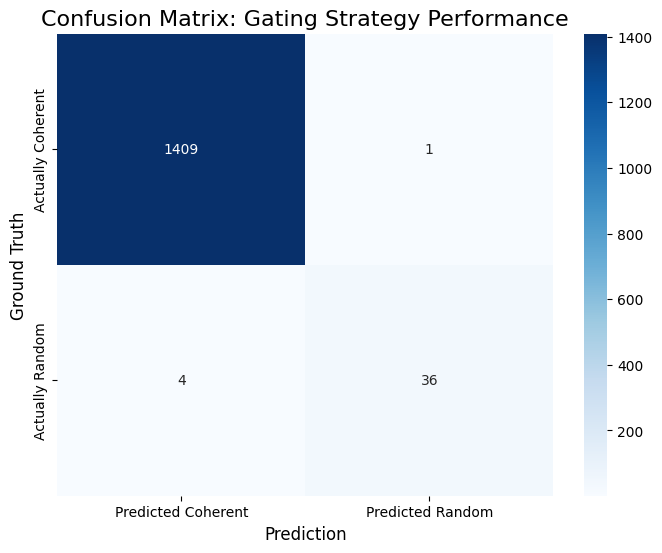


--- Gating Strategy Classification Report ---
              precision    recall  f1-score   support

    Coherent       1.00      1.00      1.00      1410
      Random       0.97      0.90      0.94        40

    accuracy                           1.00      1450
   macro avg       0.99      0.95      0.97      1450
weighted avg       1.00      1.00      1.00      1450


--- Step 3: Analysis of Missed Random Trials (False Negatives) ---

Found 4 random trials that were misclassified as 'coherent'.
This happened because their best n-gram score was better than the threshold.
 id                                     text  trigger_ngram_score
479   she's been affect commerce interaction            -3.039703
482    mexican began cutting weight at china            -3.292682
710              she's our baby course miles            -3.476513
491 intelligent similar fee percent at still            -3.742567

--- Step 4: Analysis of Coherent Sentences Misclassified as Random (False Positives) ---

In [ ]:
# ==============================================================================
# CELL 7: COMPREHENSIVE ANALYSIS OF DECODING RESULTS
# ==============================================================================
import pandas as pd
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import warnings

# --- 1. MERGE WITH GROUND TRUTH ---
print("="*80)
print("--- Step 1: Merging Predictions with Ground Truth ---")
print("="*80)

# Load the ground truth data description CSV
gt_csv_path = f'{heyyousum_brain_to_text_25_copytaskdata_description_path}/t15_copyTaskData_description.csv' # This path should be defined in your setup cells
ground_truth_df = pd.read_csv(gt_csv_path)

# Create an efficient lookup dictionary from the ground truth data
corpus_lookup = {(row['Date'], row['Block number']): (row['Corpus'] == 'Random') for _, row in ground_truth_df.iterrows()}
print(f"Ground truth lookup table created with {len(corpus_lookup)} entries.")

# Generate ground truth labels in the same order as the decoding loop
ground_truth_labels = []
# `test_data` and `model_args` must be available from the previous cells
for session in model_args['dataset']['sessions']:
    if session in test_data: # Ensure session exists in the loaded test data
        for trial_idx in range(len(test_data[session]['neural_features'])):
            block_num = test_data[session]['block_num'][trial_idx]
            date_part = session.split('.', 1)[1]
            formatted_date = datetime.strptime(date_part, "%Y.%m.%d").strftime("%Y-%m-%d")
            is_random = corpus_lookup.get((formatted_date, block_num), False)
            ground_truth_labels.append(is_random)

print(f"Generated {len(ground_truth_labels)} ground truth labels in order.")

# Merge the ground truth into the analysis DataFrame
if len(analysis_df) == len(ground_truth_labels):
    analysis_df['is_actually_random'] = ground_truth_labels
    print("Successfully merged ground truth labels with the analysis DataFrame.\n")
else:
    print(f"\nCRITICAL ERROR: Mismatch in length between analysis results ({len(analysis_df)}) and ground truth labels ({len(ground_truth_labels)}). Cannot proceed with validation.\n")


# --- 2. VALIDATE GATING STRATEGY ---
if 'is_actually_random' in analysis_df.columns:
    print("\n" + "="*80)
    print("--- Step 2: Gating Strategy Performance (Prediction vs. Actual) ---")
    print("="*80)

    # Create the prediction and actual boolean Series for scikit-learn
    y_pred = (analysis_df['strategy_used'] == 'random')
    y_true = analysis_df['is_actually_random']

    # Generate and plot the confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Predicted Coherent', 'Predicted Random'],
                yticklabels=['Actually Coherent', 'Actually Random'])
    plt.title('Confusion Matrix: Gating Strategy Performance', fontsize=16)
    plt.ylabel('Ground Truth', fontsize=12)
    plt.xlabel('Prediction', fontsize=12)
    plt.show()

    # Print the classification report for detailed metrics (Precision, Recall, F1-score)
    print("\n--- Gating Strategy Classification Report ---")
    print(classification_report(y_true, y_pred, target_names=['Coherent', 'Random']))


# --- 3. ANALYZE FALSE NEGATIVES (MISSED RANDOM TRIALS) ---
if 'is_actually_random' in analysis_df.columns:
    print("\n" + "="*80)
    print("--- Step 3: Analysis of Missed Random Trials (False Negatives) ---")
    print("="*80)

    pd.set_option('display.max_colwidth', None)

    # Filter for trials that were ACTUALLY random but PREDICTED as coherent
    fn_mask = (analysis_df['is_actually_random'] == True) & (analysis_df['strategy_used'] == 'coherent')
    false_negatives_df = analysis_df[fn_mask]

    if not false_negatives_df.empty:
        print(f"\nFound {len(false_negatives_df)} random trials that were misclassified as 'coherent'.")
        print("This happened because their best n-gram score was better than the threshold.")
        print(false_negatives_df[['id', 'text', 'trigger_ngram_score']].sort_values(by='trigger_ngram_score', ascending=False).to_string(index=False))
    else:
        print("\nPerfect Recall! No random sentences were misclassified.")

# --- 4. ANALYZE FALSE POSITIVES (MISCLASSIFIED COHERENT TRIALS) ---
if 'is_actually_random' in analysis_df.columns:
    print("\n" + "="*80)
    print("--- Step 4: Analysis of Coherent Sentences Misclassified as Random (False Positives) ---")
    print("="*80)

    # Filter for trials that were ACTUALLY coherent but PREDICTED as random
    fp_mask = (analysis_df['is_actually_random'] == False) & (analysis_df['strategy_used'] == 'random')
    false_positives_df = analysis_df[fp_mask]

    if not false_positives_df.empty:
        print(f"\nFound {len(false_positives_df)} coherent sentences that were misclassified as 'random'.")
        print("This happened because their best n-gram score was below the threshold.")
        print(false_positives_df[['id', 'text', 'trigger_ngram_score']].sort_values(by='trigger_ngram_score', ascending=True).to_string(index=False))
    else:
        print("\nExcellent! No coherent sentences were misclassified as random.")

# --- 5. ANALYZE TRUE POSITIVES (CORRECTLY IDENTIFIED RANDOM TRIALS) ---
if 'is_actually_random' in analysis_df.columns:
    print("\n" + "="*80)
    print("--- Step 5: Analysis of Correctly Identified Random Trials (True Positives) ---")
    print("="*80)

    # Filter for trials that were ACTUALLY random AND PREDICTED as random
    tp_mask = (analysis_df['is_actually_random'] == True) & (analysis_df['strategy_used'] == 'random')
    true_positives_df = analysis_df[tp_mask]

    if not true_positives_df.empty:
        print(f"\nFound {len(true_positives_df)} random trials that were correctly identified.")
        print("This happened because their best n-gram score was below the threshold, as expected.\n")

        # Ensure full sentences are displayed
        pd.set_option('display.max_colwidth', None)

        # Print the results table, sorted to show the lowest scores first
        print(true_positives_df[['id', 'text', 'trigger_ngram_score']]
              .sort_values(by='trigger_ngram_score', ascending=True)
              .to_string(index=False))
    else:
        print("\nNo random trials were correctly identified in this run.")


## 5.2 Inspection: Non-Random Sentences & Errors

In [ ]:
# ==============================================================================
# CELL 9: INSPECT LOW-SCORING COHERENT SENTENCES
# ==============================================================================
import pandas as pd

# This analysis requires the 'is_actually_random' column from the previous cell.
if 'is_actually_random' in analysis_df.columns:

    print("\n" + "="*80)
    print("--- Step 5: Inspecting Coherent Sentences with N-gram Score < -3.5 ---")
    print("="*80)

    # 1. Define the specific threshold for this analysis
    score_threshold = -3.0

    # 2. Create a boolean mask to find the sentences that meet the criteria
    # Condition 1: The sentence is ACTUALLY coherent (NOT random)
    # Condition 2: Its trigger n-gram score is below the threshold
    low_score_mask = (analysis_df['is_actually_random'] == False) & (analysis_df['trigger_ngram_score'] < score_threshold)

    # 3. Filter the DataFrame
    low_score_coherent_df = analysis_df[low_score_mask]

    if not low_score_coherent_df.empty:
        print(f"\nFound {len(low_score_coherent_df)} coherent sentences with a trigger score worse than {score_threshold}.")
        print("These sentences might contain rare words, have unusual structures, or be the result of decoding errors.\n")

        # Ensure full sentences are displayed
        pd.set_option('display.max_colwidth', None)

        # 4. Print the results table, sorted to show the worst scores first
        print(low_score_coherent_df[['id', 'text', 'trigger_ngram_score']]
              .sort_values(by='trigger_ngram_score', ascending=True)
              .to_string(index=False))
    else:
        print(f"\nNo coherent sentences were found with a trigger score below {score_threshold}.")

else:
    print("\nSkipping analysis: Ground truth column 'is_actually_random' not found in DataFrame.")


--- Step 5: Inspecting Coherent Sentences with N-gram Score < -3.5 ---

Found 23 coherent sentences with a trigger score worse than -3.0.
These sentences might contain rare words, have unusual structures, or be the result of decoding errors.

  id                                                                        text  trigger_ngram_score
 193                                                           they're excellent            -3.936152
 527                                         hire your franchise staff in invest            -3.557611
 548                                             smoky fires like flame and heat            -3.488326
 563                                               mesh wire keeps cheese inside            -3.441813
 224                                                      clear out our basement            -3.374638
 797                                              social countries are wonderful            -3.330498
 806                                      

## 5.3 DIstribution of random sentence ngram score

Successfully merged ground truth labels with the analysis DataFrame.

--- Gating Strategy Confusion Matrix ---


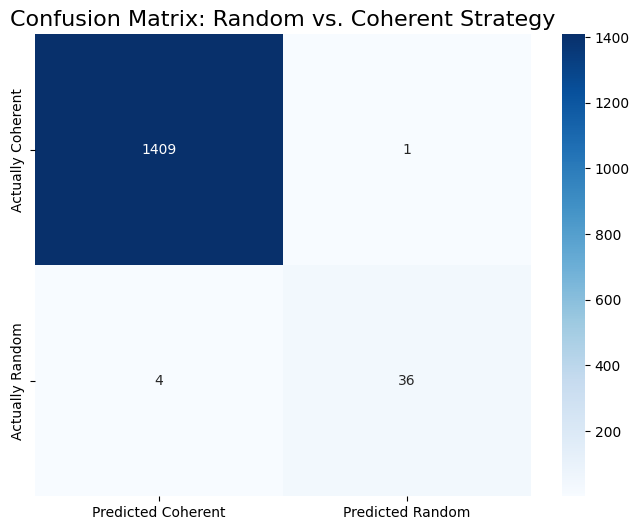


--- Gating Strategy Classification Report ---
              precision    recall  f1-score   support

    Coherent       1.00      1.00      1.00      1410
      Random       0.97      0.90      0.94        40

    accuracy                           1.00      1450
   macro avg       0.99      0.95      0.97      1450
weighted avg       1.00      1.00      1.00      1450


--- N-gram Score Distribution for Actual Random Sentences ---


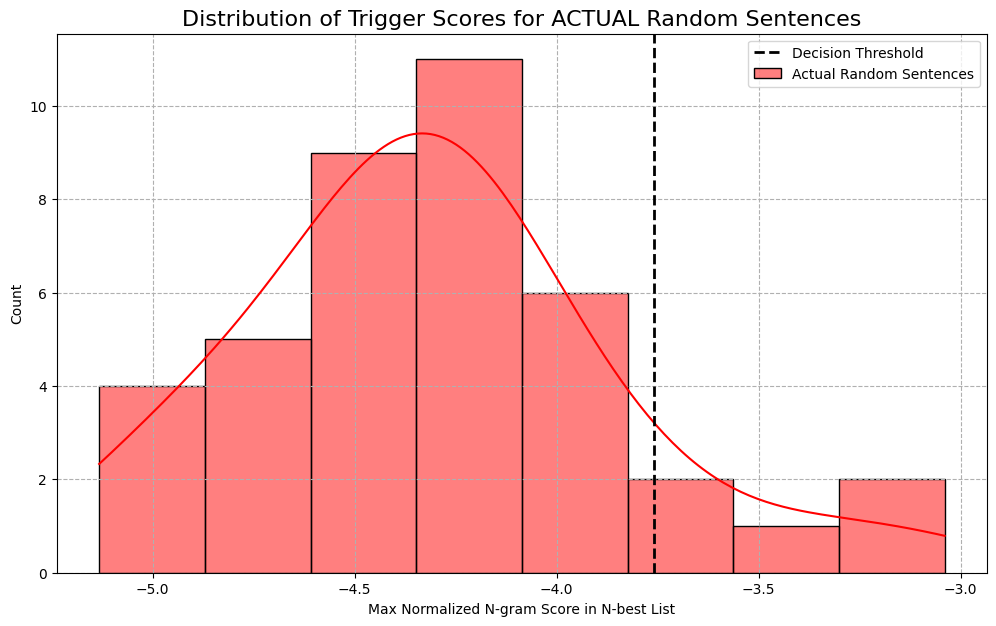

In [ ]:
# ==============================================================================
# CELL 7: ANALYSIS AND VISUALIZATION (FINAL VERSION)
# ==============================================================================
import pandas as pd
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# --- 1. MERGE WITH GROUND TRUTH ---
corpus_lookup = {(row['Date'], row['Block number']): (row['Corpus'] == 'Random') for _, row in ground_truth_df.iterrows()}

ground_truth_labels = []
for session in test_data.keys():
    for trial_idx in range(len(test_data[session]['neural_features'])):
        block_num = test_data[session]['block_num'][trial_idx]
        date_part = session.split('.', 1)[1]
        formatted_date = datetime.strptime(date_part, "%Y.%m.%d").strftime("%Y-%m-%d")
        is_random = corpus_lookup.get((formatted_date, block_num), False)
        ground_truth_labels.append(is_random)

if len(analysis_df) == len(ground_truth_labels):
    analysis_df['is_actually_random'] = ground_truth_labels
    print("Successfully merged ground truth labels with the analysis DataFrame.")
else:
    print("Error: Length mismatch between analysis results and ground truth labels.")

# --- 2. VALIDATE GATING STRATEGY ---
y_pred = (analysis_df['strategy_used'] == 'random')
y_true = analysis_df['is_actually_random']
cm = confusion_matrix(y_true, y_pred)
tn, fp, fn, tp = cm.ravel()

print("\n" + "="*80)
print("--- Gating Strategy Confusion Matrix ---")
print("="*80)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Coherent', 'Predicted Random'],
            yticklabels=['Actually Coherent', 'Actually Random'])
plt.title('Confusion Matrix: Random vs. Coherent Strategy', fontsize=16)
plt.show()

print("\n--- Gating Strategy Classification Report ---")
print(classification_report(y_true, y_pred, target_names=['Coherent', 'Random']))


# --- 3. ANALYZE TRIGGER SCORES OF ACTUAL RANDOM SENTENCES ---
is_random_mask = analysis_df['is_actually_random'] == True
actual_random_df = analysis_df[is_random_mask]

print("\n" + "="*80)
print("--- N-gram Score Distribution for Actual Random Sentences ---")
print("="*80)
if not actual_random_df.empty:
    plt.figure(figsize=(12, 7))
    sns.histplot(data=actual_random_df, x='trigger_ngram_score', color='red', label='Actual Random Sentences', kde=True)
    plt.axvline(x=args_dict['decoding']['ngram_threshold'], color='black', linestyle='--', linewidth=2, label=f'Decision Threshold')
    plt.title('Distribution of Trigger Scores for ACTUAL Random Sentences', fontsize=16)
    plt.xlabel('Max Normalized N-gram Score in N-best List')
    plt.legend()
    plt.grid(True, linestyle='--')
    plt.show()
else:
    print("No 'Random' sentences were found in the ground truth.")
